## 0. Install and Import Dependencies

In [1]:
!pip install mediapipe

In [2]:
!pip install opencv-python

In [1]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [6]:
# VIDEO FEED
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Mediapipe Feed', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## 1. Make Detections

In [30]:
cap = cv2.VideoCapture(0)
# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )


        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

results.pose_landmarks

In [26]:
mp_drawing.draw_landmarks??

<function mediapipe.python.solutions.drawing_utils.draw_landmarks(image: numpy.ndarray, landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList, connections: Optional[List[Tuple[int, int]]] = None, landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2), connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2))>

In [28]:
mp_drawing.DrawingSpec??

## 2. Determining Joints
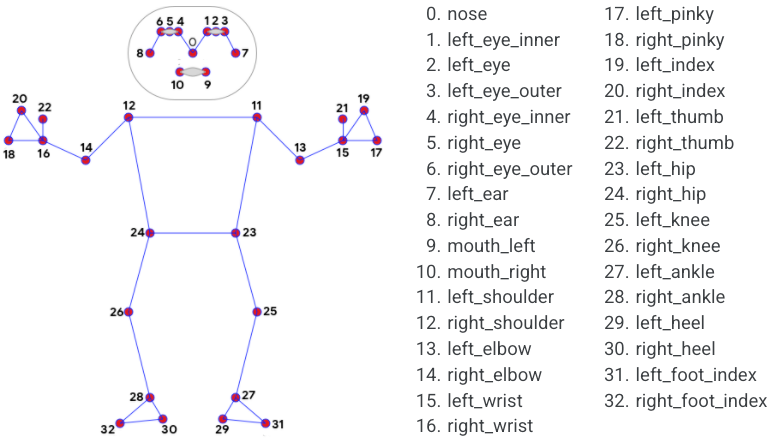

### Landmarks
#### There are 33 landmarks in total, starting from index0.
#### these represent the different joints within the pose.

In [31]:
cap = cv2.VideoCapture(0)
# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract Landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )


        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

[x: 0.5565411
y: 0.68545437
z: -1.021082
visibility: 0.9958746
, x: 0.57993484
y: 0.60726607
z: -0.9357562
visibility: 0.99442047
, x: 0.5966561
y: 0.6075455
z: -0.9362699
visibility: 0.9956863
, x: 0.6122726
y: 0.6089299
z: -0.9362854
visibility: 0.9954732
, x: 0.5208558
y: 0.6092314
z: -0.9561974
visibility: 0.9929844
, x: 0.49532565
y: 0.6107894
z: -0.9554741
visibility: 0.99342704
, x: 0.47094893
y: 0.6134523
z: -0.9560281
visibility: 0.99187803
, x: 0.6272627
y: 0.64317185
z: -0.41487804
visibility: 0.9961493
, x: 0.4159685
y: 0.6508101
z: -0.49547467
visibility: 0.99267876
, x: 0.58467376
y: 0.7603762
z: -0.82633317
visibility: 0.9951049
, x: 0.5066024
y: 0.7677456
z: -0.85119236
visibility: 0.99337316
, x: 0.7138537
y: 0.9960523
z: -0.24172238
visibility: 0.99069023
, x: 0.28230715
y: 0.97003245
z: -0.32426873
visibility: 0.9568513
, x: 0.74674356
y: 1.3867967
z: -0.805189
visibility: 0.1263928
, x: 0.21804705
y: 1.3842969
z: -1.007047
visibility: 0.22063583
, x: 0.5899356
y: 1.

[x: 0.5595875
y: 0.71272194
z: -1.5366882
visibility: 0.99157757
, x: 0.5832924
y: 0.63562775
z: -1.4352355
visibility: 0.99030864
, x: 0.6003531
y: 0.635866
z: -1.4356978
visibility: 0.991764
, x: 0.61608166
y: 0.63693935
z: -1.4357092
visibility: 0.9911578
, x: 0.5287999
y: 0.62982994
z: -1.4454064
visibility: 0.98905814
, x: 0.5065372
y: 0.6264857
z: -1.4458344
visibility: 0.9894841
, x: 0.48310208
y: 0.6246897
z: -1.4463909
visibility: 0.98826325
, x: 0.6276321
y: 0.6599959
z: -0.8560707
visibility: 0.9905733
, x: 0.4212895
y: 0.65000594
z: -0.8965572
visibility: 0.99013364
, x: 0.5803846
y: 0.7862161
z: -1.3186134
visibility: 0.9746262
, x: 0.5109526
y: 0.7863773
z: -1.332777
visibility: 0.9770764
, x: 0.70869
y: 1.0017086
z: -0.71514827
visibility: 0.8826029
, x: 0.27517647
y: 0.980954
z: -0.5975601
visibility: 0.85210896
, x: 0.72475755
y: 1.3027918
z: -1.5225
visibility: 0.17934224
, x: 0.22661607
y: 1.2896339
z: -1.216565
visibility: 0.21506967
, x: 0.50273806
y: 1.0011756
z: 

[x: 0.5713541
y: 0.70291173
z: -1.517853
visibility: 0.9912355
, x: 0.595337
y: 0.62725073
z: -1.4204373
visibility: 0.99065965
, x: 0.6123092
y: 0.6275238
z: -1.4208163
visibility: 0.9917723
, x: 0.62720007
y: 0.6283558
z: -1.4209402
visibility: 0.9912388
, x: 0.538226
y: 0.6236456
z: -1.4261391
visibility: 0.9897389
, x: 0.51310694
y: 0.6213885
z: -1.425897
visibility: 0.98992103
, x: 0.4864911
y: 0.61989385
z: -1.4263269
visibility: 0.98900276
, x: 0.6342379
y: 0.6565505
z: -0.8279762
visibility: 0.99095833
, x: 0.42074546
y: 0.6484492
z: -0.88288176
visibility: 0.9906435
, x: 0.5916752
y: 0.7753913
z: -1.3126352
visibility: 0.9712866
, x: 0.52300274
y: 0.7701212
z: -1.3192158
visibility: 0.97275454
, x: 0.71112424
y: 1.0047364
z: -0.686114
visibility: 0.80412865
, x: 0.26659226
y: 0.986673
z: -0.60412174
visibility: 0.7473594
, x: 0.76509184
y: 1.2745765
z: -1.2638714
visibility: 0.21164095
, x: 0.19840735
y: 1.3099766
z: -1.2859256
visibility: 0.20443788
, x: 0.57865053
y: 1.08298

[x: 0.5661083
y: 0.7207816
z: -1.5407851
visibility: 0.99251395
, x: 0.5895502
y: 0.6410154
z: -1.4271895
visibility: 0.99217165
, x: 0.60703844
y: 0.6401796
z: -1.4275608
visibility: 0.9930433
, x: 0.6228944
y: 0.63983643
z: -1.4275267
visibility: 0.99250525
, x: 0.53180456
y: 0.6399314
z: -1.455242
visibility: 0.99157417
, x: 0.5066258
y: 0.6384839
z: -1.4557309
visibility: 0.9916627
, x: 0.48051852
y: 0.6375797
z: -1.4562137
visibility: 0.99087405
, x: 0.6318827
y: 0.66406506
z: -0.7945707
visibility: 0.9923091
, x: 0.41767496
y: 0.6634223
z: -0.9098646
visibility: 0.99226195
, x: 0.5879515
y: 0.79542893
z: -1.2978644
visibility: 0.9711358
, x: 0.51941884
y: 0.7962455
z: -1.3344225
visibility: 0.9716938
, x: 0.7106842
y: 1.0024369
z: -0.64125955
visibility: 0.73197883
, x: 0.2636235
y: 0.99096525
z: -0.6232395
visibility: 0.64605343
, x: 0.7614836
y: 1.2388637
z: -1.3058956
visibility: 0.2028489
, x: 0.19939081
y: 1.2995992
z: -1.2945311
visibility: 0.19188884
, x: 0.5813689
y: 1.10

[x: 0.569359
y: 0.72080636
z: -1.5353038
visibility: 0.9913543
, x: 0.59278226
y: 0.64275724
z: -1.4251363
visibility: 0.99123496
, x: 0.610192
y: 0.64272434
z: -1.4256604
visibility: 0.99225
, x: 0.6262311
y: 0.643389
z: -1.425806
visibility: 0.9915047
, x: 0.53686076
y: 0.6389807
z: -1.4579309
visibility: 0.9906513
, x: 0.5125404
y: 0.63654697
z: -1.4584162
visibility: 0.99087644
, x: 0.48663726
y: 0.63512194
z: -1.4589006
visibility: 0.98987085
, x: 0.6345868
y: 0.6700731
z: -0.7928404
visibility: 0.9916286
, x: 0.41883636
y: 0.6607713
z: -0.9331919
visibility: 0.99078333
, x: 0.5878422
y: 0.7957986
z: -1.2918997
visibility: 0.9676872
, x: 0.5200256
y: 0.7933871
z: -1.3360889
visibility: 0.9659331
, x: 0.70975626
y: 1.0058907
z: -0.5846089
visibility: 0.6885338
, x: 0.25633994
y: 0.99133986
z: -0.57453036
visibility: 0.55929124
, x: 0.8033985
y: 1.259072
z: -1.0843449
visibility: 0.17078401
, x: 0.2052314
y: 1.2948335
z: -1.0329151
visibility: 0.16033584
, x: 0.65668094
y: 1.2546791

[x: 0.5668681
y: 0.72473407
z: -1.7363198
visibility: 0.9913199
, x: 0.59444654
y: 0.6472175
z: -1.6275654
visibility: 0.99138075
, x: 0.61253726
y: 0.64832014
z: -1.6278998
visibility: 0.99248064
, x: 0.6289831
y: 0.65030843
z: -1.6280499
visibility: 0.99171865
, x: 0.53754383
y: 0.6410492
z: -1.6518902
visibility: 0.9906289
, x: 0.5139993
y: 0.6374415
z: -1.652263
visibility: 0.9909065
, x: 0.48897433
y: 0.63482
z: -1.6525835
visibility: 0.9896869
, x: 0.64069575
y: 0.6782673
z: -0.98503715
visibility: 0.99198663
, x: 0.42454094
y: 0.65926826
z: -1.0903294
visibility: 0.99051666
, x: 0.5860178
y: 0.8008764
z: -1.4876411
visibility: 0.9677842
, x: 0.5168786
y: 0.79373324
z: -1.520925
visibility: 0.9644186
, x: 0.71674645
y: 1.0153486
z: -0.8107394
visibility: 0.6688029
, x: 0.26180616
y: 0.98919094
z: -0.71744424
visibility: 0.51554334
, x: 0.7956797
y: 1.2909219
z: -1.5017135
visibility: 0.16650411
, x: 0.20975867
y: 1.2763304
z: -1.3167697
visibility: 0.13733897
, x: 0.6252483
y: 1.

[x: 0.60325706
y: 0.73040503
z: -1.6314118
visibility: 0.9916683
, x: 0.62084275
y: 0.6526215
z: -1.5329802
visibility: 0.99151564
, x: 0.63339484
y: 0.6531431
z: -1.5331941
visibility: 0.9926982
, x: 0.6448742
y: 0.6542818
z: -1.5332267
visibility: 0.9916135
, x: 0.56869775
y: 0.64560425
z: -1.5896012
visibility: 0.9910528
, x: 0.5438132
y: 0.6409462
z: -1.5901816
visibility: 0.9915276
, x: 0.51870346
y: 0.636846
z: -1.5906312
visibility: 0.9902973
, x: 0.6400858
y: 0.6781846
z: -0.903811
visibility: 0.9920873
, x: 0.45492563
y: 0.656511
z: -1.11593
visibility: 0.9914068
, x: 0.60875756
y: 0.8023869
z: -1.3815668
visibility: 0.966961
, x: 0.5423957
y: 0.79758304
z: -1.453716
visibility: 0.9636652
, x: 0.7136892
y: 1.014108
z: -0.6598058
visibility: 0.6425379
, x: 0.27048358
y: 0.990267
z: -0.77725315
visibility: 0.48481795
, x: 0.8070267
y: 1.2610546
z: -1.0407145
visibility: 0.15061815
, x: 0.2100019
y: 1.2496779
z: -1.353602
visibility: 0.17772742
, x: 0.6661663
y: 1.2340207
z: -1.5

[x: 0.6109993
y: 0.7292309
z: -1.6852541
visibility: 0.99337125
, x: 0.6345628
y: 0.65061796
z: -1.5685728
visibility: 0.9931011
, x: 0.6503645
y: 0.6514421
z: -1.5687149
visibility: 0.993973
, x: 0.6639791
y: 0.6529251
z: -1.5686219
visibility: 0.9927709
, x: 0.5769103
y: 0.64383316
z: -1.6089531
visibility: 0.9929248
, x: 0.55137885
y: 0.6392234
z: -1.6093681
visibility: 0.9933956
, x: 0.5243784
y: 0.6345751
z: -1.6096016
visibility: 0.9924521
, x: 0.6634476
y: 0.6765205
z: -0.8917602
visibility: 0.99332565
, x: 0.45654893
y: 0.65251887
z: -1.0726784
visibility: 0.9935577
, x: 0.62184274
y: 0.8009733
z: -1.4230821
visibility: 0.9715342
, x: 0.5508249
y: 0.7980341
z: -1.4779576
visibility: 0.9700643
, x: 0.7173763
y: 1.0132035
z: -0.69712627
visibility: 0.6269315
, x: 0.2787928
y: 0.986398
z: -0.7185281
visibility: 0.5061989
, x: 0.8017305
y: 1.2419931
z: -1.3097116
visibility: 0.13850228
, x: 0.21364483
y: 1.2564883
z: -1.3165666
visibility: 0.23366265
, x: 0.64984506
y: 1.1599538
z:

[x: 0.614771
y: 0.73071015
z: -1.6206081
visibility: 0.99389
, x: 0.6355252
y: 0.6513551
z: -1.5207194
visibility: 0.99331594
, x: 0.65013015
y: 0.6521448
z: -1.5207074
visibility: 0.99420154
, x: 0.66284966
y: 0.653567
z: -1.5205119
visibility: 0.9927075
, x: 0.58159673
y: 0.6448852
z: -1.588229
visibility: 0.9934185
, x: 0.55638844
y: 0.6405678
z: -1.5887163
visibility: 0.9940528
, x: 0.52971506
y: 0.63599235
z: -1.5891074
visibility: 0.9930971
, x: 0.65327716
y: 0.6764659
z: -0.8828045
visibility: 0.99363846
, x: 0.46160287
y: 0.6519977
z: -1.1651928
visibility: 0.99436015
, x: 0.62264
y: 0.80221486
z: -1.3668478
visibility: 0.9729415
, x: 0.5534364
y: 0.79993206
z: -1.4570929
visibility: 0.9723501
, x: 0.712253
y: 1.0116038
z: -0.6095042
visibility: 0.63955134
, x: 0.27151078
y: 0.9872663
z: -0.8668224
visibility: 0.5171455
, x: 0.8023502
y: 1.2246854
z: -0.88960665
visibility: 0.1329473
, x: 0.21359825
y: 1.2331932
z: -1.4199326
visibility: 0.27088693
, x: 0.6535295
y: 1.1398622
z

[x: 0.6165856
y: 0.74243987
z: -1.6749287
visibility: 0.994155
, x: 0.6329981
y: 0.66301566
z: -1.5702304
visibility: 0.99302226
, x: 0.6463934
y: 0.6621886
z: -1.5702481
visibility: 0.9940628
, x: 0.65792096
y: 0.66176254
z: -1.5701181
visibility: 0.9922548
, x: 0.58146787
y: 0.65951914
z: -1.6253382
visibility: 0.9935579
, x: 0.5568186
y: 0.6559604
z: -1.6258177
visibility: 0.9943799
, x: 0.5315627
y: 0.6517236
z: -1.6261438
visibility: 0.99336493
, x: 0.6419314
y: 0.67916834
z: -0.93206394
visibility: 0.99343306
, x: 0.46504813
y: 0.66094124
z: -1.1944582
visibility: 0.9948316
, x: 0.6217459
y: 0.81072104
z: -1.4194486
visibility: 0.9702821
, x: 0.55585176
y: 0.8121014
z: -1.4936045
visibility: 0.97106665
, x: 0.7021544
y: 1.0079347
z: -0.68452513
visibility: 0.6402336
, x: 0.27902156
y: 0.98864526
z: -0.88219166
visibility: 0.51694286
, x: 0.7808051
y: 1.1966611
z: -1.0581912
visibility: 0.13213532
, x: 0.21999934
y: 1.2054459
z: -1.4084786
visibility: 0.31280717
, x: 0.63159865
y:

[x: 0.6043896
y: 0.7399568
z: -1.7361313
visibility: 0.99502516
, x: 0.62440145
y: 0.662708
z: -1.6282238
visibility: 0.9940918
, x: 0.6395912
y: 0.6621157
z: -1.6282189
visibility: 0.99494034
, x: 0.65333045
y: 0.6620503
z: -1.6280327
visibility: 0.9933767
, x: 0.56942856
y: 0.6582933
z: -1.6702207
visibility: 0.99448705
, x: 0.54513
y: 0.65477145
z: -1.6706765
visibility: 0.9951565
, x: 0.5196122
y: 0.6506223
z: -1.6709604
visibility: 0.99429905
, x: 0.6443401
y: 0.68142253
z: -0.96634704
visibility: 0.9942519
, x: 0.45568782
y: 0.6621161
z: -1.1407162
visibility: 0.99553317
, x: 0.6167131
y: 0.8099693
z: -1.4755257
visibility: 0.9729429
, x: 0.5482806
y: 0.8097529
z: -1.5313861
visibility: 0.9733603
, x: 0.7105762
y: 1.0113196
z: -0.72510237
visibility: 0.6074273
, x: 0.27725184
y: 0.9897096
z: -0.8340643
visibility: 0.5036814
, x: 0.7896215
y: 1.2237561
z: -1.1963456
visibility: 0.1310637
, x: 0.2154243
y: 1.2384702
z: -1.4149895
visibility: 0.30870596
, x: 0.6321791
y: 1.1017114
z

[x: 0.59304345
y: 0.74235857
z: -1.7589979
visibility: 0.9949721
, x: 0.6177374
y: 0.66462004
z: -1.6658922
visibility: 0.99426395
, x: 0.633968
y: 0.6638147
z: -1.6661686
visibility: 0.99504566
, x: 0.64880955
y: 0.6634792
z: -1.666241
visibility: 0.9935871
, x: 0.5602492
y: 0.6588361
z: -1.703809
visibility: 0.9945232
, x: 0.53497845
y: 0.6536008
z: -1.7043526
visibility: 0.99509764
, x: 0.50868577
y: 0.6483404
z: -1.7046429
visibility: 0.99427176
, x: 0.6450623
y: 0.6824387
z: -1.0192945
visibility: 0.9943211
, x: 0.4453388
y: 0.6614803
z: -1.1870142
visibility: 0.99533737
, x: 0.6081368
y: 0.81344616
z: -1.5010699
visibility: 0.9734284
, x: 0.539045
y: 0.80832255
z: -1.5524691
visibility: 0.9734246
, x: 0.7150793
y: 1.0166143
z: -0.72202194
visibility: 0.59408104
, x: 0.26713926
y: 0.9935981
z: -0.76905715
visibility: 0.4891958
, x: 0.8072473
y: 1.2757455
z: -1.1121033
visibility: 0.121124916
, x: 0.20934255
y: 1.2891898
z: -1.1827466
visibility: 0.2755179
, x: 0.67745936
y: 1.3285

[x: 0.58751345
y: 0.74044234
z: -1.5361527
visibility: 0.9949377
, x: 0.6128802
y: 0.6624103
z: -1.4316455
visibility: 0.99423164
, x: 0.6290217
y: 0.66179115
z: -1.4317573
visibility: 0.9949742
, x: 0.6439789
y: 0.66175234
z: -1.4314696
visibility: 0.9936441
, x: 0.55612147
y: 0.6574872
z: -1.4750007
visibility: 0.9944415
, x: 0.5307289
y: 0.65278596
z: -1.4755149
visibility: 0.99490887
, x: 0.5043163
y: 0.64803255
z: -1.4761022
visibility: 0.9941292
, x: 0.6436276
y: 0.6815931
z: -0.79992247
visibility: 0.99398017
, x: 0.44050598
y: 0.6620767
z: -0.9869398
visibility: 0.99517417
, x: 0.6022779
y: 0.81061965
z: -1.2891228
visibility: 0.97166836
, x: 0.5338024
y: 0.80569535
z: -1.3459028
visibility: 0.97188383
, x: 0.7064486
y: 1.0135413
z: -0.5244192
visibility: 0.59600174
, x: 0.27118942
y: 0.9908103
z: -0.72223914
visibility: 0.50717795
, x: 0.7639066
y: 1.2328945
z: -0.8727665
visibility: 0.13956381
, x: 0.20793657
y: 1.273451
z: -1.3030493
visibility: 0.28170535
, x: 0.6006827
y: 

[x: 0.59096014
y: 0.737313
z: -1.7340502
visibility: 0.9953248
, x: 0.6165469
y: 0.6590017
z: -1.6256485
visibility: 0.99467736
, x: 0.6321102
y: 0.6588325
z: -1.62577
visibility: 0.9953627
, x: 0.64638317
y: 0.6592346
z: -1.6257149
visibility: 0.99419713
, x: 0.55990183
y: 0.65390813
z: -1.6610425
visibility: 0.9948475
, x: 0.5345118
y: 0.6495401
z: -1.6614519
visibility: 0.99525625
, x: 0.50789565
y: 0.6452286
z: -1.6617091
visibility: 0.9945649
, x: 0.64461964
y: 0.67978454
z: -0.9834593
visibility: 0.99439096
, x: 0.44407457
y: 0.6596566
z: -1.1359185
visibility: 0.99561125
, x: 0.6045447
y: 0.8073873
z: -1.48194
visibility: 0.9727979
, x: 0.53689957
y: 0.80292416
z: -1.5297644
visibility: 0.97307646
, x: 0.7093527
y: 1.0139754
z: -0.8057392
visibility: 0.5999358
, x: 0.27052867
y: 0.98855144
z: -0.7978729
visibility: 0.5140435
, x: 0.77513826
y: 1.2331046
z: -1.4253685
visibility: 0.15295117
, x: 0.21020627
y: 1.2691096
z: -1.429897
visibility: 0.2958402
, x: 0.608005
y: 1.0792383

[x: 0.59425515
y: 0.74313706
z: -1.7805151
visibility: 0.9952837
, x: 0.61860687
y: 0.66427207
z: -1.6790664
visibility: 0.9945057
, x: 0.6334875
y: 0.6643074
z: -1.6791809
visibility: 0.9952503
, x: 0.64706624
y: 0.6647966
z: -1.679167
visibility: 0.99398863
, x: 0.5623847
y: 0.65761834
z: -1.7196496
visibility: 0.9947474
, x: 0.53702235
y: 0.65253574
z: -1.7201653
visibility: 0.995244
, x: 0.5107884
y: 0.6474587
z: -1.7205276
visibility: 0.9945258
, x: 0.6441864
y: 0.68396693
z: -1.0366385
visibility: 0.99416804
, x: 0.44873992
y: 0.6595202
z: -1.2142893
visibility: 0.99569947
, x: 0.6060859
y: 0.81317985
z: -1.5258415
visibility: 0.97132784
, x: 0.53905416
y: 0.8079487
z: -1.5803111
visibility: 0.97213537
, x: 0.7052108
y: 1.0132221
z: -0.8102833
visibility: 0.5956424
, x: 0.2698112
y: 0.9860712
z: -0.8627017
visibility: 0.52638125
, x: 0.7745544
y: 1.2396783
z: -1.258176
visibility: 0.15750808
, x: 0.21101823
y: 1.2450967
z: -1.4237801
visibility: 0.315427
, x: 0.6066269
y: 1.11893

[x: 0.59318364
y: 0.7462777
z: -1.8525994
visibility: 0.99454165
, x: 0.6186202
y: 0.6667921
z: -1.7531509
visibility: 0.9938194
, x: 0.6331908
y: 0.6668854
z: -1.7532396
visibility: 0.9948001
, x: 0.6465936
y: 0.6673549
z: -1.753309
visibility: 0.99351996
, x: 0.5626203
y: 0.6593419
z: -1.7952158
visibility: 0.99386644
, x: 0.53738534
y: 0.6537546
z: -1.7956698
visibility: 0.99442416
, x: 0.5117332
y: 0.64818466
z: -1.7959356
visibility: 0.993442
, x: 0.64360154
y: 0.68558955
z: -1.1077305
visibility: 0.9936326
, x: 0.45143503
y: 0.6592359
z: -1.2991084
visibility: 0.9948325
, x: 0.60466564
y: 0.8167128
z: -1.5948987
visibility: 0.9676206
, x: 0.5366153
y: 0.8106653
z: -1.6513987
visibility: 0.9674249
, x: 0.7030033
y: 1.0132972
z: -0.86811256
visibility: 0.59181356
, x: 0.2710176
y: 0.9843071
z: -0.905399
visibility: 0.49473858
, x: 0.78066313
y: 1.2517072
z: -1.3317821
visibility: 0.16209848
, x: 0.21828909
y: 1.2251395
z: -1.3861458
visibility: 0.29745552
, x: 0.62806803
y: 1.15303

[x: 0.5962049
y: 0.7321781
z: -1.5986269
visibility: 0.9946801
, x: 0.62099636
y: 0.6551153
z: -1.4932462
visibility: 0.99383974
, x: 0.6349648
y: 0.65585846
z: -1.4933379
visibility: 0.99474055
, x: 0.64764035
y: 0.6572068
z: -1.4931706
visibility: 0.9933891
, x: 0.5668231
y: 0.6479244
z: -1.5423489
visibility: 0.9940287
, x: 0.5416536
y: 0.6426083
z: -1.5428505
visibility: 0.994609
, x: 0.5154893
y: 0.6376696
z: -1.5433115
visibility: 0.99372935
, x: 0.6423348
y: 0.67917925
z: -0.8624188
visibility: 0.993257
, x: 0.45277157
y: 0.6533235
z: -1.0805452
visibility: 0.9949268
, x: 0.60551214
y: 0.80268824
z: -1.3525627
visibility: 0.96688235
, x: 0.5404985
y: 0.7976027
z: -1.4184368
visibility: 0.96794236
, x: 0.7004574
y: 1.0097213
z: -0.63788486
visibility: 0.5754338
, x: 0.27175677
y: 0.9838775
z: -0.7938596
visibility: 0.49690998
, x: 0.7563864
y: 1.2303011
z: -1.0737796
visibility: 0.15515812
, x: 0.21886691
y: 1.2471251
z: -1.4164255
visibility: 0.31329364
, x: 0.59907126
y: 1.0910

[x: 0.5975817
y: 0.72489035
z: -1.5877335
visibility: 0.99410105
, x: 0.6215063
y: 0.64896214
z: -1.4830687
visibility: 0.9932568
, x: 0.6357862
y: 0.64998883
z: -1.4833066
visibility: 0.9940923
, x: 0.64897245
y: 0.65170974
z: -1.48328
visibility: 0.9926452
, x: 0.5670097
y: 0.6427406
z: -1.5221083
visibility: 0.9935567
, x: 0.5419503
y: 0.63842905
z: -1.5225911
visibility: 0.9941861
, x: 0.51568353
y: 0.63468605
z: -1.523032
visibility: 0.99344355
, x: 0.64618206
y: 0.67555493
z: -0.85940504
visibility: 0.99240655
, x: 0.45073968
y: 0.6529465
z: -1.0316623
visibility: 0.99424267
, x: 0.6085113
y: 0.7965445
z: -1.3459294
visibility: 0.9660053
, x: 0.5440034
y: 0.79192847
z: -1.3983637
visibility: 0.96778595
, x: 0.7081057
y: 1.010381
z: -0.66329175
visibility: 0.58224785
, x: 0.27425003
y: 0.98524463
z: -0.7191554
visibility: 0.51825154
, x: 0.77479726
y: 1.2586834
z: -1.1719781
visibility: 0.14649719
, x: 0.21998
y: 1.2605368
z: -1.3534896
visibility: 0.32661936
, x: 0.62378544
y: 1.

[x: 0.5989044
y: 0.7295955
z: -1.5803554
visibility: 0.9940126
, x: 0.6208674
y: 0.65204746
z: -1.4796532
visibility: 0.99305105
, x: 0.6350618
y: 0.652256
z: -1.4798967
visibility: 0.9939239
, x: 0.6481071
y: 0.6531942
z: -1.4798656
visibility: 0.99247223
, x: 0.56707513
y: 0.6470161
z: -1.5258512
visibility: 0.99334574
, x: 0.54220796
y: 0.64260674
z: -1.5264144
visibility: 0.9939721
, x: 0.51574665
y: 0.63877887
z: -1.5269538
visibility: 0.9931976
, x: 0.64357364
y: 0.67562133
z: -0.86655915
visibility: 0.99210334
, x: 0.4494613
y: 0.6574396
z: -1.0558815
visibility: 0.9939061
, x: 0.60939735
y: 0.8005686
z: -1.3424594
visibility: 0.9662422
, x: 0.5470975
y: 0.7967968
z: -1.3985537
visibility: 0.96777785
, x: 0.70502025
y: 1.007304
z: -0.69806105
visibility: 0.5932409
, x: 0.27695802
y: 0.98416907
z: -0.75387776
visibility: 0.51762223
, x: 0.76163113
y: 1.2506754
z: -1.2815064
visibility: 0.15114525
, x: 0.22232504
y: 1.2640816
z: -1.3836775
visibility: 0.3226418
, x: 0.5997212
y: 1

[x: 0.57400167
y: 0.7319121
z: -1.565211
visibility: 0.9932124
, x: 0.60130346
y: 0.65536106
z: -1.4575927
visibility: 0.9925306
, x: 0.6196933
y: 0.6569777
z: -1.458032
visibility: 0.99359673
, x: 0.6365421
y: 0.65866303
z: -1.4581214
visibility: 0.9923353
, x: 0.5450057
y: 0.6466502
z: -1.4806328
visibility: 0.99248606
, x: 0.5222794
y: 0.64277065
z: -1.4810493
visibility: 0.9930515
, x: 0.4983503
y: 0.6399561
z: -1.4814522
visibility: 0.9919848
, x: 0.64342594
y: 0.6806546
z: -0.83927596
visibility: 0.99215466
, x: 0.43763995
y: 0.6606669
z: -0.9457698
visibility: 0.99247855
, x: 0.5934621
y: 0.80829906
z: -1.3303857
visibility: 0.9657819
, x: 0.5265717
y: 0.8005467
z: -1.3613672
visibility: 0.9648829
, x: 0.71032536
y: 1.0106997
z: -0.64754826
visibility: 0.61295646
, x: 0.2729949
y: 0.9814657
z: -0.58814824
visibility: 0.49928406
, x: 0.79072297
y: 1.2744802
z: -1.2047793
visibility: 0.14751957
, x: 0.22314624
y: 1.2675208
z: -1.0719111
visibility: 0.24875091
, x: 0.644687
y: 1.23

[x: 0.5659916
y: 0.7124817
z: -1.435739
visibility: 0.9920416
, x: 0.59298456
y: 0.6393215
z: -1.3262808
visibility: 0.99165565
, x: 0.61143714
y: 0.6412518
z: -1.3267655
visibility: 0.9927332
, x: 0.62863284
y: 0.6436937
z: -1.3268061
visibility: 0.99180466
, x: 0.5365827
y: 0.6316768
z: -1.3461821
visibility: 0.9914436
, x: 0.51384914
y: 0.62844616
z: -1.3465528
visibility: 0.9919467
, x: 0.48959297
y: 0.626336
z: -1.3471048
visibility: 0.990918
, x: 0.6416089
y: 0.6733162
z: -0.72981364
visibility: 0.99157727
, x: 0.42908162
y: 0.653961
z: -0.8151162
visibility: 0.9912454
, x: 0.5876005
y: 0.78995395
z: -1.2117052
visibility: 0.96542054
, x: 0.5184475
y: 0.7809572
z: -1.2390962
visibility: 0.9638599
, x: 0.7145902
y: 1.0102751
z: -0.59870595
visibility: 0.6343096
, x: 0.274898
y: 0.9816738
z: -0.53213245
visibility: 0.52151155
, x: 0.78719395
y: 1.2797458
z: -1.3234813
visibility: 0.15605436
, x: 0.21919055
y: 1.2959867
z: -1.2266483
visibility: 0.19900075
, x: 0.62096775
y: 1.16319

[x: 0.55947196
y: 0.7237927
z: -1.2811143
visibility: 0.9916187
, x: 0.58486205
y: 0.64662004
z: -1.191099
visibility: 0.99173737
, x: 0.60162294
y: 0.6471787
z: -1.191779
visibility: 0.9926078
, x: 0.6182962
y: 0.6483282
z: -1.1918951
visibility: 0.99196
, x: 0.5288269
y: 0.64031017
z: -1.212469
visibility: 0.9912619
, x: 0.50502604
y: 0.6367403
z: -1.2128327
visibility: 0.9914463
, x: 0.480208
y: 0.6342085
z: -1.2133305
visibility: 0.9905142
, x: 0.6331848
y: 0.6741846
z: -0.6310097
visibility: 0.9919307
, x: 0.42427993
y: 0.656053
z: -0.7284666
visibility: 0.99000174
, x: 0.5805791
y: 0.797449
z: -1.0676374
visibility: 0.9673627
, x: 0.5124067
y: 0.78897893
z: -1.0973004
visibility: 0.9638279
, x: 0.70855135
y: 0.9937017
z: -0.40450525
visibility: 0.66224647
, x: 0.2894213
y: 0.9824129
z: -0.34954765
visibility: 0.5129374
, x: 0.7757605
y: 1.2609651
z: -0.67647505
visibility: 0.14151564
, x: 0.23824438
y: 1.274248
z: -0.62225896
visibility: 0.14701992
, x: 0.68371445
y: 1.4055642
z:

[x: 0.5442157
y: 0.7391784
z: -1.1357467
visibility: 0.98975784
, x: 0.5699755
y: 0.670686
z: -1.0413592
visibility: 0.99077374
, x: 0.58562744
y: 0.67203337
z: -1.0419453
visibility: 0.9915582
, x: 0.60191983
y: 0.6740913
z: -1.0420161
visibility: 0.99144167
, x: 0.5164846
y: 0.6637485
z: -1.0389601
visibility: 0.9897344
, x: 0.49449816
y: 0.6609249
z: -1.0391483
visibility: 0.9893771
, x: 0.4737721
y: 0.6592776
z: -1.0397552
visibility: 0.9884467
, x: 0.6229636
y: 0.7006814
z: -0.53662485
visibility: 0.9918405
, x: 0.42409047
y: 0.68177015
z: -0.5252002
visibility: 0.98729354
, x: 0.5698811
y: 0.81316006
z: -0.948634
visibility: 0.9670553
, x: 0.5037925
y: 0.8051602
z: -0.9478184
visibility: 0.9626476
, x: 0.7047906
y: 1.0042814
z: -0.4525332
visibility: 0.7064697
, x: 0.30406567
y: 0.9875238
z: -0.26243955
visibility: 0.5399159
, x: 0.7444158
y: 1.2839559
z: -1.1184844
visibility: 0.15915075
, x: 0.24450426
y: 1.273961
z: -0.74674165
visibility: 0.10894602
, x: 0.5733608
y: 1.084103

[x: 0.5418994
y: 0.7651137
z: -0.93140715
visibility: 0.98682207
, x: 0.56788313
y: 0.70725316
z: -0.8439404
visibility: 0.98898226
, x: 0.58278346
y: 0.709474
z: -0.84449416
visibility: 0.9895205
, x: 0.59754
y: 0.7123361
z: -0.84457195
visibility: 0.9903226
, x: 0.517762
y: 0.6977264
z: -0.8539712
visibility: 0.9871987
, x: 0.49930468
y: 0.6943254
z: -0.8540616
visibility: 0.98605365
, x: 0.4803958
y: 0.6914789
z: -0.85459626
visibility: 0.9855801
, x: 0.61273426
y: 0.73538905
z: -0.3606413
visibility: 0.9899938
, x: 0.4356576
y: 0.71270025
z: -0.40788835
visibility: 0.9831472
, x: 0.5665407
y: 0.8353968
z: -0.7519356
visibility: 0.9655524
, x: 0.5057047
y: 0.8253884
z: -0.76761234
visibility: 0.9612043
, x: 0.68763816
y: 1.0124195
z: -0.25202665
visibility: 0.7463052
, x: 0.31726906
y: 0.99429226
z: -0.20739476
visibility: 0.59627014
, x: 0.7201041
y: 1.2913795
z: -0.81586754
visibility: 0.21029668
, x: 0.24052724
y: 1.2643507
z: -0.8245643
visibility: 0.13239653
, x: 0.57330143
y: 

[x: 0.5369393
y: 0.78800774
z: -0.8390871
visibility: 0.98534507
, x: 0.5619439
y: 0.72761935
z: -0.7547382
visibility: 0.98805636
, x: 0.57653755
y: 0.728824
z: -0.7552942
visibility: 0.9881074
, x: 0.5902927
y: 0.7308586
z: -0.7553209
visibility: 0.989503
, x: 0.51542294
y: 0.722906
z: -0.7629146
visibility: 0.9861145
, x: 0.4979651
y: 0.7217511
z: -0.7629651
visibility: 0.9845879
, x: 0.48077303
y: 0.72162634
z: -0.7635679
visibility: 0.98486865
, x: 0.60744876
y: 0.75219935
z: -0.29020855
visibility: 0.98832417
, x: 0.44604707
y: 0.7419928
z: -0.32451886
visibility: 0.9809629
, x: 0.56121075
y: 0.8507465
z: -0.6660969
visibility: 0.9660397
, x: 0.5040605
y: 0.8475595
z: -0.67817414
visibility: 0.9628504
, x: 0.690754
y: 1.0199271
z: -0.17307927
visibility: 0.7615829
, x: 0.34709755
y: 1.0071757
z: -0.1815892
visibility: 0.64352155
, x: 0.7411997
y: 1.2896798
z: -0.7378042
visibility: 0.22533269
, x: 0.26374468
y: 1.2672876
z: -0.8474945
visibility: 0.16465224
, x: 0.5738397
y: 1.07

[x: 0.55516493
y: 0.8067094
z: -0.97099483
visibility: 0.9815036
, x: 0.5768086
y: 0.7417222
z: -0.8934145
visibility: 0.9851668
, x: 0.58978647
y: 0.7422586
z: -0.8938959
visibility: 0.9849718
, x: 0.6028316
y: 0.7438173
z: -0.8939964
visibility: 0.9870907
, x: 0.5355466
y: 0.7384152
z: -0.8911446
visibility: 0.98297334
, x: 0.5195421
y: 0.73726386
z: -0.8913196
visibility: 0.9808878
, x: 0.5027431
y: 0.7375967
z: -0.89200294
visibility: 0.98183346
, x: 0.6191605
y: 0.76373833
z: -0.46177912
visibility: 0.98500663
, x: 0.46867234
y: 0.75941396
z: -0.43980986
visibility: 0.97769386
, x: 0.57820535
y: 0.8639816
z: -0.80490655
visibility: 0.958856
, x: 0.5265447
y: 0.86292714
z: -0.80356514
visibility: 0.9573016
, x: 0.718952
y: 1.0235242
z: -0.31390113
visibility: 0.73159766
, x: 0.3668874
y: 1.0130378
z: -0.25719288
visibility: 0.64641756
, x: 0.75522125
y: 1.2965645
z: -0.89025736
visibility: 0.22461776
, x: 0.28164196
y: 1.2397403
z: -0.7608337
visibility: 0.156477
, x: 0.58298504
y:

[x: 0.61351264
y: 0.7842117
z: -1.0651236
visibility: 0.9829128
, x: 0.6373193
y: 0.72476983
z: -0.9733281
visibility: 0.9852975
, x: 0.6504924
y: 0.72692573
z: -0.9740262
visibility: 0.9846875
, x: 0.6633043
y: 0.72932464
z: -0.9740713
visibility: 0.98623544
, x: 0.59401417
y: 0.7149138
z: -1.0041219
visibility: 0.9839691
, x: 0.57725924
y: 0.71082497
z: -1.0043334
visibility: 0.9826245
, x: 0.5585749
y: 0.7075443
z: -1.004978
visibility: 0.9837327
, x: 0.6678058
y: 0.74831194
z: -0.41023144
visibility: 0.9847685
, x: 0.50919664
y: 0.7266706
z: -0.6425713
visibility: 0.979488
, x: 0.624138
y: 0.84798753
z: -0.8545019
visibility: 0.9651191
, x: 0.57387215
y: 0.83707327
z: -0.90844715
visibility: 0.96425337
, x: 0.7230834
y: 1.0259173
z: -0.094360344
visibility: 0.7798139
, x: 0.36264953
y: 1.0025132
z: -0.44197422
visibility: 0.7154524
, x: 0.77056307
y: 1.341702
z: -0.11122958
visibility: 0.16385804
, x: 0.26636356
y: 1.279147
z: -0.8521389
visibility: 0.17390245
, x: 0.7121513
y: 1.4

[x: 0.6334165
y: 0.67873263
z: -1.2611243
visibility: 0.98475134
, x: 0.65715486
y: 0.6215283
z: -1.1651158
visibility: 0.98564243
, x: 0.670443
y: 0.6260563
z: -1.1655023
visibility: 0.98541
, x: 0.6827555
y: 0.6310512
z: -1.1659968
visibility: 0.98595303
, x: 0.6122434
y: 0.60811126
z: -1.2274688
visibility: 0.9853402
, x: 0.5941732
y: 0.60324633
z: -1.2270497
visibility: 0.9850756
, x: 0.574294
y: 0.5989444
z: -1.227803
visibility: 0.98571616
, x: 0.6837284
y: 0.66802275
z: -0.6142889
visibility: 0.985036
, x: 0.5240619
y: 0.61693925
z: -0.8912225
visibility: 0.98410684
, x: 0.6433329
y: 0.7503096
z: -1.0517927
visibility: 0.97339827
, x: 0.5910064
y: 0.73947155
z: -1.1328795
visibility: 0.9743262
, x: 0.74502766
y: 1.0206392
z: -0.25535515
visibility: 0.8235081
, x: 0.32811207
y: 0.9660699
z: -0.64284635
visibility: 0.79509395
, x: 0.8378456
y: 1.3906406
z: 0.050228894
visibility: 0.118132815
, x: 0.003480867
y: 1.2792187
z: -0.6904551
visibility: 0.19413143
, x: 0.83695805
y: 1.69

[x: 0.6204134
y: 0.543648
z: -1.4397401
visibility: 0.98966455
, x: 0.6429449
y: 0.4821835
z: -1.3531123
visibility: 0.98940516
, x: 0.65608466
y: 0.48656592
z: -1.3532956
visibility: 0.98951447
, x: 0.6688564
y: 0.49168035
z: -1.3536414
visibility: 0.98950696
, x: 0.59786856
y: 0.46978202
z: -1.3866414
visibility: 0.989403
, x: 0.5767659
y: 0.4656836
z: -1.3860061
visibility: 0.98942435
, x: 0.5533782
y: 0.46237913
z: -1.3865956
visibility: 0.98956823
, x: 0.67565644
y: 0.53429586
z: -0.7979685
visibility: 0.98892725
, x: 0.49744496
y: 0.4850808
z: -0.9540261
visibility: 0.98931545
, x: 0.6342839
y: 0.61967033
z: -1.2329607
visibility: 0.98284525
, x: 0.57574743
y: 0.6114737
z: -1.2788943
visibility: 0.9839714
, x: 0.7721565
y: 0.93229604
z: -0.5006255
visibility: 0.89203334
, x: 0.29232955
y: 0.8455931
z: -0.6927992
visibility: 0.87379473
, x: 0.8799052
y: 1.328267
z: -0.37566096
visibility: 0.10897448
, x: -0.041552056
y: 0.9817418
z: -1.0463978
visibility: 0.37080362
, x: 0.9301430

[x: 0.586424
y: 0.39718348
z: -1.4973823
visibility: 0.9936099
, x: 0.6129156
y: 0.33066455
z: -1.4110576
visibility: 0.99323183
, x: 0.6280991
y: 0.3333682
z: -1.411229
visibility: 0.9933047
, x: 0.64196557
y: 0.3366898
z: -1.4114697
visibility: 0.9932714
, x: 0.55991393
y: 0.32285058
z: -1.4262521
visibility: 0.99319124
, x: 0.5364839
y: 0.32025704
z: -1.425278
visibility: 0.9931947
, x: 0.5151929
y: 0.31819102
z: -1.4259621
visibility: 0.9931906
, x: 0.6553172
y: 0.3787424
z: -0.85073835
visibility: 0.9929499
, x: 0.474151
y: 0.34618762
z: -0.916097
visibility: 0.9932501
, x: 0.61186826
y: 0.474711
z: -1.2922647
visibility: 0.9896459
, x: 0.54182625
y: 0.47388223
z: -1.3096609
visibility: 0.9903246
, x: 0.7909068
y: 0.8119372
z: -0.5573447
visibility: 0.93519276
, x: 0.2832974
y: 0.7190625
z: -0.62717634
visibility: 0.9233874
, x: 0.9314536
y: 1.0799202
z: -0.44437823
visibility: 0.15417358
, x: -0.04722901
y: 0.8957334
z: -0.9028963
visibility: 0.49401447
, x: 1.0083013
y: 1.598458

[x: 0.5600823
y: 0.4289933
z: -1.3237194
visibility: 0.9960509
, x: 0.5898665
y: 0.36122656
z: -1.2362344
visibility: 0.9956617
, x: 0.6046506
y: 0.36401638
z: -1.2365834
visibility: 0.9957453
, x: 0.6194632
y: 0.3674087
z: -1.2368972
visibility: 0.9956844
, x: 0.5324616
y: 0.3572688
z: -1.2316139
visibility: 0.9955598
, x: 0.51226455
y: 0.35564744
z: -1.2305295
visibility: 0.99556935
, x: 0.4934276
y: 0.35800776
z: -1.2310593
visibility: 0.99547774
, x: 0.6435772
y: 0.41330436
z: -0.7180204
visibility: 0.99552584
, x: 0.46188384
y: 0.40320432
z: -0.6772686
visibility: 0.99561596
, x: 0.5942465
y: 0.5089658
z: -1.138949
visibility: 0.99374306
, x: 0.51725173
y: 0.5070817
z: -1.1294329
visibility: 0.99410784
, x: 0.8040477
y: 0.8512529
z: -0.4945322
visibility: 0.96079636
, x: 0.28915083
y: 0.76760906
z: -0.40513578
visibility: 0.9524905
, x: 0.9129216
y: 1.0889438
z: -0.512854
visibility: 0.17538506
, x: 0.002833244
y: 0.9220879
z: -0.5562089
visibility: 0.5380643
, x: 1.0104257
y: 1.6

[x: 0.5467673
y: 0.4751852
z: -1.0685918
visibility: 0.9976188
, x: 0.57816005
y: 0.39556608
z: -0.9987763
visibility: 0.9973489
, x: 0.5953818
y: 0.39558524
z: -0.99936885
visibility: 0.9974014
, x: 0.6097061
y: 0.3969995
z: -0.999967
visibility: 0.9973587
, x: 0.5177504
y: 0.3974424
z: -0.96647424
visibility: 0.9972732
, x: 0.49859637
y: 0.39860514
z: -0.9648453
visibility: 0.99727863
, x: 0.48046893
y: 0.40086353
z: -0.9660505
visibility: 0.997209
, x: 0.63529944
y: 0.43801388
z: -0.5863681
visibility: 0.9972699
, x: 0.4549334
y: 0.435392
z: -0.53767824
visibility: 0.99730307
, x: 0.5863679
y: 0.54242724
z: -0.9613404
visibility: 0.99626225
, x: 0.5074207
y: 0.54884696
z: -0.9351119
visibility: 0.99646664
, x: 0.80330324
y: 0.8737424
z: -0.3130424
visibility: 0.9761732
, x: 0.30194098
y: 0.8009172
z: -0.37464887
visibility: 0.9707123
, x: 0.9372916
y: 1.2914337
z: -0.22009793
visibility: 0.1934946
, x: 0.074700564
y: 1.0716623
z: -0.88714087
visibility: 0.52840984
, x: 1.0082955
y: 

[x: 0.5409745
y: 0.46992406
z: -1.2335922
visibility: 0.9985574
, x: 0.5756992
y: 0.3936199
z: -1.1483047
visibility: 0.9983389
, x: 0.5940119
y: 0.39503208
z: -1.1484983
visibility: 0.9983849
, x: 0.60789543
y: 0.397436
z: -1.1486566
visibility: 0.9983352
, x: 0.513343
y: 0.393517
z: -1.1546791
visibility: 0.9982904
, x: 0.49426064
y: 0.394466
z: -1.1537125
visibility: 0.9983122
, x: 0.47540107
y: 0.397168
z: -1.154182
visibility: 0.9982522
, x: 0.63267326
y: 0.442538
z: -0.626934
visibility: 0.9982704
, x: 0.44994235
y: 0.43610257
z: -0.6422588
visibility: 0.99832684
, x: 0.5815972
y: 0.5422992
z: -1.050733
visibility: 0.99774617
, x: 0.49503487
y: 0.54601115
z: -1.0538182
visibility: 0.9978689
, x: 0.8023318
y: 0.8785341
z: -0.31277734
visibility: 0.9852495
, x: 0.25892347
y: 0.8638037
z: -0.46154323
visibility: 0.9820111
, x: 0.9539393
y: 1.3098887
z: -0.29291648
visibility: 0.18456212
, x: 0.116345465
y: 1.3421519
z: -0.39104012
visibility: 0.48196492
, x: 0.9836809
y: 1.7080024
z

[x: 0.5226185
y: 0.4815316
z: -1.2427715
visibility: 0.99910975
, x: 0.55347824
y: 0.40979844
z: -1.1569518
visibility: 0.9989204
, x: 0.5724716
y: 0.41184494
z: -1.1573863
visibility: 0.99895954
, x: 0.5883608
y: 0.41529098
z: -1.1576875
visibility: 0.9989159
, x: 0.49726397
y: 0.40808997
z: -1.1606705
visibility: 0.99888766
, x: 0.47912988
y: 0.4086842
z: -1.1594253
visibility: 0.9989145
, x: 0.46123973
y: 0.41073427
z: -1.1598483
visibility: 0.9988687
, x: 0.6076554
y: 0.45664293
z: -0.6447137
visibility: 0.99886215
, x: 0.43832445
y: 0.449325
z: -0.6232486
visibility: 0.9989181
, x: 0.56292653
y: 0.55496156
z: -1.0552543
visibility: 0.9986198
, x: 0.48058543
y: 0.55529964
z: -1.0487531
visibility: 0.9986878
, x: 0.78228056
y: 0.8759256
z: -0.33196297
visibility: 0.9905302
, x: 0.25339445
y: 0.86729914
z: -0.40363973
visibility: 0.98848855
, x: 0.94900906
y: 1.287736
z: -0.23329668
visibility: 0.16750658
, x: 0.11303172
y: 1.33732
z: -0.2950721
visibility: 0.41349375
, x: 0.97100896

[x: 0.5147401
y: 0.48888928
z: -1.304336
visibility: 0.9993783
, x: 0.54444885
y: 0.41928908
z: -1.2201171
visibility: 0.9991431
, x: 0.5637799
y: 0.42167807
z: -1.22069
visibility: 0.99918467
, x: 0.5795417
y: 0.42523783
z: -1.2210418
visibility: 0.9991337
, x: 0.48725185
y: 0.41542584
z: -1.2198317
visibility: 0.9991032
, x: 0.46863213
y: 0.4153594
z: -1.218768
visibility: 0.9991427
, x: 0.4506929
y: 0.4167412
z: -1.2192898
visibility: 0.9990989
, x: 0.6004795
y: 0.46245494
z: -0.69406
visibility: 0.9990635
, x: 0.42768258
y: 0.45501414
z: -0.6636831
visibility: 0.999133
, x: 0.55543816
y: 0.5617415
z: -1.109266
visibility: 0.9990769
, x: 0.47321883
y: 0.5608429
z: -1.1015198
visibility: 0.99910736
, x: 0.76911783
y: 0.865498
z: -0.37458047
visibility: 0.99336934
, x: 0.2520239
y: 0.86812574
z: -0.39481705
visibility: 0.9916095
, x: 0.93440926
y: 1.2687526
z: -0.3830502
visibility: 0.15666515
, x: 0.11526439
y: 1.3265649
z: -0.28491527
visibility: 0.3692894
, x: 0.96750563
y: 1.65418

[x: 0.5184742
y: 0.493148
z: -1.2498828
visibility: 0.9995224
, x: 0.5476407
y: 0.42361405
z: -1.1675799
visibility: 0.9992628
, x: 0.5660327
y: 0.42496738
z: -1.1681913
visibility: 0.9993088
, x: 0.5811498
y: 0.42761967
z: -1.1685854
visibility: 0.99924886
, x: 0.48911867
y: 0.42192358
z: -1.1677864
visibility: 0.9992176
, x: 0.47047168
y: 0.42246884
z: -1.1668082
visibility: 0.9992688
, x: 0.45275894
y: 0.42411664
z: -1.1673217
visibility: 0.99922997
, x: 0.6049332
y: 0.4643469
z: -0.6571037
visibility: 0.9991788
, x: 0.4278852
y: 0.45993862
z: -0.627558
visibility: 0.9992704
, x: 0.55938494
y: 0.5630947
z: -1.0596187
visibility: 0.9993381
, x: 0.48059925
y: 0.5647196
z: -1.0533518
visibility: 0.9993534
, x: 0.76999915
y: 0.8646382
z: -0.34480184
visibility: 0.9946349
, x: 0.26711848
y: 0.8600983
z: -0.34931237
visibility: 0.9932409
, x: 0.9247707
y: 1.2413625
z: -0.37688932
visibility: 0.14829697
, x: 0.14013126
y: 1.1212046
z: -0.23666458
visibility: 0.34702173
, x: 0.95886004
y: 1

[x: 0.52338624
y: 0.49355593
z: -1.3008682
visibility: 0.9996052
, x: 0.5564734
y: 0.4250455
z: -1.2195753
visibility: 0.9993001
, x: 0.5729236
y: 0.42737064
z: -1.2200854
visibility: 0.9993454
, x: 0.5890331
y: 0.43121848
z: -1.2203466
visibility: 0.9992577
, x: 0.49825493
y: 0.4207912
z: -1.2204648
visibility: 0.9992639
, x: 0.47920972
y: 0.42022505
z: -1.2194791
visibility: 0.99933
, x: 0.4624969
y: 0.4208865
z: -1.21999
visibility: 0.99928766
, x: 0.61619294
y: 0.47077376
z: -0.70901406
visibility: 0.99915826
, x: 0.43489546
y: 0.4575104
z: -0.68706745
visibility: 0.99933684
, x: 0.5622037
y: 0.56402737
z: -1.1119362
visibility: 0.99948615
, x: 0.48365608
y: 0.56339324
z: -1.1064879
visibility: 0.9995005
, x: 0.7718474
y: 0.8672561
z: -0.37820774
visibility: 0.9950319
, x: 0.27139497
y: 0.8561787
z: -0.41257343
visibility: 0.9943225
, x: 0.92978656
y: 1.2426914
z: -0.3520537
visibility: 0.14036855
, x: 0.13431258
y: 1.2364784
z: -0.2709826
visibility: 0.3415635
, x: 0.973015
y: 1.6

[x: 0.5477574
y: 0.48874652
z: -1.2803423
visibility: 0.9996047
, x: 0.57361394
y: 0.42170575
z: -1.1923982
visibility: 0.9992068
, x: 0.58828247
y: 0.42499876
z: -1.192864
visibility: 0.9992678
, x: 0.6046894
y: 0.42970547
z: -1.1931951
visibility: 0.99914724
, x: 0.52069056
y: 0.41408747
z: -1.2012959
visibility: 0.99917614
, x: 0.49995953
y: 0.41251245
z: -1.2004448
visibility: 0.9992727
, x: 0.48200408
y: 0.4114783
z: -1.2010207
visibility: 0.999228
, x: 0.624797
y: 0.4706623
z: -0.67483103
visibility: 0.9990109
, x: 0.4431749
y: 0.44969186
z: -0.69152653
visibility: 0.9992868
, x: 0.57774836
y: 0.5613716
z: -1.090555
visibility: 0.9995161
, x: 0.5015707
y: 0.5557537
z: -1.0965626
visibility: 0.9995434
, x: 0.7759456
y: 0.87162834
z: -0.35417417
visibility: 0.9951605
, x: 0.27081972
y: 0.85555744
z: -0.4204193
visibility: 0.9946653
, x: 0.93544674
y: 1.2587321
z: -0.30513078
visibility: 0.13968028
, x: 0.11577146
y: 1.3004565
z: -0.27974626
visibility: 0.33904573
, x: 0.9663285
y: 

[x: 0.5485723
y: 0.4888794
z: -1.283976
visibility: 0.9995771
, x: 0.57534987
y: 0.4219583
z: -1.1956545
visibility: 0.99908924
, x: 0.5902679
y: 0.425383
z: -1.196197
visibility: 0.9991659
, x: 0.6065479
y: 0.43023643
z: -1.1965072
visibility: 0.9990164
, x: 0.5216848
y: 0.41382638
z: -1.2032905
visibility: 0.999065
, x: 0.5010844
y: 0.41208008
z: -1.2024714
visibility: 0.99918896
, x: 0.48310357
y: 0.41088274
z: -1.2030704
visibility: 0.9991461
, x: 0.6264581
y: 0.47118726
z: -0.67783123
visibility: 0.9988537
, x: 0.44490784
y: 0.44903824
z: -0.68635684
visibility: 0.99921507
, x: 0.5791986
y: 0.5617458
z: -1.0927267
visibility: 0.99950254
, x: 0.5027184
y: 0.55584836
z: -1.0970209
visibility: 0.99954903
, x: 0.77706075
y: 0.87350017
z: -0.35896075
visibility: 0.99489254
, x: 0.2716552
y: 0.854485
z: -0.4254194
visibility: 0.9946294
, x: 0.9390443
y: 1.258952
z: -0.3732744
visibility: 0.13548625
, x: 0.11523201
y: 1.3062842
z: -0.31941572
visibility: 0.3280834
, x: 0.9677454
y: 1.649

[x: 0.54848194
y: 0.48941973
z: -1.2350099
visibility: 0.9996203
, x: 0.57634354
y: 0.42265338
z: -1.1484255
visibility: 0.9991483
, x: 0.5912994
y: 0.4262786
z: -1.1488378
visibility: 0.9992291
, x: 0.60754406
y: 0.4313702
z: -1.1492143
visibility: 0.99908763
, x: 0.52319753
y: 0.4140216
z: -1.1546719
visibility: 0.99912494
, x: 0.5027565
y: 0.41215488
z: -1.1536944
visibility: 0.99924904
, x: 0.48475862
y: 0.41082063
z: -1.1542405
visibility: 0.9992048
, x: 0.62754273
y: 0.47203043
z: -0.63708615
visibility: 0.9989358
, x: 0.4464826
y: 0.4487778
z: -0.63852394
visibility: 0.99926764
, x: 0.5785225
y: 0.5620636
z: -1.0463955
visibility: 0.9995572
, x: 0.5018437
y: 0.55579406
z: -1.0481085
visibility: 0.99959594
, x: 0.7776948
y: 0.87556016
z: -0.32503527
visibility: 0.9955011
, x: 0.27152878
y: 0.8540237
z: -0.40636832
visibility: 0.9953523
, x: 0.9376103
y: 1.2748978
z: -0.2636364
visibility: 0.13927756
, x: 0.116261765
y: 1.3085994
z: -0.29323274
visibility: 0.32996866
, x: 0.963569

[x: 0.55126333
y: 0.4949962
z: -1.2218297
visibility: 0.9996342
, x: 0.57795155
y: 0.427563
z: -1.138172
visibility: 0.99915624
, x: 0.59285295
y: 0.43082824
z: -1.1385317
visibility: 0.99924654
, x: 0.6086777
y: 0.43542555
z: -1.1389115
visibility: 0.99910873
, x: 0.52555263
y: 0.41891363
z: -1.1461707
visibility: 0.99912506
, x: 0.5051148
y: 0.41673887
z: -1.1451325
visibility: 0.9992521
, x: 0.4869643
y: 0.41527325
z: -1.1456435
visibility: 0.99919385
, x: 0.6278338
y: 0.47400713
z: -0.6350351
visibility: 0.99898237
, x: 0.44754773
y: 0.45077622
z: -0.6412655
visibility: 0.99926436
, x: 0.5796631
y: 0.5656541
z: -1.0350078
visibility: 0.9995801
, x: 0.50383174
y: 0.56073606
z: -1.0388389
visibility: 0.99960655
, x: 0.7791332
y: 0.878944
z: -0.33764464
visibility: 0.9961569
, x: 0.27201623
y: 0.8538666
z: -0.42495355
visibility: 0.9958115
, x: 0.93207806
y: 1.2874393
z: -0.27483755
visibility: 0.14240626
, x: 0.11599765
y: 1.3070692
z: -0.3055486
visibility: 0.3182339
, x: 0.9525973


[x: 0.55430794
y: 0.497399
z: -1.1993607
visibility: 0.99968004
, x: 0.5801179
y: 0.4297927
z: -1.1163182
visibility: 0.9992621
, x: 0.59486896
y: 0.43267903
z: -1.1166182
visibility: 0.9993517
, x: 0.61042076
y: 0.43694487
z: -1.1169724
visibility: 0.99923503
, x: 0.52862704
y: 0.42224237
z: -1.1245327
visibility: 0.9992181
, x: 0.5082499
y: 0.42033967
z: -1.1234109
visibility: 0.99933064
, x: 0.49001378
y: 0.41914234
z: -1.1238642
visibility: 0.99926627
, x: 0.6283876
y: 0.47502655
z: -0.61628264
visibility: 0.99914616
, x: 0.44982487
y: 0.45295382
z: -0.6254026
visibility: 0.99933594
, x: 0.58150977
y: 0.56731194
z: -1.0147016
visibility: 0.999639
, x: 0.5067133
y: 0.56324613
z: -1.0188396
visibility: 0.9996445
, x: 0.77982104
y: 0.8815477
z: -0.32235685
visibility: 0.99685556
, x: 0.27487785
y: 0.8508626
z: -0.39554125
visibility: 0.99634135
, x: 0.92437583
y: 1.296884
z: -0.23708418
visibility: 0.14651047
, x: 0.13988633
y: 1.1359886
z: -0.27314502
visibility: 0.31893614
, x: 0.94

[x: 0.5515794
y: 0.49824017
z: -1.2426791
visibility: 0.99973786
, x: 0.5787463
y: 0.4298221
z: -1.1598368
visibility: 0.9993902
, x: 0.59358054
y: 0.43224892
z: -1.1601322
visibility: 0.9994734
, x: 0.60915565
y: 0.43614328
z: -1.1603146
visibility: 0.99937546
, x: 0.52449095
y: 0.42372477
z: -1.1633551
visibility: 0.9993417
, x: 0.5046225
y: 0.42245403
z: -1.1622714
visibility: 0.9994366
, x: 0.48711276
y: 0.42203337
z: -1.1627245
visibility: 0.9993661
, x: 0.6283937
y: 0.47544652
z: -0.64792377
visibility: 0.9993168
, x: 0.4498129
y: 0.4570504
z: -0.6484934
visibility: 0.9994322
, x: 0.5813085
y: 0.5679529
z: -1.0555798
visibility: 0.9997
, x: 0.5051996
y: 0.5650847
z: -1.0539963
visibility: 0.9996924
, x: 0.7846169
y: 0.8833326
z: -0.3467316
visibility: 0.9974141
, x: 0.27523357
y: 0.8535048
z: -0.41367346
visibility: 0.9967146
, x: 0.9267875
y: 1.3061043
z: -0.32800445
visibility: 0.14755286
, x: 0.13678643
y: 1.2560989
z: -0.42235976
visibility: 0.29709327
, x: 0.9523919
y: 1.705

[x: 0.55041945
y: 0.5017184
z: -1.2421912
visibility: 0.9997668
, x: 0.5781379
y: 0.43219423
z: -1.1584227
visibility: 0.99945945
, x: 0.59304756
y: 0.43404463
z: -1.1587842
visibility: 0.99953985
, x: 0.60865813
y: 0.43733552
z: -1.1590134
visibility: 0.99944884
, x: 0.52198696
y: 0.42723015
z: -1.1631105
visibility: 0.9994067
, x: 0.50189984
y: 0.42627144
z: -1.1620243
visibility: 0.99949527
, x: 0.48447794
y: 0.42636615
z: -1.1624815
visibility: 0.9994179
, x: 0.6285705
y: 0.4761589
z: -0.6483949
visibility: 0.9994132
, x: 0.44926104
y: 0.46057245
z: -0.64166427
visibility: 0.99948794
, x: 0.58136714
y: 0.5701932
z: -1.0526713
visibility: 0.9997336
, x: 0.5045383
y: 0.5688286
z: -1.0522544
visibility: 0.9997185
, x: 0.78615683
y: 0.88286537
z: -0.34801066
visibility: 0.9976705
, x: 0.27512494
y: 0.85508037
z: -0.4035944
visibility: 0.99684185
, x: 0.92685354
y: 1.3045881
z: -0.31710672
visibility: 0.14477694
, x: 0.13209602
y: 1.2611964
z: -0.3684618
visibility: 0.2853727
, x: 0.948

[x: 0.5497785
y: 0.5008554
z: -1.2637231
visibility: 0.9998228
, x: 0.5778398
y: 0.43115094
z: -1.1749785
visibility: 0.99959
, x: 0.59283864
y: 0.43272364
z: -1.1753172
visibility: 0.99965376
, x: 0.6085614
y: 0.43577635
z: -1.1755463
visibility: 0.9995832
, x: 0.52065593
y: 0.42747658
z: -1.182297
visibility: 0.99954635
, x: 0.500486
y: 0.42692757
z: -1.181072
visibility: 0.9996147
, x: 0.48288646
y: 0.4273844
z: -1.1814219
visibility: 0.99955
, x: 0.6287161
y: 0.47638744
z: -0.6439788
visibility: 0.9995645
, x: 0.44739985
y: 0.46219108
z: -0.65037125
visibility: 0.9996124
, x: 0.58177835
y: 0.5704414
z: -1.0689099
visibility: 0.999795
, x: 0.5036944
y: 0.5696767
z: -1.0712202
visibility: 0.9997802
, x: 0.7865409
y: 0.88179785
z: -0.32469636
visibility: 0.99803334
, x: 0.27213514
y: 0.86031586
z: -0.40525442
visibility: 0.99718845
, x: 0.9274303
y: 1.2985157
z: -0.25817627
visibility: 0.13935369
, x: 0.111645564
y: 1.3034908
z: -0.35645318
visibility: 0.28459162
, x: 0.94767296
y: 1.

[x: 0.53819627
y: 0.48762769
z: -1.2262604
visibility: 0.999878
, x: 0.5713324
y: 0.41679054
z: -1.1324301
visibility: 0.99971354
, x: 0.58797985
y: 0.41966346
z: -1.1326973
visibility: 0.99976087
, x: 0.6027693
y: 0.42378554
z: -1.1328332
visibility: 0.99970853
, x: 0.51003504
y: 0.41576383
z: -1.1388563
visibility: 0.99968594
, x: 0.49002624
y: 0.41692498
z: -1.1375871
visibility: 0.9997364
, x: 0.4719062
y: 0.4191772
z: -1.1379397
visibility: 0.9996905
, x: 0.62741876
y: 0.47270173
z: -0.60961056
visibility: 0.9996975
, x: 0.44124952
y: 0.45994815
z: -0.6072219
visibility: 0.9997385
, x: 0.5768093
y: 0.5608921
z: -1.0351126
visibility: 0.9998544
, x: 0.49140316
y: 0.5609894
z: -1.0372722
visibility: 0.99984586
, x: 0.7872239
y: 0.886513
z: -0.27882975
visibility: 0.99828815
, x: 0.25651008
y: 0.86693627
z: -0.39354178
visibility: 0.99781376
, x: 0.9321683
y: 1.3018429
z: -0.20131686
visibility: 0.12724192
, x: 0.09213606
y: 1.3193651
z: -0.33078235
visibility: 0.30164778
, x: 0.9438

[x: 0.5291402
y: 0.47302467
z: -1.300339
visibility: 0.9998999
, x: 0.5629184
y: 0.40298602
z: -1.2042116
visibility: 0.9997646
, x: 0.5811518
y: 0.40684593
z: -1.204646
visibility: 0.99980646
, x: 0.5950073
y: 0.4115766
z: -1.2049358
visibility: 0.99975944
, x: 0.499185
y: 0.4005007
z: -1.21405
visibility: 0.99974394
, x: 0.47854394
y: 0.4017083
z: -1.2131046
visibility: 0.9997894
, x: 0.45828184
y: 0.40435794
z: -1.2136011
visibility: 0.99975216
, x: 0.6189035
y: 0.46179083
z: -0.657855
visibility: 0.99975115
, x: 0.42750686
y: 0.44810438
z: -0.67579734
visibility: 0.9997962
, x: 0.5667896
y: 0.5508495
z: -1.098388
visibility: 0.9998786
, x: 0.47886333
y: 0.5508424
z: -1.104825
visibility: 0.9998759
, x: 0.780886
y: 0.8848663
z: -0.31714484
visibility: 0.9983282
, x: 0.23870179
y: 0.86515886
z: -0.40989876
visibility: 0.9980324
, x: 0.9323219
y: 1.3085961
z: -0.32203558
visibility: 0.1262212
, x: 0.06810981
y: 1.1428522
z: -0.3622821
visibility: 0.32016018
, x: 0.9357888
y: 1.7159562

[x: 0.524991
y: 0.46829897
z: -1.4326754
visibility: 0.9997547
, x: 0.5587862
y: 0.3920306
z: -1.3450902
visibility: 0.9994213
, x: 0.57644796
y: 0.3957799
z: -1.3454902
visibility: 0.9994961
, x: 0.59045684
y: 0.40038478
z: -1.3458167
visibility: 0.99940145
, x: 0.49462396
y: 0.38819408
z: -1.3526433
visibility: 0.9993877
, x: 0.47234756
y: 0.3896622
z: -1.3517655
visibility: 0.99947333
, x: 0.45168954
y: 0.39218235
z: -1.3523377
visibility: 0.99941087
, x: 0.6078385
y: 0.44797757
z: -0.8108593
visibility: 0.99933815
, x: 0.4173523
y: 0.4356877
z: -0.81764853
visibility: 0.99948674
, x: 0.55918896
y: 0.54991835
z: -1.2325263
visibility: 0.9997359
, x: 0.46741906
y: 0.5517046
z: -1.235497
visibility: 0.99974716
, x: 0.7755887
y: 0.88136494
z: -0.48322886
visibility: 0.9975675
, x: 0.22869615
y: 0.8699085
z: -0.55450284
visibility: 0.9965354
, x: 0.9391597
y: 1.3145702
z: -0.49303788
visibility: 0.13547882
, x: 0.066917084
y: 1.3793248
z: -0.45984873
visibility: 0.29259387
, x: 0.930564

[x: 0.5226518
y: 0.4619966
z: -1.6623198
visibility: 0.99936706
, x: 0.55891716
y: 0.3850992
z: -1.5725982
visibility: 0.99840736
, x: 0.5766752
y: 0.39052728
z: -1.5731012
visibility: 0.99861634
, x: 0.59220123
y: 0.39654207
z: -1.5733287
visibility: 0.99828345
, x: 0.49017397
y: 0.37652475
z: -1.5867785
visibility: 0.99845093
, x: 0.46527466
y: 0.377324
z: -1.5864602
visibility: 0.9986855
, x: 0.44331297
y: 0.37955955
z: -1.5872291
visibility: 0.998546
, x: 0.61023486
y: 0.44567367
z: -1.0090415
visibility: 0.9982227
, x: 0.40419254
y: 0.42444307
z: -1.0521377
visibility: 0.9987775
, x: 0.55394155
y: 0.5492238
z: -1.447458
visibility: 0.999252
, x: 0.45747542
y: 0.55085164
z: -1.4610708
visibility: 0.999439
, x: 0.7763028
y: 0.8815213
z: -0.63905853
visibility: 0.9945421
, x: 0.20849383
y: 0.877115
z: -0.7158733
visibility: 0.99117166
, x: 0.96211785
y: 1.3132329
z: -0.73515457
visibility: 0.14187793
, x: 0.06373281
y: 1.4196727
z: -0.60960454
visibility: 0.2380727
, x: 0.93957806
y:

[x: 0.5075264
y: 0.47433156
z: -1.6312832
visibility: 0.99934876
, x: 0.5467584
y: 0.39049274
z: -1.5431925
visibility: 0.9984007
, x: 0.5659567
y: 0.39450672
z: -1.5437444
visibility: 0.9986133
, x: 0.5816115
y: 0.3994798
z: -1.5438259
visibility: 0.9982368
, x: 0.4736722
y: 0.38646552
z: -1.5518813
visibility: 0.9984467
, x: 0.45063418
y: 0.3880378
z: -1.5513337
visibility: 0.99868494
, x: 0.4296319
y: 0.3905448
z: -1.5520295
visibility: 0.9985389
, x: 0.607832
y: 0.4471107
z: -0.9790966
visibility: 0.99821013
, x: 0.400878
y: 0.43204662
z: -1.0079048
visibility: 0.99882305
, x: 0.54743296
y: 0.5593284
z: -1.4171835
visibility: 0.999225
, x: 0.45126948
y: 0.5648945
z: -1.4246107
visibility: 0.99945575
, x: 0.7800836
y: 0.8872303
z: -0.60172653
visibility: 0.9929764
, x: 0.20913145
y: 0.88298535
z: -0.6570941
visibility: 0.98878515
, x: 0.9522336
y: 1.3160701
z: -0.7056068
visibility: 0.1428457
, x: 0.05904326
y: 1.4033595
z: -0.59421706
visibility: 0.21384893
, x: 0.93771696
y: 1.723

[x: 0.5040696
y: 0.47802332
z: -1.6255459
visibility: 0.99939865
, x: 0.54273707
y: 0.3950649
z: -1.5376697
visibility: 0.99858034
, x: 0.5617244
y: 0.39818335
z: -1.5382473
visibility: 0.9987603
, x: 0.57687515
y: 0.40271744
z: -1.538346
visibility: 0.99841404
, x: 0.47045416
y: 0.39440498
z: -1.5449799
visibility: 0.998601
, x: 0.44784808
y: 0.39652824
z: -1.5443757
visibility: 0.99881184
, x: 0.42699105
y: 0.39965954
z: -1.5450575
visibility: 0.9986953
, x: 0.6046737
y: 0.45145664
z: -0.97443855
visibility: 0.99839747
, x: 0.39950833
y: 0.44152
z: -0.9808301
visibility: 0.99896026
, x: 0.54434973
y: 0.5617341
z: -1.4123511
visibility: 0.99929065
, x: 0.44916707
y: 0.56647277
z: -1.4172447
visibility: 0.999509
, x: 0.77826595
y: 0.8880781
z: -0.59750915
visibility: 0.991611
, x: 0.2109605
y: 0.88340694
z: -0.6191375
visibility: 0.987782
, x: 0.9421958
y: 1.309903
z: -0.6988363
visibility: 0.13625725
, x: 0.06298485
y: 1.383302
z: -0.54772377
visibility: 0.2131182
, x: 0.940987
y: 1.7

[x: 0.5043952
y: 0.4839085
z: -1.6020933
visibility: 0.99938476
, x: 0.5412931
y: 0.4040809
z: -1.5145185
visibility: 0.9986101
, x: 0.55969584
y: 0.40665725
z: -1.5151433
visibility: 0.9987789
, x: 0.5741879
y: 0.41060904
z: -1.515309
visibility: 0.9984653
, x: 0.470828
y: 0.4033911
z: -1.523908
visibility: 0.998603
, x: 0.4481686
y: 0.4042779
z: -1.5232321
visibility: 0.9988029
, x: 0.4272049
y: 0.40626818
z: -1.5238822
visibility: 0.9986963
, x: 0.5986892
y: 0.45795098
z: -0.9543908
visibility: 0.9984321
, x: 0.3985835
y: 0.44688264
z: -0.97202235
visibility: 0.99894524
, x: 0.5436126
y: 0.56492215
z: -1.3887708
visibility: 0.9992737
, x: 0.4495217
y: 0.5684731
z: -1.3954387
visibility: 0.9994828
, x: 0.7715875
y: 0.8853064
z: -0.582267
visibility: 0.9913793
, x: 0.21168785
y: 0.88416094
z: -0.62376386
visibility: 0.9863459
, x: 0.93830585
y: 1.2976378
z: -0.67131454
visibility: 0.1336033
, x: 0.07182413
y: 1.3856466
z: -0.53230584
visibility: 0.2001682
, x: 0.9333455
y: 1.7005955
z

[x: 0.5043928
y: 0.4811678
z: -1.5393215
visibility: 0.99943095
, x: 0.5408919
y: 0.40087178
z: -1.4531215
visibility: 0.9987535
, x: 0.5592587
y: 0.4026113
z: -1.4536517
visibility: 0.9988767
, x: 0.57394844
y: 0.40608782
z: -1.4537712
visibility: 0.99860877
, x: 0.47049752
y: 0.40253502
z: -1.4603164
visibility: 0.9987604
, x: 0.4478465
y: 0.40402716
z: -1.4597447
visibility: 0.99891853
, x: 0.4269289
y: 0.40637472
z: -1.4604485
visibility: 0.9988463
, x: 0.59960544
y: 0.45470813
z: -0.90426093
visibility: 0.99856746
, x: 0.3990618
y: 0.44795018
z: -0.9197521
visibility: 0.9990589
, x: 0.54426163
y: 0.56104696
z: -1.3320779
visibility: 0.9993347
, x: 0.45202208
y: 0.56586254
z: -1.3372821
visibility: 0.99953115
, x: 0.78087837
y: 0.88929933
z: -0.5378095
visibility: 0.99040675
, x: 0.22270298
y: 0.8800588
z: -0.5843958
visibility: 0.9860495
, x: 0.936446
y: 1.3144206
z: -0.547429
visibility: 0.12433922
, x: 0.07830082
y: 1.2010114
z: -0.5016913
visibility: 0.18397741
, x: 0.93146867


[x: 0.504408
y: 0.48407352
z: -1.491861
visibility: 0.9994559
, x: 0.5411119
y: 0.40214008
z: -1.4095962
visibility: 0.99883384
, x: 0.55932647
y: 0.4037547
z: -1.4100876
visibility: 0.99892616
, x: 0.57418287
y: 0.4070094
z: -1.4102539
visibility: 0.99868107
, x: 0.47059375
y: 0.40418956
z: -1.4121251
visibility: 0.9988515
, x: 0.44785422
y: 0.4058925
z: -1.4114015
visibility: 0.9989845
, x: 0.42695084
y: 0.40838045
z: -1.412057
visibility: 0.9989337
, x: 0.60054296
y: 0.45536008
z: -0.87101257
visibility: 0.9986526
, x: 0.3997414
y: 0.4502733
z: -0.86316156
visibility: 0.99913275
, x: 0.54448277
y: 0.5627181
z: -1.2878082
visibility: 0.99938124
, x: 0.45288268
y: 0.56789696
z: -1.2863338
visibility: 0.99956536
, x: 0.7832711
y: 0.8906752
z: -0.5084731
visibility: 0.9901506
, x: 0.22865602
y: 0.8756477
z: -0.535013
visibility: 0.9867687
, x: 0.9344203
y: 1.3209147
z: -0.5284564
visibility: 0.119644925
, x: 0.07276602
y: 1.2958616
z: -0.48103428
visibility: 0.17766441
, x: 0.9265226
y:

[x: 0.50457907
y: 0.48048326
z: -1.5215502
visibility: 0.99938565
, x: 0.5406767
y: 0.4007207
z: -1.4367833
visibility: 0.9986842
, x: 0.5588883
y: 0.4027352
z: -1.4373171
visibility: 0.9987895
, x: 0.5737034
y: 0.40643734
z: -1.4374683
visibility: 0.99853104
, x: 0.4706052
y: 0.40294215
z: -1.4420593
visibility: 0.99871314
, x: 0.44799575
y: 0.40528873
z: -1.4414436
visibility: 0.9988606
, x: 0.4272359
y: 0.40822595
z: -1.4421593
visibility: 0.9988106
, x: 0.59936833
y: 0.45589235
z: -0.89473355
visibility: 0.9984816
, x: 0.39979345
y: 0.45172325
z: -0.9032177
visibility: 0.99900585
, x: 0.54452384
y: 0.56156135
z: -1.3163339
visibility: 0.99930257
, x: 0.4528428
y: 0.5666357
z: -1.3196455
visibility: 0.99950105
, x: 0.78107435
y: 0.88959605
z: -0.5298122
visibility: 0.9899418
, x: 0.22688322
y: 0.8767624
z: -0.57545114
visibility: 0.98621583
, x: 0.9349717
y: 1.3142687
z: -0.5285501
visibility: 0.11793079
, x: 0.072459444
y: 1.3462718
z: -0.4773016
visibility: 0.16711569
, x: 0.92692

[x: 0.5042501
y: 0.48291722
z: -1.5213993
visibility: 0.9993767
, x: 0.540141
y: 0.4018694
z: -1.4369094
visibility: 0.9986747
, x: 0.5583719
y: 0.4038506
z: -1.4373465
visibility: 0.99876875
, x: 0.57310283
y: 0.40756187
z: -1.437449
visibility: 0.99852127
, x: 0.47026905
y: 0.40444744
z: -1.4440582
visibility: 0.99871796
, x: 0.4477915
y: 0.40693972
z: -1.4433823
visibility: 0.9988575
, x: 0.4271397
y: 0.4100823
z: -1.4440862
visibility: 0.9988182
, x: 0.598696
y: 0.4571376
z: -0.89464295
visibility: 0.9984569
, x: 0.3997917
y: 0.45377013
z: -0.91239244
visibility: 0.9990051
, x: 0.5441907
y: 0.5633813
z: -1.3167119
visibility: 0.99930125
, x: 0.4525233
y: 0.56845176
z: -1.3219216
visibility: 0.99950063
, x: 0.7804135
y: 0.88938504
z: -0.5270219
visibility: 0.99020946
, x: 0.22683506
y: 0.8760226
z: -0.5904821
visibility: 0.9867943
, x: 0.93137187
y: 1.3169369
z: -0.52127165
visibility: 0.11933423
, x: 0.079616755
y: 1.2954329
z: -0.48720956
visibility: 0.1616838
, x: 0.9231998
y: 1.

[x: 0.5032437
y: 0.49764112
z: -1.5189779
visibility: 0.99933577
, x: 0.5398935
y: 0.41409704
z: -1.4345524
visibility: 0.9986091
, x: 0.5581074
y: 0.41599005
z: -1.435077
visibility: 0.9986982
, x: 0.5728463
y: 0.41946977
z: -1.4352587
visibility: 0.99844986
, x: 0.4698399
y: 0.41460454
z: -1.4426212
visibility: 0.99864894
, x: 0.44725427
y: 0.4155359
z: -1.4419194
visibility: 0.9987874
, x: 0.42655736
y: 0.41745475
z: -1.4425932
visibility: 0.998749
, x: 0.5984601
y: 0.46620038
z: -0.8832537
visibility: 0.99838734
, x: 0.39957893
y: 0.4576666
z: -0.90186024
visibility: 0.9989464
, x: 0.54294235
y: 0.57469594
z: -1.3094078
visibility: 0.99926585
, x: 0.45120215
y: 0.57850856
z: -1.3154992
visibility: 0.99946946
, x: 0.77747965
y: 0.888706
z: -0.50212324
visibility: 0.99009717
, x: 0.22735865
y: 0.87566686
z: -0.57565534
visibility: 0.986325
, x: 0.9294332
y: 1.3143626
z: -0.49034175
visibility: 0.11844252
, x: 0.09061626
y: 1.1682312
z: -0.49279365
visibility: 0.15434374
, x: 0.933710

[x: 0.5026132
y: 0.4937157
z: -1.5074203
visibility: 0.999373
, x: 0.53923523
y: 0.41313758
z: -1.4240358
visibility: 0.9986753
, x: 0.55737466
y: 0.41538033
z: -1.4245913
visibility: 0.99877214
, x: 0.571946
y: 0.4191473
z: -1.4248078
visibility: 0.998532
, x: 0.46970955
y: 0.4132902
z: -1.4284152
visibility: 0.9987006
, x: 0.4471448
y: 0.41410005
z: -1.4276998
visibility: 0.9988392
, x: 0.4264443
y: 0.41575706
z: -1.4283944
visibility: 0.9987919
, x: 0.597293
y: 0.46656483
z: -0.8774395
visibility: 0.99847436
, x: 0.39964288
y: 0.45637292
z: -0.88236153
visibility: 0.9989927
, x: 0.5422551
y: 0.57302564
z: -1.3000188
visibility: 0.99930805
, x: 0.45039296
y: 0.5764757
z: -1.3005154
visibility: 0.9994947
, x: 0.7760479
y: 0.8875706
z: -0.5026039
visibility: 0.99081254
, x: 0.22681785
y: 0.87550884
z: -0.56272393
visibility: 0.9874357
, x: 0.92591333
y: 1.3236029
z: -0.5322617
visibility: 0.11725342
, x: 0.08818121
y: 1.2158166
z: -0.47393999
visibility: 0.15682599
, x: 0.92626
y: 1.72

[x: 0.5022598
y: 0.49024317
z: -1.4708011
visibility: 0.9994285
, x: 0.5390995
y: 0.4113393
z: -1.3848242
visibility: 0.9987771
, x: 0.5571195
y: 0.4135937
z: -1.3853698
visibility: 0.9988837
, x: 0.57169354
y: 0.41734746
z: -1.3855598
visibility: 0.9986583
, x: 0.46954495
y: 0.4117818
z: -1.3905578
visibility: 0.9987843
, x: 0.44692618
y: 0.41273266
z: -1.3897811
visibility: 0.9989188
, x: 0.42614046
y: 0.41448256
z: -1.3904243
visibility: 0.9988618
, x: 0.5971833
y: 0.46503836
z: -0.8342717
visibility: 0.99860317
, x: 0.39918652
y: 0.45555088
z: -0.8409339
visibility: 0.9990564
, x: 0.54181826
y: 0.5689975
z: -1.2632062
visibility: 0.99936765
, x: 0.44977894
y: 0.57298446
z: -1.2656984
visibility: 0.9995342
, x: 0.7747619
y: 0.8862952
z: -0.4770628
visibility: 0.99170554
, x: 0.22118619
y: 0.8759329
z: -0.52907616
visibility: 0.9881474
, x: 0.9210119
y: 1.3258195
z: -0.5236145
visibility: 0.11778906
, x: 0.08787207
y: 1.3740913
z: -0.46694857
visibility: 0.15057898
, x: 0.92843807
y:

[x: 0.5012182
y: 0.48515755
z: -1.4346284
visibility: 0.9995073
, x: 0.5385922
y: 0.40769726
z: -1.3507608
visibility: 0.998939
, x: 0.55663973
y: 0.4096869
z: -1.3512453
visibility: 0.9990449
, x: 0.5712076
y: 0.4132484
z: -1.3514341
visibility: 0.9988442
, x: 0.46875224
y: 0.40915442
z: -1.3533659
visibility: 0.9989406
, x: 0.44625407
y: 0.4106091
z: -1.3525846
visibility: 0.99906415
, x: 0.4254465
y: 0.41281703
z: -1.3532193
visibility: 0.9990079
, x: 0.5974271
y: 0.4609633
z: -0.8137107
visibility: 0.9988064
, x: 0.3989899
y: 0.45473593
z: -0.80663645
visibility: 0.99919254
, x: 0.54113066
y: 0.5618818
z: -1.2326941
visibility: 0.9994647
, x: 0.449061
y: 0.567764
z: -1.2314124
visibility: 0.99960655
, x: 0.7744191
y: 0.88585955
z: -0.46461383
visibility: 0.9924559
, x: 0.2246482
y: 0.871268
z: -0.50901973
visibility: 0.98966515
, x: 0.9140774
y: 1.3309875
z: -0.47020173
visibility: 0.11990701
, x: 0.08694443
y: 1.1562217
z: -0.49190277
visibility: 0.15296695
, x: 0.9256029
y: 1.729

[x: 0.500733
y: 0.48246023
z: -1.3867328
visibility: 0.9995864
, x: 0.53823537
y: 0.40576324
z: -1.3027002
visibility: 0.99910575
, x: 0.556275
y: 0.4076681
z: -1.3031275
visibility: 0.9992024
, x: 0.5707311
y: 0.4112152
z: -1.3033392
visibility: 0.9990358
, x: 0.46849948
y: 0.40743223
z: -1.3068178
visibility: 0.999093
, x: 0.44604945
y: 0.4089957
z: -1.3059994
visibility: 0.9992012
, x: 0.425241
y: 0.41124806
z: -1.3065733
visibility: 0.99914503
, x: 0.59739286
y: 0.4590292
z: -0.7781388
visibility: 0.99900055
, x: 0.39895087
y: 0.45329437
z: -0.77610916
visibility: 0.9993095
, x: 0.54058695
y: 0.55815715
z: -1.1910769
visibility: 0.99955374
, x: 0.44876856
y: 0.5642393
z: -1.1912956
visibility: 0.9996638
, x: 0.7738398
y: 0.88556695
z: -0.4497009
visibility: 0.9933811
, x: 0.22653548
y: 0.86912805
z: -0.515373
visibility: 0.9910648
, x: 0.90634954
y: 1.3436215
z: -0.46969023
visibility: 0.11562267
, x: 0.07805841
y: 1.3303413
z: -0.53004956
visibility: 0.15322764
, x: 0.92286813
y: 

[x: 0.5006343
y: 0.4834677
z: -1.3650625
visibility: 0.99964345
, x: 0.53804564
y: 0.40628377
z: -1.2792795
visibility: 0.9992301
, x: 0.55596143
y: 0.40798762
z: -1.2796662
visibility: 0.9993222
, x: 0.5703238
y: 0.41129386
z: -1.2799226
visibility: 0.99918056
, x: 0.46859607
y: 0.40827185
z: -1.284775
visibility: 0.99920887
, x: 0.44618168
y: 0.4096503
z: -1.2838365
visibility: 0.99930733
, x: 0.42539358
y: 0.41173795
z: -1.2843331
visibility: 0.9992515
, x: 0.5971764
y: 0.45893848
z: -0.75202805
visibility: 0.9991547
, x: 0.39902276
y: 0.45353737
z: -0.75215334
visibility: 0.99940455
, x: 0.5401887
y: 0.5588023
z: -1.1685159
visibility: 0.9996212
, x: 0.44902152
y: 0.5647513
z: -1.1698444
visibility: 0.99970675
, x: 0.77325
y: 0.8847309
z: -0.42533797
visibility: 0.9943362
, x: 0.22667804
y: 0.868401
z: -0.5002064
visibility: 0.9924531
, x: 0.90559816
y: 1.3437493
z: -0.4423132
visibility: 0.11652112
, x: 0.077261925
y: 1.193464
z: -0.50956094
visibility: 0.15949862
, x: 0.9210849
y

[x: 0.5005016
y: 0.4865044
z: -1.3845737
visibility: 0.9996818
, x: 0.53792495
y: 0.40821472
z: -1.3015723
visibility: 0.99931866
, x: 0.5558164
y: 0.4095045
z: -1.3019814
visibility: 0.9993997
, x: 0.5701624
y: 0.41238278
z: -1.3022301
visibility: 0.9992812
, x: 0.46846953
y: 0.4105325
z: -1.3047916
visibility: 0.9992838
, x: 0.44610423
y: 0.41145942
z: -1.3038454
visibility: 0.9993658
, x: 0.4253239
y: 0.4132436
z: -1.3043668
visibility: 0.9993106
, x: 0.59702694
y: 0.45927253
z: -0.77082485
visibility: 0.9992608
, x: 0.39895278
y: 0.45415658
z: -0.7625165
visibility: 0.999455
, x: 0.5400449
y: 0.5602318
z: -1.1851084
visibility: 0.9996701
, x: 0.44904828
y: 0.56614625
z: -1.1835958
visibility: 0.9997331
, x: 0.7724372
y: 0.8833114
z: -0.4374501
visibility: 0.9951133
, x: 0.22767982
y: 0.86686057
z: -0.48691353
visibility: 0.9931526
, x: 0.90260476
y: 1.3401724
z: -0.44073215
visibility: 0.118607365
, x: 0.07929083
y: 1.1806283
z: -0.49272513
visibility: 0.16474904
, x: 0.9173589
y: 

[x: 0.50028294
y: 0.48611495
z: -1.358949
visibility: 0.99972993
, x: 0.5376648
y: 0.40801093
z: -1.2788646
visibility: 0.9994254
, x: 0.5555209
y: 0.4093145
z: -1.2792503
visibility: 0.9994923
, x: 0.5697804
y: 0.41220725
z: -1.2794971
visibility: 0.99939626
, x: 0.46842462
y: 0.4105756
z: -1.278038
visibility: 0.9993816
, x: 0.44613558
y: 0.41165936
z: -1.2769601
visibility: 0.99944574
, x: 0.4254516
y: 0.41353056
z: -1.2774528
visibility: 0.9993941
, x: 0.59683216
y: 0.459132
z: -0.75819105
visibility: 0.9993804
, x: 0.3992112
y: 0.45437628
z: -0.7310042
visibility: 0.99952114
, x: 0.539745
y: 0.55981785
z: -1.1641891
visibility: 0.9997234
, x: 0.4490642
y: 0.56589454
z: -1.157027
visibility: 0.99976534
, x: 0.77205384
y: 0.88173264
z: -0.43593112
visibility: 0.9958624
, x: 0.22861023
y: 0.8657931
z: -0.46529263
visibility: 0.9939942
, x: 0.90090895
y: 1.3376164
z: -0.4722231
visibility: 0.120926365
, x: 0.07771959
y: 1.298041
z: -0.480982
visibility: 0.17104821
, x: 0.9137937
y: 1.

[x: 0.5003032
y: 0.48507506
z: -1.3695301
visibility: 0.99978083
, x: 0.53732276
y: 0.4074951
z: -1.2885326
visibility: 0.999538
, x: 0.55518717
y: 0.40888917
z: -1.2889006
visibility: 0.9995883
, x: 0.56941
y: 0.41180286
z: -1.2891377
visibility: 0.9995122
, x: 0.46840787
y: 0.40984014
z: -1.2866544
visibility: 0.99949014
, x: 0.44617414
y: 0.4111427
z: -1.2855613
visibility: 0.9995375
, x: 0.42550987
y: 0.41316134
z: -1.2860249
visibility: 0.999488
, x: 0.5964439
y: 0.45877683
z: -0.7523104
visibility: 0.99949825
, x: 0.39912134
y: 0.4542968
z: -0.7288167
visibility: 0.99959356
, x: 0.53964275
y: 0.5593394
z: -1.169274
visibility: 0.99977624
, x: 0.44938207
y: 0.5650831
z: -1.1607735
visibility: 0.99979943
, x: 0.770548
y: 0.87797624
z: -0.4239233
visibility: 0.9966174
, x: 0.2282949
y: 0.86520845
z: -0.4489916
visibility: 0.99468464
, x: 0.9025997
y: 1.3353087
z: -0.44975942
visibility: 0.12529081
, x: 0.07778257
y: 1.159385
z: -0.47214347
visibility: 0.17632096
, x: 0.918417
y: 1.7

[x: 0.4998138
y: 0.48503262
z: -1.4124389
visibility: 0.9998077
, x: 0.5367062
y: 0.4076037
z: -1.3297347
visibility: 0.99960035
, x: 0.5546542
y: 0.40902504
z: -1.3302139
visibility: 0.99963963
, x: 0.5688015
y: 0.4119013
z: -1.3304784
visibility: 0.99957484
, x: 0.46786493
y: 0.40962222
z: -1.3261603
visibility: 0.9995478
, x: 0.44579998
y: 0.41101852
z: -1.3250554
visibility: 0.9995845
, x: 0.42522153
y: 0.4131652
z: -1.3255242
visibility: 0.99953675
, x: 0.59566724
y: 0.4587075
z: -0.77683276
visibility: 0.9995611
, x: 0.39877665
y: 0.45454127
z: -0.73593813
visibility: 0.99962765
, x: 0.5392377
y: 0.5597442
z: -1.205258
visibility: 0.9998066
, x: 0.44950914
y: 0.5651104
z: -1.1943432
visibility: 0.9998169
, x: 0.76901245
y: 0.87393725
z: -0.4391992
visibility: 0.9970658
, x: 0.2280587
y: 0.86474246
z: -0.42891684
visibility: 0.9949832
, x: 0.9088028
y: 1.3261071
z: -0.49454165
visibility: 0.12866765
, x: 0.076178364
y: 1.1553078
z: -0.42578095
visibility: 0.19378643
, x: 0.9246071

[x: 0.499686
y: 0.4846435
z: -1.3788972
visibility: 0.9998401
, x: 0.5361682
y: 0.40758494
z: -1.297013
visibility: 0.99967206
, x: 0.55416495
y: 0.4090391
z: -1.2974365
visibility: 0.999702
, x: 0.56828344
y: 0.4119013
z: -1.2976947
visibility: 0.99965054
, x: 0.46758372
y: 0.4093662
z: -1.2944397
visibility: 0.99962366
, x: 0.44560176
y: 0.410777
z: -1.2932856
visibility: 0.9996509
, x: 0.42505342
y: 0.4129288
z: -1.2937101
visibility: 0.9996105
, x: 0.5953081
y: 0.45858267
z: -0.7569029
visibility: 0.9996402
, x: 0.39855188
y: 0.45429817
z: -0.7178036
visibility: 0.9996864
, x: 0.539116
y: 0.55924875
z: -1.1784719
visibility: 0.9998415
, x: 0.44971386
y: 0.5642261
z: -1.168647
visibility: 0.9998458
, x: 0.768849
y: 0.8717864
z: -0.4420392
visibility: 0.997465
, x: 0.22896275
y: 0.86306655
z: -0.41977817
visibility: 0.99544835
, x: 0.90832645
y: 1.3240002
z: -0.5135035
visibility: 0.13298196
, x: 0.07577052
y: 1.1555325
z: -0.46786365
visibility: 0.20563307
, x: 0.9194425
y: 1.716379

[x: 0.5001655
y: 0.47762018
z: -1.3615605
visibility: 0.9998613
, x: 0.5361636
y: 0.40266314
z: -1.2808621
visibility: 0.99971735
, x: 0.55400664
y: 0.40447706
z: -1.2812738
visibility: 0.99973935
, x: 0.56809604
y: 0.40796992
z: -1.2815108
visibility: 0.99969864
, x: 0.46792322
y: 0.40514305
z: -1.2786987
visibility: 0.99967384
, x: 0.44594017
y: 0.407549
z: -1.2775271
visibility: 0.9996931
, x: 0.4254562
y: 0.41039258
z: -1.2779417
visibility: 0.9996607
, x: 0.59518105
y: 0.45581296
z: -0.75191027
visibility: 0.9996881
, x: 0.39869457
y: 0.45232388
z: -0.7160508
visibility: 0.9997249
, x: 0.5394761
y: 0.5538146
z: -1.1656216
visibility: 0.9998638
, x: 0.4502235
y: 0.55932206
z: -1.1559626
visibility: 0.9998653
, x: 0.76858723
y: 0.8708413
z: -0.45155707
visibility: 0.9976952
, x: 0.22929204
y: 0.86257935
z: -0.43175942
visibility: 0.9957794
, x: 0.9088588
y: 1.3213018
z: -0.5261791
visibility: 0.13335152
, x: 0.0714268
y: 1.2012486
z: -0.48988828
visibility: 0.21150094
, x: 0.9228661

[x: 0.5002147
y: 0.47451085
z: -1.3630441
visibility: 0.9998787
, x: 0.53606886
y: 0.4004408
z: -1.2803457
visibility: 0.9997531
, x: 0.5538183
y: 0.4024752
z: -1.2808043
visibility: 0.99977154
, x: 0.5679049
y: 0.40625447
z: -1.2810743
visibility: 0.9997368
, x: 0.4681092
y: 0.40240318
z: -1.2765601
visibility: 0.9997137
, x: 0.44610554
y: 0.40500054
z: -1.2753797
visibility: 0.99972993
, x: 0.4255999
y: 0.4080817
z: -1.275818
visibility: 0.99970293
, x: 0.59510845
y: 0.45474246
z: -0.7472551
visibility: 0.9997274
, x: 0.39875802
y: 0.45056936
z: -0.70596766
visibility: 0.9997595
, x: 0.5395999
y: 0.55163324
z: -1.1643447
visibility: 0.99988097
, x: 0.4502113
y: 0.55661744
z: -1.1528832
visibility: 0.99988097
, x: 0.76835245
y: 0.87158036
z: -0.43296415
visibility: 0.9978263
, x: 0.22997859
y: 0.86184347
z: -0.42124313
visibility: 0.9962356
, x: 0.90902776
y: 1.3238466
z: -0.48252526
visibility: 0.13160454
, x: 0.07208371
y: 1.2043754
z: -0.4357915
visibility: 0.22542839
, x: 0.922497

[x: 0.50012934
y: 0.4782328
z: -1.3643829
visibility: 0.9998751
, x: 0.53595835
y: 0.40209058
z: -1.2835927
visibility: 0.9997469
, x: 0.55367386
y: 0.40387592
z: -1.2840836
visibility: 0.9997659
, x: 0.5677861
y: 0.40739992
z: -1.2843809
visibility: 0.99973166
, x: 0.46812645
y: 0.4044995
z: -1.2788231
visibility: 0.99970305
, x: 0.44613323
y: 0.40677673
z: -1.2776085
visibility: 0.9997185
, x: 0.42569804
y: 0.4096506
z: -1.2780976
visibility: 0.9996903
, x: 0.5948725
y: 0.4554305
z: -0.75362873
visibility: 0.9997246
, x: 0.39878488
y: 0.45187
z: -0.7038063
visibility: 0.99974483
, x: 0.53941226
y: 0.5546891
z: -1.1663103
visibility: 0.99987984
, x: 0.45007467
y: 0.5598689
z: -1.1532356
visibility: 0.999875
, x: 0.76776886
y: 0.8713288
z: -0.4372526
visibility: 0.9978231
, x: 0.23005466
y: 0.86269104
z: -0.4130219
visibility: 0.9961687
, x: 0.91128266
y: 1.3257395
z: -0.47427687
visibility: 0.13195378
, x: 0.07027371
y: 1.3229431
z: -0.4109036
visibility: 0.22530249
, x: 0.9247344
y: 

[x: 0.5000838
y: 0.48102415
z: -1.3659213
visibility: 0.9998761
, x: 0.5358905
y: 0.4042505
z: -1.2852662
visibility: 0.9997502
, x: 0.5535905
y: 0.40575382
z: -1.2857034
visibility: 0.99976826
, x: 0.56770784
y: 0.40888733
z: -1.2859815
visibility: 0.999736
, x: 0.46804324
y: 0.4066068
z: -1.2821122
visibility: 0.99970526
, x: 0.44606462
y: 0.40845856
z: -1.2808917
visibility: 0.99971884
, x: 0.425671
y: 0.4110038
z: -1.2813158
visibility: 0.99968994
, x: 0.59478855
y: 0.45617482
z: -0.75339615
visibility: 0.9997294
, x: 0.39874244
y: 0.45260912
z: -0.71107316
visibility: 0.9997435
, x: 0.5393425
y: 0.55632883
z: -1.1669744
visibility: 0.9998817
, x: 0.45002088
y: 0.5611605
z: -1.1556814
visibility: 0.9998737
, x: 0.7671992
y: 0.87011313
z: -0.4365582
visibility: 0.9979274
, x: 0.23166099
y: 0.8618347
z: -0.42467397
visibility: 0.9961849
, x: 0.91198814
y: 1.3162192
z: -0.4740437
visibility: 0.13285089
, x: 0.074327484
y: 1.153194
z: -0.4336915
visibility: 0.2249085
, x: 0.9252373
y: 

[x: 0.54386103
y: 0.47848347
z: -1.3662255
visibility: 0.9998267
, x: 0.57349
y: 0.40640277
z: -1.2732545
visibility: 0.99963784
, x: 0.59068435
y: 0.4119498
z: -1.2737615
visibility: 0.9996708
, x: 0.60614705
y: 0.41896084
z: -1.2740738
visibility: 0.9996126
, x: 0.5193039
y: 0.40050423
z: -1.2880288
visibility: 0.999598
, x: 0.49590403
y: 0.39957872
z: -1.2871642
visibility: 0.9996347
, x: 0.4729019
y: 0.39864329
z: -1.2877537
visibility: 0.999605
, x: 0.62362415
y: 0.46553725
z: -0.7159417
visibility: 0.9995864
, x: 0.42310634
y: 0.43315166
z: -0.7614697
visibility: 0.99968123
, x: 0.5679658
y: 0.5607714
z: -1.1593864
visibility: 0.9998265
, x: 0.49040765
y: 0.55587
z: -1.172886
visibility: 0.99984366
, x: 0.7714833
y: 0.87492967
z: -0.37718824
visibility: 0.99726826
, x: 0.2314611
y: 0.86115
z: -0.48080882
visibility: 0.99601483
, x: 0.914008
y: 1.3187172
z: -0.40922022
visibility: 0.13449763
, x: 0.074126855
y: 1.1966139
z: -0.4193399
visibility: 0.24755965
, x: 0.9235655
y: 1.717

[x: 0.55484307
y: 0.4857726
z: -1.3263754
visibility: 0.9997502
, x: 0.5867835
y: 0.417893
z: -1.2405769
visibility: 0.9994682
, x: 0.6028348
y: 0.4268082
z: -1.2408783
visibility: 0.9995208
, x: 0.6180105
y: 0.4360079
z: -1.2412443
visibility: 0.99941707
, x: 0.53374845
y: 0.40019995
z: -1.2543466
visibility: 0.99944746
, x: 0.5121183
y: 0.3966979
z: -1.253308
visibility: 0.99951994
, x: 0.48926765
y: 0.3933974
z: -1.2538155
visibility: 0.99948174
, x: 0.6345408
y: 0.48158565
z: -0.7106015
visibility: 0.99937296
, x: 0.4358924
y: 0.42788517
z: -0.7557777
visibility: 0.9995898
, x: 0.5747251
y: 0.5696442
z: -1.1277163
visibility: 0.99974304
, x: 0.4998682
y: 0.5588849
z: -1.1402566
visibility: 0.99979615
, x: 0.7691978
y: 0.88196903
z: -0.36967155
visibility: 0.99665284
, x: 0.23164518
y: 0.85726106
z: -0.516658
visibility: 0.9961411
, x: 0.9038536
y: 1.3315108
z: -0.27120027
visibility: 0.13936767
, x: 0.07035167
y: 1.3355619
z: -0.40648288
visibility: 0.27670506
, x: 0.90002596
y: 1.

[x: 0.4645315
y: 0.50902295
z: -1.3417532
visibility: 0.9997555
, x: 0.49658665
y: 0.42053434
z: -1.278771
visibility: 0.9994548
, x: 0.51803565
y: 0.41694623
z: -1.2791066
visibility: 0.99952346
, x: 0.53738135
y: 0.41510075
z: -1.279425
visibility: 0.9994166
, x: 0.43162733
y: 0.42802733
z: -1.2578776
visibility: 0.9994132
, x: 0.41478103
y: 0.4316101
z: -1.2566307
visibility: 0.9994882
, x: 0.40087932
y: 0.4363602
z: -1.257046
visibility: 0.99942064
, x: 0.5683626
y: 0.45399413
z: -0.8045763
visibility: 0.9993907
, x: 0.38495514
y: 0.47534588
z: -0.66358984
visibility: 0.99954265
, x: 0.51973027
y: 0.5783574
z: -1.156316
visibility: 0.99974287
, x: 0.4308404
y: 0.585157
z: -1.1198776
visibility: 0.99976814
, x: 0.77162004
y: 0.8763548
z: -0.47610325
visibility: 0.99708235
, x: 0.23334137
y: 0.87215453
z: -0.39214367
visibility: 0.9962628
, x: 0.9127458
y: 1.3303449
z: -0.3939721
visibility: 0.13810864
, x: 0.07044676
y: 1.3595182
z: -0.34866333
visibility: 0.26882958
, x: 0.923941
y

[x: 0.47206515
y: 0.50148493
z: -1.3467181
visibility: 0.9997594
, x: 0.5053956
y: 0.4168932
z: -1.2736809
visibility: 0.9994708
, x: 0.5253414
y: 0.41508782
z: -1.2740755
visibility: 0.99953806
, x: 0.543815
y: 0.41448778
z: -1.274317
visibility: 0.99944323
, x: 0.44262633
y: 0.42493173
z: -1.2653086
visibility: 0.99940383
, x: 0.4227845
y: 0.4287982
z: -1.2641284
visibility: 0.9994704
, x: 0.40679717
y: 0.4338453
z: -1.2645661
visibility: 0.99939495
, x: 0.5688101
y: 0.4556388
z: -0.76751417
visibility: 0.99942815
, x: 0.3831865
y: 0.47415143
z: -0.69472015
visibility: 0.99949664
, x: 0.5173311
y: 0.5757639
z: -1.1549325
visibility: 0.9997541
, x: 0.4295358
y: 0.58353424
z: -1.1362638
visibility: 0.99975216
, x: 0.7553906
y: 0.8699566
z: -0.44932777
visibility: 0.9972553
, x: 0.22198379
y: 0.8756131
z: -0.39982325
visibility: 0.9955533
, x: 0.91090935
y: 1.3085378
z: -0.47641796
visibility: 0.13794832
, x: 0.07280891
y: 1.2723864
z: -0.38583848
visibility: 0.23654056
, x: 0.91891086


[x: 0.5072202
y: 0.484054
z: -1.3463265
visibility: 0.9997749
, x: 0.5409235
y: 0.41089693
z: -1.267921
visibility: 0.999508
, x: 0.55563694
y: 0.41477445
z: -1.2683913
visibility: 0.99956
, x: 0.5714787
y: 0.41874313
z: -1.268666
visibility: 0.9994752
, x: 0.47982374
y: 0.40472302
z: -1.2664313
visibility: 0.99944854
, x: 0.45564643
y: 0.40546814
z: -1.265346
visibility: 0.9995038
, x: 0.4349219
y: 0.40704715
z: -1.2658684
visibility: 0.9994425
, x: 0.5924824
y: 0.46298483
z: -0.73831236
visibility: 0.9994471
, x: 0.39450538
y: 0.4469517
z: -0.7090954
visibility: 0.9995229
, x: 0.53683376
y: 0.56372625
z: -1.1477044
visibility: 0.9997657
, x: 0.4470864
y: 0.56550854
z: -1.1411445
visibility: 0.9997691
, x: 0.7488658
y: 0.8676502
z: -0.41545963
visibility: 0.9970799
, x: 0.21965495
y: 0.8701689
z: -0.41173583
visibility: 0.99541426
, x: 0.9046871
y: 1.3031933
z: -0.43694502
visibility: 0.1358498
, x: 0.07009083
y: 1.3485644
z: -0.36331427
visibility: 0.23075168
, x: 0.903911
y: 1.71294

[x: 0.50660205
y: 0.47025254
z: -1.3798003
visibility: 0.9997547
, x: 0.54062116
y: 0.3987983
z: -1.2981756
visibility: 0.99944764
, x: 0.55565745
y: 0.40242705
z: -1.2986056
visibility: 0.9995138
, x: 0.5711833
y: 0.40697417
z: -1.2988887
visibility: 0.9994234
, x: 0.4780336
y: 0.3955229
z: -1.2996595
visibility: 0.9993813
, x: 0.4543004
y: 0.39777142
z: -1.2985923
visibility: 0.9994449
, x: 0.4336033
y: 0.40107742
z: -1.2991333
visibility: 0.99937683
, x: 0.5931358
y: 0.45564857
z: -0.79284376
visibility: 0.9993782
, x: 0.3954099
y: 0.44578764
z: -0.7677616
visibility: 0.99945754
, x: 0.5393009
y: 0.5503352
z: -1.1895227
visibility: 0.99973917
, x: 0.44847783
y: 0.5542899
z: -1.1839604
visibility: 0.99973994
, x: 0.75802916
y: 0.8709837
z: -0.46576062
visibility: 0.99693525
, x: 0.22342801
y: 0.87074894
z: -0.5073699
visibility: 0.99528867
, x: 0.9087159
y: 1.3217055
z: -0.44636303
visibility: 0.13031076
, x: 0.0732972
y: 1.3773867
z: -0.38065663
visibility: 0.22184214
, x: 0.9080707

[x: 0.51029056
y: 0.47384268
z: -1.4141878
visibility: 0.9997827
, x: 0.53908706
y: 0.40016472
z: -1.3296336
visibility: 0.999506
, x: 0.55443114
y: 0.40335324
z: -1.33011
visibility: 0.99956393
, x: 0.5692492
y: 0.40761232
z: -1.3304068
visibility: 0.9994871
, x: 0.47773725
y: 0.398619
z: -1.3316674
visibility: 0.99943936
, x: 0.45475253
y: 0.40127543
z: -1.330537
visibility: 0.99948984
, x: 0.43393278
y: 0.40472108
z: -1.33102
visibility: 0.9994242
, x: 0.5916832
y: 0.4565641
z: -0.7825173
visibility: 0.9994382
, x: 0.39584604
y: 0.44899848
z: -0.7595637
visibility: 0.9994923
, x: 0.54264194
y: 0.55387795
z: -1.2093036
visibility: 0.99977016
, x: 0.45365754
y: 0.5572374
z: -1.2040566
visibility: 0.99976283
, x: 0.7582971
y: 0.8699357
z: -0.456014
visibility: 0.99726224
, x: 0.2199548
y: 0.8746261
z: -0.4670206
visibility: 0.9952725
, x: 0.91535985
y: 1.3093784
z: -0.50273895
visibility: 0.13564429
, x: 0.075930074
y: 1.3847203
z: -0.383436
visibility: 0.22484767
, x: 0.9143484
y: 1.7

[x: 0.51256645
y: 0.4755493
z: -1.398208
visibility: 0.99980056
, x: 0.54217005
y: 0.403
z: -1.3123789
visibility: 0.9995453
, x: 0.557394
y: 0.4068175
z: -1.3127961
visibility: 0.9995936
, x: 0.5730161
y: 0.4118739
z: -1.313103
visibility: 0.99952745
, x: 0.48169446
y: 0.39967334
z: -1.3152995
visibility: 0.99948376
, x: 0.45863327
y: 0.40144837
z: -1.3141854
visibility: 0.9995251
, x: 0.4382058
y: 0.404241
z: -1.3146918
visibility: 0.9994661
, x: 0.5952016
y: 0.46207657
z: -0.758444
visibility: 0.9994709
, x: 0.39807242
y: 0.4484026
z: -0.74766386
visibility: 0.999523
, x: 0.5449374
y: 0.55526584
z: -1.1923605
visibility: 0.99979186
, x: 0.45700273
y: 0.55700755
z: -1.190013
visibility: 0.99978304
, x: 0.75745386
y: 0.86978734
z: -0.42994875
visibility: 0.9975013
, x: 0.21766348
y: 0.8745636
z: -0.45625743
visibility: 0.99558127
, x: 0.91602343
y: 1.310194
z: -0.46979618
visibility: 0.14586206
, x: 0.07505037
y: 1.3759586
z: -0.37856573
visibility: 0.23613328
, x: 0.9207612
y: 1.7208

[x: 0.5060309
y: 0.47601187
z: -1.341532
visibility: 0.9998355
, x: 0.54074454
y: 0.40267813
z: -1.2632093
visibility: 0.9996279
, x: 0.55656755
y: 0.40653852
z: -1.263706
visibility: 0.9996668
, x: 0.5723915
y: 0.4116339
z: -1.2640662
visibility: 0.9996132
, x: 0.4760325
y: 0.40000123
z: -1.2572849
visibility: 0.99957585
, x: 0.45294032
y: 0.40214792
z: -1.2560041
visibility: 0.9996088
, x: 0.43275127
y: 0.4051523
z: -1.2563993
visibility: 0.9995624
, x: 0.59604776
y: 0.46202227
z: -0.7433322
visibility: 0.99957275
, x: 0.3978419
y: 0.44961575
z: -0.6862067
visibility: 0.9996162
, x: 0.542813
y: 0.5553616
z: -1.1471736
visibility: 0.9998314
, x: 0.45186576
y: 0.5576958
z: -1.1314569
visibility: 0.9998233
, x: 0.75962234
y: 0.8719408
z: -0.4340093
visibility: 0.99768054
, x: 0.21885276
y: 0.87340224
z: -0.41297516
visibility: 0.9961393
, x: 0.9150971
y: 1.313379
z: -0.47206512
visibility: 0.1389879
, x: 0.071331
y: 1.3617127
z: -0.38007814
visibility: 0.24786824
, x: 0.9130119
y: 1.721

[x: 0.50441295
y: 0.47777998
z: -1.3165388
visibility: 0.99985194
, x: 0.5401373
y: 0.40354022
z: -1.2343881
visibility: 0.99967104
, x: 0.55607307
y: 0.4072501
z: -1.234865
visibility: 0.9997051
, x: 0.5717418
y: 0.41229793
z: -1.235224
visibility: 0.9996586
, x: 0.4747507
y: 0.4015247
z: -1.2320169
visibility: 0.99962324
, x: 0.4518476
y: 0.4034233
z: -1.230771
visibility: 0.99965185
, x: 0.43180448
y: 0.40598962
z: -1.2312249
visibility: 0.9996121
, x: 0.5954095
y: 0.46258885
z: -0.70798314
visibility: 0.9996275
, x: 0.39790827
y: 0.44949812
z: -0.66292155
visibility: 0.99965984
, x: 0.5415901
y: 0.555888
z: -1.1202201
visibility: 0.99984944
, x: 0.45022225
y: 0.558162
z: -1.1088285
visibility: 0.99983925
, x: 0.75838745
y: 0.872755
z: -0.3955481
visibility: 0.99769694
, x: 0.2200299
y: 0.87118876
z: -0.38908067
visibility: 0.99627966
, x: 0.914591
y: 1.3121387
z: -0.42348814
visibility: 0.13379209
, x: 0.07100196
y: 1.3602246
z: -0.33474416
visibility: 0.25288835
, x: 0.9058253
y: 

[x: 0.50411785
y: 0.47870222
z: -1.3314916
visibility: 0.9998616
, x: 0.53925645
y: 0.4041713
z: -1.2470852
visibility: 0.99969286
, x: 0.5550524
y: 0.4077845
z: -1.2476025
visibility: 0.99972636
, x: 0.5701316
y: 0.41283414
z: -1.2479357
visibility: 0.99968094
, x: 0.47423315
y: 0.40247533
z: -1.2450806
visibility: 0.9996458
, x: 0.45148364
y: 0.40421864
z: -1.2439116
visibility: 0.9996759
, x: 0.43148774
y: 0.4067711
z: -1.244413
visibility: 0.99963796
, x: 0.59340656
y: 0.46290419
z: -0.7113504
visibility: 0.9996543
, x: 0.39759043
y: 0.45005676
z: -0.6726362
visibility: 0.999679
, x: 0.5407733
y: 0.5562895
z: -1.1309707
visibility: 0.9998565
, x: 0.45027217
y: 0.55863804
z: -1.1209884
visibility: 0.9998453
, x: 0.75612044
y: 0.872547
z: -0.39088064
visibility: 0.9976642
, x: 0.21867183
y: 0.87245214
z: -0.3886096
visibility: 0.9962555
, x: 0.91525114
y: 1.3075997
z: -0.44423366
visibility: 0.1346607
, x: 0.072336584
y: 1.3643166
z: -0.33026636
visibility: 0.25181678
, x: 0.9062279


[x: 0.504118
y: 0.47768497
z: -1.2752956
visibility: 0.99985415
, x: 0.5390392
y: 0.40297112
z: -1.1956282
visibility: 0.9996712
, x: 0.5548983
y: 0.40666494
z: -1.1960896
visibility: 0.9997056
, x: 0.56997347
y: 0.4119424
z: -1.1964635
visibility: 0.99965763
, x: 0.47449154
y: 0.4011197
z: -1.1944451
visibility: 0.9996267
, x: 0.45183754
y: 0.40270677
z: -1.1932254
visibility: 0.9996597
, x: 0.4319377
y: 0.40502635
z: -1.1937326
visibility: 0.9996225
, x: 0.59252024
y: 0.4622555
z: -0.6872644
visibility: 0.99961936
, x: 0.39773726
y: 0.447419
z: -0.6518652
visibility: 0.9996594
, x: 0.540446
y: 0.55511296
z: -1.0853032
visibility: 0.9998439
, x: 0.4502062
y: 0.5571802
z: -1.0760438
visibility: 0.9998355
, x: 0.75306565
y: 0.8717104
z: -0.3821711
visibility: 0.99753946
, x: 0.21851869
y: 0.8717692
z: -0.3949041
visibility: 0.9962407
, x: 0.9129292
y: 1.3059405
z: -0.39334983
visibility: 0.1327501
, x: 0.07276349
y: 1.368912
z: -0.30763525
visibility: 0.25067022
, x: 0.9052779
y: 1.7149

[x: 0.5025008
y: 0.4813733
z: -1.2921733
visibility: 0.9998306
, x: 0.5384249
y: 0.40537727
z: -1.2127048
visibility: 0.99961305
, x: 0.554479
y: 0.40919918
z: -1.2132
visibility: 0.9996564
, x: 0.5696633
y: 0.41462526
z: -1.2135484
visibility: 0.9995965
, x: 0.4736054
y: 0.40322664
z: -1.2116734
visibility: 0.999564
, x: 0.45108384
y: 0.40441602
z: -1.2105387
visibility: 0.99960804
, x: 0.4313484
y: 0.406251
z: -1.2110715
visibility: 0.99956423
, x: 0.59264135
y: 0.4641163
z: -0.70444465
visibility: 0.9995538
, x: 0.39770398
y: 0.44706613
z: -0.6687055
visibility: 0.99960816
, x: 0.53882664
y: 0.55723494
z: -1.1006396
visibility: 0.9998181
, x: 0.44817823
y: 0.5592086
z: -1.0917718
visibility: 0.99981207
, x: 0.7528056
y: 0.8726551
z: -0.3938086
visibility: 0.9973507
, x: 0.21801803
y: 0.8707305
z: -0.4030703
visibility: 0.9960663
, x: 0.9095355
y: 1.3106574
z: -0.39487758
visibility: 0.13387114
, x: 0.07016705
y: 1.3653754
z: -0.32446998
visibility: 0.24919742
, x: 0.89252377
y: 1.71

[x: 0.50213546
y: 0.48370653
z: -1.394668
visibility: 0.99982
, x: 0.53816545
y: 0.4076063
z: -1.312527
visibility: 0.9995915
, x: 0.5542841
y: 0.41154882
z: -1.3130894
visibility: 0.9996407
, x: 0.5696135
y: 0.41706392
z: -1.3134035
visibility: 0.9995722
, x: 0.47329012
y: 0.40533528
z: -1.310579
visibility: 0.99953383
, x: 0.45068032
y: 0.40645728
z: -1.3094838
visibility: 0.99958545
, x: 0.43100637
y: 0.4081445
z: -1.3100202
visibility: 0.9995391
, x: 0.59374774
y: 0.46622086
z: -0.78309625
visibility: 0.9995354
, x: 0.39762512
y: 0.4481601
z: -0.7436773
visibility: 0.9995963
, x: 0.5385784
y: 0.5594171
z: -1.1954254
visibility: 0.9998096
, x: 0.44764796
y: 0.56067777
z: -1.185443
visibility: 0.99980605
, x: 0.7547455
y: 0.875755
z: -0.44913745
visibility: 0.99718773
, x: 0.21762845
y: 0.8706749
z: -0.44529137
visibility: 0.99593693
, x: 0.91129076
y: 1.3128606
z: -0.5152237
visibility: 0.1343172
, x: 0.06984647
y: 1.366717
z: -0.35883173
visibility: 0.25538453
, x: 0.9022339
y: 1.7

[x: 0.5010137
y: 0.47899672
z: -1.3116543
visibility: 0.9998464
, x: 0.53678936
y: 0.40443784
z: -1.2277298
visibility: 0.9996531
, x: 0.55349046
y: 0.4079654
z: -1.2281555
visibility: 0.99969435
, x: 0.56894994
y: 0.4129245
z: -1.2284713
visibility: 0.9996338
, x: 0.47064456
y: 0.40363476
z: -1.2247267
visibility: 0.99960583
, x: 0.44869977
y: 0.40562183
z: -1.2235434
visibility: 0.99965054
, x: 0.42936802
y: 0.40805742
z: -1.2240269
visibility: 0.99961257
, x: 0.5940483
y: 0.4628755
z: -0.70908225
visibility: 0.99960387
, x: 0.39752606
y: 0.44916886
z: -0.6652592
visibility: 0.9996681
, x: 0.53861386
y: 0.5564829
z: -1.1189339
visibility: 0.9998366
, x: 0.4475792
y: 0.55817723
z: -1.1079336
visibility: 0.999837
, x: 0.7576702
y: 0.87697965
z: -0.39762482
visibility: 0.99732685
, x: 0.21809384
y: 0.8703508
z: -0.3982336
visibility: 0.9964365
, x: 0.9082314
y: 1.3211814
z: -0.41008943
visibility: 0.13217539
, x: 0.06646992
y: 1.3625948
z: -0.37314975
visibility: 0.27561447
, x: 0.90825

[x: 0.5012612
y: 0.48269054
z: -1.3100839
visibility: 0.9998723
, x: 0.5367497
y: 0.40672022
z: -1.2280915
visibility: 0.99971354
, x: 0.5534152
y: 0.41007134
z: -1.2285389
visibility: 0.9997467
, x: 0.5689752
y: 0.41475838
z: -1.2288187
visibility: 0.99969727
, x: 0.47074223
y: 0.40589318
z: -1.2287977
visibility: 0.9996769
, x: 0.4487059
y: 0.40768197
z: -1.2275946
visibility: 0.99971265
, x: 0.42940155
y: 0.4100197
z: -1.2280416
visibility: 0.99968135
, x: 0.59442985
y: 0.46370986
z: -0.7018503
visibility: 0.9996721
, x: 0.3974609
y: 0.45131415
z: -0.6735116
visibility: 0.9997288
, x: 0.5391177
y: 0.55915034
z: -1.1129707
visibility: 0.9998617
, x: 0.4478491
y: 0.5615047
z: -1.1065726
visibility: 0.99986225
, x: 0.7577989
y: 0.87723726
z: -0.3808413
visibility: 0.9975885
, x: 0.21814942
y: 0.8711117
z: -0.40691733
visibility: 0.9967883
, x: 0.9080944
y: 1.3204972
z: -0.417792
visibility: 0.12958919
, x: 0.0668543
y: 1.3665993
z: -0.40589485
visibility: 0.27980167
, x: 0.90543747
y: 

[x: 0.50150716
y: 0.4833851
z: -1.3278391
visibility: 0.9998806
, x: 0.5370079
y: 0.40730795
z: -1.2449955
visibility: 0.9997319
, x: 0.55362904
y: 0.41070202
z: -1.2454739
visibility: 0.9997624
, x: 0.5694146
y: 0.4153909
z: -1.2457464
visibility: 0.99971545
, x: 0.47079664
y: 0.40644273
z: -1.2459483
visibility: 0.9996994
, x: 0.44856596
y: 0.40826315
z: -1.2447903
visibility: 0.9997325
, x: 0.4291769
y: 0.41063696
z: -1.2452652
visibility: 0.99970245
, x: 0.59521127
y: 0.4642745
z: -0.7186564
visibility: 0.99969155
, x: 0.39732066
y: 0.45208913
z: -0.6941544
visibility: 0.99975026
, x: 0.5395119
y: 0.5599585
z: -1.1304452
visibility: 0.99986833
, x: 0.44783983
y: 0.5625925
z: -1.1245654
visibility: 0.99987054
, x: 0.758008
y: 0.87762076
z: -0.39250442
visibility: 0.9976275
, x: 0.21882784
y: 0.87089115
z: -0.42476043
visibility: 0.9968516
, x: 0.9047928
y: 1.320944
z: -0.41319484
visibility: 0.12705916
, x: 0.06805154
y: 1.3676181
z: -0.38973218
visibility: 0.279145
, x: 0.9066391
y

[x: 0.50287926
y: 0.4818583
z: -1.3185521
visibility: 0.99988014
, x: 0.53829443
y: 0.40632385
z: -1.2345196
visibility: 0.9997301
, x: 0.5546392
y: 0.40993643
z: -1.235004
visibility: 0.99976295
, x: 0.5708564
y: 0.41478595
z: -1.2352422
visibility: 0.999714
, x: 0.47208643
y: 0.40507862
z: -1.2381536
visibility: 0.9996982
, x: 0.4491528
y: 0.40715173
z: -1.2369435
visibility: 0.9997341
, x: 0.42954722
y: 0.4097356
z: -1.2373817
visibility: 0.9997042
, x: 0.5966916
y: 0.46395844
z: -0.7171145
visibility: 0.99969167
, x: 0.397314
y: 0.45189852
z: -0.70129716
visibility: 0.99975723
, x: 0.5406228
y: 0.5592505
z: -1.1260602
visibility: 0.9998652
, x: 0.44817424
y: 0.56225187
z: -1.1228858
visibility: 0.9998715
, x: 0.7579215
y: 0.8782204
z: -0.40174764
visibility: 0.9975983
, x: 0.21837556
y: 0.8711222
z: -0.44167027
visibility: 0.996816
, x: 0.9045774
y: 1.3239077
z: -0.4463184
visibility: 0.12567803
, x: 0.06834461
y: 1.3729516
z: -0.37835145
visibility: 0.28449118
, x: 0.90919864
y: 1

[x: 0.5046247
y: 0.47914135
z: -1.2603992
visibility: 0.9998873
, x: 0.5395403
y: 0.4048093
z: -1.177338
visibility: 0.99974746
, x: 0.5555383
y: 0.408762
z: -1.1777266
visibility: 0.9997775
, x: 0.57200843
y: 0.41390857
z: -1.1780142
visibility: 0.9997327
, x: 0.47385868
y: 0.40308538
z: -1.17939
visibility: 0.9997189
, x: 0.45022258
y: 0.40544054
z: -1.1782067
visibility: 0.9997522
, x: 0.43040985
y: 0.4082628
z: -1.1786556
visibility: 0.9997259
, x: 0.597353
y: 0.46367761
z: -0.6724788
visibility: 0.9997086
, x: 0.397457
y: 0.45113075
z: -0.6511877
visibility: 0.999774
, x: 0.541663
y: 0.5574939
z: -1.0731709
visibility: 0.9998718
, x: 0.4490494
y: 0.560458
z: -1.0685165
visibility: 0.99987864
, x: 0.7576399
y: 0.87959486
z: -0.37154552
visibility: 0.99760157
, x: 0.21866691
y: 0.8715484
z: -0.41335717
visibility: 0.99692905
, x: 0.9020997
y: 1.327752
z: -0.35336703
visibility: 0.12093014
, x: 0.06838448
y: 1.3729488
z: -0.3596539
visibility: 0.27962366
, x: 0.8958107
y: 1.7277657
z

[x: 0.50613046
y: 0.47803205
z: -1.304785
visibility: 0.99989486
, x: 0.5403514
y: 0.40447032
z: -1.2175181
visibility: 0.99976546
, x: 0.556157
y: 0.40848303
z: -1.2179779
visibility: 0.9997922
, x: 0.572773
y: 0.413681
z: -1.2182571
visibility: 0.9997536
, x: 0.47507796
y: 0.4026108
z: -1.220134
visibility: 0.99973744
, x: 0.45115036
y: 0.40499657
z: -1.2188693
visibility: 0.9997661
, x: 0.43124598
y: 0.40783015
z: -1.2192576
visibility: 0.99974287
, x: 0.59792674
y: 0.46356726
z: -0.6959274
visibility: 0.9997297
, x: 0.3976863
y: 0.45055574
z: -0.6768636
visibility: 0.9997868
, x: 0.5429383
y: 0.55642575
z: -1.1092663
visibility: 0.99988186
, x: 0.45038667
y: 0.5591543
z: -1.1049854
visibility: 0.99988693
, x: 0.75711805
y: 0.8791741
z: -0.39770257
visibility: 0.99773085
, x: 0.2191056
y: 0.87144375
z: -0.41908112
visibility: 0.9969651
, x: 0.90358603
y: 1.3256813
z: -0.4360147
visibility: 0.1225348
, x: 0.06804739
y: 1.370764
z: -0.38383573
visibility: 0.2758511
, x: 0.90063465
y: 

[x: 0.5063082
y: 0.47638568
z: -1.3159335
visibility: 0.99988997
, x: 0.54061663
y: 0.40334523
z: -1.2329473
visibility: 0.99975103
, x: 0.5564254
y: 0.40745363
z: -1.233393
visibility: 0.9997783
, x: 0.5731266
y: 0.4127293
z: -1.2336949
visibility: 0.99973905
, x: 0.47517976
y: 0.40147972
z: -1.2337191
visibility: 0.9997234
, x: 0.45119524
y: 0.40398678
z: -1.2325404
visibility: 0.99975324
, x: 0.43126264
y: 0.40695745
z: -1.2329887
visibility: 0.9997314
, x: 0.5984285
y: 0.46290106
z: -0.7197076
visibility: 0.99971014
, x: 0.3977814
y: 0.45001855
z: -0.69458246
visibility: 0.99977607
, x: 0.5431943
y: 0.55525047
z: -1.1245124
visibility: 0.9998732
, x: 0.45047075
y: 0.55823135
z: -1.1183711
visibility: 0.99988157
, x: 0.75774515
y: 0.87924534
z: -0.41092715
visibility: 0.99756503
, x: 0.22010711
y: 0.8714721
z: -0.43654567
visibility: 0.99683404
, x: 0.90496033
y: 1.3285421
z: -0.40075526
visibility: 0.11772009
, x: 0.067717716
y: 1.3703645
z: -0.37645745
visibility: 0.26713297
, x: 

[x: 0.50652474
y: 0.47509614
z: -1.3125185
visibility: 0.9998952
, x: 0.5408884
y: 0.40252575
z: -1.2273637
visibility: 0.9997628
, x: 0.5567354
y: 0.4067194
z: -1.227865
visibility: 0.99978817
, x: 0.5735034
y: 0.41208822
z: -1.2281576
visibility: 0.9997509
, x: 0.47526878
y: 0.4006077
z: -1.2300174
visibility: 0.99973553
, x: 0.45126516
y: 0.40320447
z: -1.2288297
visibility: 0.9997632
, x: 0.43131408
y: 0.40627444
z: -1.2292919
visibility: 0.99974215
, x: 0.59888023
y: 0.4625492
z: -0.7095504
visibility: 0.9997225
, x: 0.39779833
y: 0.4496824
z: -0.6883639
visibility: 0.99978524
, x: 0.5434813
y: 0.55445385
z: -1.1197574
visibility: 0.99987906
, x: 0.45058197
y: 0.5574601
z: -1.1154978
visibility: 0.9998862
, x: 0.7582956
y: 0.87879694
z: -0.39875218
visibility: 0.99761605
, x: 0.22023435
y: 0.8717276
z: -0.43208495
visibility: 0.99688494
, x: 0.9068673
y: 1.3261676
z: -0.41346687
visibility: 0.1177331
, x: 0.07094218
y: 1.3740382
z: -0.37417895
visibility: 0.2665396
, x: 0.91192377

[x: 0.50651777
y: 0.47339058
z: -1.3285487
visibility: 0.99990684
, x: 0.5409689
y: 0.40156877
z: -1.2439154
visibility: 0.99979126
, x: 0.55682194
y: 0.4058374
z: -1.2444001
visibility: 0.9998123
, x: 0.5736011
y: 0.41130796
z: -1.244724
visibility: 0.99978095
, x: 0.47524875
y: 0.3995657
z: -1.244083
visibility: 0.9997659
, x: 0.45126548
y: 0.40221038
z: -1.2428825
visibility: 0.9997886
, x: 0.43130928
y: 0.40536022
z: -1.2433026
visibility: 0.9997703
, x: 0.59900635
y: 0.4620182
z: -0.7159502
visibility: 0.9997553
, x: 0.39776188
y: 0.44895464
z: -0.6848831
visibility: 0.9998078
, x: 0.54355156
y: 0.5531012
z: -1.132082
visibility: 0.99989516
, x: 0.4505705
y: 0.55571896
z: -1.1245369
visibility: 0.99989927
, x: 0.7581694
y: 0.87792146
z: -0.40041193
visibility: 0.9977883
, x: 0.21999033
y: 0.87120223
z: -0.41308123
visibility: 0.9970751
, x: 0.909324
y: 1.3202262
z: -0.43738517
visibility: 0.11907379
, x: 0.06965107
y: 1.3681496
z: -0.3805926
visibility: 0.27324283
, x: 0.91288936


[x: 0.50661963
y: 0.4740715
z: -1.3224306
visibility: 0.9999172
, x: 0.5410527
y: 0.40199047
z: -1.2379849
visibility: 0.99981576
, x: 0.55691034
y: 0.4062009
z: -1.2384583
visibility: 0.99983394
, x: 0.57369983
y: 0.41160876
z: -1.2387725
visibility: 0.99980646
, x: 0.47528043
y: 0.40003103
z: -1.2380934
visibility: 0.9997926
, x: 0.45127255
y: 0.40261254
z: -1.2368966
visibility: 0.9998122
, x: 0.43129736
y: 0.40570167
z: -1.2373154
visibility: 0.9997955
, x: 0.5991389
y: 0.46220997
z: -0.71005
visibility: 0.99978375
, x: 0.39767227
y: 0.44927254
z: -0.677614
visibility: 0.9998272
, x: 0.54377604
y: 0.55337197
z: -1.1269221
visibility: 0.99990785
, x: 0.45072222
y: 0.55624753
z: -1.1192493
visibility: 0.99990964
, x: 0.7585346
y: 0.8780515
z: -0.39765963
visibility: 0.9979415
, x: 0.219608
y: 0.8715756
z: -0.40532333
visibility: 0.99726933
, x: 0.91123354
y: 1.3209493
z: -0.44536433
visibility: 0.12115174
, x: 0.06956204
y: 1.3719049
z: -0.38047192
visibility: 0.27881196
, x: 0.91295

[x: 0.5062105
y: 0.47420898
z: -1.3245168
visibility: 0.99991035
, x: 0.54098284
y: 0.401663
z: -1.2415189
visibility: 0.9998009
, x: 0.5568651
y: 0.4059295
z: -1.2419989
visibility: 0.99981767
, x: 0.57361495
y: 0.41141596
z: -1.242285
visibility: 0.99978954
, x: 0.47501835
y: 0.39975753
z: -1.2426587
visibility: 0.9997775
, x: 0.4510708
y: 0.40239656
z: -1.241446
visibility: 0.99979573
, x: 0.43109888
y: 0.4055478
z: -1.2418991
visibility: 0.99977934
, x: 0.59918225
y: 0.4621956
z: -0.71958005
visibility: 0.9997615
, x: 0.3976561
y: 0.44929907
z: -0.69421875
visibility: 0.99981266
, x: 0.54355884
y: 0.5533671
z: -1.1303532
visibility: 0.99990034
, x: 0.45031065
y: 0.5566075
z: -1.1241624
visibility: 0.99990326
, x: 0.757747
y: 0.87759024
z: -0.40006694
visibility: 0.9978338
, x: 0.22029953
y: 0.87010944
z: -0.4254765
visibility: 0.9970765
, x: 0.9102394
y: 1.3182313
z: -0.4121419
visibility: 0.11970778
, x: 0.06787795
y: 1.3667743
z: -0.37714303
visibility: 0.2768887
, x: 0.9139961
y

[x: 0.5057311
y: 0.475181
z: -1.3052738
visibility: 0.9999034
, x: 0.54087406
y: 0.40186194
z: -1.2225378
visibility: 0.99978316
, x: 0.5568093
y: 0.40616164
z: -1.2229861
visibility: 0.99980295
, x: 0.57352793
y: 0.4116723
z: -1.22327
visibility: 0.9997692
, x: 0.47472134
y: 0.39983988
z: -1.2217157
visibility: 0.9997607
, x: 0.4508366
y: 0.40236852
z: -1.2205241
visibility: 0.99978274
, x: 0.4308707
y: 0.4054608
z: -1.2209917
visibility: 0.99976486
, x: 0.5992774
y: 0.46258894
z: -0.70769405
visibility: 0.9997406
, x: 0.3976239
y: 0.44934484
z: -0.6717711
visibility: 0.9998024
, x: 0.54327756
y: 0.5541188
z: -1.1129196
visibility: 0.9998912
, x: 0.44985884
y: 0.5575792
z: -1.104301
visibility: 0.9998966
, x: 0.75775206
y: 0.8786
z: -0.39032954
visibility: 0.99766964
, x: 0.21976414
y: 0.8704961
z: -0.41066885
visibility: 0.99707586
, x: 0.9088208
y: 1.3221488
z: -0.39313424
visibility: 0.11777971
, x: 0.068349004
y: 1.3680246
z: -0.3637998
visibility: 0.28057536
, x: 0.90543777
y: 1.

[x: 0.5053553
y: 0.47462812
z: -1.3202306
visibility: 0.9998951
, x: 0.54075646
y: 0.40060484
z: -1.2335136
visibility: 0.9997619
, x: 0.55670995
y: 0.4052603
z: -1.2340325
visibility: 0.9997902
, x: 0.57332796
y: 0.41107112
z: -1.2343465
visibility: 0.999748
, x: 0.47534996
y: 0.3972438
z: -1.2356144
visibility: 0.9997373
, x: 0.45152444
y: 0.399489
z: -1.2344747
visibility: 0.9997705
, x: 0.43154797
y: 0.4025049
z: -1.2350198
visibility: 0.9997478
, x: 0.5990269
y: 0.46239957
z: -0.70732194
visibility: 0.99971986
, x: 0.39802074
y: 0.44695726
z: -0.68414855
visibility: 0.9997877
, x: 0.5424119
y: 0.55375934
z: -1.1238174
visibility: 0.9998787
, x: 0.44935998
y: 0.5569618
z: -1.1199408
visibility: 0.9998851
, x: 0.755139
y: 0.878228
z: -0.37504238
visibility: 0.99755514
, x: 0.21978982
y: 0.8692812
z: -0.4111519
visibility: 0.99713385
, x: 0.90488464
y: 1.3199291
z: -0.3713705
visibility: 0.11738511
, x: 0.0643528
y: 1.357748
z: -0.33262765
visibility: 0.280776
, x: 0.87629396
y: 1.71

[x: 0.50774586
y: 0.47415772
z: -1.3191282
visibility: 0.9998654
, x: 0.54223037
y: 0.4004514
z: -1.2357566
visibility: 0.9996909
, x: 0.5579454
y: 0.40525928
z: -1.2362331
visibility: 0.99973863
, x: 0.5747153
y: 0.4112003
z: -1.2365305
visibility: 0.9996739
, x: 0.4791983
y: 0.39628232
z: -1.2395085
visibility: 0.9996624
, x: 0.4552764
y: 0.3982625
z: -1.2385086
visibility: 0.9997173
, x: 0.4350101
y: 0.40104732
z: -1.2391098
visibility: 0.9996788
, x: 0.6001841
y: 0.46254346
z: -0.7156931
visibility: 0.99965215
, x: 0.39970988
y: 0.44488555
z: -0.70810795
visibility: 0.9997382
, x: 0.543179
y: 0.55363053
z: -1.1233139
visibility: 0.9998434
, x: 0.45223075
y: 0.55663055
z: -1.1226847
visibility: 0.9998565
, x: 0.7543002
y: 0.87693095
z: -0.3785573
visibility: 0.99740344
, x: 0.22324114
y: 0.8639701
z: -0.43680853
visibility: 0.9971195
, x: 0.8959036
y: 1.3195122
z: -0.37895578
visibility: 0.12137032
, x: 0.065566815
y: 1.3433543
z: -0.37169772
visibility: 0.2785239
, x: 0.88154805
y:

[x: 0.5113924
y: 0.47248098
z: -1.3261502
visibility: 0.9998376
, x: 0.5446459
y: 0.39996082
z: -1.2422731
visibility: 0.9996239
, x: 0.5602693
y: 0.40489978
z: -1.2427511
visibility: 0.9996853
, x: 0.57739127
y: 0.41095498
z: -1.2430354
visibility: 0.9996028
, x: 0.48255292
y: 0.39485958
z: -1.2479823
visibility: 0.9995929
, x: 0.4582552
y: 0.39643204
z: -1.2470016
visibility: 0.9996636
, x: 0.43776688
y: 0.39888564
z: -1.2475739
visibility: 0.999615
, x: 0.6025058
y: 0.4622148
z: -0.7199052
visibility: 0.9995776
, x: 0.40071806
y: 0.44108015
z: -0.7171727
visibility: 0.9996916
, x: 0.54538107
y: 0.5519543
z: -1.1300066
visibility: 0.99980825
, x: 0.45647007
y: 0.5539278
z: -1.1314442
visibility: 0.9998318
, x: 0.7546642
y: 0.8764595
z: -0.3803192
visibility: 0.9971487
, x: 0.22359559
y: 0.8633171
z: -0.45257217
visibility: 0.9968886
, x: 0.8948596
y: 1.3211019
z: -0.37550625
visibility: 0.123032555
, x: 0.068947986
y: 1.3499161
z: -0.3973065
visibility: 0.2728798
, x: 0.8877368
y: 1.

[x: 0.494443
y: 0.4789314
z: -1.3566016
visibility: 0.99981034
, x: 0.5296958
y: 0.4027019
z: -1.2787917
visibility: 0.99954766
, x: 0.5485984
y: 0.40542597
z: -1.2792623
visibility: 0.9996317
, x: 0.56358665
y: 0.40989357
z: -1.2795775
visibility: 0.9995279
, x: 0.4630066
y: 0.40283749
z: -1.2768509
visibility: 0.9995119
, x: 0.44206557
y: 0.4047714
z: -1.2758621
visibility: 0.9996034
, x: 0.42288858
y: 0.40759456
z: -1.2764585
visibility: 0.9995384
, x: 0.5921187
y: 0.45949855
z: -0.76962864
visibility: 0.99950904
, x: 0.39670676
y: 0.44990587
z: -0.7315253
visibility: 0.99963886
, x: 0.53590226
y: 0.5557348
z: -1.1633755
visibility: 0.9997815
, x: 0.4450326
y: 0.5589432
z: -1.1535265
visibility: 0.9998062
, x: 0.76123893
y: 0.8769364
z: -0.4227189
visibility: 0.9971514
, x: 0.22391553
y: 0.8681154
z: -0.468481
visibility: 0.99693495
, x: 0.8982769
y: 1.3306313
z: -0.385149
visibility: 0.122137055
, x: 0.07016484
y: 1.35805
z: -0.37757772
visibility: 0.26973686
, x: 0.8934172
y: 1.73

[x: 0.45833254
y: 0.50856864
z: -1.3313116
visibility: 0.999804
, x: 0.49163222
y: 0.4183783
z: -1.2601821
visibility: 0.9995319
, x: 0.5133072
y: 0.4158002
z: -1.260586
visibility: 0.9996199
, x: 0.53328335
y: 0.41557062
z: -1.2608802
visibility: 0.9995133
, x: 0.42540044
y: 0.43027067
z: -1.2533405
visibility: 0.99948764
, x: 0.40704006
y: 0.4349274
z: -1.2522866
visibility: 0.9995796
, x: 0.3929842
y: 0.44061723
z: -1.2527163
visibility: 0.9995025
, x: 0.56286657
y: 0.4587496
z: -0.75859946
visibility: 0.9995139
, x: 0.3728128
y: 0.47895104
z: -0.6994641
visibility: 0.99961394
, x: 0.5110544
y: 0.57621133
z: -1.1407459
visibility: 0.9997795
, x: 0.42012745
y: 0.5882032
z: -1.1228654
visibility: 0.9997904
, x: 0.76086205
y: 0.8772189
z: -0.4169363
visibility: 0.99741733
, x: 0.21730919
y: 0.8813937
z: -0.43940482
visibility: 0.99681467
, x: 0.90590733
y: 1.325638
z: -0.4256552
visibility: 0.12652735
, x: 0.06659992
y: 1.366774
z: -0.38350636
visibility: 0.25968018
, x: 0.9098452
y: 1

[x: 0.45175034
y: 0.53698426
z: -1.4674699
visibility: 0.99976355
, x: 0.48377767
y: 0.4401234
z: -1.3967397
visibility: 0.99944824
, x: 0.5050884
y: 0.436707
z: -1.3971823
visibility: 0.9995447
, x: 0.52495545
y: 0.43481034
z: -1.3975142
visibility: 0.9994294
, x: 0.4179774
y: 0.45067227
z: -1.3903294
visibility: 0.9993756
, x: 0.39986292
y: 0.45387468
z: -1.3893282
visibility: 0.9994674
, x: 0.38517445
y: 0.4584313
z: -1.3898182
visibility: 0.99936724
, x: 0.55245936
y: 0.4639003
z: -0.87649375
visibility: 0.99946237
, x: 0.36395133
y: 0.49015287
z: -0.81495154
visibility: 0.99950373
, x: 0.5024837
y: 0.60291255
z: -1.2669135
visibility: 0.999753
, x: 0.41300336
y: 0.6133499
z: -1.2501483
visibility: 0.99974203
, x: 0.7550598
y: 0.8767329
z: -0.509884
visibility: 0.99756753
, x: 0.21081786
y: 0.88855904
z: -0.5000723
visibility: 0.99601346
, x: 0.91463554
y: 1.3116142
z: -0.5002172
visibility: 0.1431978
, x: 0.06608156
y: 1.3749639
z: -0.39048213
visibility: 0.24895139
, x: 0.9118677

[x: 0.482158
y: 0.49566174
z: -1.3880941
visibility: 0.9997127
, x: 0.5123657
y: 0.4180721
z: -1.3070186
visibility: 0.99934286
, x: 0.5307579
y: 0.41761333
z: -1.3074265
visibility: 0.9994484
, x: 0.5447263
y: 0.41851938
z: -1.307639
visibility: 0.99931794
, x: 0.44701496
y: 0.42565796
z: -1.309375
visibility: 0.99925596
, x: 0.42673308
y: 0.42912343
z: -1.3085129
visibility: 0.99935126
, x: 0.4069572
y: 0.43344933
z: -1.3090688
visibility: 0.9992369
, x: 0.5734413
y: 0.45896873
z: -0.7818019
visibility: 0.9993469
, x: 0.381758
y: 0.47834253
z: -0.7721649
visibility: 0.9993996
, x: 0.5242313
y: 0.57145095
z: -1.1909231
visibility: 0.99970585
, x: 0.43902412
y: 0.57827467
z: -1.188012
visibility: 0.9996995
, x: 0.7621087
y: 0.8792903
z: -0.43446726
visibility: 0.9973016
, x: 0.22128221
y: 0.8778178
z: -0.4856801
visibility: 0.9953508
, x: 0.9024309
y: 1.3191026
z: -0.4374075
visibility: 0.14162086
, x: 0.066173226
y: 1.3462843
z: -0.442653
visibility: 0.2348795
, x: 0.9167353
y: 1.7187

[x: 0.52918977
y: 0.47785294
z: -1.4872677
visibility: 0.99972135
, x: 0.55931675
y: 0.40552488
z: -1.3968009
visibility: 0.9993698
, x: 0.5774863
y: 0.40826812
z: -1.3972614
visibility: 0.999478
, x: 0.5941554
y: 0.41218418
z: -1.3975338
visibility: 0.99934506
, x: 0.50022966
y: 0.4025699
z: -1.4059312
visibility: 0.9992957
, x: 0.4754745
y: 0.40322652
z: -1.4051214
visibility: 0.9994021
, x: 0.45355734
y: 0.4045406
z: -1.4056585
visibility: 0.99930197
, x: 0.61969984
y: 0.4591461
z: -0.8420865
visibility: 0.9993497
, x: 0.41443428
y: 0.4466697
z: -0.85868514
visibility: 0.9994572
, x: 0.5613085
y: 0.56138927
z: -1.2806947
visibility: 0.9997187
, x: 0.47735697
y: 0.56060463
z: -1.286032
visibility: 0.99972904
, x: 0.78093493
y: 0.88680965
z: -0.49057764
visibility: 0.99709314
, x: 0.23638439
y: 0.8685175
z: -0.5471103
visibility: 0.9956954
, x: 0.94084007
y: 1.3253483
z: -0.5428378
visibility: 0.13879226
, x: 0.068606116
y: 1.3521947
z: -0.43839923
visibility: 0.26104686
, x: 0.948895

[x: 0.5664797
y: 0.4747082
z: -1.5484353
visibility: 0.99966985
, x: 0.5958754
y: 0.4050498
z: -1.4539745
visibility: 0.99926037
, x: 0.6124166
y: 0.4102107
z: -1.4543712
visibility: 0.99939334
, x: 0.6290817
y: 0.41797417
z: -1.454645
visibility: 0.9992242
, x: 0.5408221
y: 0.39372903
z: -1.4736598
visibility: 0.9992208
, x: 0.5183753
y: 0.39115238
z: -1.4728906
visibility: 0.99936473
, x: 0.49544096
y: 0.38996026
z: -1.4734939
visibility: 0.9992738
, x: 0.6442743
y: 0.47003785
z: -0.89066476
visibility: 0.9991794
, x: 0.44246468
y: 0.42862135
z: -0.9533016
visibility: 0.99944353
, x: 0.5913548
y: 0.5629257
z: -1.3351688
visibility: 0.9996528
, x: 0.5136519
y: 0.5568201
z: -1.355768
visibility: 0.999714
, x: 0.78500414
y: 0.8892168
z: -0.515233
visibility: 0.99649686
, x: 0.23565893
y: 0.86730033
z: -0.64341146
visibility: 0.99560934
, x: 0.9359514
y: 1.3370471
z: -0.46334225
visibility: 0.14185306
, x: 0.07462484
y: 1.3746419
z: -0.5191034
visibility: 0.29141247
, x: 0.92900485
y: 1.

[x: 0.5094875
y: 0.47481638
z: -1.267408
visibility: 0.99973255
, x: 0.5454949
y: 0.4036433
z: -1.188797
visibility: 0.9993905
, x: 0.5633326
y: 0.40771213
z: -1.1891242
visibility: 0.9995027
, x: 0.57732135
y: 0.4144627
z: -1.1894634
visibility: 0.99936235
, x: 0.47876763
y: 0.39885327
z: -1.1931986
visibility: 0.9993594
, x: 0.4576994
y: 0.39899316
z: -1.1921263
visibility: 0.99948066
, x: 0.43835387
y: 0.40006515
z: -1.1925666
visibility: 0.999404
, x: 0.6056751
y: 0.46719283
z: -0.67314124
visibility: 0.9993194
, x: 0.4126149
y: 0.439828
z: -0.66512114
visibility: 0.9995486
, x: 0.54888886
y: 0.5599037
z: -1.0721164
visibility: 0.99971354
, x: 0.46025595
y: 0.55482745
z: -1.0707347
visibility: 0.99976563
, x: 0.77399445
y: 0.88432115
z: -0.33449453
visibility: 0.9969483
, x: 0.23231623
y: 0.8670836
z: -0.4401555
visibility: 0.99641347
, x: 0.9071374
y: 1.3428419
z: -0.28503385
visibility: 0.1388727
, x: 0.07503016
y: 1.3471869
z: -0.43025726
visibility: 0.28977486
, x: 0.89761144
y

[x: 0.45701113
y: 0.506513
z: -1.4231565
visibility: 0.99977976
, x: 0.48889583
y: 0.418609
z: -1.3599033
visibility: 0.999492
, x: 0.5107361
y: 0.41751537
z: -1.3603513
visibility: 0.9995802
, x: 0.52964735
y: 0.41921216
z: -1.360628
visibility: 0.99947476
, x: 0.4226845
y: 0.4264331
z: -1.3463919
visibility: 0.9994473
, x: 0.4045721
y: 0.42977488
z: -1.345534
visibility: 0.999536
, x: 0.38823113
y: 0.43424982
z: -1.3461261
visibility: 0.9994619
, x: 0.55446875
y: 0.46314034
z: -0.8565732
visibility: 0.99945056
, x: 0.3647809
y: 0.47418663
z: -0.79766476
visibility: 0.99957895
, x: 0.5046176
y: 0.5763271
z: -1.2290578
visibility: 0.9997656
, x: 0.41557804
y: 0.58423173
z: -1.2164261
visibility: 0.999784
, x: 0.7522545
y: 0.8769699
z: -0.5086272
visibility: 0.9975374
, x: 0.19842157
y: 0.8929926
z: -0.49925765
visibility: 0.99639714
, x: 0.9044097
y: 1.3254751
z: -0.517528
visibility: 0.14324784
, x: 0.07613377
y: 1.390992
z: -0.38570955
visibility: 0.25632474
, x: 0.88321954
y: 1.7157

[x: 0.432137
y: 0.5310335
z: -1.5134088
visibility: 0.99959314
, x: 0.46437415
y: 0.43324003
z: -1.450947
visibility: 0.9990763
, x: 0.4868815
y: 0.4287501
z: -1.4515444
visibility: 0.9992074
, x: 0.5063037
y: 0.42640197
z: -1.4518883
visibility: 0.9990564
, x: 0.3976371
y: 0.4480314
z: -1.4405543
visibility: 0.99895126
, x: 0.38074377
y: 0.45248824
z: -1.4397473
visibility: 0.9990543
, x: 0.363599
y: 0.45825183
z: -1.4403752
visibility: 0.99892426
, x: 0.53619593
y: 0.463187
z: -0.9438962
visibility: 0.9991029
, x: 0.34323648
y: 0.49255922
z: -0.86708844
visibility: 0.9991167
, x: 0.48445806
y: 0.5956332
z: -1.3145907
visibility: 0.9996137
, x: 0.39583057
y: 0.6098528
z: -1.2931406
visibility: 0.9995893
, x: 0.74666965
y: 0.8724779
z: -0.5775271
visibility: 0.9969273
, x: 0.1935862
y: 0.8994376
z: -0.53647417
visibility: 0.9938821
, x: 0.8973464
y: 1.3080676
z: -0.57973164
visibility: 0.14423656
, x: 0.07694916
y: 1.3897778
z: -0.37670213
visibility: 0.22398663
, x: 0.88624763
y: 1.72

[x: 0.46411
y: 0.4992579
z: -1.4575758
visibility: 0.99945164
, x: 0.4948315
y: 0.4168789
z: -1.3805052
visibility: 0.99883044
, x: 0.51343495
y: 0.4156925
z: -1.3810494
visibility: 0.9989419
, x: 0.5271618
y: 0.4162388
z: -1.3812371
visibility: 0.99877053
, x: 0.42762598
y: 0.4264554
z: -1.3780723
visibility: 0.9986991
, x: 0.4061025
y: 0.43128264
z: -1.3773847
visibility: 0.99878687
, x: 0.38587078
y: 0.43668985
z: -1.3780345
visibility: 0.9986857
, x: 0.5575422
y: 0.45873508
z: -0.85708046
visibility: 0.9988363
, x: 0.3642969
y: 0.48190698
z: -0.82958204
visibility: 0.9988893
, x: 0.50856423
y: 0.5753014
z: -1.2610723
visibility: 0.9994859
, x: 0.42214566
y: 0.58507186
z: -1.252208
visibility: 0.9994937
, x: 0.7577513
y: 0.8750428
z: -0.51745796
visibility: 0.9953803
, x: 0.2225655
y: 0.8777417
z: -0.49389115
visibility: 0.99107426
, x: 0.8984637
y: 1.3004515
z: -0.5177494
visibility: 0.14551637
, x: 0.06975575
y: 1.3355479
z: -0.36710185
visibility: 0.20764758
, x: 0.9061543
y: 1.7

[x: 0.52784914
y: 0.47069272
z: -1.4787171
visibility: 0.99946517
, x: 0.5565276
y: 0.4012117
z: -1.3882349
visibility: 0.9988527
, x: 0.5742854
y: 0.40402868
z: -1.3886907
visibility: 0.99897546
, x: 0.59003127
y: 0.40797958
z: -1.3888693
visibility: 0.99876875
, x: 0.5001579
y: 0.398591
z: -1.4035745
visibility: 0.9987752
, x: 0.47674385
y: 0.39933917
z: -1.403053
visibility: 0.9988939
, x: 0.45394835
y: 0.4012194
z: -1.4037993
visibility: 0.998802
, x: 0.615749
y: 0.45775574
z: -0.8385253
visibility: 0.99878824
, x: 0.41493502
y: 0.4443382
z: -0.8964661
visibility: 0.9990243
, x: 0.55867434
y: 0.55742097
z: -1.2740351
visibility: 0.9994735
, x: 0.47871804
y: 0.5557357
z: -1.2900481
visibility: 0.9995429
, x: 0.7727562
y: 0.8791102
z: -0.4776215
visibility: 0.9946289
, x: 0.23978373
y: 0.8618605
z: -0.57589567
visibility: 0.99118763
, x: 0.91381824
y: 1.3050326
z: -0.44488153
visibility: 0.14002353
, x: 0.07016401
y: 1.3283665
z: -0.4635747
visibility: 0.21286371
, x: 0.9282192
y: 1.

[x: 0.58177984
y: 0.4739177
z: -1.3224006
visibility: 0.9993927
, x: 0.61329156
y: 0.41273537
z: -1.2248799
visibility: 0.9986933
, x: 0.6301268
y: 0.4223064
z: -1.2251914
visibility: 0.9988682
, x: 0.64567846
y: 0.43167776
z: -1.2255466
visibility: 0.99858284
, x: 0.5618187
y: 0.39547572
z: -1.2534697
visibility: 0.9986776
, x: 0.54139036
y: 0.39063784
z: -1.252689
visibility: 0.9988749
, x: 0.5203148
y: 0.38638332
z: -1.2533042
visibility: 0.9987549
, x: 0.6527744
y: 0.47843024
z: -0.6731602
visibility: 0.99851763
, x: 0.4656929
y: 0.42133474
z: -0.7887589
visibility: 0.9990322
, x: 0.5971537
y: 0.5591889
z: -1.1175852
visibility: 0.99936825
, x: 0.52609146
y: 0.55045825
z: -1.1512973
visibility: 0.9995249
, x: 0.7765644
y: 0.8840181
z: -0.31170672
visibility: 0.9945718
, x: 0.24624796
y: 0.8483109
z: -0.56470144
visibility: 0.99294573
, x: 0.8984184
y: 1.3347105
z: -0.17038774
visibility: 0.13721581
, x: 0.08489564
y: 1.1398069
z: -0.5204355
visibility: 0.24092342
, x: 0.9080402
y: 

[x: 0.49929634
y: 0.471664
z: -1.121973
visibility: 0.9995708
, x: 0.5385918
y: 0.40922192
z: -1.0484464
visibility: 0.99905527
, x: 0.55764663
y: 0.4167061
z: -1.0485762
visibility: 0.99920714
, x: 0.5731841
y: 0.42395964
z: -1.0489366
visibility: 0.9989892
, x: 0.47447687
y: 0.39042318
z: -1.0424418
visibility: 0.99904436
, x: 0.4540082
y: 0.3870609
z: -1.0413569
visibility: 0.9992102
, x: 0.43609914
y: 0.38561997
z: -1.0417297
visibility: 0.99910164
, x: 0.59964603
y: 0.47185722
z: -0.5898185
visibility: 0.99894494
, x: 0.41513926
y: 0.4241824
z: -0.5396745
visibility: 0.99931383
, x: 0.5381097
y: 0.55720145
z: -0.9522743
visibility: 0.99952835
, x: 0.4482153
y: 0.547232
z: -0.9382225
visibility: 0.9996418
, x: 0.7657901
y: 0.8785351
z: -0.28859848
visibility: 0.9959916
, x: 0.2343225
y: 0.8546073
z: -0.34421414
visibility: 0.99497294
, x: 0.9041832
y: 1.331447
z: -0.28113103
visibility: 0.13561812
, x: 0.07053068
y: 1.321297
z: -0.36083287
visibility: 0.23856953
, x: 0.90475845
y: 

[x: 0.46917024
y: 0.4919012
z: -1.2847472
visibility: 0.99963576
, x: 0.49871254
y: 0.41164997
z: -1.2240095
visibility: 0.99917156
, x: 0.51824296
y: 0.4127568
z: -1.2241824
visibility: 0.9993066
, x: 0.5365449
y: 0.41620746
z: -1.2244912
visibility: 0.9991362
, x: 0.44053596
y: 0.41643378
z: -1.206558
visibility: 0.9991239
, x: 0.4227944
y: 0.4203957
z: -1.2055795
visibility: 0.9992571
, x: 0.40838632
y: 0.42579052
z: -1.2060719
visibility: 0.9991295
, x: 0.5644678
y: 0.45984808
z: -0.7544894
visibility: 0.99911547
, x: 0.3927091
y: 0.47065526
z: -0.659691
visibility: 0.9993086
, x: 0.517048
y: 0.56677556
z: -1.108484
visibility: 0.9996028
, x: 0.43341914
y: 0.5702964
z: -1.0757527
visibility: 0.99964356
, x: 0.76732767
y: 0.8724233
z: -0.43655673
visibility: 0.99686855
, x: 0.23728716
y: 0.8706373
z: -0.40312847
visibility: 0.9953856
, x: 0.89427435
y: 1.1330533
z: -0.37724376
visibility: 0.15030937
, x: 0.08104326
y: 1.1440128
z: -0.39798015
visibility: 0.21743508
, x: 0.94292086
y

[x: 0.49499196
y: 0.48022324
z: -1.3311237
visibility: 0.99971396
, x: 0.5257264
y: 0.4078914
z: -1.2502561
visibility: 0.9993559
, x: 0.5412065
y: 0.4094196
z: -1.2506331
visibility: 0.9994565
, x: 0.5539397
y: 0.41294792
z: -1.2508972
visibility: 0.9993284
, x: 0.4604443
y: 0.4097292
z: -1.2470032
visibility: 0.9993048
, x: 0.439588
y: 0.41211694
z: -1.2459182
visibility: 0.9994034
, x: 0.42206684
y: 0.41517144
z: -1.2464052
visibility: 0.9993016
, x: 0.5831129
y: 0.4584513
z: -0.7308918
visibility: 0.9993151
, x: 0.39787462
y: 0.45547888
z: -0.68929535
visibility: 0.99945116
, x: 0.53630096
y: 0.55741024
z: -1.1375015
visibility: 0.9996943
, x: 0.451413
y: 0.5574148
z: -1.1265736
visibility: 0.9997162
, x: 0.7689857
y: 0.8739604
z: -0.41266355
visibility: 0.99736017
, x: 0.2383271
y: 0.8601176
z: -0.41023463
visibility: 0.9960494
, x: 0.8995942
y: 1.3125871
z: -0.41513172
visibility: 0.15183526
, x: 0.08134006
y: 1.1433828
z: -0.38849488
visibility: 0.235438
, x: 0.92604285
y: 1.703

[x: 0.4946199
y: 0.47263223
z: -1.278055
visibility: 0.9997849
, x: 0.52903855
y: 0.40488377
z: -1.2026175
visibility: 0.99952006
, x: 0.54624486
y: 0.40747455
z: -1.2028822
visibility: 0.9995906
, x: 0.5601475
y: 0.41158473
z: -1.2032548
visibility: 0.99950063
, x: 0.46659708
y: 0.40287152
z: -1.1919683
visibility: 0.9994757
, x: 0.44608623
y: 0.4042695
z: -1.1908538
visibility: 0.99954385
, x: 0.4275424
y: 0.4065588
z: -1.1913037
visibility: 0.99947023
, x: 0.5867367
y: 0.45931494
z: -0.70004857
visibility: 0.9994904
, x: 0.40221757
y: 0.44772252
z: -0.6200246
visibility: 0.9995781
, x: 0.5347656
y: 0.55187035
z: -1.0905554
visibility: 0.99977136
, x: 0.44757056
y: 0.5510755
z: -1.0691689
visibility: 0.9997795
, x: 0.7589285
y: 0.872891
z: -0.396656
visibility: 0.9977218
, x: 0.23598382
y: 0.85785043
z: -0.33575955
visibility: 0.99667996
, x: 0.9054278
y: 1.3130106
z: -0.3588881
visibility: 0.14757459
, x: 0.08396368
y: 1.1284814
z: -0.34146005
visibility: 0.25882035
, x: 0.9263142
y

[x: 0.48230815
y: 0.48094046
z: -1.238033
visibility: 0.9998216
, x: 0.5151686
y: 0.40567014
z: -1.161594
visibility: 0.9995978
, x: 0.5354873
y: 0.4069129
z: -1.1619895
visibility: 0.9996513
, x: 0.55203986
y: 0.4100755
z: -1.162318
visibility: 0.9995854
, x: 0.4528796
y: 0.40864334
z: -1.1532705
visibility: 0.9995501
, x: 0.43310547
y: 0.41084802
z: -1.1521215
visibility: 0.9995975
, x: 0.4157893
y: 0.4145569
z: -1.1525649
visibility: 0.99953526
, x: 0.57606465
y: 0.45502606
z: -0.67124903
visibility: 0.9995786
, x: 0.39566103
y: 0.45535395
z: -0.59999555
visibility: 0.99961853
, x: 0.52593225
y: 0.55593854
z: -1.0553191
visibility: 0.99981046
, x: 0.43822408
y: 0.55847204
z: -1.0364094
visibility: 0.99980164
, x: 0.7592328
y: 0.8701069
z: -0.37778732
visibility: 0.997919
, x: 0.23304716
y: 0.86035556
z: -0.34089917
visibility: 0.9966979
, x: 0.8979888
y: 1.1200203
z: -0.36914864
visibility: 0.14528954
, x: 0.06859179
y: 1.3097341
z: -0.29760054
visibility: 0.23665506
, x: 0.95425594

[x: 0.5137809
y: 0.47497222
z: -1.4728196
visibility: 0.9997812
, x: 0.5424713
y: 0.4006342
z: -1.3835386
visibility: 0.9994938
, x: 0.5591491
y: 0.40243474
z: -1.3839941
visibility: 0.9995736
, x: 0.5758062
y: 0.40589628
z: -1.3844173
visibility: 0.9994841
, x: 0.48065156
y: 0.40152773
z: -1.3918581
visibility: 0.99943507
, x: 0.45620507
y: 0.40338558
z: -1.3911594
visibility: 0.9995134
, x: 0.43554568
y: 0.40618896
z: -1.3917408
visibility: 0.9994427
, x: 0.60031927
y: 0.4524044
z: -0.8397995
visibility: 0.99948597
, x: 0.4016834
y: 0.447219
z: -0.84940064
visibility: 0.99955004
, x: 0.550368
y: 0.5538072
z: -1.2677841
visibility: 0.9997651
, x: 0.46434498
y: 0.5560887
z: -1.2718284
visibility: 0.99976563
, x: 0.7909666
y: 0.8779106
z: -0.49748102
visibility: 0.9975237
, x: 0.2283277
y: 0.86646
z: -0.53626084
visibility: 0.9961239
, x: 0.96055907
y: 1.2622154
z: -0.51779586
visibility: 0.14846693
, x: 0.065220125
y: 1.3307512
z: -0.39564377
visibility: 0.24516025
, x: 0.97595155
y: 1

[x: 0.5380262
y: 0.4816439
z: -1.667319
visibility: 0.9998044
, x: 0.5691595
y: 0.4052563
z: -1.5853989
visibility: 0.9995451
, x: 0.588201
y: 0.40729514
z: -1.5858705
visibility: 0.9996244
, x: 0.6049467
y: 0.41064504
z: -1.5861022
visibility: 0.9995209
, x: 0.5033816
y: 0.40216705
z: -1.5916578
visibility: 0.9995014
, x: 0.47596875
y: 0.40189824
z: -1.5909156
visibility: 0.9995841
, x: 0.45335516
y: 0.4030045
z: -1.5915644
visibility: 0.9995186
, x: 0.62903655
y: 0.45451394
z: -1.0138401
visibility: 0.99954784
, x: 0.40970778
y: 0.4412943
z: -1.0159543
visibility: 0.9996291
, x: 0.5700108
y: 0.5611883
z: -1.4483719
visibility: 0.9997982
, x: 0.48415136
y: 0.5593217
z: -1.4502535
visibility: 0.9998106
, x: 0.8006536
y: 0.87838084
z: -0.60781556
visibility: 0.99747294
, x: 0.21814723
y: 0.86679006
z: -0.6445607
visibility: 0.9963388
, x: 1.0029209
y: 1.2748731
z: -0.7288234
visibility: 0.16750245
, x: 0.044605672
y: 1.3630173
z: -0.5677856
visibility: 0.31338137
, x: 1.0136751
y: 1.663

[x: 0.4295318
y: 0.4673917
z: -1.8027494
visibility: 0.9995481
, x: 0.47709793
y: 0.3761972
z: -1.735112
visibility: 0.9985773
, x: 0.5085925
y: 0.37719378
z: -1.7353766
visibility: 0.99903107
, x: 0.5357806
y: 0.37885877
z: -1.735843
visibility: 0.99857014
, x: 0.3927825
y: 0.3768727
z: -1.7303753
visibility: 0.9985555
, x: 0.37007168
y: 0.37850705
z: -1.7297331
visibility: 0.9989174
, x: 0.34829283
y: 0.38071647
z: -1.730418
visibility: 0.99853843
, x: 0.57904476
y: 0.41956085
z: -1.2422669
visibility: 0.99906635
, x: 0.33274645
y: 0.412107
z: -1.1666168
visibility: 0.9991384
, x: 0.49729753
y: 0.5575861
z: -1.5961792
visibility: 0.99952894
, x: 0.38760704
y: 0.56201804
z: -1.5856562
visibility: 0.999591
, x: 0.8232644
y: 0.9202326
z: -0.87375057
visibility: 0.9966144
, x: 0.15676709
y: 0.8661414
z: -0.7842158
visibility: 0.99502593
, x: 0.99818814
y: 1.409447
z: -0.8233434
visibility: 0.20975555
, x: -0.028281271
y: 1.4519143
z: -0.67704666
visibility: 0.2837518
, x: 0.9650329
y: 1.

In [47]:
landmarks

[x: 0.41191807
y: 0.46589267
z: -1.7719183
visibility: 0.9994965
, x: 0.456248
y: 0.3654345
z: -1.702878
visibility: 0.99838346
, x: 0.48767275
y: 0.36418968
z: -1.7032554
visibility: 0.9989211
, x: 0.51510894
y: 0.36328223
z: -1.7036403
visibility: 0.9984093
, x: 0.37097117
y: 0.37035334
z: -1.7015043
visibility: 0.998335
, x: 0.34681767
y: 0.37196833
z: -1.7009752
visibility: 0.99875295
, x: 0.32302928
y: 0.3736203
z: -1.701713
visibility: 0.9982929
, x: 0.5586919
y: 0.40157422
z: -1.1865648
visibility: 0.99901754
, x: 0.3028605
y: 0.40349272
z: -1.1229291
visibility: 0.9990016
, x: 0.4804108
y: 0.55670387
z: -1.5660886
visibility: 0.9994718
, x: 0.3745534
y: 0.56237483
z: -1.5523064
visibility: 0.9995208
, x: 0.8148842
y: 0.9182948
z: -0.8099025
visibility: 0.99641174
, x: 0.1345711
y: 0.86704695
z: -0.74422896
visibility: 0.9945063
, x: 0.99913347
y: 1.3923967
z: -0.69425344
visibility: 0.20136121
, x: -0.034620896
y: 1.4734008
z: -0.59787184
visibility: 0.24560687
, x: 0.96958333


In [48]:
len(landmarks)

33

In [49]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


In [170]:
landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].x

0.8648020029067993

In [171]:
landmarks[mp_pose.PoseLandmark.LEFT_ELBOW]

x: 0.9966447
y: 0.852606
z: -0.80945647
visibility: 0.7868523

In [172]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST]

x: 1.0371363
y: 1.3716073
z: -1.0639036
visibility: 0.18595898

## 3. Calculate Angles

In [8]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [119]:
def calcury_angle(a,b,c):
    a = np.array(a) 
    b = np.array(b)
    c = np.array(c)

    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    view_angle = np.degrees(angle)
    print(view_angle)
    return view_angle

In [161]:
shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]

In [162]:
shoulder

[0.39012041687965393, 0.6749283671379089]

In [154]:
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [159]:
calculate_angle(shoulder,elbow,wrist)

102.89362128429067

In [160]:
tuple(np.multiply(elbow, [640, 480]).astype(int))

(638, 592)

In [3]:
# biceps curl
cap = cv2.VideoCapture(0)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract Landmarks 43분부터
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder,elbow,wrist)
            
            # Visualize angle
            cv2.putText(image, str(angle),
                        tuple(np.multiply(elbow, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                        
            
                             )
                       
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )


        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [4]:
cap = cv2.VideoCapture(0)

# Curl counter variables
counter = 0 
stage = None

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
            
            # Visualize angle
            cv2.putText(image, str(angle), 
                           tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
            
            # Curl counter logic
            if angle > 160:
                stage = "down"
            if angle < 30 and stage =='down':
                stage="up"
                counter +=1
                print(counter)
                       
        except:
            pass
        
        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [145]:
# biceps curl
cap = cv2.VideoCapture(0)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract Landmarks 43분부터
        try:
            landmarks = results.pose_landmarks.landmark
            
            hip = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].z]) 
            shoulder = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].z])
            elbow = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].z])
            
            view_angle = calcury_angle(hip,shoulder,elbow)
            print(view_angle)
            
            # Visualize angle
            cv2.putText(image, str(view_angle),
                        tuple(np.multiply(shoulder[0:2], [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                             )
            
            if view_angle < 90:
                stage = "down"
            if view_angle > 130 and stage == 'down':
                stage = 'up'
                counter +=1
                print(counter)
                       
        except:
            pass
        
        # Render curl counter
        # setup status box
        cv2.rectangle(image, (0,0), (225,73), (245, 117,16),-1)
        
        # Rep Data
        cv2.putText(image, 'REPS', (15,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter),
                   (10,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2,  cv2.LINE_AA)
         # Rep Data 1시간
        cv2.putText(image, 'STAGE', (65,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage,
                   (60,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2,  cv2.LINE_AA)
        
        # Render detections 
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )

        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [143]:
print(angle)

0.8364908496527136


In [129]:
np.degrees(angle)

39.33343349494016

In [130]:
np.arccos(cosine_angle)

0.6864979206009262

In [131]:
cosine_angle

0.7734704847012885

In [83]:
# shoulder press
cap = cv2.VideoCapture(0)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract Landmarks 43분부터
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            
            # Calculate angle
            angle = calculate_angle(hip,shoulder,elbow)
            
            # Visualize angle
            cv2.putText(image, str(angle),
                        tuple(np.multiply(shoulder, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                             )
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )


        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

[x: 0.5470257
y: 0.65269935
z: -1.6873573
visibility: 0.99746215
, x: 0.58265585
y: 0.5683008
z: -1.6045539
visibility: 0.99370086
, x: 0.59973353
y: 0.5695759
z: -1.6047506
visibility: 0.99502724
, x: 0.61791015
y: 0.572273
z: -1.6052601
visibility: 0.9943447
, x: 0.5132217
y: 0.5654997
z: -1.6596228
visibility: 0.99457526
, x: 0.4839662
y: 0.5643531
z: -1.6587645
visibility: 0.995685
, x: 0.4577164
y: 0.56408346
z: -1.6594483
visibility: 0.9947954
, x: 0.6321414
y: 0.6061413
z: -0.96487963
visibility: 0.99422896
, x: 0.40337974
y: 0.59392154
z: -1.1927593
visibility: 0.99605656
, x: 0.5773689
y: 0.73279357
z: -1.4360769
visibility: 0.99747866
, x: 0.48418766
y: 0.73499906
z: -1.5014135
visibility: 0.9974831
, x: 0.7401049
y: 0.9968449
z: -0.4186166
visibility: 0.99532
, x: 0.19763963
y: 0.9958724
z: -0.8398452
visibility: 0.99522734
, x: 0.80795354
y: 1.4434905
z: 0.05648142
visibility: 0.1088909
, x: 0.10713246
y: 1.510237
z: -0.64277637
visibility: 0.36658934
, x: 0.79672706
y: 1.7

[x: 0.5373404
y: 0.72199047
z: -2.370531
visibility: 0.997128
, x: 0.5788468
y: 0.631038
z: -2.3002038
visibility: 0.9940725
, x: 0.59837765
y: 0.63209724
z: -2.3004537
visibility: 0.9944237
, x: 0.61783135
y: 0.6344526
z: -2.3007731
visibility: 0.9940246
, x: 0.5127514
y: 0.6208204
z: -2.3331695
visibility: 0.9951539
, x: 0.4865752
y: 0.6144979
z: -2.3335853
visibility: 0.995825
, x: 0.45942703
y: 0.6089571
z: -2.3344274
visibility: 0.99562216
, x: 0.6340401
y: 0.64656407
z: -1.6392918
visibility: 0.99343354
, x: 0.40248308
y: 0.60590893
z: -1.7864546
visibility: 0.9962542
, x: 0.5630731
y: 0.79085845
z: -2.1002402
visibility: 0.9965312
, x: 0.48051777
y: 0.7896547
z: -2.145091
visibility: 0.99731654
, x: 0.74633974
y: 1.0013201
z: -0.9580043
visibility: 0.97957534
, x: 0.2009037
y: 1.0057176
z: -1.1951479
visibility: 0.98885703
, x: 0.8613695
y: 1.4192159
z: -0.4545496
visibility: 0.11814898
, x: 0.13677081
y: 1.5163659
z: -0.93056566
visibility: 0.30670676
, x: 0.82690156
y: 1.74039

[x: 0.5311327
y: 0.7235241
z: -2.3068464
visibility: 0.9974641
, x: 0.5731659
y: 0.6315826
z: -2.2328494
visibility: 0.9949756
, x: 0.59330255
y: 0.63260967
z: -2.2331522
visibility: 0.994888
, x: 0.61330134
y: 0.6351509
z: -2.2334204
visibility: 0.9945378
, x: 0.50972813
y: 0.6220932
z: -2.2711651
visibility: 0.99608374
, x: 0.48520237
y: 0.6162122
z: -2.271606
visibility: 0.9965518
, x: 0.45962352
y: 0.61112523
z: -2.2724693
visibility: 0.9965968
, x: 0.63323575
y: 0.647027
z: -1.5672724
visibility: 0.99376136
, x: 0.40554175
y: 0.60866034
z: -1.7409512
visibility: 0.9969883
, x: 0.55681586
y: 0.79343724
z: -2.0354362
visibility: 0.9968218
, x: 0.47761345
y: 0.7918977
z: -2.0876355
visibility: 0.99777174
, x: 0.7455329
y: 1.0032713
z: -0.90865815
visibility: 0.9756002
, x: 0.20562103
y: 1.0065185
z: -1.1501402
visibility: 0.9887486
, x: 0.8561479
y: 1.4284345
z: -0.43308297
visibility: 0.13189743
, x: 0.13173899
y: 1.5310662
z: -0.89822197
visibility: 0.28626254
, x: 0.82341784
y: 1.

[x: 0.5325247
y: 0.7207529
z: -2.227199
visibility: 0.99703664
, x: 0.57224226
y: 0.62743825
z: -2.1615806
visibility: 0.99468935
, x: 0.5916275
y: 0.6281459
z: -2.1619966
visibility: 0.9941304
, x: 0.6101793
y: 0.63025075
z: -2.1623235
visibility: 0.9940171
, x: 0.5095216
y: 0.6184808
z: -2.181183
visibility: 0.99594456
, x: 0.48377973
y: 0.61295134
z: -2.181428
visibility: 0.996223
, x: 0.45936078
y: 0.6081341
z: -2.1822305
visibility: 0.9966237
, x: 0.631727
y: 0.6425156
z: -1.5168111
visibility: 0.9928733
, x: 0.40954813
y: 0.6091248
z: -1.6351267
visibility: 0.9967311
, x: 0.5593672
y: 0.7891878
z: -1.9618725
visibility: 0.99623436
, x: 0.48080644
y: 0.79062915
z: -2.0012343
visibility: 0.99751735
, x: 0.7533185
y: 1.0089957
z: -0.8958459
visibility: 0.96872073
, x: 0.21062002
y: 1.0025924
z: -1.0813811
visibility: 0.9851843
, x: 0.85390025
y: 1.4356711
z: -0.47351718
visibility: 0.12988561
, x: 0.1305836
y: 1.5100555
z: -0.8322522
visibility: 0.26341286
, x: 0.8224677
y: 1.771051

[x: 0.48004922
y: 0.642208
z: -1.7263107
visibility: 0.99615556
, x: 0.523903
y: 0.562724
z: -1.6402085
visibility: 0.9936606
, x: 0.54331714
y: 0.564122
z: -1.640783
visibility: 0.9928198
, x: 0.56175417
y: 0.5674442
z: -1.6408775
visibility: 0.9929543
, x: 0.45715165
y: 0.5610683
z: -1.6565622
visibility: 0.99511707
, x: 0.43546414
y: 0.5608174
z: -1.6569662
visibility: 0.99525714
, x: 0.4152367
y: 0.5621713
z: -1.6579373
visibility: 0.99611163
, x: 0.59312093
y: 0.6002811
z: -1.0505226
visibility: 0.99105597
, x: 0.39098015
y: 0.5875773
z: -1.11675
visibility: 0.99537975
, x: 0.52310616
y: 0.71890193
z: -1.4982269
visibility: 0.99488574
, x: 0.43282765
y: 0.7206365
z: -1.5185641
visibility: 0.99666536
, x: 0.7506069
y: 1.0092859
z: -0.6000718
visibility: 0.9510942
, x: 0.21674125
y: 0.9958528
z: -0.66775966
visibility: 0.98058856
, x: 0.85851413
y: 1.4268222
z: -0.45872435
visibility: 0.119025394
, x: 0.12092167
y: 1.4803938
z: -0.48605746
visibility: 0.22599198
, x: 0.82376736
y: 1

[x: 0.43297368
y: 0.6539447
z: -1.5231822
visibility: 0.99598086
, x: 0.47201666
y: 0.57797784
z: -1.4476892
visibility: 0.99347496
, x: 0.49280244
y: 0.5803274
z: -1.4481986
visibility: 0.9925399
, x: 0.51168483
y: 0.58424264
z: -1.4483254
visibility: 0.9928662
, x: 0.41085806
y: 0.5728646
z: -1.4571155
visibility: 0.9947853
, x: 0.39220724
y: 0.5714491
z: -1.4571226
visibility: 0.9947275
, x: 0.37619036
y: 0.5716276
z: -1.4580247
visibility: 0.9958015
, x: 0.53847736
y: 0.611924
z: -0.90346515
visibility: 0.9907973
, x: 0.3596409
y: 0.5959733
z: -0.9373895
visibility: 0.9945077
, x: 0.47032994
y: 0.7278014
z: -1.3129423
visibility: 0.9946504
, x: 0.39189893
y: 0.72760063
z: -1.3238097
visibility: 0.99632615
, x: 0.67584527
y: 1.0095297
z: -0.49277672
visibility: 0.9452936
, x: 0.20429721
y: 0.99331003
z: -0.5384595
visibility: 0.97865516
, x: 0.7827643
y: 1.4113641
z: -0.35350063
visibility: 0.11251693
, x: 0.11804424
y: 1.4488207
z: -0.36646834
visibility: 0.20631862
, x: 0.7724973


[x: 0.41789383
y: 0.69611955
z: -1.3085319
visibility: 0.9928937
, x: 0.45433903
y: 0.62996846
z: -1.2371205
visibility: 0.99017644
, x: 0.47222185
y: 0.63153404
z: -1.2377487
visibility: 0.98896897
, x: 0.48875737
y: 0.6337837
z: -1.2379425
visibility: 0.9903466
, x: 0.39985383
y: 0.62703764
z: -1.2381423
visibility: 0.9903401
, x: 0.38241524
y: 0.6265432
z: -1.2381369
visibility: 0.9889573
, x: 0.3655259
y: 0.6267658
z: -1.2388794
visibility: 0.99080825
, x: 0.50712615
y: 0.65125453
z: -0.72010297
visibility: 0.98734367
, x: 0.3494541
y: 0.64168197
z: -0.7176281
visibility: 0.9860058
, x: 0.4505159
y: 0.7565714
z: -1.1092314
visibility: 0.9909493
, x: 0.38005525
y: 0.7546183
z: -1.1089679
visibility: 0.9912438
, x: 0.6336645
y: 0.996415
z: -0.39813825
visibility: 0.94193506
, x: 0.21651077
y: 0.9870093
z: -0.3407212
visibility: 0.9522191
, x: 0.7250743
y: 1.317135
z: -0.57745206
visibility: 0.13346693
, x: 0.14323252
y: 1.3461806
z: -0.27743682
visibility: 0.17954288
, x: 0.6731254
y

[x: 0.41877228
y: 0.7225303
z: -1.006257
visibility: 0.98356396
, x: 0.44684204
y: 0.6640802
z: -0.94993293
visibility: 0.979996
, x: 0.45826167
y: 0.66542035
z: -0.95073634
visibility: 0.97844905
, x: 0.46888074
y: 0.66760355
z: -0.95121986
visibility: 0.98291135
, x: 0.4018957
y: 0.6629641
z: -0.95716393
visibility: 0.9765544
, x: 0.39015418
y: 0.66358244
z: -0.95712835
visibility: 0.9714318
, x: 0.37968037
y: 0.6646315
z: -0.9578494
visibility: 0.9746813
, x: 0.47649875
y: 0.68926114
z: -0.5073111
visibility: 0.9783124
, x: 0.36015552
y: 0.6825678
z: -0.537327
visibility: 0.95707667
, x: 0.4456095
y: 0.7730248
z: -0.83039075
visibility: 0.9792975
, x: 0.38791597
y: 0.77472144
z: -0.84186447
visibility: 0.9731841
, x: 0.570602
y: 0.98954123
z: -0.27521628
visibility: 0.93518984
, x: 0.23959152
y: 0.98473114
z: -0.26298797
visibility: 0.8900963
, x: 0.6879647
y: 1.2442508
z: -0.4057117
visibility: 0.1476939
, x: 0.21580346
y: 1.2760577
z: -0.46395558
visibility: 0.14816347
, x: 0.6113

[x: 0.40930787
y: 0.7448622
z: 0.6258796
visibility: 0.98532355
, x: 0.4042271
y: 0.6937921
z: 0.49977106
visibility: 0.983537
, x: 0.39648062
y: 0.69459623
z: 0.5000791
visibility: 0.9825656
, x: 0.3879045
y: 0.69639415
z: 0.5004462
visibility: 0.98636526
, x: 0.40955228
y: 0.6927312
z: 0.5015393
visibility: 0.97989833
, x: 0.41218144
y: 0.6933934
z: 0.5014819
visibility: 0.9752323
, x: 0.41564474
y: 0.6951561
z: 0.5012453
visibility: 0.9774317
, x: 0.3710511
y: 0.71153986
z: 0.039036855
visibility: 0.9828459
, x: 0.41912764
y: 0.7121231
z: 0.043646403
visibility: 0.96175605
, x: 0.39622208
y: 0.78722405
z: 0.48421544
visibility: 0.9809989
, x: 0.40267715
y: 0.7882446
z: 0.484349
visibility: 0.9742395
, x: 0.21765943
y: 0.9776059
z: -0.021506768
visibility: 0.937177
, x: 0.5434617
y: 0.9821291
z: -0.17017013
visibility: 0.8848499
, x: 0.22575423
y: 1.1744363
z: 0.346424
visibility: 0.13524348
, x: 0.5627457
y: 1.2029227
z: 0.29087245
visibility: 0.113836914
, x: 0.28305563
y: 1.102998

[x: 0.36485797
y: 0.7695464
z: -0.6681311
visibility: 0.9808805
, x: 0.37807566
y: 0.72142637
z: -0.654774
visibility: 0.9785799
, x: 0.3830163
y: 0.72263855
z: -0.65545505
visibility: 0.9776105
, x: 0.3859708
y: 0.7245692
z: -0.6558239
visibility: 0.9824605
, x: 0.35938632
y: 0.7191979
z: -0.6495614
visibility: 0.97419095
, x: 0.35172957
y: 0.71917826
z: -0.6495741
visibility: 0.9673514
, x: 0.34340358
y: 0.7198169
z: -0.65016377
visibility: 0.9692805
, x: 0.38573322
y: 0.7400261
z: -0.4149465
visibility: 0.9799948
, x: 0.33280656
y: 0.7335913
z: -0.40164647
visibility: 0.9490021
, x: 0.37386143
y: 0.8129298
z: -0.56548995
visibility: 0.9737473
, x: 0.34735957
y: 0.8142517
z: -0.56068313
visibility: 0.96294826
, x: 0.46815363
y: 0.98081523
z: -0.25239873
visibility: 0.9326261
, x: 0.25129154
y: 0.98208594
z: -0.16604057
visibility: 0.8463272
, x: 0.5482705
y: 1.1707518
z: -0.39856693
visibility: 0.1399399
, x: 0.2426819
y: 1.1876867
z: -0.37783772
visibility: 0.0855843
, x: 0.5468178


[x: 0.3546804
y: 0.7703479
z: -0.7750419
visibility: 0.9740763
, x: 0.3646782
y: 0.72576165
z: -0.71538746
visibility: 0.9712573
, x: 0.3651781
y: 0.7271306
z: -0.7158964
visibility: 0.97097754
, x: 0.3628265
y: 0.7294024
z: -0.71614933
visibility: 0.977275
, x: 0.34802836
y: 0.7243367
z: -0.72034246
visibility: 0.9651198
, x: 0.3383429
y: 0.72487724
z: -0.72029215
visibility: 0.956607
, x: 0.33018044
y: 0.7261342
z: -0.7208442
visibility: 0.95840955
, x: 0.36292353
y: 0.74678004
z: -0.3106255
visibility: 0.97389024
, x: 0.3150128
y: 0.7431813
z: -0.33608443
visibility: 0.92855424
, x: 0.3589609
y: 0.8099288
z: -0.61558336
visibility: 0.9615134
, x: 0.3347933
y: 0.81114537
z: -0.62334543
visibility: 0.9458893
, x: 0.43598932
y: 0.97748417
z: -0.12997384
visibility: 0.910582
, x: 0.224828
y: 0.9804261
z: -0.19528827
visibility: 0.79195493
, x: 0.5268638
y: 1.1459826
z: -0.403189
visibility: 0.1335872
, x: 0.1866102
y: 1.1105899
z: -0.37165526
visibility: 0.06395819
, x: 0.43625873
y: 1.

[x: 0.35084555
y: 0.76763314
z: 0.5219213
visibility: 0.9736008
, x: 0.35191408
y: 0.7222428
z: 0.41715306
visibility: 0.9709307
, x: 0.35021374
y: 0.72382855
z: 0.41764656
visibility: 0.97115797
, x: 0.34822705
y: 0.7266188
z: 0.41808423
visibility: 0.9764383
, x: 0.3466883
y: 0.7209818
z: 0.41377372
visibility: 0.96601284
, x: 0.34120005
y: 0.7219821
z: 0.4138096
visibility: 0.9591963
, x: 0.33879
y: 0.7240299
z: 0.41382828
visibility: 0.96058565
, x: 0.34162244
y: 0.7509003
z: 0.055873863
visibility: 0.97345304
, x: 0.33768204
y: 0.7465454
z: 0.03459581
visibility: 0.93566453
, x: 0.35161206
y: 0.80996215
z: 0.41854376
visibility: 0.9587375
, x: 0.34123424
y: 0.8107995
z: 0.41105714
visibility: 0.9458602
, x: 0.21326844
y: 0.98313165
z: 0.031440258
visibility: 0.8921519
, x: 0.4590622
y: 0.9853556
z: -0.122978285
visibility: 0.79703563
, x: 0.2942368
y: 1.0960454
z: 0.4720971
visibility: 0.118819945
, x: 0.5844108
y: 1.0523614
z: 0.2837401
visibility: 0.06773279
, x: 0.36537957
y: 0

[x: 0.34878686
y: 0.7556862
z: -0.2814355
visibility: 0.9843232
, x: 0.34733152
y: 0.7038144
z: -0.25133485
visibility: 0.9827456
, x: 0.3439159
y: 0.7025317
z: -0.2512966
visibility: 0.9828872
, x: 0.35094646
y: 0.7024346
z: -0.251123
visibility: 0.9860076
, x: 0.33960795
y: 0.7082888
z: -0.2609933
visibility: 0.97982025
, x: 0.33450365
y: 0.7096854
z: -0.26082954
visibility: 0.9757743
, x: 0.3300516
y: 0.71246
z: -0.26096517
visibility: 0.9765779
, x: 0.3595178
y: 0.7286263
z: 0.04391536
visibility: 0.98424125
, x: 0.31359917
y: 0.741629
z: -0.025728766
visibility: 0.9618689
, x: 0.35907775
y: 0.79426104
z: -0.19964029
visibility: 0.97530466
, x: 0.34297556
y: 0.7993327
z: -0.2143975
visibility: 0.9675961
, x: 0.47246116
y: 0.96749055
z: 0.14815298
visibility: 0.9226159
, x: 0.21578577
y: 0.9752109
z: -0.06801684
visibility: 0.844677
, x: 0.7068648
y: 1.02558
z: -0.36530235
visibility: 0.2980499
, x: 0.15798424
y: 1.131337
z: -0.4787425
visibility: 0.20257246
, x: 0.6489681
y: 0.7806

[x: 0.34273285
y: 0.7525909
z: -0.24905452
visibility: 0.9906755
, x: 0.3518712
y: 0.69911593
z: -0.18506953
visibility: 0.98972774
, x: 0.35882038
y: 0.6974216
z: -0.18546371
visibility: 0.98981255
, x: 0.36833
y: 0.69670874
z: -0.18556888
visibility: 0.991675
, x: 0.32965285
y: 0.70305634
z: -0.18684655
visibility: 0.98798007
, x: 0.3228417
y: 0.70362306
z: -0.18677844
visibility: 0.98555684
, x: 0.3149806
y: 0.7051863
z: -0.18744351
visibility: 0.9860353
, x: 0.377277
y: 0.720265
z: 0.10504931
visibility: 0.9906267
, x: 0.29331687
y: 0.73253673
z: 0.08954874
visibility: 0.97730947
, x: 0.36095816
y: 0.790379
z: -0.13778923
visibility: 0.98511934
, x: 0.33303836
y: 0.7938298
z: -0.14556697
visibility: 0.9804753
, x: 0.48366714
y: 0.9583248
z: 0.18995892
visibility: 0.9491935
, x: 0.2058279
y: 0.96513385
z: 0.11734041
visibility: 0.88473564
, x: 0.71020234
y: 0.98726964
z: -0.2593587
visibility: 0.5174982
, x: 0.09482868
y: 1.1508195
z: -0.30540505
visibility: 0.2533047
, x: 0.6681853

[x: 0.34149432
y: 0.7516693
z: -0.18715765
visibility: 0.99497044
, x: 0.34920898
y: 0.70117676
z: -0.15265581
visibility: 0.9944649
, x: 0.35569057
y: 0.6993047
z: -0.15276228
visibility: 0.994507
, x: 0.36281312
y: 0.6985092
z: -0.15264657
visibility: 0.99551445
, x: 0.32953796
y: 0.7056076
z: -0.1497519
visibility: 0.993513
, x: 0.32373503
y: 0.7061859
z: -0.14955007
visibility: 0.9921915
, x: 0.31730673
y: 0.7076847
z: -0.14990091
visibility: 0.99245816
, x: 0.36897445
y: 0.720898
z: 0.042504936
visibility: 0.9949531
, x: 0.29985675
y: 0.7324083
z: 0.051824845
visibility: 0.9877905
, x: 0.35960025
y: 0.78743637
z: -0.110197306
visibility: 0.99168414
, x: 0.3338851
y: 0.79132366
z: -0.10860513
visibility: 0.9890849
, x: 0.46819416
y: 0.95514894
z: 0.1410997
visibility: 0.9659491
, x: 0.21106943
y: 0.95924175
z: 0.04934107
visibility: 0.9019311
, x: 0.7022635
y: 0.99377096
z: -0.33527318
visibility: 0.5544759
, x: 0.12354548
y: 1.1017854
z: -0.36318454
visibility: 0.23450851
, x: 0.6

[x: 0.34475845
y: 0.74645996
z: -0.25991192
visibility: 0.9969546
, x: 0.3586505
y: 0.69429857
z: -0.18961161
visibility: 0.99663836
, x: 0.3684449
y: 0.6929549
z: -0.18992975
visibility: 0.9966648
, x: 0.378474
y: 0.69257426
z: -0.19003186
visibility: 0.9972859
, x: 0.3298945
y: 0.69750726
z: -0.20458055
visibility: 0.9960564
, x: 0.3218895
y: 0.69776934
z: -0.20455904
visibility: 0.9952382
, x: 0.31288713
y: 0.6988628
z: -0.205296
visibility: 0.9954067
, x: 0.38477415
y: 0.71414393
z: 0.11895052
visibility: 0.9969555
, x: 0.28765723
y: 0.7259144
z: 0.07386913
visibility: 0.9926219
, x: 0.36624455
y: 0.78519887
z: -0.13735095
visibility: 0.99476904
, x: 0.32833502
y: 0.7886006
z: -0.16171542
visibility: 0.9931373
, x: 0.49013066
y: 0.96096975
z: 0.20755525
visibility: 0.9772857
, x: 0.2015353
y: 0.95851487
z: 0.078581356
visibility: 0.9213808
, x: 0.7215642
y: 0.9979432
z: -0.24800798
visibility: 0.66571337
, x: 0.08968043
y: 1.1023095
z: -0.40954202
visibility: 0.28524134
, x: 0.6744

[x: 0.34623742
y: 0.72793335
z: -0.23302266
visibility: 0.99826163
, x: 0.3606035
y: 0.6830506
z: -0.1965128
visibility: 0.99803644
, x: 0.37058178
y: 0.683871
z: -0.1968461
visibility: 0.9980709
, x: 0.3806491
y: 0.68537956
z: -0.1969473
visibility: 0.99844295
, x: 0.33249736
y: 0.6828808
z: -0.17819041
visibility: 0.9976888
, x: 0.32396576
y: 0.6830514
z: -0.1781534
visibility: 0.9972055
, x: 0.3145927
y: 0.6840518
z: -0.17869028
visibility: 0.9972754
, x: 0.3900599
y: 0.7120054
z: 0.024262097
visibility: 0.9982798
, x: 0.28915986
y: 0.71505916
z: 0.07112078
visibility: 0.9957052
, x: 0.36699015
y: 0.767644
z: -0.16364941
visibility: 0.9967418
, x: 0.32903558
y: 0.76977044
z: -0.14432833
visibility: 0.9955791
, x: 0.49101686
y: 0.95537376
z: 0.060646772
visibility: 0.9848636
, x: 0.20246558
y: 0.9603844
z: 0.15755102
visibility: 0.9149258
, x: 0.70324564
y: 0.9177824
z: -0.41657034
visibility: 0.7686117
, x: 0.11192007
y: 1.1860461
z: -0.13132878
visibility: 0.23185773
, x: 0.6729673

[x: 0.3431162
y: 0.7219782
z: -0.1889706
visibility: 0.99888384
, x: 0.35804993
y: 0.6796795
z: -0.12133269
visibility: 0.99867684
, x: 0.36951098
y: 0.6803669
z: -0.12163439
visibility: 0.99873775
, x: 0.38037193
y: 0.68187493
z: -0.12164233
visibility: 0.9989885
, x: 0.3279572
y: 0.680944
z: -0.12797181
visibility: 0.99845606
, x: 0.31941587
y: 0.6821339
z: -0.12795822
visibility: 0.99815387
, x: 0.3099861
y: 0.6840263
z: -0.12858163
visibility: 0.99815553
, x: 0.3912281
y: 0.7094506
z: 0.18022999
visibility: 0.9989152
, x: 0.28855872
y: 0.715356
z: 0.14071164
visibility: 0.99717486
, x: 0.36768046
y: 0.75997806
z: -0.08224277
visibility: 0.99737746
, x: 0.3269699
y: 0.7656439
z: -0.09401175
visibility: 0.9962643
, x: 0.49619907
y: 0.93482524
z: 0.22501095
visibility: 0.98830664
, x: 0.20480971
y: 0.964758
z: 0.1938666
visibility: 0.9001613
, x: 0.67769533
y: 0.8124218
z: -0.24700978
visibility: 0.8189125
, x: 0.13966629
y: 1.0780433
z: -0.39808372
visibility: 0.18883194
, x: 0.67113

[x: 0.3567077
y: 0.7228491
z: -0.30850098
visibility: 0.9990795
, x: 0.37134004
y: 0.68193984
z: -0.24837396
visibility: 0.99880224
, x: 0.38195956
y: 0.6842299
z: -0.2486213
visibility: 0.9988962
, x: 0.39259186
y: 0.68781555
z: -0.24858944
visibility: 0.9991193
, x: 0.34221968
y: 0.6818772
z: -0.25076905
visibility: 0.99865085
, x: 0.33390582
y: 0.68326664
z: -0.25076512
visibility: 0.99841446
, x: 0.32596534
y: 0.685547
z: -0.25130257
visibility: 0.99836385
, x: 0.39714128
y: 0.7236101
z: 0.017550308
visibility: 0.99905866
, x: 0.30817196
y: 0.71908146
z: 0.014860272
visibility: 0.99758315
, x: 0.37794843
y: 0.7635619
z: -0.20810862
visibility: 0.9968748
, x: 0.33733684
y: 0.7676855
z: -0.21374252
visibility: 0.99584883
, x: 0.49433452
y: 0.929606
z: 0.039606053
visibility: 0.98723656
, x: 0.21586184
y: 0.96559644
z: 0.04352794
visibility: 0.8835471
, x: 0.6505284
y: 0.78136384
z: -0.44944334
visibility: 0.8219085
, x: 0.14462939
y: 1.2248739
z: -0.40613008
visibility: 0.13710785
, 

[x: 0.36224028
y: 0.7367271
z: -0.41881308
visibility: 0.9990942
, x: 0.37565303
y: 0.6930227
z: -0.35711426
visibility: 0.9987309
, x: 0.3861766
y: 0.69492
z: -0.357313
visibility: 0.9988638
, x: 0.39625973
y: 0.6977034
z: -0.35713348
visibility: 0.9990852
, x: 0.34700626
y: 0.6932015
z: -0.36389473
visibility: 0.99857736
, x: 0.33865783
y: 0.6946219
z: -0.36378196
visibility: 0.9983281
, x: 0.33094156
y: 0.6967588
z: -0.36425322
visibility: 0.9981923
, x: 0.39978102
y: 0.73047626
z: -0.058984835
visibility: 0.99902844
, x: 0.311431
y: 0.7240217
z: -0.08664154
visibility: 0.99754894
, x: 0.3836155
y: 0.77727515
z: -0.3100562
visibility: 0.99656653
, x: 0.34391415
y: 0.78154576
z: -0.32029766
visibility: 0.99559987
, x: 0.4873609
y: 0.9263548
z: -0.07496991
visibility: 0.98879373
, x: 0.21393113
y: 0.96665317
z: -0.022373479
visibility: 0.88815594
, x: 0.6305028
y: 0.7785868
z: -0.69075835
visibility: 0.84101856
, x: 0.14696877
y: 1.2550685
z: -0.2279594
visibility: 0.12685022
, x: 0.6

[x: 0.35953587
y: 0.73186207
z: -0.4037095
visibility: 0.99897325
, x: 0.3715868
y: 0.6926614
z: -0.34165555
visibility: 0.99846435
, x: 0.38183808
y: 0.6951204
z: -0.34187216
visibility: 0.99863774
, x: 0.39255252
y: 0.6986256
z: -0.34172162
visibility: 0.9988774
, x: 0.34355
y: 0.6926058
z: -0.3491354
visibility: 0.99834716
, x: 0.33565205
y: 0.6946879
z: -0.34914815
visibility: 0.99808085
, x: 0.3276628
y: 0.6974558
z: -0.34966046
visibility: 0.99789095
, x: 0.39641938
y: 0.73170197
z: -0.04771025
visibility: 0.9988117
, x: 0.30949956
y: 0.72717
z: -0.08333133
visibility: 0.99720466
, x: 0.3795648
y: 0.7728117
z: -0.29707992
visibility: 0.99564236
, x: 0.3406274
y: 0.7779484
z: -0.30859774
visibility: 0.994844
, x: 0.48047858
y: 0.9281595
z: -0.044434756
visibility: 0.98778033
, x: 0.20792195
y: 0.96870035
z: -0.018975848
visibility: 0.8868177
, x: 0.63558555
y: 0.7873904
z: -0.6192597
visibility: 0.8503958
, x: 0.14841412
y: 1.2614194
z: -0.3247301
visibility: 0.11310988
, x: 0.638

[x: 0.35594827
y: 0.7151026
z: -0.3385858
visibility: 0.99934256
, x: 0.36795026
y: 0.6765879
z: -0.27106947
visibility: 0.99901205
, x: 0.37842256
y: 0.67904186
z: -0.2711684
visibility: 0.99912894
, x: 0.38883665
y: 0.6823069
z: -0.27097985
visibility: 0.9992824
, x: 0.3380364
y: 0.67638344
z: -0.2852368
visibility: 0.9989274
, x: 0.32820398
y: 0.67827344
z: -0.28507465
visibility: 0.9987572
, x: 0.3182101
y: 0.6810227
z: -0.28547335
visibility: 0.9986188
, x: 0.39500397
y: 0.7162958
z: 0.036221676
visibility: 0.9992497
, x: 0.2934385
y: 0.7169827
z: -0.028709108
visibility: 0.9981915
, x: 0.37741894
y: 0.7586545
z: -0.23075345
visibility: 0.9972192
, x: 0.3357274
y: 0.7625859
z: -0.25268978
visibility: 0.9966307
, x: 0.48786846
y: 0.94381064
z: 0.06364706
visibility: 0.9918436
, x: 0.20125762
y: 0.96879804
z: 0.015276739
visibility: 0.9098553
, x: 0.6865403
y: 0.9253908
z: -0.47348505
visibility: 0.8846675
, x: 0.12863757
y: 1.2653693
z: -0.3473627
visibility: 0.114846796
, x: 0.664

[x: 0.355079
y: 0.7453813
z: -0.2967836
visibility: 0.99960035
, x: 0.3712784
y: 0.7002867
z: -0.24066043
visibility: 0.9993983
, x: 0.38157246
y: 0.7015021
z: -0.2407132
visibility: 0.9994699
, x: 0.39165595
y: 0.7038105
z: -0.2406627
visibility: 0.99956393
, x: 0.34181225
y: 0.7013523
z: -0.25651938
visibility: 0.9993424
, x: 0.33176082
y: 0.7030058
z: -0.2562124
visibility: 0.99923533
, x: 0.3217878
y: 0.7054399
z: -0.25655496
visibility: 0.99914634
, x: 0.39542264
y: 0.7308233
z: 0.045147005
visibility: 0.9995465
, x: 0.29505616
y: 0.7301766
z: -0.028112594
visibility: 0.99888927
, x: 0.3750693
y: 0.7820181
z: -0.19198158
visibility: 0.9983193
, x: 0.3349748
y: 0.7848248
z: -0.21685116
visibility: 0.9979478
, x: 0.48633352
y: 0.9629068
z: 0.09458637
visibility: 0.9949303
, x: 0.1972985
y: 0.96997935
z: 0.03584978
visibility: 0.9393097
, x: 0.7025143
y: 0.9925263
z: -0.37785882
visibility: 0.90132153
, x: 0.13032898
y: 1.2589841
z: -0.2589572
visibility: 0.10537696
, x: 0.68638915
y

[x: 0.35498694
y: 0.7531062
z: -0.39488405
visibility: 0.99975944
, x: 0.37503952
y: 0.7073029
z: -0.33868527
visibility: 0.99963564
, x: 0.38614196
y: 0.70923173
z: -0.33849674
visibility: 0.9996787
, x: 0.39684147
y: 0.71215725
z: -0.33824405
visibility: 0.99973565
, x: 0.3441719
y: 0.7065092
z: -0.3527857
visibility: 0.9996001
, x: 0.33359498
y: 0.70733
z: -0.35218784
visibility: 0.99953324
, x: 0.32300404
y: 0.70873314
z: -0.3524143
visibility: 0.99947757
, x: 0.40328375
y: 0.7407233
z: -0.05582515
visibility: 0.9997259
, x: 0.29536206
y: 0.73048043
z: -0.11900614
visibility: 0.999328
, x: 0.37577632
y: 0.7931637
z: -0.29373598
visibility: 0.99899024
, x: 0.33404416
y: 0.7930602
z: -0.31372803
visibility: 0.99876565
, x: 0.4916516
y: 0.9630861
z: -0.020020101
visibility: 0.99691504
, x: 0.19487217
y: 0.9676766
z: -0.01892982
visibility: 0.96157914
, x: 0.70190424
y: 0.9802243
z: -0.38472337
visibility: 0.9277721
, x: 0.13103156
y: 1.2950542
z: -0.0512786
visibility: 0.097752176
, x

[x: 0.35543376
y: 0.7358021
z: -0.50488013
visibility: 0.99981666
, x: 0.37625015
y: 0.68999743
z: -0.4423636
visibility: 0.9997165
, x: 0.3874193
y: 0.6917069
z: -0.44225422
visibility: 0.9997504
, x: 0.39818484
y: 0.69433635
z: -0.4421099
visibility: 0.99979377
, x: 0.3453441
y: 0.6914956
z: -0.44787583
visibility: 0.99967563
, x: 0.33499438
y: 0.69347894
z: -0.4473806
visibility: 0.9996152
, x: 0.32462376
y: 0.6959455
z: -0.44768745
visibility: 0.99955785
, x: 0.40674657
y: 0.72835135
z: -0.13081434
visibility: 0.99979705
, x: 0.29900736
y: 0.7243223
z: -0.1400208
visibility: 0.99949396
, x: 0.37693068
y: 0.7817444
z: -0.3957354
visibility: 0.9993215
, x: 0.3344974
y: 0.7831625
z: -0.4030165
visibility: 0.9991423
, x: 0.5073812
y: 0.95254046
z: -0.10430767
visibility: 0.9979296
, x: 0.20605855
y: 0.9622199
z: -0.010024765
visibility: 0.9691099
, x: 0.7010605
y: 0.8709418
z: -0.6461357
visibility: 0.9414783
, x: 0.12825622
y: 1.2454734
z: -0.11150768
visibility: 0.103491865
, x: 0.67

[x: 0.36040372
y: 0.7364073
z: -0.56066936
visibility: 0.9997931
, x: 0.38055825
y: 0.6960803
z: -0.49389428
visibility: 0.9996391
, x: 0.3911303
y: 0.6987819
z: -0.49388146
visibility: 0.9996775
, x: 0.4011941
y: 0.7021285
z: -0.49367508
visibility: 0.9997242
, x: 0.3496981
y: 0.6941315
z: -0.50894845
visibility: 0.9995971
, x: 0.33948487
y: 0.6952294
z: -0.508572
visibility: 0.9995248
, x: 0.3292885
y: 0.6969883
z: -0.508933
visibility: 0.99945474
, x: 0.40708643
y: 0.7357506
z: -0.16219954
visibility: 0.9997173
, x: 0.30594295
y: 0.72449946
z: -0.22557203
visibility: 0.99946153
, x: 0.3796587
y: 0.7812291
z: -0.4437368
visibility: 0.99929816
, x: 0.33618778
y: 0.78167206
z: -0.46317092
visibility: 0.99917585
, x: 0.5036186
y: 0.9378506
z: -0.13004634
visibility: 0.9981224
, x: 0.1969646
y: 0.9616073
z: -0.06306233
visibility: 0.9717959
, x: 0.6717485
y: 0.81764805
z: -0.64005786
visibility: 0.944434
, x: 0.13203044
y: 1.2787982
z: -0.004651261
visibility: 0.1263168
, x: 0.64806515
y

[x: 0.3612839
y: 0.73770595
z: -0.3894919
visibility: 0.9997594
, x: 0.3799585
y: 0.6996078
z: -0.33755335
visibility: 0.9995516
, x: 0.3900501
y: 0.7025024
z: -0.3375728
visibility: 0.999589
, x: 0.3999189
y: 0.7062145
z: -0.33733985
visibility: 0.99964577
, x: 0.351161
y: 0.69662285
z: -0.34129453
visibility: 0.99950826
, x: 0.34125277
y: 0.6973072
z: -0.34112272
visibility: 0.99941564
, x: 0.33106646
y: 0.6987474
z: -0.341635
visibility: 0.99933827
, x: 0.40503922
y: 0.7405477
z: -0.093526624
visibility: 0.9996264
, x: 0.30554122
y: 0.7256043
z: -0.10810481
visibility: 0.9993674
, x: 0.37970832
y: 0.7815663
z: -0.30502835
visibility: 0.99917966
, x: 0.3370748
y: 0.7815815
z: -0.31114766
visibility: 0.99908346
, x: 0.4945418
y: 0.9442256
z: -0.112159275
visibility: 0.9980132
, x: 0.19241396
y: 0.96722496
z: -0.0021863182
visibility: 0.9701141
, x: 0.67505175
y: 0.8808235
z: -0.67627007
visibility: 0.9505948
, x: 0.13628887
y: 1.2893307
z: -0.019463893
visibility: 0.12430859
, x: 0.64

[x: 0.3591339
y: 0.75056404
z: -0.7653055
visibility: 0.99818826
, x: 0.37436378
y: 0.7126395
z: -0.7123307
visibility: 0.9969177
, x: 0.38307953
y: 0.71441066
z: -0.7125512
visibility: 0.996922
, x: 0.39198035
y: 0.71690446
z: -0.71292675
visibility: 0.996981
, x: 0.34966904
y: 0.7119917
z: -0.72260875
visibility: 0.99710774
, x: 0.34016925
y: 0.71318805
z: -0.7221623
visibility: 0.99718946
, x: 0.33099234
y: 0.7149061
z: -0.7227643
visibility: 0.99724454
, x: 0.39793476
y: 0.74332505
z: -0.3866502
visibility: 0.9964792
, x: 0.30634466
y: 0.7337311
z: -0.42228127
visibility: 0.9970023
, x: 0.3757439
y: 0.78929204
z: -0.6460513
visibility: 0.99838126
, x: 0.33876064
y: 0.78999525
z: -0.65604645
visibility: 0.99833137
, x: 0.47997767
y: 0.97260654
z: -0.19287232
visibility: 0.99687314
, x: 0.18828276
y: 0.97199976
z: -0.28309292
visibility: 0.97708446
, x: 0.60925174
y: 1.2545642
z: -0.14498019
visibility: 0.8693169
, x: 0.14133695
y: 1.3327273
z: -0.2525379
visibility: 0.1268652
, x: 0

[x: 0.35715404
y: 0.7747456
z: -0.9596919
visibility: 0.97582114
, x: 0.37596658
y: 0.7364738
z: -0.90595627
visibility: 0.9669205
, x: 0.3837717
y: 0.73791766
z: -0.90638703
visibility: 0.9653121
, x: 0.39176857
y: 0.7399738
z: -0.9065401
visibility: 0.9681745
, x: 0.35240197
y: 0.7365953
z: -0.9262067
visibility: 0.9714384
, x: 0.34325403
y: 0.7373426
z: -0.9263363
visibility: 0.97151107
, x: 0.333816
y: 0.7377827
z: -0.92709905
visibility: 0.97615385
, x: 0.39920598
y: 0.7566427
z: -0.5462956
visibility: 0.96223265
, x: 0.31325966
y: 0.7474534
z: -0.6334163
visibility: 0.9745413
, x: 0.372176
y: 0.8112501
z: -0.8206973
visibility: 0.9793621
, x: 0.33327916
y: 0.81101143
z: -0.84748524
visibility: 0.9839781
, x: 0.4796129
y: 0.9962835
z: -0.31386828
visibility: 0.95993793
, x: 0.17804438
y: 0.97885025
z: -0.4028367
visibility: 0.95787096
, x: 0.5994537
y: 1.2604291
z: -0.33688745
visibility: 0.54153705
, x: 0.12380411
y: 1.3036714
z: -0.3466065
visibility: 0.1299308
, x: 0.5550186
y:

[x: 0.37329346
y: 0.7855016
z: -1.1973931
visibility: 0.9665332
, x: 0.39813626
y: 0.73913217
z: -1.1395762
visibility: 0.9554694
, x: 0.40832916
y: 0.7411215
z: -1.1400249
visibility: 0.95247984
, x: 0.4184752
y: 0.74331224
z: -1.1402297
visibility: 0.9550974
, x: 0.36760736
y: 0.73006654
z: -1.1660314
visibility: 0.96320033
, x: 0.35586238
y: 0.7261785
z: -1.1663458
visibility: 0.9639242
, x: 0.343775
y: 0.7229893
z: -1.1670643
visibility: 0.970003
, x: 0.42613703
y: 0.75169677
z: -0.72542137
visibility: 0.9440908
, x: 0.31546834
y: 0.73125476
z: -0.842836
visibility: 0.96810097
, x: 0.3843587
y: 0.8220485
z: -1.033786
visibility: 0.9651723
, x: 0.34172034
y: 0.81499183
z: -1.069172
visibility: 0.9775018
, x: 0.49415055
y: 1.0008526
z: -0.44246063
visibility: 0.9042125
, x: 0.17725581
y: 0.9586641
z: -0.55750024
visibility: 0.93408203
, x: 0.5853721
y: 1.2608943
z: -0.4691259
visibility: 0.34790194
, x: 0.10194351
y: 1.2653334
z: -0.50902885
visibility: 0.12385291
, x: 0.55052537
y: 

[x: 0.40247363
y: 0.76633
z: -1.2640982
visibility: 0.9678201
, x: 0.42862797
y: 0.71807545
z: -1.202739
visibility: 0.95623547
, x: 0.4399655
y: 0.72140086
z: -1.2031238
visibility: 0.9523093
, x: 0.45066863
y: 0.72518504
z: -1.2032622
visibility: 0.95349747
, x: 0.39331177
y: 0.70663357
z: -1.2377783
visibility: 0.96624464
, x: 0.37969333
y: 0.7018926
z: -1.2380552
visibility: 0.9673376
, x: 0.36495823
y: 0.69762015
z: -1.2387265
visibility: 0.9730937
, x: 0.45466095
y: 0.7391777
z: -0.7707561
visibility: 0.9387996
, x: 0.32759947
y: 0.70206267
z: -0.9278946
visibility: 0.97168565
, x: 0.40904522
y: 0.815916
z: -1.0920256
visibility: 0.9629039
, x: 0.36576402
y: 0.80583256
z: -1.1386417
visibility: 0.97928244
, x: 0.5115688
y: 0.9952765
z: -0.46203193
visibility: 0.87968874
, x: 0.17123726
y: 0.9548648
z: -0.62453485
visibility: 0.9305764
, x: 0.59044135
y: 1.2582403
z: -0.42683467
visibility: 0.2307308
, x: 0.090341404
y: 1.2744516
z: -0.52362263
visibility: 0.1308387
, x: 0.5613494

[x: 0.48041338
y: 0.80545527
z: -1.5225065
visibility: 0.9780359
, x: 0.50888777
y: 0.7462073
z: -1.4574583
visibility: 0.96909946
, x: 0.51994085
y: 0.7481681
z: -1.4576604
visibility: 0.96592814
, x: 0.52932745
y: 0.75000644
z: -1.4577364
visibility: 0.96515465
, x: 0.4584105
y: 0.72810847
z: -1.5130008
visibility: 0.9770391
, x: 0.43590444
y: 0.71717477
z: -1.5133591
visibility: 0.97810674
, x: 0.41525364
y: 0.7061369
z: -1.5139196
visibility: 0.98177785
, x: 0.52266616
y: 0.7481083
z: -0.9804724
visibility: 0.95398605
, x: 0.3703987
y: 0.6996454
z: -1.2308443
visibility: 0.98130214
, x: 0.48656067
y: 0.85792047
z: -1.328386
visibility: 0.97297555
, x: 0.4283815
y: 0.8425108
z: -1.4023116
visibility: 0.98593515
, x: 0.54800826
y: 0.9711806
z: -0.5380492
visibility: 0.8958653
, x: 0.1814464
y: 0.981867
z: -0.9127079
visibility: 0.94747806
, x: 0.60059285
y: 1.2164463
z: -0.18144357
visibility: 0.16448355
, x: 0.10736813
y: 1.362965
z: -0.7906746
visibility: 0.18342546
, x: 0.6026732


[x: 0.4962477
y: 0.8249859
z: -1.6666014
visibility: 0.98608726
, x: 0.5234241
y: 0.7643573
z: -1.6175255
visibility: 0.9798341
, x: 0.5345098
y: 0.7651465
z: -1.6176838
visibility: 0.9774867
, x: 0.54419965
y: 0.7657728
z: -1.6177695
visibility: 0.97591066
, x: 0.474113
y: 0.7487462
z: -1.6724751
visibility: 0.9855314
, x: 0.45084506
y: 0.7375324
z: -1.6729171
visibility: 0.9863626
, x: 0.42861572
y: 0.7257101
z: -1.6734352
visibility: 0.9885302
, x: 0.5363585
y: 0.7581678
z: -1.1661303
visibility: 0.96884054
, x: 0.3794623
y: 0.7045065
z: -1.4165398
visibility: 0.98863673
, x: 0.50087065
y: 0.8747561
z: -1.4765807
visibility: 0.98220766
, x: 0.44411865
y: 0.8617765
z: -1.5506966
visibility: 0.99127644
, x: 0.5612493
y: 0.9575803
z: -0.6852897
visibility: 0.9181048
, x: 0.181461
y: 0.9913595
z: -1.055334
visibility: 0.9640071
, x: 0.6247411
y: 1.1948472
z: -0.29426652
visibility: 0.12391175
, x: 0.10782365
y: 1.3884408
z: -0.9214485
visibility: 0.24268578
, x: 0.6276635
y: 1.333614
z:

[x: 0.50058234
y: 0.8154486
z: -1.7617357
visibility: 0.9913251
, x: 0.5259454
y: 0.743845
z: -1.7094774
visibility: 0.9874324
, x: 0.53694034
y: 0.7427862
z: -1.7096732
visibility: 0.98592645
, x: 0.54641426
y: 0.7418316
z: -1.7098484
visibility: 0.98467356
, x: 0.4795087
y: 0.73469543
z: -1.7667984
visibility: 0.99108016
, x: 0.45755744
y: 0.7260109
z: -1.767313
visibility: 0.99163824
, x: 0.43368483
y: 0.7162059
z: -1.767752
visibility: 0.9929027
, x: 0.53495073
y: 0.7363049
z: -1.2400136
visibility: 0.98056406
, x: 0.37737468
y: 0.69669354
z: -1.4979416
visibility: 0.99313927
, x: 0.5022391
y: 0.86957365
z: -1.5643686
visibility: 0.98859143
, x: 0.44819498
y: 0.86295027
z: -1.6401794
visibility: 0.9945932
, x: 0.58303916
y: 0.9598911
z: -0.8300684
visibility: 0.9372389
, x: 0.16509242
y: 0.99728996
z: -1.1199863
visibility: 0.97146267
, x: 0.67640275
y: 1.2504222
z: -0.8366231
visibility: 0.096717976
, x: 0.09966836
y: 1.4379909
z: -1.0801787
visibility: 0.2347647
, x: 0.6600597
y:

## 4.Curl Counter

In [168]:
# biceps curl
cap = cv2.VideoCapture(0)

# Curl conuter variables 54분
counter = 0
stage = None


with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract Landmarks 43분부터
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder,elbow,wrist)
            # Visualize angle
            cv2.putText(image, str(angle),
                        tuple(np.multiply(elbow, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                             )
            print(landmarks)
            # Curl counter Logic -> angle이 160도 이상이면 이완(down) -> 다운상태일때 30도 미만이면 up
            if angle > 160:
                stage = "down"
            if angle < 30 and stage == 'down':
                stage = 'up'
                counter +=1
                print(counter)
                       
        except:
            pass
        
        # Render curl counter
        # setup status box
        cv2.rectangle(image, (0,0), (225,73), (245, 117,16),-1)
        
        # Rep Data
        cv2.putText(image, 'REPS', (15,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter),
                   (10,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2,  cv2.LINE_AA)
         # Rep Data 1시간
        cv2.putText(image, 'STAGE', (65,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage,
                   (60,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2,  cv2.LINE_AA)
        
        # Render detections 
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )


        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

[x: 0.5442872
y: 0.5910604
z: -1.7344224
visibility: 0.998489
, x: 0.569455
y: 0.52011526
z: -1.6373717
visibility: 0.99687696
, x: 0.58550197
y: 0.52396894
z: -1.6378807
visibility: 0.9969909
, x: 0.60265064
y: 0.52933705
z: -1.6379942
visibility: 0.99636465
, x: 0.51232123
y: 0.5133699
z: -1.6701456
visibility: 0.9975598
, x: 0.48929462
y: 0.51361716
z: -1.6699207
visibility: 0.9980469
, x: 0.46838441
y: 0.5152247
z: -1.6708139
visibility: 0.9981912
, x: 0.6238071
y: 0.57429755
z: -1.0304313
visibility: 0.99595624
, x: 0.42371684
y: 0.55164695
z: -1.1716236
visibility: 0.9981548
, x: 0.5744081
y: 0.67334175
z: -1.5024858
visibility: 0.99814534
, x: 0.4941474
y: 0.67092574
z: -1.5460352
visibility: 0.99881846
, x: 0.7688848
y: 0.97586495
z: -0.55566067
visibility: 0.95830894
, x: 0.20522392
y: 0.9758211
z: -0.7687036
visibility: 0.98278
, x: 0.8935062
y: 1.36242
z: -0.21795373
visibility: 0.056473985
, x: 0.11274153
y: 1.4308084
z: -0.5652613
visibility: 0.20086807
, x: 0.87153226
y: 

[x: 0.5421916
y: 0.6318918
z: -2.1690984
visibility: 0.99570376
, x: 0.56763375
y: 0.5540834
z: -2.0638876
visibility: 0.9939941
, x: 0.58457506
y: 0.5570294
z: -2.0643802
visibility: 0.99434423
, x: 0.60115
y: 0.5614222
z: -2.0645003
visibility: 0.99294364
, x: 0.51377785
y: 0.5482201
z: -2.0909402
visibility: 0.99504226
, x: 0.4918138
y: 0.54620326
z: -2.0916219
visibility: 0.99597317
, x: 0.46966463
y: 0.5450068
z: -2.0923734
visibility: 0.9959595
, x: 0.62461215
y: 0.6015288
z: -1.3628111
visibility: 0.9924664
, x: 0.42073488
y: 0.57098955
z: -1.4777868
visibility: 0.9962001
, x: 0.568124
y: 0.71498483
z: -1.8962796
visibility: 0.9932956
, x: 0.49453276
y: 0.7057037
z: -1.9328636
visibility: 0.9956573
, x: 0.78085357
y: 0.9763997
z: -0.90703505
visibility: 0.921265
, x: 0.21611626
y: 0.9716996
z: -0.9482633
visibility: 0.9469452
, x: 0.8965699
y: 1.3312944
z: -1.1130707
visibility: 0.06525483
, x: 0.11745025
y: 1.4219507
z: -1.1474864
visibility: 0.19171433
, x: 0.81272376
y: 1.555

[x: 0.5365534
y: 0.60355955
z: -1.9496218
visibility: 0.99539506
, x: 0.5622035
y: 0.53300816
z: -1.858285
visibility: 0.99302375
, x: 0.57876897
y: 0.5346749
z: -1.858798
visibility: 0.99341184
, x: 0.5943294
y: 0.5377266
z: -1.858998
visibility: 0.99183977
, x: 0.50615263
y: 0.531925
z: -1.8893769
visibility: 0.9944536
, x: 0.48228225
y: 0.53221405
z: -1.8896716
visibility: 0.995526
, x: 0.46074995
y: 0.53323275
z: -1.8907381
visibility: 0.99568784
, x: 0.6137649
y: 0.5828365
z: -1.2378874
visibility: 0.9913437
, x: 0.41471678
y: 0.5643438
z: -1.3642981
visibility: 0.9959737
, x: 0.56478035
y: 0.68721884
z: -1.7079567
visibility: 0.9930712
, x: 0.48600096
y: 0.6855866
z: -1.748081
visibility: 0.995983
, x: 0.7809614
y: 0.9722704
z: -0.74130684
visibility: 0.92033875
, x: 0.21613689
y: 0.9722479
z: -0.88676053
visibility: 0.9494911
, x: 0.8939853
y: 1.3681208
z: -0.55870867
visibility: 0.07512271
, x: 0.12005992
y: 1.4477475
z: -0.65819645
visibility: 0.1879394
, x: 0.8470324
y: 1.729

[x: 0.5176314
y: 0.6007613
z: -1.9318622
visibility: 0.9950387
, x: 0.54864
y: 0.52996284
z: -1.8421751
visibility: 0.99195546
, x: 0.5650025
y: 0.53146654
z: -1.8426116
visibility: 0.9921678
, x: 0.5815031
y: 0.5342584
z: -1.8427413
visibility: 0.9906435
, x: 0.4878722
y: 0.52928174
z: -1.8665138
visibility: 0.99383664
, x: 0.46423882
y: 0.52958804
z: -1.8669571
visibility: 0.9949301
, x: 0.44411492
y: 0.53036606
z: -1.8678734
visibility: 0.9953724
, x: 0.60197556
y: 0.57770807
z: -1.2262642
visibility: 0.989418
, x: 0.40745345
y: 0.560984
z: -1.3306814
visibility: 0.9954269
, x: 0.5510454
y: 0.6819172
z: -1.6933893
visibility: 0.9929246
, x: 0.46724287
y: 0.680949
z: -1.7245547
visibility: 0.9961396
, x: 0.7746083
y: 0.97039837
z: -0.7513136
visibility: 0.9205377
, x: 0.21441516
y: 0.973843
z: -0.8573906
visibility: 0.9559395
, x: 0.89488393
y: 1.3652033
z: -0.56786025
visibility: 0.082129225
, x: 0.108225726
y: 1.4471344
z: -0.6060842
visibility: 0.20437185
, x: 0.85707283
y: 1.7066

[x: 0.5139945
y: 0.61053246
z: -1.6441574
visibility: 0.9891819
, x: 0.542924
y: 0.53600985
z: -1.5464599
visibility: 0.98781586
, x: 0.5582551
y: 0.5371034
z: -1.5470103
visibility: 0.98799217
, x: 0.5743055
y: 0.5399019
z: -1.547153
visibility: 0.9868242
, x: 0.4861517
y: 0.5367101
z: -1.5588013
visibility: 0.9895289
, x: 0.46355695
y: 0.5373647
z: -1.5592103
visibility: 0.9905602
, x: 0.44397217
y: 0.5389378
z: -1.55997
visibility: 0.9914016
, x: 0.59858567
y: 0.5843564
z: -0.9291129
visibility: 0.9858189
, x: 0.40724382
y: 0.5710096
z: -0.97312057
visibility: 0.9908501
, x: 0.54885834
y: 0.6858995
z: -1.4073969
visibility: 0.98293996
, x: 0.47110415
y: 0.6860787
z: -1.4231527
visibility: 0.986952
, x: 0.7666525
y: 0.9662612
z: -0.65755683
visibility: 0.8868903
, x: 0.22969747
y: 0.9644397
z: -0.58262485
visibility: 0.89595586
, x: 0.85529864
y: 1.2402018
z: -1.2881953
visibility: 0.11040119
, x: 0.1257582
y: 1.3410375
z: -1.0945284
visibility: 0.19005322
, x: 0.614859
y: 0.9807063


[x: 0.5122611
y: 0.66843957
z: -1.6340157
visibility: 0.98556274
, x: 0.5373073
y: 0.59600836
z: -1.5516441
visibility: 0.9847887
, x: 0.5519441
y: 0.59745324
z: -1.552148
visibility: 0.98476315
, x: 0.5673987
y: 0.6006059
z: -1.5523407
visibility: 0.9842797
, x: 0.4859218
y: 0.5910398
z: -1.5753537
visibility: 0.9860555
, x: 0.46649155
y: 0.5890015
z: -1.5757614
visibility: 0.98683506
, x: 0.44894776
y: 0.58834827
z: -1.5765158
visibility: 0.9883629
, x: 0.5900929
y: 0.63444895
z: -0.9534817
visibility: 0.9833618
, x: 0.4077064
y: 0.6156559
z: -1.0284047
visibility: 0.98542476
, x: 0.54364604
y: 0.73665136
z: -1.3989494
visibility: 0.9782124
, x: 0.4701119
y: 0.7326817
z: -1.432155
visibility: 0.9823284
, x: 0.7218789
y: 0.9679665
z: -0.54820627
visibility: 0.8730164
, x: 0.23207586
y: 0.9581344
z: -0.59838593
visibility: 0.8665748
, x: 0.82099247
y: 1.3020923
z: -0.5126719
visibility: 0.09912621
, x: 0.13614684
y: 1.2968662
z: -0.76637006
visibility: 0.1721554
, x: 0.7791361
y: 1.552

[x: 0.50074536
y: 0.730611
z: -1.4182621
visibility: 0.98754334
, x: 0.5268396
y: 0.673235
z: -1.3418089
visibility: 0.9855549
, x: 0.5400821
y: 0.6754818
z: -1.3422599
visibility: 0.9855825
, x: 0.5532404
y: 0.67862475
z: -1.3425715
visibility: 0.9854182
, x: 0.48438567
y: 0.667311
z: -1.3709747
visibility: 0.986234
, x: 0.46846
y: 0.6654947
z: -1.37056
visibility: 0.98685914
, x: 0.45257798
y: 0.6645724
z: -1.3713838
visibility: 0.98828596
, x: 0.56792426
y: 0.69928825
z: -0.7600044
visibility: 0.98458564
, x: 0.41162783
y: 0.67764956
z: -0.88684714
visibility: 0.98685265
, x: 0.5229352
y: 0.77904224
z: -1.1881455
visibility: 0.9832316
, x: 0.4611444
y: 0.7786387
z: -1.2247853
visibility: 0.9859441
, x: 0.6766664
y: 0.9937716
z: -0.3225462
visibility: 0.9086735
, x: 0.24042587
y: 0.9681868
z: -0.5465337
visibility: 0.8998369
, x: 0.7516813
y: 1.376415
z: -0.27736068
visibility: 0.09983432
, x: 0.16163382
y: 1.3493335
z: -0.5661468
visibility: 0.19154681
, x: 0.7007766
y: 1.4202174
z:

[x: 0.4791287
y: 0.7600332
z: -1.4441199
visibility: 0.987787
, x: 0.5037835
y: 0.6985015
z: -1.370277
visibility: 0.9838472
, x: 0.51606286
y: 0.69936717
z: -1.3706753
visibility: 0.9840698
, x: 0.52793264
y: 0.70089376
z: -1.3710662
visibility: 0.9841916
, x: 0.46394086
y: 0.6949583
z: -1.4167569
visibility: 0.9844428
, x: 0.44894195
y: 0.6935551
z: -1.4163482
visibility: 0.98503834
, x: 0.43365988
y: 0.69252354
z: -1.4171044
visibility: 0.98647624
, x: 0.5368425
y: 0.71262926
z: -0.83433545
visibility: 0.9834095
, x: 0.39493114
y: 0.6963778
z: -1.028869
visibility: 0.987048
, x: 0.49796265
y: 0.8082818
z: -1.2327982
visibility: 0.98645145
, x: 0.43927136
y: 0.8022543
z: -1.2915086
visibility: 0.98874974
, x: 0.6336379
y: 0.9991024
z: -0.380335
visibility: 0.9374429
, x: 0.2010499
y: 0.9798346
z: -0.7064735
visibility: 0.93096244
, x: 0.68016744
y: 1.3800976
z: -0.083896756
visibility: 0.10087149
, x: 0.1056193
y: 1.361328
z: -0.6234342
visibility: 0.20889135
, x: 0.6875633
y: 1.6526

[x: 0.48803157
y: 0.68485737
z: -1.6676924
visibility: 0.98996073
, x: 0.50590533
y: 0.62729603
z: -1.5701567
visibility: 0.9850135
, x: 0.5164691
y: 0.63023126
z: -1.5702266
visibility: 0.9869911
, x: 0.52610403
y: 0.633881
z: -1.5706831
visibility: 0.98561543
, x: 0.47048903
y: 0.6194935
z: -1.6468751
visibility: 0.9856634
, x: 0.4546648
y: 0.61861116
z: -1.6464401
visibility: 0.9876502
, x: 0.43754673
y: 0.61773545
z: -1.6469619
visibility: 0.9870908
, x: 0.5314696
y: 0.6615298
z: -0.992231
visibility: 0.9858348
, x: 0.3878133
y: 0.6333701
z: -1.3247719
visibility: 0.9895299
, x: 0.5009046
y: 0.7433126
z: -1.4440343
visibility: 0.989448
, x: 0.4461655
y: 0.7434119
z: -1.541786
visibility: 0.99117166
, x: 0.6213312
y: 0.9829373
z: -0.47343236
visibility: 0.9591653
, x: 0.15755305
y: 0.93761057
z: -1.0402416
visibility: 0.9565913
, x: 0.6723694
y: 1.3664597
z: 0.06106887
visibility: 0.11323322
, x: -0.102036916
y: 1.1976377
z: -1.0187802
visibility: 0.31924307
, x: 0.6793153
y: 1.6416

[x: 0.47866708
y: 0.5360405
z: -1.3049102
visibility: 0.9921887
, x: 0.49372372
y: 0.4830071
z: -1.2164377
visibility: 0.9877379
, x: 0.5048398
y: 0.4870516
z: -1.2165648
visibility: 0.9899567
, x: 0.51578426
y: 0.4921365
z: -1.217019
visibility: 0.9881576
, x: 0.457388
y: 0.47334242
z: -1.2775514
visibility: 0.9886385
, x: 0.44053355
y: 0.47111526
z: -1.2770832
visibility: 0.99072945
, x: 0.4223845
y: 0.4697422
z: -1.277695
visibility: 0.9895941
, x: 0.5166976
y: 0.5344518
z: -0.69879776
visibility: 0.988776
, x: 0.3701657
y: 0.5031701
z: -0.97916365
visibility: 0.9922918
, x: 0.49406853
y: 0.61353385
z: -1.108093
visibility: 0.99194014
, x: 0.43847227
y: 0.6071266
z: -1.1828867
visibility: 0.9935268
, x: 0.6127445
y: 0.88525426
z: -0.2845148
visibility: 0.9724577
, x: 0.15069558
y: 0.85172653
z: -0.81590205
visibility: 0.9713811
, x: 0.6916579
y: 1.3040687
z: 0.08869408
visibility: 0.11238832
, x: -0.1298239
y: 1.1772602
z: -0.8025851
visibility: 0.35702658
, x: 0.72435665
y: 1.64993

[x: 0.45932317
y: 0.0536179
z: -1.4748433
visibility: 0.9939826
, x: 0.47850913
y: -0.017772758
z: -1.4154092
visibility: 0.9895669
, x: 0.4945518
y: -0.010350193
z: -1.4153671
visibility: 0.991507
, x: 0.51007164
y: -0.004738414
z: -1.4159793
visibility: 0.99049336
, x: 0.4227287
y: -0.032524712
z: -1.4484241
visibility: 0.988909
, x: 0.3987424
y: -0.03403042
z: -1.4481149
visibility: 0.98989755
, x: 0.37489405
y: -0.036329288
z: -1.4487805
visibility: 0.9876745
, x: 0.5114982
y: 0.018318143
z: -0.93387765
visibility: 0.991587
, x: 0.32997686
y: -0.021997208
z: -1.0735452
visibility: 0.9917999
, x: 0.48050633
y: 0.12765238
z: -1.285574
visibility: 0.9946932
, x: 0.41430444
y: 0.117520355
z: -1.3255899
visibility: 0.99539167
, x: 0.6461207
y: 0.359662
z: -0.610957
visibility: 0.983448
, x: 0.13481952
y: 0.30708757
z: -0.8301919
visibility: 0.981512
, x: 0.74830043
y: 0.72219765
z: -0.4342863
visibility: 0.28959307
, x: -0.16168717
y: 0.6730176
z: -1.1166918
visibility: 0.43367395
, x: 

[x: 0.47000265
y: 0.113958605
z: -1.5909857
visibility: 0.9952015
, x: 0.50032276
y: 0.049446937
z: -1.5366796
visibility: 0.99141765
, x: 0.51836205
y: 0.059846364
z: -1.5366799
visibility: 0.99298537
, x: 0.53622836
y: 0.06755234
z: -1.5374789
visibility: 0.9925631
, x: 0.44290668
y: 0.039104875
z: -1.5555738
visibility: 0.98993
, x: 0.42176932
y: 0.045309596
z: -1.5553042
visibility: 0.99026436
, x: 0.40195552
y: 0.04820548
z: -1.555814
visibility: 0.9874838
, x: 0.5400042
y: 0.09944237
z: -1.0527139
visibility: 0.9937594
, x: 0.3548125
y: 0.06277745
z: -1.1260779
visibility: 0.99191475
, x: 0.49107838
y: 0.20104176
z: -1.4010203
visibility: 0.9964011
, x: 0.42819986
y: 0.19633627
z: -1.4383161
visibility: 0.9965118
, x: 0.6541144
y: 0.44531742
z: -0.8013671
visibility: 0.990131
, x: 0.1731968
y: 0.347693
z: -0.8091216
visibility: 0.98796064
, x: 0.77572614
y: 0.86288303
z: -0.720384
visibility: 0.49219665
, x: -0.13482012
y: 0.6664638
z: -1.340814
visibility: 0.51732135
, x: 0.8103

[x: 0.5155645
y: 0.13873056
z: -1.0967721
visibility: 0.9962027
, x: 0.5402862
y: 0.062163927
z: -1.024202
visibility: 0.9931872
, x: 0.556177
y: 0.06862564
z: -1.0244977
visibility: 0.9944843
, x: 0.5716084
y: 0.07477043
z: -1.0252641
visibility: 0.9943197
, x: 0.48874694
y: 0.046611324
z: -1.054081
visibility: 0.99154663
, x: 0.46715802
y: 0.042816877
z: -1.0536234
visibility: 0.99181443
, x: 0.44427437
y: 0.038237777
z: -1.0539887
visibility: 0.9892007
, x: 0.58182096
y: 0.09874354
z: -0.5882517
visibility: 0.9954533
, x: 0.3916846
y: 0.05088354
z: -0.72345495
visibility: 0.993085
, x: 0.5316874
y: 0.21206298
z: -0.9368564
visibility: 0.99748445
, x: 0.469568
y: 0.19677287
z: -0.97692096
visibility: 0.9972931
, x: 0.67663014
y: 0.4647599
z: -0.48506707
visibility: 0.9940595
, x: 0.1996519
y: 0.36739895
z: -0.54532546
visibility: 0.9916481
, x: 0.7912866
y: 0.876718
z: -0.5978196
visibility: 0.567591
, x: -0.09865774
y: 0.6908626
z: -1.0356455
visibility: 0.5295902
, x: 0.80206555
y:

[x: 0.5133113
y: 0.15854137
z: -1.0680653
visibility: 0.99724144
, x: 0.5421975
y: 0.08994713
z: -0.98817253
visibility: 0.9951191
, x: 0.55943173
y: 0.094036914
z: -0.988437
visibility: 0.99602664
, x: 0.5764631
y: 0.09886081
z: -0.98910016
visibility: 0.99596465
, x: 0.4919669
y: 0.07292776
z: -1.0091863
visibility: 0.99387366
, x: 0.47178954
y: 0.06413813
z: -1.0087346
visibility: 0.99401635
, x: 0.45186973
y: 0.05541778
z: -1.0091025
visibility: 0.9921425
, x: 0.59462225
y: 0.12623829
z: -0.5390924
visibility: 0.9967955
, x: 0.4074711
y: 0.06709046
z: -0.6358929
visibility: 0.9949604
, x: 0.53386325
y: 0.24346486
z: -0.9087006
visibility: 0.99819285
, x: 0.4670635
y: 0.21969604
z: -0.93770427
visibility: 0.9979952
, x: 0.6929305
y: 0.55688626
z: -0.4400208
visibility: 0.99593574
, x: 0.20785074
y: 0.44516003
z: -0.48592132
visibility: 0.9930151
, x: 0.8013272
y: 0.9684113
z: -0.5124806
visibility: 0.53608346
, x: -0.14663956
y: 0.7205031
z: -0.9534583
visibility: 0.5469058
, x: 0.8

[x: 0.47825494
y: 0.16848224
z: -1.3559151
visibility: 0.9981963
, x: 0.5168674
y: 0.09137638
z: -1.2895324
visibility: 0.9968416
, x: 0.5348929
y: 0.09205907
z: -1.2892919
visibility: 0.9974054
, x: 0.5521413
y: 0.09360606
z: -1.2897955
visibility: 0.9973803
, x: 0.46088928
y: 0.088711016
z: -1.2833326
visibility: 0.99605703
, x: 0.44039974
y: 0.087641306
z: -1.2827756
visibility: 0.9961399
, x: 0.42205483
y: 0.08651123
z: -1.2829645
visibility: 0.99497396
, x: 0.57412773
y: 0.11676834
z: -0.80845547
visibility: 0.99791676
, x: 0.39164868
y: 0.09873096
z: -0.75638896
visibility: 0.9967506
, x: 0.5073888
y: 0.24128434
z: -1.1738311
visibility: 0.9988438
, x: 0.43454275
y: 0.23585387
z: -1.1628786
visibility: 0.9986987
, x: 0.67556787
y: 0.51295155
z: -0.5544318
visibility: 0.99747336
, x: 0.23697066
y: 0.4347513
z: -0.42236942
visibility: 0.9953595
, x: 0.85163546
y: 0.9330681
z: -0.5548738
visibility: 0.5821781
, x: -0.09273689
y: 0.82695705
z: -0.8433924
visibility: 0.63350034
, x: 0

[x: 0.47383803
y: 0.18703422
z: -1.2993139
visibility: 0.998834
, x: 0.5063523
y: 0.118885495
z: -1.2337135
visibility: 0.99792415
, x: 0.52325046
y: 0.12037664
z: -1.2334025
visibility: 0.99825984
, x: 0.5383117
y: 0.12228486
z: -1.2329805
visibility: 0.99819046
, x: 0.45185676
y: 0.1137382
z: -1.244422
visibility: 0.9975088
, x: 0.4313437
y: 0.11147176
z: -1.2440242
visibility: 0.9975773
, x: 0.41206533
y: 0.10942948
z: -1.2445195
visibility: 0.99687713
, x: 0.55234545
y: 0.14757404
z: -0.7691418
visibility: 0.99856293
, x: 0.37918714
y: 0.121865496
z: -0.8029413
visibility: 0.99798745
, x: 0.5019377
y: 0.25521946
z: -1.1272379
visibility: 0.99923575
, x: 0.42918834
y: 0.25659958
z: -1.1352526
visibility: 0.99918073
, x: 0.6619297
y: 0.50808203
z: -0.37724727
visibility: 0.9982763
, x: 0.20568494
y: 0.47620407
z: -0.5271096
visibility: 0.9970135
, x: 0.86742437
y: 0.866731
z: -0.24586709
visibility: 0.59981054
, x: 0.039338775
y: 0.82852304
z: -0.5400952
visibility: 0.69528264
, x: 1

[x: 0.4145135
y: 0.19894457
z: -1.3028687
visibility: 0.99871105
, x: 0.4505469
y: 0.13200186
z: -1.2377344
visibility: 0.9974544
, x: 0.46760073
y: 0.1327519
z: -1.2376091
visibility: 0.9974173
, x: 0.48313245
y: 0.13375255
z: -1.2377495
visibility: 0.99745715
, x: 0.39987332
y: 0.12988578
z: -1.2467966
visibility: 0.9974081
, x: 0.38376197
y: 0.1295149
z: -1.2463937
visibility: 0.9973995
, x: 0.36811826
y: 0.12910616
z: -1.2469072
visibility: 0.99692565
, x: 0.5038019
y: 0.15704462
z: -0.7742988
visibility: 0.9976167
, x: 0.35156834
y: 0.14350334
z: -0.77981573
visibility: 0.997645
, x: 0.4489389
y: 0.26484668
z: -1.1243153
visibility: 0.9991838
, x: 0.3773738
y: 0.2605051
z: -1.1331128
visibility: 0.99914545
, x: 0.63276505
y: 0.5079439
z: -0.44074816
visibility: 0.9986824
, x: 0.18104924
y: 0.49295202
z: -0.5214106
visibility: 0.9976041
, x: 0.8601877
y: 0.85473907
z: -0.18320118
visibility: 0.68835866
, x: 0.045754585
y: 0.8457077
z: -0.641922
visibility: 0.6429459
, x: 1.1142795


[x: 0.399126
y: 0.21739358
z: -1.337683
visibility: 0.99870646
, x: 0.43350974
y: 0.14873353
z: -1.2655915
visibility: 0.99743044
, x: 0.45081228
y: 0.15032075
z: -1.2656841
visibility: 0.9972866
, x: 0.46660972
y: 0.15192237
z: -1.2659094
visibility: 0.99735504
, x: 0.3824394
y: 0.14282313
z: -1.2651958
visibility: 0.99743134
, x: 0.36606386
y: 0.14102049
z: -1.2645812
visibility: 0.9973462
, x: 0.35043785
y: 0.1391073
z: -1.2652571
visibility: 0.9969301
, x: 0.48493075
y: 0.17171247
z: -0.76533484
visibility: 0.99752015
, x: 0.33162814
y: 0.14982995
z: -0.759812
visibility: 0.99740756
, x: 0.43225384
y: 0.28060204
z: -1.1495979
visibility: 0.9992398
, x: 0.36047968
y: 0.27015522
z: -1.1467495
visibility: 0.999154
, x: 0.6219176
y: 0.51333976
z: -0.42536846
visibility: 0.99888873
, x: 0.16342703
y: 0.4967883
z: -0.46110654
visibility: 0.99767154
, x: 0.83849746
y: 0.8783585
z: -0.21920617
visibility: 0.72119576
, x: 0.026668811
y: 0.84375095
z: -0.6302041
visibility: 0.59768194
, x: 1

[x: 0.40020132
y: 0.20684613
z: -1.3099892
visibility: 0.9989775
, x: 0.42923203
y: 0.13644505
z: -1.2197127
visibility: 0.99791116
, x: 0.44435582
y: 0.13854918
z: -1.219856
visibility: 0.9978612
, x: 0.45935312
y: 0.14114746
z: -1.220186
visibility: 0.9978739
, x: 0.38028833
y: 0.13238248
z: -1.2357156
visibility: 0.9978512
, x: 0.36289462
y: 0.1318766
z: -1.2350787
visibility: 0.99782825
, x: 0.34671804
y: 0.1311983
z: -1.2356708
visibility: 0.9973782
, x: 0.47937545
y: 0.17512736
z: -0.6811492
visibility: 0.99803317
, x: 0.3276914
y: 0.15602677
z: -0.7394788
visibility: 0.99770045
, x: 0.42914405
y: 0.27951667
z: -1.1072376
visibility: 0.9993865
, x: 0.36110744
y: 0.2766719
z: -1.1284492
visibility: 0.9992706
, x: 0.61599356
y: 0.52072054
z: -0.3619337
visibility: 0.9991573
, x: 0.15997627
y: 0.49885803
z: -0.43764892
visibility: 0.9974838
, x: 0.82101184
y: 0.9104944
z: -0.23772907
visibility: 0.7393404
, x: 0.028150236
y: 0.8190071
z: -0.618947
visibility: 0.50977504
, x: 0.99228

[x: 0.4248713
y: 0.19721031
z: -1.3834779
visibility: 0.9991709
, x: 0.44584092
y: 0.12682986
z: -1.2922727
visibility: 0.9983204
, x: 0.46112007
y: 0.12821837
z: -1.2923572
visibility: 0.99832946
, x: 0.4763275
y: 0.13041778
z: -1.292792
visibility: 0.998313
, x: 0.39769045
y: 0.12441388
z: -1.3102067
visibility: 0.99819416
, x: 0.37773925
y: 0.124266736
z: -1.309609
visibility: 0.9982044
, x: 0.35847864
y: 0.124268964
z: -1.3101232
visibility: 0.99777347
, x: 0.4923646
y: 0.16668294
z: -0.7247638
visibility: 0.99843526
, x: 0.32720667
y: 0.1522556
z: -0.761485
visibility: 0.9980005
, x: 0.4483444
y: 0.2713963
z: -1.1695867
visibility: 0.99951476
, x: 0.38486427
y: 0.27339983
z: -1.1835266
visibility: 0.99939823
, x: 0.6190535
y: 0.52585906
z: -0.42566872
visibility: 0.9993358
, x: 0.16044584
y: 0.4957491
z: -0.43240398
visibility: 0.9974407
, x: 0.82062167
y: 0.9204816
z: -0.37199727
visibility: 0.7381977
, x: 0.027620897
y: 0.81009984
z: -0.6393173
visibility: 0.45234674
, x: 0.9088

[x: 0.44842273
y: 0.18953729
z: -1.4319277
visibility: 0.99931484
, x: 0.47364575
y: 0.11864622
z: -1.3544954
visibility: 0.9986682
, x: 0.48985052
y: 0.122530416
z: -1.3543308
visibility: 0.9986782
, x: 0.5053128
y: 0.12730667
z: -1.3545569
visibility: 0.9986723
, x: 0.42390758
y: 0.11163523
z: -1.3725231
visibility: 0.99853677
, x: 0.4038381
y: 0.11041567
z: -1.3718705
visibility: 0.9985147
, x: 0.38209367
y: 0.10969024
z: -1.3722472
visibility: 0.99815714
, x: 0.52015334
y: 0.1636986
z: -0.8099348
visibility: 0.9987748
, x: 0.33309788
y: 0.13990241
z: -0.9092865
visibility: 0.99837357
, x: 0.47039372
y: 0.26989886
z: -1.2280953
visibility: 0.99961394
, x: 0.4034896
y: 0.2680559
z: -1.2535576
visibility: 0.9995205
, x: 0.6276194
y: 0.52261263
z: -0.4935212
visibility: 0.9994557
, x: 0.16129178
y: 0.4919716
z: -0.5469288
visibility: 0.9975993
, x: 0.81318456
y: 0.8936834
z: -0.37101048
visibility: 0.7319873
, x: 0.032028932
y: 0.80536133
z: -0.8430222
visibility: 0.43212187
, x: 0.914

[x: 0.46389204
y: 0.16946132
z: -1.2239258
visibility: 0.9992973
, x: 0.49468675
y: 0.09794471
z: -1.1557634
visibility: 0.99862766
, x: 0.5132942
y: 0.10222382
z: -1.1556686
visibility: 0.9986561
, x: 0.5309578
y: 0.106992126
z: -1.1557034
visibility: 0.99861175
, x: 0.44297233
y: 0.0883212
z: -1.1765172
visibility: 0.99852383
, x: 0.42280546
y: 0.08539544
z: -1.1761897
visibility: 0.9985109
, x: 0.4022637
y: 0.08241835
z: -1.1768079
visibility: 0.9981599
, x: 0.54562324
y: 0.14174525
z: -0.7096485
visibility: 0.99867874
, x: 0.34968558
y: 0.107112266
z: -0.78949964
visibility: 0.99844307
, x: 0.48416996
y: 0.25560334
z: -1.0577962
visibility: 0.99954396
, x: 0.41824263
y: 0.24865536
z: -1.08511
visibility: 0.9995169
, x: 0.63422537
y: 0.5306892
z: -0.4335161
visibility: 0.99921215
, x: 0.16080691
y: 0.48946565
z: -0.56533074
visibility: 0.99751747
, x: 0.81789714
y: 0.88984996
z: -0.3437734
visibility: 0.6251793
, x: 0.033508424
y: 0.8279236
z: -0.7936579
visibility: 0.3615612
, x: 0

[x: 0.49670464
y: 0.16356078
z: -1.2882972
visibility: 0.9991917
, x: 0.5300261
y: 0.08668063
z: -1.2058618
visibility: 0.998476
, x: 0.55062234
y: 0.091041274
z: -1.2058502
visibility: 0.99847317
, x: 0.56946355
y: 0.0961183
z: -1.2060242
visibility: 0.99840915
, x: 0.46753153
y: 0.07709923
z: -1.235031
visibility: 0.9983999
, x: 0.44283572
y: 0.073806085
z: -1.2345749
visibility: 0.99838036
, x: 0.4172523
y: 0.07014512
z: -1.2350304
visibility: 0.99809915
, x: 0.5736629
y: 0.13255687
z: -0.7039619
visibility: 0.998471
, x: 0.35699087
y: 0.08952536
z: -0.8385342
visibility: 0.99846333
, x: 0.51276445
y: 0.2580312
z: -1.1003327
visibility: 0.9994398
, x: 0.44233146
y: 0.24711408
z: -1.1365287
visibility: 0.99950606
, x: 0.65405416
y: 0.5349089
z: -0.45569125
visibility: 0.9989253
, x: 0.1597101
y: 0.4909848
z: -0.585405
visibility: 0.996955
, x: 0.8331815
y: 0.9484828
z: -0.35672784
visibility: 0.5704494
, x: 0.021936197
y: 0.8484804
z: -0.6834127
visibility: 0.3354411
, x: 0.9128715
y

[x: 0.49193153
y: 0.16576634
z: -1.2223377
visibility: 0.99931836
, x: 0.5269399
y: 0.09065279
z: -1.1431828
visibility: 0.9987364
, x: 0.5469857
y: 0.096438296
z: -1.1433972
visibility: 0.99870634
, x: 0.5650073
y: 0.10169422
z: -1.1436536
visibility: 0.9986109
, x: 0.4659945
y: 0.075222164
z: -1.1647832
visibility: 0.99870205
, x: 0.44182324
y: 0.070809476
z: -1.1642984
visibility: 0.9987056
, x: 0.41727543
y: 0.06654465
z: -1.1648276
visibility: 0.9985073
, x: 0.5708152
y: 0.13339938
z: -0.6478
visibility: 0.9986631
, x: 0.35863805
y: 0.085682265
z: -0.736415
visibility: 0.99881524
, x: 0.5083885
y: 0.26473176
z: -1.036535
visibility: 0.9995082
, x: 0.4355558
y: 0.25190008
z: -1.062549
visibility: 0.9996023
, x: 0.6487877
y: 0.5335741
z: -0.35407054
visibility: 0.99876827
, x: 0.16091244
y: 0.48855498
z: -0.46707997
visibility: 0.9972511
, x: 0.8269385
y: 0.9495179
z: -0.23317525
visibility: 0.5187331
, x: 0.028853822
y: 0.8427552
z: -0.50994766
visibility: 0.3477407
, x: 0.8974473


[x: 0.4527473
y: 0.16332315
z: -1.348793
visibility: 0.99925107
, x: 0.4856214
y: 0.09569964
z: -1.2754076
visibility: 0.99864924
, x: 0.50248295
y: 0.10305595
z: -1.2755457
visibility: 0.9986462
, x: 0.519163
y: 0.11024523
z: -1.2759778
visibility: 0.99852055
, x: 0.43372187
y: 0.08154485
z: -1.2756747
visibility: 0.99860144
, x: 0.41300163
y: 0.07842385
z: -1.274941
visibility: 0.99864537
, x: 0.39135334
y: 0.07575993
z: -1.2755697
visibility: 0.99844265
, x: 0.54182595
y: 0.14926404
z: -0.7608697
visibility: 0.99861324
, x: 0.35130078
y: 0.10755089
z: -0.75520456
visibility: 0.99877286
, x: 0.47531742
y: 0.25978163
z: -1.1546853
visibility: 0.9995064
, x: 0.40575728
y: 0.25406447
z: -1.1530863
visibility: 0.99958587
, x: 0.64134586
y: 0.53253484
z: -0.44669136
visibility: 0.9987605
, x: 0.16323051
y: 0.48338506
z: -0.42527953
visibility: 0.997235
, x: 0.8263276
y: 0.9154406
z: -0.4286932
visibility: 0.5211622
, x: 0.02896305
y: 0.8324118
z: -0.43300605
visibility: 0.3722782
, x: 0.8

[x: 0.46144167
y: 0.12938987
z: -1.0968329
visibility: 0.99926335
, x: 0.48252302
y: 0.08320803
z: -1.0141413
visibility: 0.99856913
, x: 0.49733272
y: 0.0908965
z: -1.0140439
visibility: 0.9985666
, x: 0.5121436
y: 0.098198764
z: -1.0137298
visibility: 0.9984079
, x: 0.43417138
y: 0.0695094
z: -1.0419421
visibility: 0.99854565
, x: 0.4139678
y: 0.06745339
z: -1.0413834
visibility: 0.99859273
, x: 0.3932458
y: 0.06530692
z: -1.0419645
visibility: 0.9983829
, x: 0.52984273
y: 0.14552842
z: -0.5440203
visibility: 0.99837375
, x: 0.35109657
y: 0.1087564
z: -0.65821093
visibility: 0.9986859
, x: 0.48367754
y: 0.22340624
z: -0.92728174
visibility: 0.99944556
, x: 0.41440472
y: 0.21772127
z: -0.9613085
visibility: 0.9995444
, x: 0.61975425
y: 0.5141212
z: -0.21249649
visibility: 0.9986762
, x: 0.16603205
y: 0.48315826
z: -0.43290654
visibility: 0.99724334
, x: 0.79551536
y: 0.8089943
z: -0.091895744
visibility: 0.5486781
, x: 0.029304454
y: 0.83010924
z: -0.50944877
visibility: 0.41605875
, 

[x: 0.47245455
y: 0.122744784
z: -1.0867324
visibility: 0.9995387
, x: 0.48470932
y: 0.07549046
z: -0.9404608
visibility: 0.9990952
, x: 0.49834228
y: 0.08069492
z: -0.9416255
visibility: 0.99909806
, x: 0.5116954
y: 0.085525185
z: -0.9396186
visibility: 0.99898463
, x: 0.43812618
y: 0.06247251
z: -0.9797481
visibility: 0.9990871
, x: 0.4173739
y: 0.05925565
z: -0.97907144
visibility: 0.9991193
, x: 0.3958551
y: 0.05637119
z: -0.9789788
visibility: 0.9989794
, x: 0.5107579
y: 0.12428317
z: -0.50522006
visibility: 0.99894166
, x: 0.34530243
y: 0.095545836
z: -0.6614058
visibility: 0.9991881
, x: 0.489654
y: 0.20849471
z: -0.8395931
visibility: 0.9996164
, x: 0.42842707
y: 0.19837172
z: -0.9027072
visibility: 0.9997001
, x: 0.599387
y: 0.47320852
z: -0.16093023
visibility: 0.9989083
, x: 0.1692345
y: 0.47454417
z: -0.35242006
visibility: 0.99773043
, x: 0.7582108
y: 0.7503814
z: -0.4770616
visibility: 0.6691387
, x: 0.029948477
y: 0.82461315
z: -0.345013
visibility: 0.5639347
, x: 0.9381

[x: 0.4534667
y: 0.16174282
z: -1.0593737
visibility: 0.9996822
, x: 0.4716116
y: 0.07657327
z: -0.9762634
visibility: 0.9993908
, x: 0.48762092
y: 0.07660162
z: -0.9764196
visibility: 0.99941015
, x: 0.502747
y: 0.07579283
z: -0.97593576
visibility: 0.99932945
, x: 0.41799036
y: 0.078853644
z: -1.0152493
visibility: 0.99937165
, x: 0.3942609
y: 0.08032801
z: -1.0149057
visibility: 0.9993965
, x: 0.36875242
y: 0.081615075
z: -1.0155761
visibility: 0.99927783
, x: 0.503268
y: 0.103576824
z: -0.446628
visibility: 0.99930733
, x: 0.3157708
y: 0.10849401
z: -0.6300389
visibility: 0.9994799
, x: 0.4803565
y: 0.23796694
z: -0.86027014
visibility: 0.99973375
, x: 0.42212215
y: 0.23856145
z: -0.9130772
visibility: 0.9997903
, x: 0.58598876
y: 0.44121817
z: -0.06484419
visibility: 0.99928826
, x: 0.17568398
y: 0.4460131
z: -0.27296743
visibility: 0.99807566
, x: 0.79117924
y: 0.73978
z: -0.43258342
visibility: 0.79450274
, x: 0.043154795
y: 0.837527
z: -0.12268831
visibility: 0.6525426
, x: 0.7

[x: 0.4365987
y: 0.19060232
z: -0.91361314
visibility: 0.9996491
, x: 0.4566095
y: 0.10510144
z: -0.85638857
visibility: 0.99944746
, x: 0.4743027
y: 0.10164891
z: -0.8566476
visibility: 0.9994826
, x: 0.49051723
y: 0.09796107
z: -0.8565626
visibility: 0.9994105
, x: 0.39766228
y: 0.11156301
z: -0.87408864
visibility: 0.9994073
, x: 0.3738393
y: 0.11201206
z: -0.87388307
visibility: 0.99940306
, x: 0.35230252
y: 0.111921385
z: -0.87453794
visibility: 0.99927807
, x: 0.50164926
y: 0.117877245
z: -0.41562223
visibility: 0.9994351
, x: 0.30776614
y: 0.13294917
z: -0.499266
visibility: 0.99954796
, x: 0.47935286
y: 0.26176196
z: -0.74375474
visibility: 0.9997047
, x: 0.41757107
y: 0.26329237
z: -0.7683259
visibility: 0.99973947
, x: 0.60865414
y: 0.43720073
z: -0.13811745
visibility: 0.99936944
, x: 0.1704279
y: 0.4678662
z: -0.18188646
visibility: 0.9978581
, x: 0.76267886
y: 0.782273
z: -0.575733
visibility: 0.85193604
, x: -0.011128487
y: 0.8823473
z: -0.4735791
visibility: 0.7183133
, 

[x: 0.42513317
y: 0.18707325
z: -1.0299385
visibility: 0.99959636
, x: 0.44411126
y: 0.10680172
z: -0.96584034
visibility: 0.99941295
, x: 0.46165052
y: 0.10379411
z: -0.9659792
visibility: 0.9994898
, x: 0.47702178
y: 0.10082749
z: -0.96562135
visibility: 0.9994075
, x: 0.38450757
y: 0.11438706
z: -0.9765072
visibility: 0.99932843
, x: 0.35989508
y: 0.115522295
z: -0.9761821
visibility: 0.99931943
, x: 0.33710143
y: 0.11564488
z: -0.9768033
visibility: 0.99913
, x: 0.4939242
y: 0.12473159
z: -0.505002
visibility: 0.99946594
, x: 0.29910007
y: 0.1383779
z: -0.54243183
visibility: 0.9995289
, x: 0.46628827
y: 0.2597107
z: -0.8534439
visibility: 0.9996703
, x: 0.4061409
y: 0.26107627
z: -0.8683122
visibility: 0.9996941
, x: 0.60701716
y: 0.43010765
z: -0.2279261
visibility: 0.9994837
, x: 0.16857423
y: 0.4740329
z: -0.1953039
visibility: 0.997917
, x: 0.75874484
y: 0.7844595
z: -0.6292775
visibility: 0.8919774
, x: 0.007909077
y: 0.9012013
z: -0.41230974
visibility: 0.71542996
, x: 0.706

[x: 0.4510328
y: 0.17782852
z: -0.9229368
visibility: 0.99962616
, x: 0.46795338
y: 0.098983355
z: -0.85295564
visibility: 0.9994949
, x: 0.48314375
y: 0.09770034
z: -0.8532237
visibility: 0.99955523
, x: 0.49690455
y: 0.096513696
z: -0.8530401
visibility: 0.9994818
, x: 0.41514954
y: 0.10013451
z: -0.88491565
visibility: 0.9994219
, x: 0.3928087
y: 0.0991246
z: -0.88465726
visibility: 0.99940497
, x: 0.3687555
y: 0.09751534
z: -0.88538533
visibility: 0.99925184
, x: 0.50151193
y: 0.11947753
z: -0.38104385
visibility: 0.999562
, x: 0.31567594
y: 0.117594324
z: -0.5030694
visibility: 0.9996111
, x: 0.47941685
y: 0.25084457
z: -0.7382646
visibility: 0.99968964
, x: 0.41817212
y: 0.2509001
z: -0.7802993
visibility: 0.9996921
, x: 0.60867274
y: 0.43858135
z: -0.07929744
visibility: 0.99951565
, x: 0.16672775
y: 0.47010168
z: -0.25528616
visibility: 0.9979181
, x: 0.76106
y: 0.78746283
z: -0.46883988
visibility: 0.9097176
, x: -0.03425131
y: 0.7875039
z: -0.5874614
visibility: 0.7980141
, x

[x: 0.43707877
y: 0.19056533
z: -0.8230098
visibility: 0.9997325
, x: 0.44179326
y: 0.12299623
z: -0.752704
visibility: 0.99964213
, x: 0.45097342
y: 0.12505119
z: -0.7526191
visibility: 0.9996866
, x: 0.45927882
y: 0.12868045
z: -0.7523308
visibility: 0.99963456
, x: 0.4009134
y: 0.11785038
z: -0.79694283
visibility: 0.99958444
, x: 0.38010067
y: 0.11804742
z: -0.79643166
visibility: 0.99957067
, x: 0.359047
y: 0.118904516
z: -0.79700637
visibility: 0.99945337
, x: 0.45741826
y: 0.14935869
z: -0.30633193
visibility: 0.9996882
, x: 0.294071
y: 0.14023744
z: -0.5103364
visibility: 0.99972224
, x: 0.446807
y: 0.25466737
z: -0.65363854
visibility: 0.9997716
, x: 0.38972947
y: 0.25036517
z: -0.71436214
visibility: 0.99977225
, x: 0.575925
y: 0.4735942
z: -0.0058046654
visibility: 0.99962395
, x: 0.15685636
y: 0.47434065
z: -0.24280997
visibility: 0.9981596
, x: 0.7643227
y: 0.7763164
z: -0.20008686
visibility: 0.9255106
, x: 0.02764077
y: 0.85241854
z: -0.39041933
visibility: 0.77408534
, 

[x: 0.30053896
y: 0.17112926
z: -0.97893584
visibility: 0.99978215
, x: 0.32365724
y: 0.08766079
z: -0.9716164
visibility: 0.99969286
, x: 0.3433994
y: 0.08260946
z: -0.9716629
visibility: 0.999725
, x: 0.36375374
y: 0.07846633
z: -0.97218263
visibility: 0.9997022
, x: 0.26376554
y: 0.101291224
z: -0.92014664
visibility: 0.9996301
, x: 0.24368913
y: 0.10676118
z: -0.9192317
visibility: 0.9995927
, x: 0.22581768
y: 0.112544775
z: -0.91949975
visibility: 0.99949855
, x: 0.4176661
y: 0.106680885
z: -0.7084524
visibility: 0.999758
, x: 0.20907345
y: 0.13616848
z: -0.4114377
visibility: 0.99970025
, x: 0.3580783
y: 0.24271162
z: -0.8716446
visibility: 0.9998369
, x: 0.28385752
y: 0.25143594
z: -0.79431665
visibility: 0.99982315
, x: 0.60237134
y: 0.47758022
z: -0.5190147
visibility: 0.99973387
, x: 0.13295649
y: 0.4745196
z: -0.16772027
visibility: 0.9985938
, x: 0.8265543
y: 0.8735783
z: -0.5212422
visibility: 0.92158943
, x: -0.0210363
y: 0.99218065
z: -0.36220285
visibility: 0.7112659
, 

[x: 0.2797332
y: 0.1739274
z: -1.171616
visibility: 0.9992998
, x: 0.29063734
y: 0.08459577
z: -1.1706817
visibility: 0.9990349
, x: 0.31689972
y: 0.0791256
z: -1.1710083
visibility: 0.9991548
, x: 0.3369821
y: 0.07514988
z: -1.1717408
visibility: 0.99920374
, x: 0.23929945
y: 0.101953976
z: -1.0987225
visibility: 0.998694
, x: 0.21936111
y: 0.108254045
z: -1.0977448
visibility: 0.9985186
, x: 0.20228593
y: 0.11419947
z: -1.0981176
visibility: 0.9982928
, x: 0.4007023
y: 0.09995883
z: -0.9112524
visibility: 0.9995218
, x: 0.20389828
y: 0.1319337
z: -0.55366653
visibility: 0.9987481
, x: 0.32884377
y: 0.24245112
z: -1.0603706
visibility: 0.99974525
, x: 0.26080033
y: 0.25539407
z: -0.958953
visibility: 0.9995553
, x: 0.6098906
y: 0.48606536
z: -0.7433357
visibility: 0.9997107
, x: 0.1332943
y: 0.47951165
z: -0.10875263
visibility: 0.9984108
, x: 0.85406697
y: 0.93371457
z: -0.7854242
visibility: 0.8583025
, x: -0.018826503
y: 0.939554
z: -0.04328949
visibility: 0.6299422
, x: 0.80048454

[x: 0.25971496
y: 0.16538197
z: -0.9052374
visibility: 0.9993091
, x: 0.28346604
y: 0.08442938
z: -0.902754
visibility: 0.9989813
, x: 0.30695096
y: 0.08055874
z: -0.9026229
visibility: 0.9989985
, x: 0.32669798
y: 0.07740169
z: -0.903224
visibility: 0.9991842
, x: 0.22571638
y: 0.092268676
z: -0.8300198
visibility: 0.99859244
, x: 0.21084592
y: 0.09365103
z: -0.8292054
visibility: 0.9982468
, x: 0.19839777
y: 0.095580235
z: -0.8294674
visibility: 0.9981315
, x: 0.38086396
y: 0.105786875
z: -0.66082674
visibility: 0.9994857
, x: 0.20726836
y: 0.12047456
z: -0.3017246
visibility: 0.99826366
, x: 0.30810946
y: 0.22348514
z: -0.81134254
visibility: 0.9997568
, x: 0.24630527
y: 0.2360067
z: -0.7099887
visibility: 0.99944794
, x: 0.6075859
y: 0.48785913
z: -0.5248637
visibility: 0.9997265
, x: 0.12735973
y: 0.48698613
z: -0.05837024
visibility: 0.99841285
, x: 0.8388664
y: 0.95860606
z: -0.51107377
visibility: 0.8490037
, x: -0.031123688
y: 0.79711205
z: -0.6280045
visibility: 0.6881275
, x

[x: 0.2911071
y: 0.1736553
z: -1.062083
visibility: 0.9993359
, x: 0.33273172
y: 0.08986844
z: -1.0583334
visibility: 0.998901
, x: 0.35568264
y: 0.086206086
z: -1.0582951
visibility: 0.99876285
, x: 0.3743917
y: 0.0833265
z: -1.0588953
visibility: 0.99906945
, x: 0.2734236
y: 0.0952399
z: -0.9882804
visibility: 0.99854267
, x: 0.25562394
y: 0.095705055
z: -0.98744947
visibility: 0.9980893
, x: 0.24009171
y: 0.09727328
z: -0.9877154
visibility: 0.9981684
, x: 0.4228006
y: 0.11031761
z: -0.78177845
visibility: 0.99931264
, x: 0.23256676
y: 0.123308815
z: -0.43695784
visibility: 0.99795854
, x: 0.33255467
y: 0.23595728
z: -0.95057714
visibility: 0.99974805
, x: 0.2689497
y: 0.24267802
z: -0.85458076
visibility: 0.9994293
, x: 0.6123267
y: 0.48847565
z: -0.61286294
visibility: 0.9996517
, x: 0.12821358
y: 0.4835776
z: -0.19709206
visibility: 0.9985988
, x: 0.8280466
y: 0.9614401
z: -0.6164996
visibility: 0.8199688
, x: -0.0035134666
y: 0.81391275
z: -0.8696736
visibility: 0.7881803
, x: 0

[x: 0.29091835
y: 0.17728892
z: -1.0521771
visibility: 0.99941295
, x: 0.33781776
y: 0.092314355
z: -1.0543913
visibility: 0.99899864
, x: 0.3577158
y: 0.0880399
z: -1.0545237
visibility: 0.998817
, x: 0.37420362
y: 0.084638916
z: -1.0550724
visibility: 0.99913716
, x: 0.2804212
y: 0.10064856
z: -0.97376907
visibility: 0.9986836
, x: 0.2629644
y: 0.102385275
z: -0.97269183
visibility: 0.998227
, x: 0.2449232
y: 0.10434124
z: -0.972908
visibility: 0.9983693
, x: 0.42067307
y: 0.11111436
z: -0.7762975
visibility: 0.9993481
, x: 0.23889229
y: 0.13020377
z: -0.41205898
visibility: 0.998063
, x: 0.33423167
y: 0.23932056
z: -0.950541
visibility: 0.99977404
, x: 0.27215987
y: 0.24616064
z: -0.84115523
visibility: 0.99947506
, x: 0.61509866
y: 0.49167746
z: -0.60879904
visibility: 0.9996573
, x: 0.13019171
y: 0.48780537
z: -0.10766888
visibility: 0.99874026
, x: 0.82572967
y: 0.96040094
z: -0.6273509
visibility: 0.80408007
, x: -0.009774352
y: 0.8078455
z: -0.6501544
visibility: 0.84361905
, x

[x: 0.2743766
y: 0.18310356
z: -1.1075171
visibility: 0.99919945
, x: 0.31228888
y: 0.09445899
z: -1.1277988
visibility: 0.9986782
, x: 0.3273293
y: 0.089551434
z: -1.1277313
visibility: 0.99842006
, x: 0.3495131
y: 0.0851077
z: -1.1281614
visibility: 0.9988354
, x: 0.26160496
y: 0.10467352
z: -1.0492826
visibility: 0.99825865
, x: 0.25043273
y: 0.10661062
z: -1.0484718
visibility: 0.9975861
, x: 0.2371135
y: 0.110062756
z: -1.0486486
visibility: 0.9977348
, x: 0.40422693
y: 0.11039068
z: -0.9261861
visibility: 0.99909806
, x: 0.24111792
y: 0.12890607
z: -0.5183452
visibility: 0.99728835
, x: 0.3284145
y: 0.242224
z: -1.0152707
visibility: 0.9997059
, x: 0.27069926
y: 0.25088575
z: -0.90312403
visibility: 0.99928975
, x: 0.6161397
y: 0.48936892
z: -0.75794303
visibility: 0.9996144
, x: 0.13168636
y: 0.48681733
z: -0.26038337
visibility: 0.9984592
, x: 0.8269265
y: 0.92894644
z: -0.870067
visibility: 0.7904967
, x: -0.0024336744
y: 0.84538877
z: -0.95775414
visibility: 0.77717954
, x: 0

[x: 0.3747063
y: 0.1857128
z: -1.2719111
visibility: 0.99928993
, x: 0.40985566
y: 0.09992687
z: -1.1837757
visibility: 0.9988191
, x: 0.42452043
y: 0.09803904
z: -1.1840936
visibility: 0.9985786
, x: 0.43950686
y: 0.0969847
z: -1.1842861
visibility: 0.9988881
, x: 0.36281034
y: 0.10222226
z: -1.1680802
visibility: 0.9985453
, x: 0.34390986
y: 0.10280575
z: -1.1676364
visibility: 0.99806327
, x: 0.3246772
y: 0.104054414
z: -1.1681106
visibility: 0.99819964
, x: 0.4590594
y: 0.12029573
z: -0.63842714
visibility: 0.9991266
, x: 0.29433614
y: 0.12646273
z: -0.5365474
visibility: 0.9978705
, x: 0.40508515
y: 0.25136453
z: -1.0712645
visibility: 0.99971443
, x: 0.34079346
y: 0.25143263
z: -1.0472419
visibility: 0.9993716
, x: 0.6188393
y: 0.4862484
z: -0.29316744
visibility: 0.9995305
, x: 0.13988848
y: 0.48177677
z: -0.2957732
visibility: 0.9984182
, x: 0.84178984
y: 0.85182965
z: -0.11768155
visibility: 0.8062943
, x: -0.030241013
y: 0.7876768
z: -1.0961869
visibility: 0.8558569
, x: 1.12

[x: 0.4354404
y: 0.22714883
z: -0.9267849
visibility: 0.9995528
, x: 0.46106005
y: 0.1492048
z: -0.8800889
visibility: 0.9992614
, x: 0.4767983
y: 0.15052137
z: -0.88022196
visibility: 0.99911344
, x: 0.4907237
y: 0.15050824
z: -0.8802436
visibility: 0.9992893
, x: 0.41065145
y: 0.13359049
z: -0.88453406
visibility: 0.9991031
, x: 0.39015132
y: 0.12546319
z: -0.8845169
visibility: 0.9988168
, x: 0.3685739
y: 0.117913075
z: -0.88561547
visibility: 0.9988944
, x: 0.48985505
y: 0.14898461
z: -0.32830882
visibility: 0.99943924
, x: 0.32204577
y: 0.12587686
z: -0.49983293
visibility: 0.9987125
, x: 0.45028025
y: 0.2784309
z: -0.7617059
visibility: 0.9997912
, x: 0.38884395
y: 0.26462623
z: -0.7669035
visibility: 0.9995836
, x: 0.58525103
y: 0.47071368
z: 0.13157246
visibility: 0.9995733
, x: 0.1551564
y: 0.4575339
z: -0.34197158
visibility: 0.99867266
, x: 0.77377397
y: 0.7405299
z: 0.018827466
visibility: 0.857042
, x: 0.001468495
y: 0.7685987
z: -1.1202383
visibility: 0.9074022
, x: 0.890

[x: 0.3493562
y: 0.19201395
z: -0.75258917
visibility: 0.99972415
, x: 0.37983435
y: 0.12901072
z: -0.6713643
visibility: 0.99954396
, x: 0.39617068
y: 0.12884827
z: -0.67127115
visibility: 0.99945754
, x: 0.41776857
y: 0.12803507
z: -0.670911
visibility: 0.99955696
, x: 0.32325193
y: 0.123301215
z: -0.6820616
visibility: 0.9994485
, x: 0.30365366
y: 0.12020957
z: -0.6818925
visibility: 0.9992804
, x: 0.2823197
y: 0.11779685
z: -0.68248963
visibility: 0.9993222
, x: 0.43193817
y: 0.14451846
z: -0.18905565
visibility: 0.9996513
, x: 0.2568747
y: 0.1322294
z: -0.23175187
visibility: 0.99922454
, x: 0.3829399
y: 0.2496598
z: -0.57585514
visibility: 0.9998559
, x: 0.31237513
y: 0.24144545
z: -0.59173656
visibility: 0.9997279
, x: 0.559774
y: 0.4532873
z: 0.12505399
visibility: 0.9996304
, x: 0.14775175
y: 0.44836897
z: -0.091282964
visibility: 0.9989194
, x: 0.76144373
y: 0.7436813
z: -0.16996656
visibility: 0.89561903
, x: -0.024477623
y: 0.7412229
z: -0.7645534
visibility: 0.933582
, x: 

[x: 0.40186232
y: 0.18704203
z: -0.6224323
visibility: 0.9998025
, x: 0.42857566
y: 0.12618497
z: -0.5532684
visibility: 0.9996725
, x: 0.442345
y: 0.12611993
z: -0.55326015
visibility: 0.99961686
, x: 0.45876616
y: 0.12571685
z: -0.5529594
visibility: 0.9996744
, x: 0.37959856
y: 0.12275266
z: -0.563774
visibility: 0.9996128
, x: 0.36274642
y: 0.12114893
z: -0.5635418
visibility: 0.9995116
, x: 0.33961433
y: 0.11967828
z: -0.56413466
visibility: 0.9995392
, x: 0.45614043
y: 0.15221651
z: -0.14756104
visibility: 0.9997383
, x: 0.27877396
y: 0.13620588
z: -0.18855202
visibility: 0.9995024
, x: 0.42662764
y: 0.24741505
z: -0.47619343
visibility: 0.9998602
, x: 0.35308576
y: 0.24143244
z: -0.491566
visibility: 0.99978477
, x: 0.565847
y: 0.45825946
z: 0.092839494
visibility: 0.9996094
, x: 0.14970085
y: 0.45036092
z: -0.07051224
visibility: 0.9991271
, x: 0.7619494
y: 0.74284256
z: -0.2553498
visibility: 0.91764337
, x: -0.0043216515
y: 0.72549576
z: -0.7516722
visibility: 0.9552619
, x: 

[x: 0.41416875
y: 0.16474113
z: -0.8272856
visibility: 0.9997984
, x: 0.43122894
y: 0.09992138
z: -0.75465345
visibility: 0.99969846
, x: 0.44409078
y: 0.09717225
z: -0.7551344
visibility: 0.9996559
, x: 0.45637164
y: 0.095081635
z: -0.7550845
visibility: 0.99969864
, x: 0.3767683
y: 0.09870803
z: -0.8102484
visibility: 0.999642
, x: 0.35165852
y: 0.097807914
z: -0.81020117
visibility: 0.9995553
, x: 0.32580584
y: 0.0967606
z: -0.8110162
visibility: 0.99958134
, x: 0.44838396
y: 0.119161956
z: -0.2724476
visibility: 0.9997553
, x: 0.2726612
y: 0.11456926
z: -0.5150658
visibility: 0.99960077
, x: 0.4398358
y: 0.21736674
z: -0.6427832
visibility: 0.99983275
, x: 0.3734704
y: 0.22419351
z: -0.71565616
visibility: 0.99976575
, x: 0.5593262
y: 0.44492045
z: 0.033692546
visibility: 0.9995517
, x: 0.14146946
y: 0.4517156
z: -0.28300518
visibility: 0.99883777
, x: 0.74800605
y: 0.7524746
z: -0.10116075
visibility: 0.92241114
, x: -0.0024831567
y: 0.813201
z: -0.55740434
visibility: 0.95664173


[x: 0.46119434
y: 0.19088228
z: -0.8305332
visibility: 0.9998343
, x: 0.47488838
y: 0.11488799
z: -0.77832615
visibility: 0.99976724
, x: 0.48912105
y: 0.11464174
z: -0.7779634
visibility: 0.9997462
, x: 0.50145733
y: 0.11390178
z: -0.7775505
visibility: 0.9997656
, x: 0.4189673
y: 0.10795975
z: -0.8461477
visibility: 0.9997277
, x: 0.3921021
y: 0.1045334
z: -0.8457122
visibility: 0.99966836
, x: 0.363267
y: 0.10108665
z: -0.8463504
visibility: 0.99966896
, x: 0.4934802
y: 0.12452068
z: -0.3783606
visibility: 0.9998028
, x: 0.30085137
y: 0.11553255
z: -0.646401
visibility: 0.9997299
, x: 0.4814269
y: 0.25916544
z: -0.67286104
visibility: 0.99986535
, x: 0.41809306
y: 0.25486985
z: -0.76244795
visibility: 0.999827
, x: 0.5735561
y: 0.4415363
z: -0.064559475
visibility: 0.999678
, x: 0.15784627
y: 0.46927175
z: -0.35727143
visibility: 0.99887496
, x: 0.74791145
y: 0.761797
z: -0.22155216
visibility: 0.9376623
, x: 0.03750819
y: 0.8692507
z: -0.08322585
visibility: 0.8935444
, x: 0.772364

[x: 0.4832395
y: 0.18490808
z: -0.7343664
visibility: 0.99987125
, x: 0.4864358
y: 0.104289755
z: -0.67207366
visibility: 0.9998076
, x: 0.4984662
y: 0.10402242
z: -0.67178077
visibility: 0.99980795
, x: 0.5085224
y: 0.103868134
z: -0.6712736
visibility: 0.9998053
, x: 0.43638414
y: 0.10256738
z: -0.76669204
visibility: 0.999787
, x: 0.4134356
y: 0.102124
z: -0.7665033
visibility: 0.9997581
, x: 0.38871783
y: 0.1028731
z: -0.76721823
visibility: 0.99973685
, x: 0.48267812
y: 0.12533167
z: -0.27033842
visibility: 0.99983495
, x: 0.3179265
y: 0.14119604
z: -0.65470326
visibility: 0.9998236
, x: 0.49832925
y: 0.25136247
z: -0.5723482
visibility: 0.9998917
, x: 0.44793183
y: 0.25692385
z: -0.70052147
visibility: 0.999882
, x: 0.57291746
y: 0.44936255
z: 0.04512076
visibility: 0.9997888
, x: 0.16488102
y: 0.48401478
z: -0.44323334
visibility: 0.99920654
, x: 0.7510632
y: 0.75643945
z: -0.09504241
visibility: 0.9522407
, x: 0.0373483
y: 0.86790866
z: -0.37254342
visibility: 0.8591223
, x: 0.

[x: 0.46713796
y: 0.16419233
z: -1.0653838
visibility: 0.9997295
, x: 0.48253417
y: 0.10291371
z: -0.99327135
visibility: 0.99948186
, x: 0.49768573
y: 0.10637999
z: -0.9932631
visibility: 0.99944377
, x: 0.51124465
y: 0.10873737
z: -0.99332035
visibility: 0.9993789
, x: 0.42969245
y: 0.0907614
z: -1.0214128
visibility: 0.9995365
, x: 0.40991956
y: 0.086696856
z: -1.0209657
visibility: 0.99953216
, x: 0.3910233
y: 0.081955835
z: -1.0216355
visibility: 0.99948585
, x: 0.50406754
y: 0.13568541
z: -0.5359543
visibility: 0.9993237
, x: 0.3495686
y: 0.106146775
z: -0.6727108
visibility: 0.9996069
, x: 0.484968
y: 0.24555026
z: -0.89298534
visibility: 0.9997618
, x: 0.42763597
y: 0.23184837
z: -0.9289379
visibility: 0.99982584
, x: 0.60286033
y: 0.4781233
z: -0.22685798
visibility: 0.9997343
, x: 0.16768469
y: 0.470588
z: -0.42138362
visibility: 0.999297
, x: 0.79737806
y: 0.7969724
z: -0.057853896
visibility: 0.9304751
, x: 0.03901635
y: 0.8669385
z: -0.7084767
visibility: 0.85822505
, x: 1

[x: 0.478187
y: 0.13584939
z: -1.2875583
visibility: 0.9993869
, x: 0.49546108
y: 0.07510199
z: -1.212175
visibility: 0.99892855
, x: 0.5100964
y: 0.07770072
z: -1.2120122
visibility: 0.9986422
, x: 0.5230705
y: 0.07917706
z: -1.2121459
visibility: 0.9986933
, x: 0.44071594
y: 0.06445316
z: -1.243529
visibility: 0.99906975
, x: 0.42057878
y: 0.0601595
z: -1.243069
visibility: 0.99896824
, x: 0.40085334
y: 0.055518653
z: -1.24356
visibility: 0.9989954
, x: 0.51291645
y: 0.11571946
z: -0.72376496
visibility: 0.9984847
, x: 0.3553362
y: 0.085243866
z: -0.8923763
visibility: 0.9991049
, x: 0.48857707
y: 0.2249841
z: -1.1043265
visibility: 0.9996003
, x: 0.42889938
y: 0.21573354
z: -1.1415024
visibility: 0.9997269
, x: 0.6177375
y: 0.48570138
z: -0.48141947
visibility: 0.9996065
, x: 0.16363916
y: 0.47429502
z: -0.5811253
visibility: 0.9991336
, x: 0.8299157
y: 0.91650045
z: -0.38451102
visibility: 0.8836147
, x: 0.0065390402
y: 0.862955
z: -0.75525665
visibility: 0.7736238
, x: 0.991233
y:

[x: 0.47611326
y: 0.12858588
z: -1.4850615
visibility: 0.99942476
, x: 0.49381408
y: 0.07043804
z: -1.3987789
visibility: 0.99902207
, x: 0.5091552
y: 0.073805176
z: -1.3985957
visibility: 0.9988025
, x: 0.5231232
y: 0.07615085
z: -1.3991287
visibility: 0.9988843
, x: 0.44021654
y: 0.059982248
z: -1.4110119
visibility: 0.99907297
, x: 0.419904
y: 0.05612866
z: -1.4105406
visibility: 0.99896216
, x: 0.39938667
y: 0.05205349
z: -1.4110162
visibility: 0.99897563
, x: 0.51515186
y: 0.11573938
z: -0.8418377
visibility: 0.99872875
, x: 0.35428828
y: 0.0873369
z: -0.8914789
visibility: 0.999045
, x: 0.48937207
y: 0.21871576
z: -1.2794349
visibility: 0.99968463
, x: 0.4265016
y: 0.20798126
z: -1.2940757
visibility: 0.9997583
, x: 0.62186563
y: 0.49509993
z: -0.5794548
visibility: 0.99965644
, x: 0.16343127
y: 0.48144713
z: -0.5442136
visibility: 0.99914074
, x: 0.8274439
y: 0.9554506
z: -0.39138767
visibility: 0.8570216
, x: 0.0068630553
y: 0.8648244
z: -0.6291962
visibility: 0.73258924
, x: 0

[x: 0.45964894
y: 0.11548473
z: -1.2068725
visibility: 0.99948835
, x: 0.48355573
y: 0.06924834
z: -1.127647
visibility: 0.9991031
, x: 0.50126463
y: 0.07267906
z: -1.1276191
visibility: 0.99896413
, x: 0.51796466
y: 0.07475206
z: -1.1282713
visibility: 0.9990269
, x: 0.43016663
y: 0.05698553
z: -1.1274965
visibility: 0.9991056
, x: 0.410069
y: 0.05173563
z: -1.1267338
visibility: 0.9990378
, x: 0.3908959
y: 0.045908447
z: -1.127239
visibility: 0.9990218
, x: 0.5196333
y: 0.11672584
z: -0.66602886
visibility: 0.9989149
, x: 0.35101324
y: 0.08422298
z: -0.70967996
visibility: 0.9990596
, x: 0.48294908
y: 0.20139688
z: -1.0413654
visibility: 0.9997341
, x: 0.41131777
y: 0.19052266
z: -1.0417135
visibility: 0.9997748
, x: 0.6267847
y: 0.5043581
z: -0.4705685
visibility: 0.9996621
, x: 0.16342404
y: 0.47654495
z: -0.47081685
visibility: 0.9991791
, x: 0.8253565
y: 0.96548754
z: -0.37720382
visibility: 0.83446896
, x: 0.017586185
y: 0.86141074
z: -0.52557737
visibility: 0.6774631
, x: 0.917

[x: 0.47760758
y: 0.11224017
z: -0.92807925
visibility: 0.9993702
, x: 0.48857012
y: 0.06835559
z: -0.87199754
visibility: 0.99890566
, x: 0.50387716
y: 0.07217278
z: -0.87176114
visibility: 0.9987924
, x: 0.51852906
y: 0.07500028
z: -0.87221307
visibility: 0.9988895
, x: 0.4376225
y: 0.05686475
z: -0.8992611
visibility: 0.99884593
, x: 0.41693512
y: 0.05239625
z: -0.8988287
visibility: 0.9987271
, x: 0.39600384
y: 0.04781794
z: -0.89947826
visibility: 0.9986742
, x: 0.5144643
y: 0.11892101
z: -0.52447957
visibility: 0.9988425
, x: 0.34339756
y: 0.094105676
z: -0.6457771
visibility: 0.99881464
, x: 0.4917666
y: 0.20021683
z: -0.79952985
visibility: 0.99971163
, x: 0.42920327
y: 0.19150701
z: -0.8337819
visibility: 0.999727
, x: 0.627518
y: 0.4906989
z: -0.37975115
visibility: 0.9996838
, x: 0.16233262
y: 0.48302615
z: -0.5060417
visibility: 0.99913675
, x: 0.82082355
y: 0.9519554
z: -0.28655943
visibility: 0.8137471
, x: 0.015143594
y: 0.8539374
z: -0.6565314
visibility: 0.63644195
, x

[x: 0.4614904
y: 0.09092924
z: -1.2036945
visibility: 0.9993508
, x: 0.48098916
y: 0.048750833
z: -1.1341183
visibility: 0.99884546
, x: 0.49839625
y: 0.052475777
z: -1.1339526
visibility: 0.99876124
, x: 0.5151093
y: 0.054873984
z: -1.1341891
visibility: 0.9988176
, x: 0.42921266
y: 0.036520734
z: -1.1441715
visibility: 0.9987837
, x: 0.40995002
y: 0.031600256
z: -1.1435708
visibility: 0.9986971
, x: 0.39104736
y: 0.027111478
z: -1.1441509
visibility: 0.99860424
, x: 0.51555294
y: 0.10041687
z: -0.67666084
visibility: 0.99877757
, x: 0.34318268
y: 0.072256885
z: -0.7148384
visibility: 0.99879915
, x: 0.48568052
y: 0.17993163
z: -1.0336232
visibility: 0.9996914
, x: 0.4186268
y: 0.16947201
z: -1.0446291
visibility: 0.9997129
, x: 0.6280975
y: 0.46450198
z: -0.40980783
visibility: 0.9996683
, x: 0.16108726
y: 0.4760321
z: -0.5040852
visibility: 0.9991431
, x: 0.8077388
y: 0.9067179
z: -0.312871
visibility: 0.7847867
, x: 0.01965933
y: 0.8495763
z: -0.7010025
visibility: 0.6153931
, x: 0

[x: 0.4608969
y: 0.122167535
z: -1.1957667
visibility: 0.9993832
, x: 0.48398453
y: 0.07098152
z: -1.0974324
visibility: 0.99888474
, x: 0.5029144
y: 0.076223224
z: -1.097314
visibility: 0.99877083
, x: 0.5202939
y: 0.079846606
z: -1.0966066
visibility: 0.998776
, x: 0.4286353
y: 0.05440338
z: -1.1374124
visibility: 0.99891824
, x: 0.40807104
y: 0.049325805
z: -1.1370064
visibility: 0.99885386
, x: 0.3878029
y: 0.04498869
z: -1.137534
visibility: 0.9987928
, x: 0.5208372
y: 0.11198231
z: -0.546447
visibility: 0.9987154
, x: 0.33879334
y: 0.08435419
z: -0.72029537
visibility: 0.99901223
, x: 0.48281807
y: 0.20907418
z: -0.9906068
visibility: 0.9996582
, x: 0.41628018
y: 0.19162945
z: -1.0435708
visibility: 0.9997259
, x: 0.6144669
y: 0.46611187
z: -0.1357275
visibility: 0.99950236
, x: 0.16487361
y: 0.47553742
z: -0.46559995
visibility: 0.9991159
, x: 0.80750734
y: 0.7437433
z: -0.13707414
visibility: 0.7944139
, x: 0.018908758
y: 0.840119
z: -0.657543
visibility: 0.68791
, x: 1.0412076

[x: 0.49144587
y: 0.16269794
z: -1.0238482
visibility: 0.99960303
, x: 0.50329196
y: 0.09751917
z: -0.9252742
visibility: 0.9992844
, x: 0.51609856
y: 0.101105236
z: -0.92521113
visibility: 0.9992273
, x: 0.52823544
y: 0.103368126
z: -0.9245907
visibility: 0.9992166
, x: 0.45450163
y: 0.08166971
z: -0.9850895
visibility: 0.9993073
, x: 0.4325838
y: 0.07435714
z: -0.98475456
visibility: 0.99927574
, x: 0.4090696
y: 0.06660216
z: -0.98547554
visibility: 0.9992244
, x: 0.52272093
y: 0.13179535
z: -0.36573857
visibility: 0.99917257
, x: 0.3521455
y: 0.09246161
z: -0.6377841
visibility: 0.9993927
, x: 0.50284666
y: 0.24241567
z: -0.8154179
visibility: 0.9997557
, x: 0.44849825
y: 0.23200513
z: -0.8958868
visibility: 0.99981487
, x: 0.59692323
y: 0.45220086
z: 0.022225749
visibility: 0.9995811
, x: 0.16826119
y: 0.46501818
z: -0.37192082
visibility: 0.99911976
, x: 0.77804816
y: 0.71810573
z: -0.24058779
visibility: 0.8640176
, x: 0.033984713
y: 0.8378533
z: -0.44197616
visibility: 0.7503983

[x: 0.4895207
y: 0.1595319
z: -0.9982487
visibility: 0.99963146
, x: 0.5013558
y: 0.095599666
z: -0.907606
visibility: 0.99934536
, x: 0.51388675
y: 0.097864695
z: -0.90759057
visibility: 0.99936265
, x: 0.5258011
y: 0.09884617
z: -0.9068993
visibility: 0.99929905
, x: 0.4537182
y: 0.0847155
z: -0.93935096
visibility: 0.99937105
, x: 0.43216348
y: 0.07922162
z: -0.93902504
visibility: 0.99939126
, x: 0.41017014
y: 0.07249415
z: -0.93985546
visibility: 0.99930614
, x: 0.5198389
y: 0.12797557
z: -0.38395888
visibility: 0.99925536
, x: 0.35628876
y: 0.09629075
z: -0.53009653
visibility: 0.9995562
, x: 0.5040397
y: 0.24235187
z: -0.8070447
visibility: 0.9996972
, x: 0.4461185
y: 0.23500763
z: -0.85043526
visibility: 0.99980974
, x: 0.6096275
y: 0.4519151
z: -0.045784548
visibility: 0.9993563
, x: 0.17696828
y: 0.4627647
z: -0.28331584
visibility: 0.99893147
, x: 0.77038646
y: 0.72369474
z: -0.47612923
visibility: 0.9001997
, x: 0.03975216
y: 0.84399956
z: -0.3933678
visibility: 0.79109
, x

[x: 0.4949781
y: 0.17892268
z: -0.90060425
visibility: 0.9997289
, x: 0.49759394
y: 0.106141634
z: -0.797332
visibility: 0.9995194
, x: 0.5061533
y: 0.10709967
z: -0.79770887
visibility: 0.9995428
, x: 0.5142612
y: 0.10747656
z: -0.79709285
visibility: 0.99947727
, x: 0.45494565
y: 0.100269474
z: -0.898883
visibility: 0.99955356
, x: 0.43405205
y: 0.09799165
z: -0.8992716
visibility: 0.9995779
, x: 0.41178498
y: 0.09572714
z: -0.9001411
visibility: 0.9995091
, x: 0.4888146
y: 0.13306445
z: -0.3183257
visibility: 0.9994492
, x: 0.35190603
y: 0.12113011
z: -0.6688806
visibility: 0.9997119
, x: 0.4982954
y: 0.25538367
z: -0.6676911
visibility: 0.9997489
, x: 0.45541635
y: 0.2522239
z: -0.81352437
visibility: 0.9998569
, x: 0.58396274
y: 0.46381763
z: 0.04863991
visibility: 0.99939394
, x: 0.1743127
y: 0.485326
z: -0.4912657
visibility: 0.99906075
, x: 0.7574893
y: 0.72879887
z: -0.18934467
visibility: 0.91751885
, x: 0.030254817
y: 0.8585239
z: -0.6384858
visibility: 0.8320802
, x: 0.8170

[x: 0.49952316
y: 0.17704028
z: -1.2176836
visibility: 0.99897975
, x: 0.4949004
y: 0.10155882
z: -1.1651089
visibility: 0.9982063
, x: 0.5036261
y: 0.10133473
z: -1.1648571
visibility: 0.9979081
, x: 0.51185256
y: 0.10044887
z: -1.165015
visibility: 0.9978697
, x: 0.4528653
y: 0.100270905
z: -1.1878716
visibility: 0.99860966
, x: 0.43246824
y: 0.09995462
z: -1.1873963
visibility: 0.9985275
, x: 0.41025215
y: 0.099170685
z: -1.187971
visibility: 0.99851453
, x: 0.4756391
y: 0.11889027
z: -0.73567307
visibility: 0.99794406
, x: 0.34486553
y: 0.1236149
z: -0.8333213
visibility: 0.99902636
, x: 0.5015177
y: 0.25069207
z: -1.046572
visibility: 0.99936926
, x: 0.45713297
y: 0.25817895
z: -1.0748646
visibility: 0.99962324
, x: 0.6095329
y: 0.46719262
z: -0.41421288
visibility: 0.9993499
, x: 0.16198735
y: 0.48472124
z: -0.60833
visibility: 0.99892735
, x: 0.82679385
y: 0.8642181
z: -0.12559143
visibility: 0.87632984
, x: 0.017768795
y: 0.85932565
z: -0.8919064
visibility: 0.7988772
, x: 1.04

[x: 0.4704752
y: 0.12006204
z: -1.3303044
visibility: 0.9984935
, x: 0.47416267
y: 0.051726818
z: -1.300528
visibility: 0.9973274
, x: 0.49059254
y: 0.051606126
z: -1.3011177
visibility: 0.99716145
, x: 0.5055922
y: 0.05026556
z: -1.3037822
visibility: 0.99725425
, x: 0.41456303
y: 0.050102048
z: -1.2761228
visibility: 0.9973114
, x: 0.39026266
y: 0.04992314
z: -1.2759349
visibility: 0.99718636
, x: 0.36430746
y: 0.049940743
z: -1.2766069
visibility: 0.9970347
, x: 0.49575716
y: 0.082119375
z: -0.7711317
visibility: 0.9973848
, x: 0.31304353
y: 0.084525295
z: -0.901632
visibility: 0.9976335
, x: 0.4911719
y: 0.20345378
z: -1.1979277
visibility: 0.9992636
, x: 0.42458647
y: 0.21077985
z: -1.1958045
visibility: 0.999385
, x: 0.62438637
y: 0.49358934
z: -0.5595355
visibility: 0.99933195
, x: 0.15595162
y: 0.49726316
z: -0.66534907
visibility: 0.99825305
, x: 0.8318265
y: 0.9578364
z: -0.4338749
visibility: 0.8339663
, x: 0.010858453
y: 0.97296226
z: -0.49496776
visibility: 0.7118852
, x: 

[x: 0.4562575
y: 0.11680338
z: -1.0295389
visibility: 0.99810165
, x: 0.46126923
y: 0.052103307
z: -0.9661169
visibility: 0.9966498
, x: 0.47782975
y: 0.052623227
z: -0.9661349
visibility: 0.9965386
, x: 0.4935631
y: 0.052628037
z: -0.96698457
visibility: 0.99676055
, x: 0.40519542
y: 0.0524675
z: -0.9851435
visibility: 0.9964055
, x: 0.38038543
y: 0.05384368
z: -0.9845375
visibility: 0.996196
, x: 0.35365158
y: 0.0553411
z: -0.98512137
visibility: 0.99602884
, x: 0.48958167
y: 0.087671176
z: -0.5592633
visibility: 0.9970382
, x: 0.3011254
y: 0.09434928
z: -0.623052
visibility: 0.9967406
, x: 0.47682643
y: 0.20322756
z: -0.87553656
visibility: 0.99920183
, x: 0.40768418
y: 0.21214356
z: -0.896313
visibility: 0.9992216
, x: 0.6265785
y: 0.4930626
z: -0.42265028
visibility: 0.9993705
, x: 0.15745029
y: 0.49483913
z: -0.42689976
visibility: 0.998218
, x: 0.82770234
y: 0.95883113
z: -0.29607558
visibility: 0.801827
, x: 0.013844517
y: 0.87117267
z: -0.46996808
visibility: 0.6336853
, x: 0.

[x: 0.46956545
y: 0.1320317
z: -1.1857493
visibility: 0.9985953
, x: 0.49065098
y: 0.067992404
z: -1.1161314
visibility: 0.99751264
, x: 0.508024
y: 0.07153037
z: -1.1159513
visibility: 0.9974413
, x: 0.5242284
y: 0.07474979
z: -1.1166075
visibility: 0.9976349
, x: 0.43232894
y: 0.0609122
z: -1.127749
visibility: 0.997254
, x: 0.40890703
y: 0.058706757
z: -1.1270987
visibility: 0.9970659
, x: 0.38611767
y: 0.055508614
z: -1.1275609
visibility: 0.99689704
, x: 0.516009
y: 0.112701654
z: -0.66904265
visibility: 0.99784213
, x: 0.3314251
y: 0.09739344
z: -0.7146261
visibility: 0.9973777
, x: 0.48268667
y: 0.22300959
z: -1.0182884
visibility: 0.9994288
, x: 0.41507998
y: 0.22123076
z: -1.0324174
visibility: 0.9994063
, x: 0.63203216
y: 0.495134
z: -0.46280685
visibility: 0.9995389
, x: 0.16453578
y: 0.48170483
z: -0.4928701
visibility: 0.9985252
, x: 0.8321066
y: 0.9681265
z: -0.31727168
visibility: 0.8130686
, x: 0.019952282
y: 0.86712956
z: -0.655637
visibility: 0.5651154
, x: 0.9492401


[x: 0.4950041
y: 0.12544589
z: -1.0569212
visibility: 0.9986074
, x: 0.5247281
y: 0.071040995
z: -0.9963425
visibility: 0.99753827
, x: 0.53911614
y: 0.07744812
z: -0.99625033
visibility: 0.9974288
, x: 0.552132
y: 0.08315905
z: -0.9967558
visibility: 0.99761295
, x: 0.47003716
y: 0.052692663
z: -1.0235204
visibility: 0.99733186
, x: 0.44863302
y: 0.043626823
z: -1.0231462
visibility: 0.9971418
, x: 0.42765197
y: 0.03327537
z: -1.0238492
visibility: 0.9969836
, x: 0.5345798
y: 0.122723974
z: -0.5967761
visibility: 0.9977801
, x: 0.37630427
y: 0.06466802
z: -0.712124
visibility: 0.9973961
, x: 0.49275938
y: 0.21906647
z: -0.9099229
visibility: 0.99945605
, x: 0.42763704
y: 0.20297799
z: -0.94604933
visibility: 0.999447
, x: 0.63519573
y: 0.4972356
z: -0.4280343
visibility: 0.99956065
, x: 0.16056599
y: 0.47955796
z: -0.5277069
visibility: 0.99867153
, x: 0.83774626
y: 0.9672916
z: -0.36992782
visibility: 0.80654615
, x: 0.011040366
y: 0.8681813
z: -0.75351363
visibility: 0.55415756
, x:

[x: 0.470433
y: 0.12194474
z: -1.356449
visibility: 0.9988096
, x: 0.49300733
y: 0.056857195
z: -1.2948756
visibility: 0.9979299
, x: 0.51476145
y: 0.061511863
z: -1.2945979
visibility: 0.9977977
, x: 0.534605
y: 0.06438345
z: -1.2951614
visibility: 0.99794316
, x: 0.42720166
y: 0.046499852
z: -1.3078705
visibility: 0.99777716
, x: 0.40149236
y: 0.04399941
z: -1.3073113
visibility: 0.99758244
, x: 0.37515962
y: 0.039325077
z: -1.3078811
visibility: 0.99745023
, x: 0.5350947
y: 0.105221994
z: -0.74955463
visibility: 0.99805874
, x: 0.31869388
y: 0.09380322
z: -0.87852013
visibility: 0.99786216
, x: 0.50223625
y: 0.21844678
z: -1.19909
visibility: 0.99951386
, x: 0.42486572
y: 0.2134958
z: -1.2067378
visibility: 0.99952656
, x: 0.6436331
y: 0.48296458
z: -0.3631336
visibility: 0.99948335
, x: 0.16396913
y: 0.4756703
z: -0.5636624
visibility: 0.998508
, x: 0.82852954
y: 0.91961455
z: -0.15766712
visibility: 0.7521624
, x: 0.02106334
y: 0.84518725
z: -0.7468566
visibility: 0.52140534
, x: 

[x: 0.5032414
y: 0.17041233
z: -1.436639
visibility: 0.99922305
, x: 0.53700864
y: 0.105577104
z: -1.3336146
visibility: 0.9986318
, x: 0.5542494
y: 0.112087466
z: -1.3335302
visibility: 0.9985416
, x: 0.5687908
y: 0.11730513
z: -1.3331207
visibility: 0.9985875
, x: 0.47498578
y: 0.0858533
z: -1.3733897
visibility: 0.9985602
, x: 0.45111808
y: 0.078541465
z: -1.372895
visibility: 0.99844664
, x: 0.4268969
y: 0.07059476
z: -1.3732992
visibility: 0.99834156
, x: 0.56068313
y: 0.15468627
z: -0.68430555
visibility: 0.9986277
, x: 0.37424317
y: 0.09309661
z: -0.89492893
visibility: 0.9986416
, x: 0.51580906
y: 0.25793028
z: -1.2018173
visibility: 0.99962676
, x: 0.449789
y: 0.2352163
z: -1.2558469
visibility: 0.99967206
, x: 0.61977476
y: 0.4860875
z: -0.26563543
visibility: 0.9993311
, x: 0.16924354
y: 0.4566734
z: -0.4402802
visibility: 0.9985161
, x: 0.7925329
y: 0.75229955
z: -0.8290347
visibility: 0.785239
, x: 0.02436894
y: 0.84529907
z: -0.50641674
visibility: 0.6129848
, x: 0.814530

[x: 0.5160352
y: 0.16444497
z: -1.0543907
visibility: 0.99941564
, x: 0.54080975
y: 0.10751163
z: -0.96913016
visibility: 0.9989607
, x: 0.55722475
y: 0.11378712
z: -0.96903026
visibility: 0.99893224
, x: 0.57179517
y: 0.118726924
z: -0.9683569
visibility: 0.9988941
, x: 0.48182327
y: 0.084148794
z: -1.0169617
visibility: 0.9989624
, x: 0.45793813
y: 0.07580432
z: -1.0165392
visibility: 0.9989114
, x: 0.4336709
y: 0.0669436
z: -1.0172216
visibility: 0.9988181
, x: 0.5656921
y: 0.15441476
z: -0.48164192
visibility: 0.9988301
, x: 0.38137394
y: 0.08834973
z: -0.68722004
visibility: 0.99911875
, x: 0.53015184
y: 0.25420648
z: -0.8717996
visibility: 0.9995808
, x: 0.46650943
y: 0.2338688
z: -0.9363786
visibility: 0.9997312
, x: 0.630561
y: 0.46902657
z: -0.15899684
visibility: 0.9989255
, x: 0.17235272
y: 0.45354986
z: -0.38789523
visibility: 0.9984263
, x: 0.7757276
y: 0.7495527
z: -0.5526372
visibility: 0.8381429
, x: 0.03391106
y: 0.85753953
z: -0.23142108
visibility: 0.68295527
, x: 0.

[x: 0.5083715
y: 0.10296641
z: -1.4407514
visibility: 0.9995396
, x: 0.53084195
y: 0.050549123
z: -1.3389952
visibility: 0.99920833
, x: 0.55048
y: 0.05602912
z: -1.3390162
visibility: 0.99918264
, x: 0.5670684
y: 0.0599891
z: -1.3386704
visibility: 0.9991115
, x: 0.46816197
y: 0.032622952
z: -1.3776894
visibility: 0.99924874
, x: 0.44450372
y: 0.027563361
z: -1.3774755
visibility: 0.99922395
, x: 0.42091542
y: 0.024238478
z: -1.3780415
visibility: 0.9991644
, x: 0.56021535
y: 0.10521638
z: -0.7590438
visibility: 0.9990757
, x: 0.36461845
y: 0.07221864
z: -0.91541517
visibility: 0.99942976
, x: 0.5308975
y: 0.1924241
z: -1.2184126
visibility: 0.999629
, x: 0.46221218
y: 0.18218811
z: -1.2691522
visibility: 0.9997875
, x: 0.6496812
y: 0.4391802
z: -0.35776377
visibility: 0.9985277
, x: 0.17365095
y: 0.46084917
z: -0.5316076
visibility: 0.99809855
, x: 0.9457551
y: 0.6315454
z: -0.9053537
visibility: 0.87730074
, x: 0.027721917
y: 0.87258536
z: -0.5209601
visibility: 0.75885844
, x: 0.69

[x: 0.50152105
y: 0.13319711
z: -1.2684878
visibility: 0.9996323
, x: 0.5252007
y: 0.07642982
z: -1.1622405
visibility: 0.9993651
, x: 0.5441884
y: 0.08209194
z: -1.1623434
visibility: 0.99934685
, x: 0.56037194
y: 0.08694937
z: -1.1617888
visibility: 0.9992418
, x: 0.46428528
y: 0.060909066
z: -1.2169065
visibility: 0.99944216
, x: 0.4410804
y: 0.05746631
z: -1.2168115
visibility: 0.9994461
, x: 0.4176894
y: 0.054728653
z: -1.2174753
visibility: 0.99940497
, x: 0.5533502
y: 0.117806725
z: -0.5574631
visibility: 0.9992164
, x: 0.35944706
y: 0.084719755
z: -0.8136374
visibility: 0.9996262
, x: 0.51864016
y: 0.21537735
z: -1.0486895
visibility: 0.99966425
, x: 0.4523304
y: 0.20669256
z: -1.1231267
visibility: 0.99983615
, x: 0.63340163
y: 0.49201122
z: -0.18924363
visibility: 0.9979834
, x: 0.17012401
y: 0.47559682
z: -0.5390138
visibility: 0.99807024
, x: 0.8104569
y: 0.77034
z: -0.7064308
visibility: 0.87498385
, x: 0.0256071
y: 0.8825745
z: -0.778705
visibility: 0.7987494
, x: 0.88345

[x: 0.5151505
y: 0.15241395
z: -1.015641
visibility: 0.9993806
, x: 0.53228426
y: 0.098353826
z: -0.9342613
visibility: 0.9987967
, x: 0.54806507
y: 0.10449704
z: -0.93429595
visibility: 0.99874103
, x: 0.5620075
y: 0.11027589
z: -0.93402797
visibility: 0.9985867
, x: 0.47451192
y: 0.08029721
z: -0.98413146
visibility: 0.9990578
, x: 0.45172197
y: 0.07586781
z: -0.98400927
visibility: 0.9990921
, x: 0.4280466
y: 0.0730042
z: -0.9847563
visibility: 0.998986
, x: 0.54713494
y: 0.13368787
z: -0.47641468
visibility: 0.9984682
, x: 0.3621474
y: 0.09897656
z: -0.7048068
visibility: 0.9992769
, x: 0.5258509
y: 0.22293434
z: -0.848199
visibility: 0.9993263
, x: 0.462984
y: 0.22455925
z: -0.91555154
visibility: 0.9996523
, x: 0.6234584
y: 0.50697154
z: -0.1188285
visibility: 0.99803865
, x: 0.17262526
y: 0.45725992
z: -0.60588306
visibility: 0.99793553
, x: 0.8047703
y: 0.87236345
z: -0.014357008
visibility: 0.77458835
, x: 0.03338428
y: 0.8342019
z: -1.0115147
visibility: 0.74411035
, x: 1.065

[x: 0.4973951
y: 0.12586218
z: -1.4244915
visibility: 0.9987557
, x: 0.5145876
y: 0.069702156
z: -1.3422291
visibility: 0.9976727
, x: 0.52912784
y: 0.07479397
z: -1.3422941
visibility: 0.99751747
, x: 0.5428465
y: 0.07964926
z: -1.3423678
visibility: 0.9974382
, x: 0.46567526
y: 0.06135414
z: -1.3651559
visibility: 0.99788696
, x: 0.44399244
y: 0.06144333
z: -1.3647571
visibility: 0.99788624
, x: 0.42088446
y: 0.06244434
z: -1.3654759
visibility: 0.9978172
, x: 0.5345857
y: 0.12083178
z: -0.8231598
visibility: 0.9973133
, x: 0.36383918
y: 0.100269094
z: -0.9878909
visibility: 0.99808407
, x: 0.50043535
y: 0.21863373
z: -1.2307289
visibility: 0.9990472
, x: 0.4415419
y: 0.21371171
z: -1.2620966
visibility: 0.99932075
, x: 0.6466694
y: 0.5290054
z: -0.52999246
visibility: 0.9977412
, x: 0.16964361
y: 0.47321665
z: -0.67463374
visibility: 0.9965169
, x: 0.8365275
y: 0.98876923
z: -0.42675862
visibility: 0.6617376
, x: 0.020653253
y: 0.85255444
z: -0.6680471
visibility: 0.5920501
, x: 0.8

[x: 0.49150428
y: 0.14577033
z: -1.6745602
visibility: 0.99906844
, x: 0.51862645
y: 0.08929057
z: -1.5898224
visibility: 0.99825644
, x: 0.53669345
y: 0.098204486
z: -1.5898384
visibility: 0.99811184
, x: 0.5532632
y: 0.10660463
z: -1.590048
visibility: 0.99806416
, x: 0.46109676
y: 0.069777325
z: -1.6054968
visibility: 0.99837035
, x: 0.43729025
y: 0.06822877
z: -1.604873
visibility: 0.99835175
, x: 0.41123715
y: 0.06670673
z: -1.605286
visibility: 0.998304
, x: 0.5495054
y: 0.13957268
z: -0.98388326
visibility: 0.99795264
, x: 0.35595098
y: 0.10511155
z: -1.0558156
visibility: 0.99850005
, x: 0.50356555
y: 0.24015866
z: -1.445116
visibility: 0.999302
, x: 0.42861986
y: 0.22571866
z: -1.4658906
visibility: 0.99948174
, x: 0.65125215
y: 0.5262179
z: -0.59306985
visibility: 0.9980058
, x: 0.17193317
y: 0.46176642
z: -0.72378963
visibility: 0.9963866
, x: 0.8393059
y: 0.98318565
z: -0.402963
visibility: 0.6102237
, x: 0.016455587
y: 0.8467737
z: -0.8010477
visibility: 0.5117838
, x: 0.8

[x: 0.50343966
y: 0.15284514
z: -1.5798154
visibility: 0.99926287
, x: 0.5211316
y: 0.10322526
z: -1.4907593
visibility: 0.9986321
, x: 0.538727
y: 0.11477272
z: -1.490985
visibility: 0.9984905
, x: 0.55493313
y: 0.12575966
z: -1.4910523
visibility: 0.998507
, x: 0.4647708
y: 0.07875428
z: -1.4999764
visibility: 0.9986514
, x: 0.44114184
y: 0.07507619
z: -1.4992634
visibility: 0.9985838
, x: 0.41509342
y: 0.0732293
z: -1.4999187
visibility: 0.99854636
, x: 0.5495536
y: 0.15979417
z: -0.8749874
visibility: 0.9983739
, x: 0.3626638
y: 0.113621846
z: -0.9323021
visibility: 0.9986431
, x: 0.52255744
y: 0.24248253
z: -1.3573008
visibility: 0.999465
, x: 0.4498334
y: 0.22719105
z: -1.368542
visibility: 0.999565
, x: 0.64388824
y: 0.5117638
z: -0.5215185
visibility: 0.99848753
, x: 0.1804541
y: 0.45470208
z: -0.5557927
visibility: 0.9961078
, x: 0.83933145
y: 0.9759842
z: -0.343033
visibility: 0.61386013
, x: 0.01595184
y: 0.840285
z: -0.5848296
visibility: 0.4550473
, x: 0.92421025
y: 1.3969

[x: 0.53524035
y: 0.1897174
z: -1.2884306
visibility: 0.99857
, x: 0.5428359
y: 0.1388498
z: -1.2388208
visibility: 0.99778986
, x: 0.55516994
y: 0.14746358
z: -1.2386711
visibility: 0.99725044
, x: 0.56615186
y: 0.1554355
z: -1.2388853
visibility: 0.9975973
, x: 0.49818116
y: 0.119666986
z: -1.2553569
visibility: 0.9978592
, x: 0.47770533
y: 0.11449291
z: -1.2549115
visibility: 0.997454
, x: 0.45382166
y: 0.10953525
z: -1.2555127
visibility: 0.99759334
, x: 0.5474634
y: 0.1837187
z: -0.80264235
visibility: 0.99752545
, x: 0.3885059
y: 0.12940525
z: -0.86247224
visibility: 0.99774194
, x: 0.54330415
y: 0.2625646
z: -1.1274341
visibility: 0.99930435
, x: 0.4880992
y: 0.2540921
z: -1.1505554
visibility: 0.99939275
, x: 0.63769716
y: 0.5152953
z: -0.62700856
visibility: 0.9987921
, x: 0.18292606
y: 0.45426652
z: -0.6804015
visibility: 0.9968833
, x: 0.83596766
y: 0.97044355
z: -0.5511821
visibility: 0.6259877
, x: 0.015317154
y: 0.8426007
z: -1.012969
visibility: 0.4669363
, x: 0.89909744

[x: 0.5517818
y: 0.18800779
z: -0.99740076
visibility: 0.99818486
, x: 0.55460495
y: 0.13369761
z: -0.9317129
visibility: 0.99725217
, x: 0.56651765
y: 0.14265814
z: -0.93171346
visibility: 0.99653095
, x: 0.5763359
y: 0.15084912
z: -0.93169993
visibility: 0.99695337
, x: 0.5054621
y: 0.11411548
z: -0.99920714
visibility: 0.9973448
, x: 0.4833238
y: 0.110465854
z: -0.99877757
visibility: 0.9967532
, x: 0.45934886
y: 0.10911893
z: -0.9996084
visibility: 0.996935
, x: 0.5498869
y: 0.18195714
z: -0.49441862
visibility: 0.9969541
, x: 0.3845674
y: 0.13805811
z: -0.7801546
visibility: 0.9973088
, x: 0.560958
y: 0.26264307
z: -0.82809556
visibility: 0.99913126
, x: 0.50524294
y: 0.2608982
z: -0.9168366
visibility: 0.99927276
, x: 0.63786227
y: 0.5114942
z: -0.21790071
visibility: 0.9989308
, x: 0.1827614
y: 0.4618513
z: -0.59848386
visibility: 0.9973222
, x: 0.82965946
y: 0.93996036
z: -0.2610593
visibility: 0.61230934
, x: 0.015268927
y: 0.84321845
z: -0.7786249
visibility: 0.48842716
, x: 

[x: 0.555654
y: 0.19085912
z: -1.0531696
visibility: 0.9946226
, x: 0.5556049
y: 0.13051382
z: -1.0014584
visibility: 0.9912022
, x: 0.5660586
y: 0.13911127
z: -1.001507
visibility: 0.98953784
, x: 0.57484937
y: 0.14743055
z: -1.0016865
visibility: 0.9905743
, x: 0.51056415
y: 0.10973605
z: -1.049092
visibility: 0.9917512
, x: 0.4896184
y: 0.10390643
z: -1.0487254
visibility: 0.9902173
, x: 0.46699095
y: 0.10127874
z: -1.0496391
visibility: 0.99046004
, x: 0.54580784
y: 0.17256255
z: -0.6074499
visibility: 0.9908373
, x: 0.39024132
y: 0.13273734
z: -0.8421985
visibility: 0.991799
, x: 0.5626481
y: 0.25934497
z: -0.90950614
visibility: 0.9973967
, x: 0.5080241
y: 0.25668642
z: -0.972806
visibility: 0.9979317
, x: 0.63735497
y: 0.50825334
z: -0.41333938
visibility: 0.99862087
, x: 0.18057154
y: 0.47031757
z: -0.7156022
visibility: 0.9968384
, x: 0.8288062
y: 0.95414793
z: -0.2896837
visibility: 0.5653425
, x: 0.0150578115
y: 0.8477095
z: -1.0145928
visibility: 0.48924664
, x: 0.903899
y:

[x: 0.55362886
y: 0.21091677
z: -1.1724764
visibility: 0.99333024
, x: 0.5577783
y: 0.1450916
z: -1.0991188
visibility: 0.9889707
, x: 0.5700512
y: 0.15158364
z: -1.0992712
visibility: 0.98747855
, x: 0.58049893
y: 0.1581299
z: -1.0998046
visibility: 0.9883702
, x: 0.5081641
y: 0.12921633
z: -1.141857
visibility: 0.98963606
, x: 0.4823563
y: 0.124223925
z: -1.1414567
visibility: 0.98830545
, x: 0.45348638
y: 0.12118232
z: -1.1422664
visibility: 0.9882442
, x: 0.55778766
y: 0.18050303
z: -0.615265
visibility: 0.98929304
, x: 0.38231283
y: 0.13750443
z: -0.82416475
visibility: 0.99040014
, x: 0.56316465
y: 0.26988858
z: -0.9799236
visibility: 0.9970693
, x: 0.5013476
y: 0.27068874
z: -1.0356332
visibility: 0.99762887
, x: 0.6384561
y: 0.5077867
z: -0.35863468
visibility: 0.9986695
, x: 0.18147472
y: 0.47435564
z: -0.6285311
visibility: 0.9968543
, x: 0.82979995
y: 0.9616731
z: -0.22381322
visibility: 0.59250075
, x: 0.015655022
y: 0.8446577
z: -0.8704108
visibility: 0.5014258
, x: 0.9064

[x: 0.521879
y: 0.24607755
z: -1.3435186
visibility: 0.9942772
, x: 0.5333787
y: 0.1670618
z: -1.2677816
visibility: 0.9904999
, x: 0.5470983
y: 0.16969357
z: -1.2678931
visibility: 0.9894154
, x: 0.55931425
y: 0.17306636
z: -1.268172
visibility: 0.9900062
, x: 0.48075825
y: 0.15533537
z: -1.289781
visibility: 0.9910009
, x: 0.45596752
y: 0.15022977
z: -1.2892212
visibility: 0.9900422
, x: 0.42881018
y: 0.14730307
z: -1.289912
visibility: 0.9898473
, x: 0.5492177
y: 0.18428619
z: -0.71977764
visibility: 0.9909895
, x: 0.36519703
y: 0.14656745
z: -0.80690956
visibility: 0.99205714
, x: 0.5348788
y: 0.29894322
z: -1.1316496
visibility: 0.99746567
, x: 0.47042838
y: 0.3001026
z: -1.1588589
visibility: 0.9979453
, x: 0.63846433
y: 0.5098166
z: -0.35050577
visibility: 0.99873495
, x: 0.17858532
y: 0.47982854
z: -0.55562276
visibility: 0.9970129
, x: 0.8261946
y: 0.9603264
z: -0.19421752
visibility: 0.56743115
, x: 0.010854727
y: 0.8595389
z: -0.7553637
visibility: 0.48452228
, x: 0.90723336

[x: 0.5184984
y: 0.24331568
z: -1.0709242
visibility: 0.9958717
, x: 0.52787733
y: 0.17051691
z: -0.98812264
visibility: 0.9932318
, x: 0.54127204
y: 0.17458968
z: -0.98797446
visibility: 0.9925016
, x: 0.5530811
y: 0.17793947
z: -0.9889167
visibility: 0.99279827
, x: 0.4753573
y: 0.154013
z: -1.0436014
visibility: 0.9935194
, x: 0.4511401
y: 0.14783493
z: -1.0428728
visibility: 0.99285746
, x: 0.42476445
y: 0.14460069
z: -1.0430117
visibility: 0.99267423
, x: 0.5417379
y: 0.18691735
z: -0.5222777
visibility: 0.9936065
, x: 0.3607067
y: 0.15526363
z: -0.68639034
visibility: 0.994491
, x: 0.5284158
y: 0.297097
z: -0.83285266
visibility: 0.9980851
, x: 0.46529588
y: 0.29694492
z: -0.9115173
visibility: 0.9984641
, x: 0.6359171
y: 0.505905
z: -0.20659558
visibility: 0.99884814
, x: 0.17709479
y: 0.47586447
z: -0.4576509
visibility: 0.9972529
, x: 0.8197684
y: 0.9123568
z: -0.116558656
visibility: 0.5773957
, x: 0.015470929
y: 0.84793127
z: -0.8863797
visibility: 0.4870867
, x: 0.82505083


[x: 0.45576367
y: 0.20176008
z: -1.0480449
visibility: 0.9974624
, x: 0.48294187
y: 0.1189464
z: -0.97531956
visibility: 0.99584424
, x: 0.49969378
y: 0.120218396
z: -0.9754634
visibility: 0.9953931
, x: 0.51533043
y: 0.12299327
z: -0.97587985
visibility: 0.9955857
, x: 0.43131462
y: 0.1186768
z: -0.96373665
visibility: 0.9959938
, x: 0.41165814
y: 0.11903261
z: -0.9631462
visibility: 0.99558
, x: 0.39160657
y: 0.119667895
z: -0.9633895
visibility: 0.9954648
, x: 0.5221273
y: 0.15459445
z: -0.48544255
visibility: 0.9960798
, x: 0.353709
y: 0.1467676
z: -0.43157244
visibility: 0.99655885
, x: 0.47986096
y: 0.2781207
z: -0.87059134
visibility: 0.9988089
, x: 0.4164629
y: 0.27993456
z: -0.8563779
visibility: 0.9990142
, x: 0.6364403
y: 0.5081112
z: -0.27919275
visibility: 0.99912155
, x: 0.18375534
y: 0.47494248
z: -0.21769738
visibility: 0.9976436
, x: 0.82338685
y: 0.9570483
z: -0.31466728
visibility: 0.5941023
, x: 0.013887988
y: 0.8323423
z: -0.9551566
visibility: 0.57419235
, x: 0.89

[x: 0.42435712
y: 0.1786766
z: -0.80462825
visibility: 0.9984745
, x: 0.45876527
y: 0.10265453
z: -0.7517086
visibility: 0.9974921
, x: 0.4750085
y: 0.10300275
z: -0.7518447
visibility: 0.99721074
, x: 0.49010763
y: 0.104872815
z: -0.7523183
visibility: 0.9973434
, x: 0.40791017
y: 0.10479568
z: -0.71861917
visibility: 0.99757624
, x: 0.38878226
y: 0.10513582
z: -0.71788836
visibility: 0.99731416
, x: 0.36862606
y: 0.107621856
z: -0.71822697
visibility: 0.99725837
, x: 0.49979287
y: 0.14373368
z: -0.36546415
visibility: 0.9976322
, x: 0.34330344
y: 0.14754099
z: -0.20592931
visibility: 0.9978709
, x: 0.45045123
y: 0.2528242
z: -0.66793454
visibility: 0.99927056
, x: 0.37905243
y: 0.25848958
z: -0.62340915
visibility: 0.9993742
, x: 0.62803555
y: 0.5087743
z: -0.25871432
visibility: 0.9993203
, x: 0.18982977
y: 0.47472432
z: -0.04111746
visibility: 0.9982697
, x: 0.826475
y: 0.9681934
z: -0.29538915
visibility: 0.6427779
, x: 0.008834909
y: 0.8203486
z: -0.7385014
visibility: 0.70398676

[x: 0.29198232
y: 0.16690746
z: -1.0928371
visibility: 0.9985003
, x: 0.33816257
y: 0.09661034
z: -1.081413
visibility: 0.99748296
, x: 0.36361042
y: 0.09425226
z: -1.0814494
visibility: 0.9972451
, x: 0.3854433
y: 0.0954829
z: -1.0817493
visibility: 0.99745375
, x: 0.2769717
y: 0.11082944
z: -1.0187628
visibility: 0.9973608
, x: 0.2623689
y: 0.116543435
z: -1.0180097
visibility: 0.99701786
, x: 0.2503107
y: 0.122434415
z: -1.0184803
visibility: 0.996861
, x: 0.4320715
y: 0.13558246
z: -0.8874715
visibility: 0.9978145
, x: 0.26430735
y: 0.15165332
z: -0.52402997
visibility: 0.9972813
, x: 0.34593964
y: 0.23474243
z: -0.98518133
visibility: 0.9993118
, x: 0.27334532
y: 0.24695894
z: -0.91327554
visibility: 0.9992171
, x: 0.6226341
y: 0.5100152
z: -0.71664774
visibility: 0.9993061
, x: 0.1685754
y: 0.48943007
z: -0.32806808
visibility: 0.9981293
, x: 0.82681227
y: 0.96609503
z: -0.685869
visibility: 0.681577
, x: 0.047988188
y: 0.82883686
z: -0.38302994
visibility: 0.55423176
, x: 0.9602

[x: 0.34050113
y: 0.13940088
z: -1.20804
visibility: 0.9979696
, x: 0.39573884
y: 0.07738086
z: -1.185717
visibility: 0.99647474
, x: 0.41594768
y: 0.08066234
z: -1.185702
visibility: 0.9963027
, x: 0.43746233
y: 0.08511555
z: -1.1860346
visibility: 0.99659306
, x: 0.34108725
y: 0.07686772
z: -1.1333957
visibility: 0.99605143
, x: 0.32380325
y: 0.07790968
z: -1.1325792
visibility: 0.99555796
, x: 0.30737302
y: 0.080822796
z: -1.1330752
visibility: 0.99506986
, x: 0.47081488
y: 0.12668686
z: -0.8783204
visibility: 0.99725825
, x: 0.2920902
y: 0.12371168
z: -0.6025506
visibility: 0.99584794
, x: 0.38170594
y: 0.2143822
z: -1.0793967
visibility: 0.9991742
, x: 0.30241978
y: 0.21849252
z: -1.0074306
visibility: 0.99886173
, x: 0.62458813
y: 0.5092122
z: -0.66292053
visibility: 0.99919474
, x: 0.16565776
y: 0.48602816
z: -0.3234731
visibility: 0.9979199
, x: 0.82715225
y: 0.96206397
z: -0.5798922
visibility: 0.68713355
, x: 0.04104895
y: 0.8158024
z: -0.44891343
visibility: 0.46146324
, x: 

[x: 0.4446926
y: 0.13912095
z: -1.2857062
visibility: 0.99857694
, x: 0.47916022
y: 0.07703684
z: -1.1995455
visibility: 0.9974935
, x: 0.4970681
y: 0.083297275
z: -1.1996305
visibility: 0.99734974
, x: 0.5161425
y: 0.08937438
z: -1.2001388
visibility: 0.99755245
, x: 0.4246245
y: 0.05802121
z: -1.1997252
visibility: 0.9971955
, x: 0.40171438
y: 0.05285169
z: -1.1989691
visibility: 0.9968552
, x: 0.378645
y: 0.04979784
z: -1.1994894
visibility: 0.9965257
, x: 0.5343348
y: 0.13118546
z: -0.6841243
visibility: 0.9979569
, x: 0.343787
y: 0.08983522
z: -0.65502995
visibility: 0.99693596
, x: 0.46751267
y: 0.22107385
z: -1.0859158
visibility: 0.9994106
, x: 0.39848727
y: 0.2160772
z: -1.0886863
visibility: 0.999201
, x: 0.6324771
y: 0.51756066
z: -0.42333427
visibility: 0.99928206
, x: 0.17864414
y: 0.43596908
z: -0.39560467
visibility: 0.9980814
, x: 0.8336355
y: 0.9730951
z: -0.30535957
visibility: 0.6989581
, x: 0.044158615
y: 0.8334277
z: -0.7693976
visibility: 0.41675463
, x: 0.9580167

[x: 0.43388915
y: 0.14092235
z: -0.97741187
visibility: 0.9990743
, x: 0.47148848
y: 0.076900095
z: -0.912502
visibility: 0.99835813
, x: 0.48907575
y: 0.08035828
z: -0.9123556
visibility: 0.99825525
, x: 0.5048059
y: 0.08397913
z: -0.91280615
visibility: 0.9983893
, x: 0.41282415
y: 0.0642611
z: -0.9116332
visibility: 0.9981517
, x: 0.3906485
y: 0.062362656
z: -0.91088665
visibility: 0.9979306
, x: 0.36880338
y: 0.06243918
z: -0.911325
visibility: 0.9977233
, x: 0.5133533
y: 0.12800293
z: -0.49013668
visibility: 0.9986344
, x: 0.3405729
y: 0.10313119
z: -0.48217267
visibility: 0.99795204
, x: 0.46234712
y: 0.22146517
z: -0.8228056
visibility: 0.9995994
, x: 0.39159858
y: 0.21732117
z: -0.82093227
visibility: 0.9994611
, x: 0.63183075
y: 0.5084385
z: -0.2946203
visibility: 0.9993637
, x: 0.191946
y: 0.43687576
z: -0.34975198
visibility: 0.99833935
, x: 0.83632076
y: 0.9776643
z: -0.18276402
visibility: 0.65703964
, x: 0.054101534
y: 0.8349613
z: -0.6399025
visibility: 0.33043227
, x: 0

[x: 0.4468336
y: 0.14025946
z: -1.1251262
visibility: 0.9993562
, x: 0.47889566
y: 0.07358399
z: -1.0557556
visibility: 0.99886304
, x: 0.495392
y: 0.07657435
z: -1.0558395
visibility: 0.9987673
, x: 0.51223624
y: 0.08119543
z: -1.0561761
visibility: 0.998874
, x: 0.42782822
y: 0.06708014
z: -1.0387124
visibility: 0.99871784
, x: 0.4074281
y: 0.06544182
z: -1.03809
visibility: 0.9985439
, x: 0.38686386
y: 0.06368622
z: -1.038384
visibility: 0.99841994
, x: 0.523853
y: 0.12776586
z: -0.5809788
visibility: 0.99903834
, x: 0.35416576
y: 0.094679125
z: -0.50151527
visibility: 0.9984975
, x: 0.47014958
y: 0.2226066
z: -0.9541069
visibility: 0.9997139
, x: 0.4084646
y: 0.21848343
z: -0.93356067
visibility: 0.9996069
, x: 0.6340486
y: 0.51522285
z: -0.40350062
visibility: 0.99942374
, x: 0.18499827
y: 0.45620507
z: -0.25928777
visibility: 0.9984278
, x: 0.84089386
y: 0.984577
z: -0.31933752
visibility: 0.6849192
, x: 0.01175598
y: 0.8298268
z: -0.9375846
visibility: 0.40192732
, x: 0.95844954

[x: 0.44346452
y: 0.14053841
z: -1.2305878
visibility: 0.9995895
, x: 0.4735114
y: 0.07524352
z: -1.150763
visibility: 0.999272
, x: 0.4884778
y: 0.07851469
z: -1.1506512
visibility: 0.99920267
, x: 0.50369126
y: 0.08374175
z: -1.1504384
visibility: 0.9992713
, x: 0.42206964
y: 0.06935637
z: -1.142894
visibility: 0.99918354
, x: 0.3989292
y: 0.067996606
z: -1.142442
visibility: 0.99907243
, x: 0.375372
y: 0.06706572
z: -1.1422951
visibility: 0.9989978
, x: 0.51767623
y: 0.12953119
z: -0.58860695
visibility: 0.9993729
, x: 0.34098893
y: 0.0990952
z: -0.5366702
visibility: 0.99903554
, x: 0.4647581
y: 0.22325364
z: -1.0492408
visibility: 0.99981266
, x: 0.3922263
y: 0.21870907
z: -1.0437995
visibility: 0.99974424
, x: 0.6332681
y: 0.51596117
z: -0.36086395
visibility: 0.99952495
, x: 0.16904598
y: 0.46509022
z: -0.29965416
visibility: 0.99879205
, x: 0.8456913
y: 0.9942499
z: -0.24233782
visibility: 0.6923337
, x: -0.01927631
y: 0.8490446
z: -1.0964262
visibility: 0.5289325
, x: 0.924022

[x: 0.42598662
y: 0.14709108
z: -1.1886992
visibility: 0.9997366
, x: 0.46012345
y: 0.080614634
z: -1.1186817
visibility: 0.99952203
, x: 0.47633773
y: 0.08397642
z: -1.1186154
visibility: 0.99946845
, x: 0.49240866
y: 0.08897664
z: -1.1186816
visibility: 0.99951357
, x: 0.4066371
y: 0.07456187
z: -1.09537
visibility: 0.9994679
, x: 0.3850524
y: 0.073078774
z: -1.0946642
visibility: 0.99939793
, x: 0.3641437
y: 0.07243084
z: -1.0947074
visibility: 0.9993546
, x: 0.510414
y: 0.13206859
z: -0.61436105
visibility: 0.99957496
, x: 0.33619025
y: 0.10755624
z: -0.5119975
visibility: 0.9993565
, x: 0.45205015
y: 0.23166019
z: -1.0096344
visibility: 0.99987185
, x: 0.3780282
y: 0.22296043
z: -0.9816964
visibility: 0.9998208
, x: 0.63207394
y: 0.51560193
z: -0.41548905
visibility: 0.99951553
, x: 0.16796777
y: 0.46710527
z: -0.25254488
visibility: 0.9989329
, x: 0.84791774
y: 0.995224
z: -0.37967998
visibility: 0.69066787
, x: 0.00092459936
y: 0.8604223
z: -0.99378186
visibility: 0.6248957
, x:

[x: 0.4269659
y: 0.15041862
z: -1.2053177
visibility: 0.99979764
, x: 0.4559699
y: 0.08772187
z: -1.1328567
visibility: 0.9996418
, x: 0.4713416
y: 0.09045352
z: -1.1329075
visibility: 0.99959505
, x: 0.48566967
y: 0.09417986
z: -1.1333369
visibility: 0.9996366
, x: 0.40440398
y: 0.08128212
z: -1.1300409
visibility: 0.99959207
, x: 0.3828473
y: 0.07943412
z: -1.1292897
visibility: 0.99952877
, x: 0.36164188
y: 0.07852245
z: -1.129687
visibility: 0.99949706
, x: 0.49638844
y: 0.1341634
z: -0.6166773
visibility: 0.99967456
, x: 0.33462295
y: 0.11567262
z: -0.5865027
visibility: 0.99946105
, x: 0.45195198
y: 0.22806868
z: -1.0111997
visibility: 0.9998977
, x: 0.3849641
y: 0.22134209
z: -1.0051649
visibility: 0.9998493
, x: 0.62232
y: 0.49681062
z: -0.36117536
visibility: 0.9995854
, x: 0.18004575
y: 0.4481801
z: -0.36106405
visibility: 0.9986701
, x: 0.843927
y: 0.97658914
z: -0.2593479
visibility: 0.66885453
, x: 0.035172816
y: 0.84216994
z: -0.88908845
visibility: 0.48585233
, x: 0.9201

[x: 0.44279093
y: 0.16540295
z: -1.2504607
visibility: 0.9997014
, x: 0.46850342
y: 0.09358037
z: -1.1698179
visibility: 0.999497
, x: 0.482768
y: 0.09447192
z: -1.1698782
visibility: 0.99940974
, x: 0.4957642
y: 0.096489064
z: -1.1701225
visibility: 0.99948204
, x: 0.41933042
y: 0.09231458
z: -1.1881928
visibility: 0.99941206
, x: 0.39824957
y: 0.09176724
z: -1.1876372
visibility: 0.9993059
, x: 0.37570563
y: 0.09166749
z: -1.1881634
visibility: 0.99928075
, x: 0.49845558
y: 0.13128486
z: -0.6075668
visibility: 0.99947584
, x: 0.33739853
y: 0.121615686
z: -0.69052905
visibility: 0.99921024
, x: 0.46224022
y: 0.23860796
z: -1.0419873
visibility: 0.99984515
, x: 0.40124297
y: 0.23938529
z: -1.0653648
visibility: 0.99977976
, x: 0.62273514
y: 0.48784924
z: -0.29669753
visibility: 0.999516
, x: 0.18308301
y: 0.4815759
z: -0.44481903
visibility: 0.9982743
, x: 0.83075726
y: 0.9591342
z: -0.15789485
visibility: 0.6440396
, x: 0.011835705
y: 0.85174274
z: -0.97076595
visibility: 0.49014848
,

[x: 0.45867667
y: 0.16463576
z: -1.1807854
visibility: 0.9997385
, x: 0.47602305
y: 0.093594745
z: -1.0962312
visibility: 0.9995727
, x: 0.49008998
y: 0.095331416
z: -1.096118
visibility: 0.99949926
, x: 0.50390136
y: 0.09790308
z: -1.0963976
visibility: 0.99955887
, x: 0.42840672
y: 0.0891862
z: -1.1176018
visibility: 0.9995033
, x: 0.40721783
y: 0.08812591
z: -1.1169732
visibility: 0.99941605
, x: 0.38408452
y: 0.087873235
z: -1.1174873
visibility: 0.9993903
, x: 0.5048142
y: 0.13305534
z: -0.56604815
visibility: 0.9995623
, x: 0.33496204
y: 0.12084337
z: -0.6617717
visibility: 0.99934095
, x: 0.47636828
y: 0.23990606
z: -0.98350227
visibility: 0.9998599
, x: 0.41346383
y: 0.23989114
z: -1.0126681
visibility: 0.9997969
, x: 0.6254156
y: 0.49527603
z: -0.2933306
visibility: 0.999581
, x: 0.17562348
y: 0.48286495
z: -0.43912497
visibility: 0.998293
, x: 0.83211803
y: 0.9527756
z: -0.2022467
visibility: 0.6513904
, x: 0.00030688604
y: 0.8545133
z: -0.7922267
visibility: 0.5146728
, x: 0

[x: 0.5298877
y: 0.19830313
z: -1.1155722
visibility: 0.9995578
, x: 0.5300874
y: 0.1303115
z: -1.0645895
visibility: 0.9992402
, x: 0.5447017
y: 0.13657768
z: -1.0644749
visibility: 0.9990945
, x: 0.55843866
y: 0.14123549
z: -1.0648844
visibility: 0.9991894
, x: 0.47418147
y: 0.10774461
z: -1.0782104
visibility: 0.9992443
, x: 0.4486371
y: 0.09974902
z: -1.0776008
visibility: 0.9991115
, x: 0.42372292
y: 0.09506908
z: -1.07816
visibility: 0.99910176
, x: 0.53466487
y: 0.15736355
z: -0.618473
visibility: 0.9992203
, x: 0.34996718
y: 0.12272365
z: -0.716863
visibility: 0.9991924
, x: 0.5362073
y: 0.26659763
z: -0.9427525
visibility: 0.9997601
, x: 0.4715373
y: 0.25767854
z: -0.9633485
visibility: 0.9997547
, x: 0.6227271
y: 0.49093744
z: -0.37102088
visibility: 0.9996233
, x: 0.16792509
y: 0.47830573
z: -0.5177162
visibility: 0.9986072
, x: 0.8428683
y: 0.93167794
z: -0.17865384
visibility: 0.6686863
, x: -0.0033364254
y: 0.85118425
z: -0.6554097
visibility: 0.49660748
, x: 1.00967
y: 1

[x: 0.47779435
y: 0.16758491
z: -0.7729515
visibility: 0.9990886
, x: 0.4823494
y: 0.09216818
z: -0.72648215
visibility: 0.9985069
, x: 0.49732646
y: 0.0707167
z: -0.72619057
visibility: 0.99820566
, x: 0.5100925
y: 0.07265427
z: -0.72599065
visibility: 0.9983722
, x: 0.4283341
y: 0.08681801
z: -0.7362176
visibility: 0.9985606
, x: 0.40057868
y: 0.08470654
z: -0.7355625
visibility: 0.9982471
, x: 0.3727583
y: 0.084589355
z: -0.73619866
visibility: 0.9983103
, x: 0.501281
y: 0.13045701
z: -0.398826
visibility: 0.99838275
, x: 0.3201956
y: 0.116851024
z: -0.434776
visibility: 0.9985999
, x: 0.50122976
y: 0.23910639
z: -0.64819276
visibility: 0.9994534
, x: 0.41981095
y: 0.2276124
z: -0.6586515
visibility: 0.9995361
, x: 0.6174507
y: 0.47896576
z: -0.25725225
visibility: 0.99948156
, x: 0.15372275
y: 0.49564573
z: -0.21597147
visibility: 0.99819124
, x: 0.8462122
y: 0.8874565
z: -0.4461109
visibility: 0.7048947
, x: -0.00017671491
y: 0.8674409
z: -0.09412193
visibility: 0.47071037
, x: 0.

[x: 0.46944085
y: 0.18269593
z: -0.8521369
visibility: 0.9993117
, x: 0.47744578
y: 0.09284881
z: -0.81103754
visibility: 0.9988812
, x: 0.49149385
y: 0.091269836
z: -0.81040823
visibility: 0.99868494
, x: 0.5049943
y: 0.09425366
z: -0.8098917
visibility: 0.9988072
, x: 0.43104976
y: 0.09017547
z: -0.80906916
visibility: 0.9989013
, x: 0.40685812
y: 0.08821196
z: -0.8080416
visibility: 0.99863225
, x: 0.3796188
y: 0.08773102
z: -0.8085928
visibility: 0.998666
, x: 0.50075686
y: 0.12929386
z: -0.44430193
visibility: 0.99882764
, x: 0.3214456
y: 0.11610439
z: -0.4850782
visibility: 0.9989442
, x: 0.48987317
y: 0.25420168
z: -0.7067981
visibility: 0.99955505
, x: 0.42000103
y: 0.24264711
z: -0.70299065
visibility: 0.9996245
, x: 0.6173169
y: 0.47924298
z: -0.25996983
visibility: 0.99956006
, x: 0.14555104
y: 0.5021456
z: -0.2156938
visibility: 0.9982551
, x: 0.85033655
y: 0.8927393
z: -0.5358528
visibility: 0.75923854
, x: -0.0027030935
y: 0.8823971
z: -0.11967065
visibility: 0.43616784
,

[x: 0.4776455
y: 0.17088261
z: -0.8880472
visibility: 0.9995112
, x: 0.48095614
y: 0.08037634
z: -0.84104854
visibility: 0.9992119
, x: 0.4939472
y: 0.08185391
z: -0.84054554
visibility: 0.99908835
, x: 0.50649357
y: 0.08507006
z: -0.8401944
visibility: 0.99916136
, x: 0.43743348
y: 0.07851684
z: -0.8520231
visibility: 0.99921685
, x: 0.41436425
y: 0.078050144
z: -0.8511325
visibility: 0.9990064
, x: 0.38766876
y: 0.07893289
z: -0.8516785
visibility: 0.99901897
, x: 0.50001585
y: 0.12327599
z: -0.46081272
visibility: 0.9991961
, x: 0.32506746
y: 0.11103352
z: -0.509068
visibility: 0.99927306
, x: 0.49507293
y: 0.24650775
z: -0.7396829
visibility: 0.999663
, x: 0.42966676
y: 0.24029098
z: -0.75397253
visibility: 0.9997224
, x: 0.61880744
y: 0.47571954
z: -0.27669325
visibility: 0.99960405
, x: 0.1451696
y: 0.5017549
z: -0.24391344
visibility: 0.9983707
, x: 0.85080403
y: 0.8959671
z: -0.52534825
visibility: 0.79046416
, x: -0.008568958
y: 0.8854253
z: -0.15424924
visibility: 0.41133296


[x: 0.4443913
y: 0.10885143
z: -0.7954724
visibility: 0.9996545
, x: 0.4682718
y: 0.05370994
z: -0.73675656
visibility: 0.9994445
, x: 0.48297295
y: 0.056413416
z: -0.73633397
visibility: 0.99936527
, x: 0.49803352
y: 0.059715234
z: -0.7359156
visibility: 0.99941075
, x: 0.42315778
y: 0.04665127
z: -0.7357366
visibility: 0.9994438
, x: 0.40394697
y: 0.043623097
z: -0.7347707
visibility: 0.9992864
, x: 0.3824029
y: 0.040219497
z: -0.7352273
visibility: 0.99929136
, x: 0.5033623
y: 0.11395412
z: -0.3675148
visibility: 0.99944067
, x: 0.33171368
y: 0.08945601
z: -0.35612798
visibility: 0.9994803
, x: 0.47112304
y: 0.19857329
z: -0.6613527
visibility: 0.9997383
, x: 0.40584946
y: 0.1882134
z: -0.6616521
visibility: 0.9997851
, x: 0.6205638
y: 0.4758932
z: -0.25775594
visibility: 0.99956065
, x: 0.1440967
y: 0.4945723
z: -0.11502884
visibility: 0.99826443
, x: 0.86387885
y: 0.9346189
z: -0.7266202
visibility: 0.8232301
, x: 0.0021802248
y: 0.8884113
z: -0.14565161
visibility: 0.38286528
, x

[x: 0.45346045
y: 0.11167619
z: -0.75981945
visibility: 0.9996798
, x: 0.47890434
y: 0.057000227
z: -0.7097
visibility: 0.99951166
, x: 0.492629
y: 0.062052082
z: -0.7093116
visibility: 0.99945784
, x: 0.50629896
y: 0.068297245
z: -0.70910347
visibility: 0.99950516
, x: 0.4362169
y: 0.044981822
z: -0.71392614
visibility: 0.99948615
, x: 0.41885567
y: 0.041283805
z: -0.71302915
visibility: 0.9993221
, x: 0.40001702
y: 0.03806591
z: -0.71354425
visibility: 0.9993172
, x: 0.50961167
y: 0.1176342
z: -0.3688049
visibility: 0.9995249
, x: 0.35198382
y: 0.09031428
z: -0.38533717
visibility: 0.99947774
, x: 0.47697362
y: 0.19380775
z: -0.6338281
visibility: 0.9997441
, x: 0.40825614
y: 0.18251696
z: -0.63882405
visibility: 0.9997743
, x: 0.62086535
y: 0.48399103
z: -0.266739
visibility: 0.99955934
, x: 0.15133552
y: 0.49483773
z: -0.1795918
visibility: 0.9981494
, x: 0.8556695
y: 0.9606913
z: -0.49193573
visibility: 0.8201858
, x: 0.014872325
y: 0.8797829
z: -0.106828704
visibility: 0.3385285


[x: 0.47676143
y: 0.123651184
z: -0.7554201
visibility: 0.999742
, x: 0.49530345
y: 0.06439677
z: -0.7062985
visibility: 0.9996205
, x: 0.5073111
y: 0.069507666
z: -0.7059036
visibility: 0.9995868
, x: 0.5193288
y: 0.07517833
z: -0.7055529
visibility: 0.9996196
, x: 0.45307317
y: 0.050485667
z: -0.71535116
visibility: 0.9995835
, x: 0.4343013
y: 0.04611643
z: -0.7143688
visibility: 0.9994426
, x: 0.41430193
y: 0.04266026
z: -0.71482956
visibility: 0.9994211
, x: 0.5148155
y: 0.11803952
z: -0.3779763
visibility: 0.99964
, x: 0.36181933
y: 0.090291575
z: -0.40383092
visibility: 0.99957305
, x: 0.496833
y: 0.2037038
z: -0.6315897
visibility: 0.99978936
, x: 0.4313193
y: 0.19216064
z: -0.6460884
visibility: 0.9998089
, x: 0.6195952
y: 0.487099
z: -0.26519194
visibility: 0.9996321
, x: 0.15150759
y: 0.49414966
z: -0.17609413
visibility: 0.99822044
, x: 0.8539499
y: 0.9652493
z: -0.58245766
visibility: 0.80931216
, x: 0.009914776
y: 0.8774591
z: -0.120257154
visibility: 0.29795343
, x: 0.839

[x: 0.5027194
y: 0.1327945
z: -0.76395404
visibility: 0.99971664
, x: 0.50728965
y: 0.06944073
z: -0.7308034
visibility: 0.99960583
, x: 0.5185215
y: 0.0745655
z: -0.730414
visibility: 0.99956715
, x: 0.52982724
y: 0.08061499
z: -0.7300781
visibility: 0.9996079
, x: 0.46751493
y: 0.055656444
z: -0.72891176
visibility: 0.99955124
, x: 0.44939288
y: 0.05138831
z: -0.7279521
visibility: 0.9993717
, x: 0.42922288
y: 0.048213
z: -0.7284113
visibility: 0.9993484
, x: 0.52207804
y: 0.11969069
z: -0.4541336
visibility: 0.9996299
, x: 0.3696461
y: 0.08842854
z: -0.45066184
visibility: 0.99951386
, x: 0.51599735
y: 0.20789792
z: -0.6625384
visibility: 0.999771
, x: 0.45512304
y: 0.19734655
z: -0.65923417
visibility: 0.99978226
, x: 0.61999816
y: 0.5013533
z: -0.34783027
visibility: 0.9996233
, x: 0.1531806
y: 0.49372217
z: -0.21919724
visibility: 0.9979144
, x: 0.85078686
y: 0.96923417
z: -0.4789571
visibility: 0.7702611
, x: 0.0064896895
y: 0.8776199
z: -0.070377715
visibility: 0.25624284
, x: 

[x: 0.44628912
y: 0.16770254
z: -0.99941385
visibility: 0.99955076
, x: 0.46345678
y: 0.07824135
z: -0.94844836
visibility: 0.9993401
, x: 0.47820345
y: 0.07874484
z: -0.94820625
visibility: 0.9992754
, x: 0.49316096
y: 0.08166745
z: -0.948246
visibility: 0.99934477
, x: 0.40891403
y: 0.07637217
z: -0.9574048
visibility: 0.99928737
, x: 0.38284984
y: 0.0758287
z: -0.95659
visibility: 0.99907315
, x: 0.35594225
y: 0.0760615
z: -0.95692796
visibility: 0.9990509
, x: 0.49969587
y: 0.1184361
z: -0.5789503
visibility: 0.99936664
, x: 0.30068362
y: 0.1005911
z: -0.6034186
visibility: 0.9992071
, x: 0.4777294
y: 0.2477955
z: -0.8587615
visibility: 0.99967366
, x: 0.3993611
y: 0.23882003
z: -0.8660449
visibility: 0.99967617
, x: 0.6234785
y: 0.5061719
z: -0.41961354
visibility: 0.99945426
, x: 0.14808941
y: 0.5042564
z: -0.41650024
visibility: 0.99771833
, x: 0.8539852
y: 0.9475818
z: -0.44105592
visibility: 0.70513946
, x: -0.0013424312
y: 0.8990565
z: -0.4479026
visibility: 0.26324657
, x: 0

[x: 0.4474598
y: 0.18946041
z: -0.90166855
visibility: 0.9997004
, x: 0.46072775
y: 0.098522946
z: -0.8504696
visibility: 0.99954563
, x: 0.4775502
y: 0.10026778
z: -0.85004824
visibility: 0.9995069
, x: 0.49520177
y: 0.10357038
z: -0.84969026
visibility: 0.9995455
, x: 0.40445167
y: 0.09453909
z: -0.8609437
visibility: 0.99951345
, x: 0.37895405
y: 0.09414296
z: -0.8600238
visibility: 0.9993676
, x: 0.35100037
y: 0.09474098
z: -0.8604991
visibility: 0.9993485
, x: 0.5031206
y: 0.13626553
z: -0.42751098
visibility: 0.999572
, x: 0.29980618
y: 0.11861798
z: -0.4703702
visibility: 0.99948156
, x: 0.47644025
y: 0.27289158
z: -0.73919094
visibility: 0.99976283
, x: 0.40378198
y: 0.26543015
z: -0.75496423
visibility: 0.9997747
, x: 0.6232768
y: 0.4980202
z: -0.23591931
visibility: 0.9995402
, x: 0.14443007
y: 0.50290245
z: -0.17241584
visibility: 0.99807626
, x: 0.8619958
y: 0.93853277
z: -0.5388415
visibility: 0.7683016
, x: -0.0018876062
y: 0.90823686
z: -0.13680093
visibility: 0.28891078

[x: 0.43927017
y: 0.1697437
z: -0.98316383
visibility: 0.9991883
, x: 0.4586502
y: 0.0868627
z: -0.9537328
visibility: 0.99875075
, x: 0.47494453
y: 0.08665814
z: -0.9537482
visibility: 0.99867004
, x: 0.4914046
y: 0.08881325
z: -0.9544071
visibility: 0.9988247
, x: 0.40217686
y: 0.08877824
z: -0.9401388
visibility: 0.9986725
, x: 0.37568378
y: 0.08921259
z: -0.9395835
visibility: 0.99839634
, x: 0.34833148
y: 0.089346744
z: -0.9401027
visibility: 0.9983673
, x: 0.50160587
y: 0.13371377
z: -0.6116703
visibility: 0.99892753
, x: 0.30049056
y: 0.11790902
z: -0.584169
visibility: 0.99857765
, x: 0.47006726
y: 0.2585028
z: -0.8640836
visibility: 0.99951905
, x: 0.39559144
y: 0.25341004
z: -0.85191613
visibility: 0.9994981
, x: 0.6323338
y: 0.48674127
z: -0.47910938
visibility: 0.99947864
, x: 0.14404345
y: 0.50735676
z: -0.38167796
visibility: 0.9978954
, x: 0.8773335
y: 0.9704963
z: -0.45826674
visibility: 0.71565497
, x: 0.0028106214
y: 0.90182334
z: -0.50206554
visibility: 0.30351296
, 

[x: 0.41683263
y: 0.16756596
z: -0.82431775
visibility: 0.9994696
, x: 0.43399256
y: 0.08541538
z: -0.77201074
visibility: 0.9991849
, x: 0.45007294
y: 0.08423264
z: -0.77157843
visibility: 0.99913573
, x: 0.46582252
y: 0.08469755
z: -0.7712111
visibility: 0.9992341
, x: 0.38144496
y: 0.0890063
z: -0.76924336
visibility: 0.99912566
, x: 0.35969314
y: 0.09025569
z: -0.76837766
visibility: 0.998931
, x: 0.33669713
y: 0.09242191
z: -0.7688257
visibility: 0.9989097
, x: 0.48151222
y: 0.12917101
z: -0.39939368
visibility: 0.9993087
, x: 0.29135996
y: 0.123290464
z: -0.37947613
visibility: 0.9990769
, x: 0.45482606
y: 0.2519796
z: -0.68435585
visibility: 0.9996685
, x: 0.37842622
y: 0.25095257
z: -0.679574
visibility: 0.9996531
, x: 0.6219957
y: 0.47911814
z: -0.22878587
visibility: 0.99960345
, x: 0.14451112
y: 0.50460744
z: -0.120978855
visibility: 0.99817246
, x: 0.873648
y: 0.94686115
z: -0.5657491
visibility: 0.78400594
, x: 0.016915986
y: 0.8939841
z: -0.10347549
visibility: 0.2982981


[x: 0.39694694
y: 0.16527872
z: -0.9771038
visibility: 0.99949396
, x: 0.42065153
y: 0.08999501
z: -0.94018555
visibility: 0.99921495
, x: 0.43792987
y: 0.08977835
z: -0.9400654
visibility: 0.99918187
, x: 0.45479617
y: 0.0908297
z: -0.9401863
visibility: 0.9992705
, x: 0.36448205
y: 0.09058473
z: -0.91851455
visibility: 0.99913794
, x: 0.341845
y: 0.09098374
z: -0.9177105
visibility: 0.99894845
, x: 0.31835583
y: 0.09182746
z: -0.9181832
visibility: 0.99891305
, x: 0.47685823
y: 0.1330106
z: -0.58825696
visibility: 0.99934846
, x: 0.2851182
y: 0.12303469
z: -0.4659268
visibility: 0.9990626
, x: 0.437253
y: 0.24914075
z: -0.8398156
visibility: 0.99967736
, x: 0.35869655
y: 0.2452524
z: -0.8056637
visibility: 0.99963576
, x: 0.61811244
y: 0.47534764
z: -0.39079815
visibility: 0.99961936
, x: 0.14623179
y: 0.5034438
z: -0.2092944
visibility: 0.99810463
, x: 0.8775202
y: 0.9560592
z: -0.5273436
visibility: 0.80957586
, x: 0.010638824
y: 0.8867905
z: -0.19719478
visibility: 0.31632403
, x:

[x: 0.40428996
y: 0.17021169
z: -1.090419
visibility: 0.999484
, x: 0.42857352
y: 0.09379311
z: -1.0285529
visibility: 0.9992286
, x: 0.44489473
y: 0.09410194
z: -1.0285325
visibility: 0.9991642
, x: 0.46138892
y: 0.09613597
z: -1.0287246
visibility: 0.9992718
, x: 0.3780783
y: 0.095369026
z: -1.0127206
visibility: 0.9991389
, x: 0.35937518
y: 0.09681304
z: -1.0116886
visibility: 0.9989204
, x: 0.33936125
y: 0.0992904
z: -1.011804
visibility: 0.9988968
, x: 0.48735014
y: 0.14142221
z: -0.581091
visibility: 0.99934083
, x: 0.2998544
y: 0.13148002
z: -0.4858324
visibility: 0.99897075
, x: 0.43933812
y: 0.25297913
z: -0.91237766
visibility: 0.9997069
, x: 0.36449942
y: 0.24973322
z: -0.8894162
visibility: 0.99963474
, x: 0.62983257
y: 0.487093
z: -0.3563752
visibility: 0.99964046
, x: 0.15245004
y: 0.50585586
z: -0.09773642
visibility: 0.9979417
, x: 0.8784796
y: 0.9628105
z: -0.75543725
visibility: 0.7817861
, x: -0.03509947
y: 0.8846051
z: -0.5598685
visibility: 0.41673854
, x: 0.766237

[x: 0.40691215
y: 0.16102673
z: -0.93738776
visibility: 0.99936247
, x: 0.43376827
y: 0.08869305
z: -0.89648277
visibility: 0.9990702
, x: 0.45199808
y: 0.08900302
z: -0.8963758
visibility: 0.9990207
, x: 0.4701293
y: 0.090769574
z: -0.89658034
visibility: 0.999138
, x: 0.37707436
y: 0.09084655
z: -0.87574625
visibility: 0.9989232
, x: 0.35531262
y: 0.09296726
z: -0.8750197
visibility: 0.99866587
, x: 0.3338368
y: 0.095735796
z: -0.87549955
visibility: 0.99862903
, x: 0.49366802
y: 0.13754977
z: -0.5074028
visibility: 0.9992265
, x: 0.2974152
y: 0.1302599
z: -0.43664742
visibility: 0.9987431
, x: 0.44546452
y: 0.24533151
z: -0.8016676
visibility: 0.9996424
, x: 0.3683917
y: 0.24414124
z: -0.7717347
visibility: 0.9995424
, x: 0.6342072
y: 0.4869722
z: -0.29924864
visibility: 0.9995853
, x: 0.15280542
y: 0.5041321
z: -0.15272182
visibility: 0.9977637
, x: 0.8798419
y: 0.9752391
z: -0.61141664
visibility: 0.7717736
, x: 0.0067913113
y: 0.8846781
z: -0.010512692
visibility: 0.38569593
, x:

[x: 0.4186347
y: 0.17541215
z: -0.8750173
visibility: 0.99958885
, x: 0.44161177
y: 0.10204455
z: -0.8297051
visibility: 0.99940395
, x: 0.4583748
y: 0.10239705
z: -0.82933235
visibility: 0.99937606
, x: 0.4747917
y: 0.103784
z: -0.82913417
visibility: 0.9994488
, x: 0.38779753
y: 0.10129288
z: -0.8210785
visibility: 0.999302
, x: 0.36663958
y: 0.10205252
z: -0.8200199
visibility: 0.99912703
, x: 0.3464155
y: 0.10390385
z: -0.82036257
visibility: 0.9990939
, x: 0.49426275
y: 0.14206079
z: -0.45689362
visibility: 0.9995108
, x: 0.30542764
y: 0.13376293
z: -0.4243993
visibility: 0.999198
, x: 0.45432615
y: 0.25146356
z: -0.7321402
visibility: 0.9997619
, x: 0.37631667
y: 0.25227097
z: -0.72109985
visibility: 0.99969757
, x: 0.62589514
y: 0.48465574
z: -0.2707613
visibility: 0.999702
, x: 0.15015286
y: 0.5052955
z: -0.11619379
visibility: 0.9982243
, x: 0.8590301
y: 0.95853686
z: -0.55793667
visibility: 0.80861026
, x: 0.012746522
y: 0.8890947
z: 0.024585348
visibility: 0.36422393
, x: 0.

[x: 0.41394624
y: 0.18154033
z: -1.0597249
visibility: 0.9997016
, x: 0.43777505
y: 0.106867194
z: -1.000485
visibility: 0.9995607
, x: 0.4544003
y: 0.10751961
z: -1.0003091
visibility: 0.9995397
, x: 0.47056246
y: 0.10886414
z: -1.0005958
visibility: 0.9995972
, x: 0.3843029
y: 0.10386565
z: -1.0055612
visibility: 0.9994813
, x: 0.36372834
y: 0.10371271
z: -1.0047834
visibility: 0.99934644
, x: 0.34453654
y: 0.10448979
z: -1.0051397
visibility: 0.9993106
, x: 0.4887852
y: 0.14106582
z: -0.5601805
visibility: 0.99963784
, x: 0.30491614
y: 0.1323671
z: -0.58247036
visibility: 0.99938726
, x: 0.44799122
y: 0.25672653
z: -0.8948189
visibility: 0.99982464
, x: 0.36904582
y: 0.25370792
z: -0.89963615
visibility: 0.9997759
, x: 0.6090688
y: 0.4805576
z: -0.35638312
visibility: 0.999778
, x: 0.14881112
y: 0.5027154
z: -0.37902564
visibility: 0.99854624
, x: 0.8218217
y: 0.9072153
z: -0.2981307
visibility: 0.82246894
, x: 0.021009458
y: 0.8880057
z: -0.5618036
visibility: 0.35213715
, x: 0.979

[x: 0.42808837
y: 0.19769964
z: -0.7911394
visibility: 0.99980265
, x: 0.44824982
y: 0.12026287
z: -0.73855996
visibility: 0.999706
, x: 0.46508926
y: 0.12210151
z: -0.73807013
visibility: 0.99969417
, x: 0.48174492
y: 0.12412395
z: -0.7377671
visibility: 0.9997307
, x: 0.39403492
y: 0.11258027
z: -0.7419547
visibility: 0.9996535
, x: 0.3728414
y: 0.11042193
z: -0.7410569
visibility: 0.99956024
, x: 0.35209712
y: 0.109239645
z: -0.74149156
visibility: 0.9995354
, x: 0.48989716
y: 0.14462933
z: -0.35044715
visibility: 0.99975985
, x: 0.30424494
y: 0.13209154
z: -0.351896
visibility: 0.99959904
, x: 0.45575804
y: 0.27011722
z: -0.6439938
visibility: 0.99986875
, x: 0.3841781
y: 0.26045284
z: -0.6482843
visibility: 0.99983853
, x: 0.60738564
y: 0.47570637
z: -0.17640604
visibility: 0.9998124
, x: 0.14842476
y: 0.49980697
z: -0.094619796
visibility: 0.99869007
, x: 0.84243125
y: 0.86466986
z: -0.4514872
visibility: 0.87155586
, x: 0.02979585
y: 0.8858212
z: -0.1171337
visibility: 0.3359619

[x: 0.42995137
y: 0.1884715
z: -0.96900815
visibility: 0.99979746
, x: 0.44641852
y: 0.111840956
z: -0.8941164
visibility: 0.99972224
, x: 0.4614989
y: 0.114977606
z: -0.8940697
visibility: 0.99969
, x: 0.47709504
y: 0.11981687
z: -0.8939861
visibility: 0.99973047
, x: 0.3993744
y: 0.107514784
z: -0.89439565
visibility: 0.99968565
, x: 0.3807506
y: 0.10725176
z: -0.8936591
visibility: 0.9995974
, x: 0.3611923
y: 0.10800579
z: -0.8940567
visibility: 0.99960583
, x: 0.4921786
y: 0.15851675
z: -0.39257777
visibility: 0.99977785
, x: 0.3154766
y: 0.13684514
z: -0.34992373
visibility: 0.99963975
, x: 0.4561449
y: 0.26936182
z: -0.7849092
visibility: 0.99984664
, x: 0.39005947
y: 0.25666228
z: -0.78515303
visibility: 0.9998116
, x: 0.61497855
y: 0.48167047
z: -0.16802491
visibility: 0.9993565
, x: 0.15345958
y: 0.49493524
z: -0.15373656
visibility: 0.997867
, x: 0.8730485
y: 0.9041413
z: -0.633491
visibility: 0.8708603
, x: -0.03881201
y: 0.8718761
z: -1.0254066
visibility: 0.54520583
, x: 0

[x: 0.42900592
y: 0.18278871
z: -0.7902211
visibility: 0.9998431
, x: 0.45040917
y: 0.107452706
z: -0.7378828
visibility: 0.9997789
, x: 0.46676645
y: 0.110458285
z: -0.7374469
visibility: 0.9997534
, x: 0.48315772
y: 0.11473263
z: -0.7370754
visibility: 0.9997829
, x: 0.39746606
y: 0.10043068
z: -0.73426557
visibility: 0.99975514
, x: 0.37643877
y: 0.09792789
z: -0.73331887
visibility: 0.9996866
, x: 0.35528558
y: 0.09575316
z: -0.7337726
visibility: 0.9996934
, x: 0.49461135
y: 0.14600421
z: -0.36050236
visibility: 0.9998221
, x: 0.3034106
y: 0.12322394
z: -0.3471261
visibility: 0.99972445
, x: 0.45746407
y: 0.26244017
z: -0.64721566
visibility: 0.99986464
, x: 0.3859536
y: 0.25005287
z: -0.64554334
visibility: 0.9998438
, x: 0.6118374
y: 0.48192236
z: -0.25106123
visibility: 0.999414
, x: 0.14198422
y: 0.5074564
z: -0.05480362
visibility: 0.9981219
, x: 0.8479678
y: 0.89803535
z: -0.61885476
visibility: 0.8909605
, x: 0.0331828
y: 0.9062116
z: 0.004427533
visibility: 0.47595495
, x:

[x: 0.4196526
y: 0.1928484
z: -0.85122937
visibility: 0.9998667
, x: 0.44348288
y: 0.116835
z: -0.79814214
visibility: 0.99980897
, x: 0.46007386
y: 0.11860337
z: -0.79781055
visibility: 0.99979174
, x: 0.4769091
y: 0.12116298
z: -0.79763514
visibility: 0.9998166
, x: 0.39057857
y: 0.110991955
z: -0.8013352
visibility: 0.9997858
, x: 0.36923367
y: 0.10946063
z: -0.8004794
visibility: 0.9997251
, x: 0.34853238
y: 0.108343855
z: -0.8009203
visibility: 0.9997256
, x: 0.49311954
y: 0.14771572
z: -0.3901448
visibility: 0.99984556
, x: 0.30408016
y: 0.12911959
z: -0.398756
visibility: 0.99976355
, x: 0.45045567
y: 0.26637337
z: -0.6938369
visibility: 0.9998847
, x: 0.37718272
y: 0.2559437
z: -0.6984499
visibility: 0.99986845
, x: 0.6145795
y: 0.48295394
z: -0.21611086
visibility: 0.99959606
, x: 0.14397576
y: 0.5084302
z: -0.12163086
visibility: 0.9984449
, x: 0.84853065
y: 0.9239502
z: -0.4981703
visibility: 0.90155965
, x: 0.05181262
y: 0.9059397
z: -0.1049474
visibility: 0.40757048
, x: 0

[x: 0.40971494
y: 0.19010101
z: -0.98245305
visibility: 0.9998363
, x: 0.4339996
y: 0.118393235
z: -0.9348771
visibility: 0.9997663
, x: 0.45007643
y: 0.1199138
z: -0.93455136
visibility: 0.9997505
, x: 0.46668354
y: 0.12274291
z: -0.93422425
visibility: 0.9997807
, x: 0.38412577
y: 0.11447366
z: -0.9195444
visibility: 0.99972874
, x: 0.36370036
y: 0.11341795
z: -0.9183637
visibility: 0.99964154
, x: 0.34275088
y: 0.11283226
z: -0.9186568
visibility: 0.9996374
, x: 0.4827315
y: 0.15822448
z: -0.54000926
visibility: 0.9998157
, x: 0.29623175
y: 0.14008085
z: -0.4537285
visibility: 0.99969655
, x: 0.43737045
y: 0.26299897
z: -0.8321708
visibility: 0.99986327
, x: 0.3655368
y: 0.25846922
z: -0.8084221
visibility: 0.9998365
, x: 0.6195624
y: 0.48983368
z: -0.33859357
visibility: 0.999606
, x: 0.14632843
y: 0.512657
z: -0.13287011
visibility: 0.99831
, x: 0.8794384
y: 0.9778396
z: -0.70219266
visibility: 0.87592125
, x: 0.028599013
y: 0.90562564
z: -0.012483796
visibility: 0.3513391
, x: 0.

[x: 0.41612282
y: 0.17653474
z: -0.9894222
visibility: 0.9996617
, x: 0.4360292
y: 0.103106044
z: -0.9367815
visibility: 0.9994611
, x: 0.45169893
y: 0.10439371
z: -0.9364109
visibility: 0.999445
, x: 0.46788377
y: 0.10730194
z: -0.9363228
visibility: 0.99946964
, x: 0.3857399
y: 0.10169358
z: -0.94047767
visibility: 0.99941355
, x: 0.36385718
y: 0.102207996
z: -0.93956375
visibility: 0.9993053
, x: 0.34092385
y: 0.10317104
z: -0.94000167
visibility: 0.9992746
, x: 0.48589253
y: 0.1492999
z: -0.539378
visibility: 0.99951255
, x: 0.29405305
y: 0.13649602
z: -0.53306
visibility: 0.9993652
, x: 0.44503817
y: 0.2536426
z: -0.8316065
visibility: 0.99973655
, x: 0.37256616
y: 0.2522945
z: -0.8321042
visibility: 0.9997125
, x: 0.62974775
y: 0.48764414
z: -0.28123024
visibility: 0.99950534
, x: 0.13892657
y: 0.51317126
z: -0.2611969
visibility: 0.99829173
, x: 0.86738616
y: 0.98990977
z: -0.46313038
visibility: 0.7815368
, x: 0.011726041
y: 0.927118
z: -0.16190088
visibility: 0.32453176
, x: 0

[x: 0.4222076
y: 0.16438061
z: -1.0079883
visibility: 0.9997274
, x: 0.44118753
y: 0.07529964
z: -0.9509531
visibility: 0.9995735
, x: 0.45812207
y: 0.072192684
z: -0.9505947
visibility: 0.9995615
, x: 0.47459596
y: 0.07111992
z: -0.9503134
visibility: 0.9995807
, x: 0.38462764
y: 0.08435138
z: -0.94931567
visibility: 0.9995255
, x: 0.3594075
y: 0.08580593
z: -0.94818175
visibility: 0.99942964
, x: 0.33403614
y: 0.086144075
z: -0.94830924
visibility: 0.9993956
, x: 0.49246064
y: 0.1080318
z: -0.5235784
visibility: 0.9996162
, x: 0.28867275
y: 0.11072894
z: -0.5218403
visibility: 0.99949867
, x: 0.4545198
y: 0.24708821
z: -0.8462844
visibility: 0.99979115
, x: 0.3805242
y: 0.24647707
z: -0.8461728
visibility: 0.99977416
, x: 0.6304521
y: 0.47982836
z: -0.31005925
visibility: 0.99956346
, x: 0.1324814
y: 0.51673806
z: -0.24229363
visibility: 0.9983781
, x: 0.80169755
y: 0.9859013
z: -0.4672112
visibility: 0.7082945
, x: 0.0155456755
y: 0.9314734
z: -0.34983593
visibility: 0.27756694
, x:

[x: 0.42359957
y: 0.1640499
z: -1.054632
visibility: 0.9997701
, x: 0.44829386
y: 0.090371944
z: -0.98409855
visibility: 0.9996394
, x: 0.4640847
y: 0.090724595
z: -0.98403037
visibility: 0.99962455
, x: 0.4799396
y: 0.09269886
z: -0.9842642
visibility: 0.9996475
, x: 0.39819315
y: 0.09074505
z: -0.9950553
visibility: 0.9995981
, x: 0.37785077
y: 0.090718724
z: -0.9943267
visibility: 0.99951637
, x: 0.3567023
y: 0.09010238
z: -0.99488384
visibility: 0.9994884
, x: 0.49654618
y: 0.12957528
z: -0.5122647
visibility: 0.999648
, x: 0.315659
y: 0.11317522
z: -0.5542469
visibility: 0.99956703
, x: 0.45001358
y: 0.24748668
z: -0.87947625
visibility: 0.9998239
, x: 0.3810063
y: 0.23962007
z: -0.8908839
visibility: 0.99981344
, x: 0.6257954
y: 0.47889993
z: -0.22100194
visibility: 0.9996467
, x: 0.14734167
y: 0.5098231
z: -0.3352364
visibility: 0.99859965
, x: 0.7881268
y: 0.9292744
z: -0.22462702
visibility: 0.7312488
, x: 0.028679136
y: 0.91639227
z: -0.44008866
visibility: 0.27838722
, x: 0.

[x: 0.44264597
y: 0.15050296
z: -1.2058957
visibility: 0.9995766
, x: 0.46218014
y: 0.07783986
z: -1.1271539
visibility: 0.99932957
, x: 0.47644705
y: 0.07834106
z: -1.1271211
visibility: 0.9992567
, x: 0.49124947
y: 0.08050097
z: -1.1272478
visibility: 0.999333
, x: 0.41760516
y: 0.07664814
z: -1.1404873
visibility: 0.99925834
, x: 0.39906868
y: 0.07575647
z: -1.1397269
visibility: 0.99909526
, x: 0.3796158
y: 0.07500672
z: -1.140351
visibility: 0.9990622
, x: 0.50420564
y: 0.119710006
z: -0.6091705
visibility: 0.9991982
, x: 0.33626112
y: 0.101890214
z: -0.66960275
visibility: 0.9990919
, x: 0.46661726
y: 0.23208895
z: -1.0136573
visibility: 0.999692
, x: 0.4025774
y: 0.22662619
z: -1.0299975
visibility: 0.99968743
, x: 0.6182918
y: 0.47215804
z: -0.31648982
visibility: 0.9994905
, x: 0.15393701
y: 0.50709486
z: -0.4217307
visibility: 0.9983641
, x: 0.7721491
y: 0.8876878
z: -0.22554877
visibility: 0.6461013
, x: 0.025342623
y: 0.8991729
z: -0.642166
visibility: 0.3229918
, x: 0.9206

[x: 0.40590897
y: 0.14062256
z: -0.7517659
visibility: 0.9997313
, x: 0.433331
y: 0.075386666
z: -0.69278467
visibility: 0.9995738
, x: 0.45022765
y: 0.077428654
z: -0.6925396
visibility: 0.9995305
, x: 0.4679831
y: 0.08190568
z: -0.6923984
visibility: 0.99957573
, x: 0.38782942
y: 0.07343748
z: -0.6740039
visibility: 0.99952453
, x: 0.3724857
y: 0.073119424
z: -0.67307
visibility: 0.9994152
, x: 0.3562889
y: 0.07284156
z: -0.6734029
visibility: 0.9993879
, x: 0.49100035
y: 0.12724115
z: -0.30231342
visibility: 0.99949545
, x: 0.3190277
y: 0.10525588
z: -0.20582613
visibility: 0.99942666
, x: 0.4385302
y: 0.21461502
z: -0.6143296
visibility: 0.9997917
, x: 0.37366134
y: 0.20976979
z: -0.59069073
visibility: 0.9997888
, x: 0.6182168
y: 0.47545445
z: -0.18325566
visibility: 0.99959356
, x: 0.15619424
y: 0.5002451
z: 0.051063567
visibility: 0.9985669
, x: 0.80684173
y: 0.8571791
z: -0.6153371
visibility: 0.7132193
, x: -0.018424202
y: 0.8754456
z: -0.5500088
visibility: 0.3658351
, x: 0.8

[x: 0.42618036
y: 0.18596506
z: -0.7108904
visibility: 0.9998279
, x: 0.44084096
y: 0.10866335
z: -0.6471721
visibility: 0.99973136
, x: 0.45531926
y: 0.109302476
z: -0.64721376
visibility: 0.9997016
, x: 0.4709642
y: 0.1110374
z: -0.647267
visibility: 0.9997328
, x: 0.4002553
y: 0.1077778
z: -0.6389649
visibility: 0.9996995
, x: 0.3838674
y: 0.10820261
z: -0.6382531
visibility: 0.99962413
, x: 0.36532518
y: 0.109480955
z: -0.63855594
visibility: 0.99961424
, x: 0.48903865
y: 0.14354561
z: -0.24743292
visibility: 0.99968773
, x: 0.31895274
y: 0.13386698
z: -0.20213322
visibility: 0.9996364
, x: 0.45470637
y: 0.25670853
z: -0.57139826
visibility: 0.9998623
, x: 0.39476082
y: 0.25329545
z: -0.5615208
visibility: 0.9998579
, x: 0.621144
y: 0.4768296
z: -0.11618401
visibility: 0.9996447
, x: 0.1635581
y: 0.5010244
z: 0.0023656546
visibility: 0.998734
, x: 0.82250977
y: 0.8656897
z: -0.571427
visibility: 0.78069043
, x: -0.04389868
y: 0.8839866
z: -0.35093385
visibility: 0.5679425
, x: 0.76

[x: 0.4307055
y: 0.19193007
z: -0.92074615
visibility: 0.9998785
, x: 0.443695
y: 0.10926772
z: -0.87072164
visibility: 0.99981755
, x: 0.4584078
y: 0.109987326
z: -0.8701948
visibility: 0.99979573
, x: 0.47400194
y: 0.11021364
z: -0.86987716
visibility: 0.9998188
, x: 0.39969423
y: 0.109700896
z: -0.87179756
visibility: 0.99979234
, x: 0.37989748
y: 0.11075966
z: -0.87078273
visibility: 0.9997309
, x: 0.3580106
y: 0.11325042
z: -0.871127
visibility: 0.99972975
, x: 0.48859668
y: 0.1369111
z: -0.4566309
visibility: 0.9997962
, x: 0.3041303
y: 0.13708238
z: -0.4605462
visibility: 0.9997533
, x: 0.45970997
y: 0.26238868
z: -0.76011586
visibility: 0.9999027
, x: 0.39486787
y: 0.26174548
z: -0.7623406
visibility: 0.999898
, x: 0.6308499
y: 0.47763622
z: -0.24213235
visibility: 0.99970555
, x: 0.15818705
y: 0.49985483
z: -0.15827064
visibility: 0.99889934
, x: 0.82555103
y: 0.9614902
z: -0.6855758
visibility: 0.8096709
, x: -0.021516977
y: 0.905045
z: -0.20587616
visibility: 0.5705693
, x: 

[x: 0.43298358
y: 0.19374228
z: -0.9763614
visibility: 0.9998852
, x: 0.4494864
y: 0.10891426
z: -0.9293935
visibility: 0.9998336
, x: 0.46499294
y: 0.10940277
z: -0.92905796
visibility: 0.99981934
, x: 0.48093218
y: 0.1099603
z: -0.92889374
visibility: 0.9998376
, x: 0.40056127
y: 0.10654811
z: -0.9287031
visibility: 0.99979806
, x: 0.37845442
y: 0.10660169
z: -0.9277195
visibility: 0.99972814
, x: 0.35469624
y: 0.1076306
z: -0.92815435
visibility: 0.9997129
, x: 0.4938158
y: 0.14133416
z: -0.508588
visibility: 0.9998277
, x: 0.3007757
y: 0.13460092
z: -0.5081707
visibility: 0.999773
, x: 0.46276584
y: 0.2703356
z: -0.80986595
visibility: 0.9999094
, x: 0.39210105
y: 0.26527458
z: -0.81041086
visibility: 0.9999023
, x: 0.63431156
y: 0.48799744
z: -0.2927271
visibility: 0.9997573
, x: 0.15399542
y: 0.50632465
z: -0.1790495
visibility: 0.99890697
, x: 0.81552094
y: 0.96987194
z: -0.5715286
visibility: 0.79125977
, x: 0.0028425003
y: 0.9039606
z: -0.080189645
visibility: 0.4604767
, x: 0

[x: 0.40839785
y: 0.12773886
z: -0.7239266
visibility: 0.9998956
, x: 0.4378894
y: 0.067870885
z: -0.667415
visibility: 0.9998517
, x: 0.45288515
y: 0.06877412
z: -0.6670159
visibility: 0.99984294
, x: 0.4679845
y: 0.07067119
z: -0.6663872
visibility: 0.9998533
, x: 0.39479783
y: 0.06660856
z: -0.68241894
visibility: 0.99981976
, x: 0.3798365
y: 0.0662053
z: -0.6817733
visibility: 0.9997618
, x: 0.36433318
y: 0.06601091
z: -0.68274593
visibility: 0.99974257
, x: 0.4777123
y: 0.117952235
z: -0.25514477
visibility: 0.99984187
, x: 0.31894526
y: 0.10724259
z: -0.3296731
visibility: 0.99980927
, x: 0.43591315
y: 0.20540763
z: -0.56493706
visibility: 0.99990696
, x: 0.37232956
y: 0.20438565
z: -0.5894735
visibility: 0.99990815
, x: 0.6112889
y: 0.45155165
z: 0.032789666
visibility: 0.99972075
, x: 0.16611245
y: 0.45023006
z: -0.22258194
visibility: 0.999063
, x: 0.78350264
y: 0.89451724
z: -0.31902224
visibility: 0.7880633
, x: -0.0024208296
y: 0.87966806
z: -0.96173763
visibility: 0.548437

[x: 0.4455347
y: 0.25595218
z: -0.09791057
visibility: 0.9997775
, x: 0.46723023
y: 0.27227038
z: -0.04586881
visibility: 0.99971545
, x: 0.477073
y: 0.26956883
z: -0.045498777
visibility: 0.9997072
, x: 0.48607454
y: 0.26364428
z: -0.0458914
visibility: 0.99974805
, x: 0.40878144
y: 0.19732256
z: -0.041320827
visibility: 0.9996406
, x: 0.39370957
y: 0.19622025
z: -0.040904064
visibility: 0.9995508
, x: 0.36337203
y: 0.18960519
z: -0.042040598
visibility: 0.99958783
, x: 0.46827546
y: 0.27660006
z: 0.2729612
visibility: 0.9997589
, x: 0.3336206
y: 0.21217617
z: 0.29347676
visibility: 0.99975425
, x: 0.45875782
y: 0.31186783
z: 0.026559148
visibility: 0.9997496
, x: 0.40671372
y: 0.31182855
z: 0.02758338
visibility: 0.9997946
, x: 0.57380044
y: 0.5057014
z: 0.3558256
visibility: 0.9996191
, x: 0.19586083
y: 0.44453776
z: 0.25557655
visibility: 0.99923056
, x: 0.7607888
y: 0.6293903
z: -0.1391961
visibility: 0.8437445
, x: -0.046733517
y: 0.36413527
z: -0.80025685
visibility: 0.7188426
,

[x: 0.46866688
y: 0.19266272
z: -0.52292037
visibility: 0.99973786
, x: 0.46768236
y: 0.152078
z: -0.43758193
visibility: 0.9997002
, x: 0.47599155
y: 0.1524252
z: -0.43705335
visibility: 0.99969536
, x: 0.48448414
y: 0.15172794
z: -0.43765855
visibility: 0.9997371
, x: 0.42739025
y: 0.15905003
z: -0.48241234
visibility: 0.9995964
, x: 0.40898094
y: 0.16306238
z: -0.48219553
visibility: 0.9995143
, x: 0.39094514
y: 0.16736779
z: -0.48292685
visibility: 0.9995445
, x: 0.45466518
y: 0.1778126
z: -0.0052003097
visibility: 0.99977535
, x: 0.34687158
y: 0.19018124
z: -0.12939139
visibility: 0.9997666
, x: 0.47739395
y: 0.23688184
z: -0.34241083
visibility: 0.9997662
, x: 0.4210008
y: 0.24066138
z: -0.39151505
visibility: 0.999804
, x: 0.58222944
y: 0.49987984
z: 0.19139107
visibility: 0.9996521
, x: 0.18840697
y: 0.4433423
z: -0.14104281
visibility: 0.99939215
, x: 0.7948436
y: 0.8581628
z: -0.40179962
visibility: 0.87559646
, x: -0.03862916
y: 0.4067191
z: -1.0464354
visibility: 0.829942
,

[x: 0.44282842
y: 0.25515363
z: -0.5038036
visibility: 0.9997638
, x: 0.46207285
y: 0.20615977
z: -0.44208008
visibility: 0.99973595
, x: 0.4736274
y: 0.20974098
z: -0.44231048
visibility: 0.9997185
, x: 0.48617497
y: 0.213628
z: -0.44307312
visibility: 0.9997745
, x: 0.43523756
y: 0.19944154
z: -0.42438564
visibility: 0.9996474
, x: 0.4254695
y: 0.20049565
z: -0.42376104
visibility: 0.9995444
, x: 0.41365308
y: 0.20151076
z: -0.42414194
visibility: 0.99959666
, x: 0.49402818
y: 0.24147804
z: -0.14345564
visibility: 0.99980104
, x: 0.38657913
y: 0.22291139
z: -0.042892978
visibility: 0.99972296
, x: 0.45912528
y: 0.31091908
z: -0.40120918
visibility: 0.9997911
, x: 0.42533454
y: 0.30769384
z: -0.37468362
visibility: 0.9997822
, x: 0.59435546
y: 0.53820485
z: -0.025410498
visibility: 0.9996822
, x: 0.22061214
y: 0.48154214
z: 0.13103397
visibility: 0.9992082
, x: 0.775123
y: 0.9194483
z: -0.28255853
visibility: 0.85543776
, x: -0.031819027
y: 0.7791668
z: -0.58053786
visibility: 0.86885

[x: 0.451675
y: 0.25349864
z: -0.84839356
visibility: 0.99975294
, x: 0.47220892
y: 0.20327793
z: -0.7663034
visibility: 0.99968827
, x: 0.48496532
y: 0.2094771
z: -0.7665631
visibility: 0.9996288
, x: 0.4975803
y: 0.216696
z: -0.7670302
visibility: 0.9997132
, x: 0.43526202
y: 0.19627394
z: -0.7606198
visibility: 0.9996363
, x: 0.42189026
y: 0.19768213
z: -0.76033777
visibility: 0.9995513
, x: 0.4086194
y: 0.20032565
z: -0.7608831
visibility: 0.99962366
, x: 0.498293
y: 0.25161704
z: -0.2844869
visibility: 0.99970406
, x: 0.37893003
y: 0.22213432
z: -0.25616628
visibility: 0.9996534
, x: 0.4641595
y: 0.31416407
z: -0.6781565
visibility: 0.99976265
, x: 0.41915363
y: 0.30635098
z: -0.673164
visibility: 0.9997363
, x: 0.5965352
y: 0.5337526
z: -0.111915186
visibility: 0.9995768
, x: 0.21529093
y: 0.49827415
z: -0.027487332
visibility: 0.99919426
, x: 0.7857389
y: 0.90931106
z: -0.16518055
visibility: 0.8175665
, x: 0.0194779
y: 0.7968813
z: -0.7316146
visibility: 0.8919491
, x: 0.876604

[x: 0.43259835
y: 0.2007195
z: -0.9239866
visibility: 0.9997304
, x: 0.4479549
y: 0.15373659
z: -0.8439129
visibility: 0.99958056
, x: 0.45978823
y: 0.16004533
z: -0.84386605
visibility: 0.999533
, x: 0.4712782
y: 0.16703334
z: -0.8443259
visibility: 0.9995963
, x: 0.40990797
y: 0.14677475
z: -0.8752468
visibility: 0.9995634
, x: 0.3938541
y: 0.1489732
z: -0.8747474
visibility: 0.9995198
, x: 0.3778308
y: 0.15396783
z: -0.87541103
visibility: 0.9995385
, x: 0.47182083
y: 0.21626188
z: -0.39344695
visibility: 0.9995703
, x: 0.33616668
y: 0.19932148
z: -0.52873254
visibility: 0.99954355
, x: 0.4494481
y: 0.27718318
z: -0.7599015
visibility: 0.99978423
, x: 0.39194238
y: 0.27046338
z: -0.80079687
visibility: 0.99975747
, x: 0.5869763
y: 0.52096695
z: -0.15789407
visibility: 0.9996334
, x: 0.16203117
y: 0.5044746
z: -0.3466925
visibility: 0.99927306
, x: 0.77524763
y: 0.9155785
z: 0.060967915
visibility: 0.78934574
, x: 0.019109111
y: 0.8367175
z: -0.6569754
visibility: 0.8011368
, x: 0.91

[x: 0.410398
y: 0.18394174
z: -0.88031065
visibility: 0.999779
, x: 0.4294539
y: 0.13713254
z: -0.8004533
visibility: 0.9996339
, x: 0.4416377
y: 0.1413662
z: -0.800237
visibility: 0.999605
, x: 0.45355096
y: 0.14606272
z: -0.8007089
visibility: 0.99964947
, x: 0.39225844
y: 0.13449048
z: -0.8347249
visibility: 0.9996156
, x: 0.3769402
y: 0.13759036
z: -0.83429223
visibility: 0.9995898
, x: 0.36117166
y: 0.14114472
z: -0.83489645
visibility: 0.99957603
, x: 0.4586858
y: 0.19489528
z: -0.38789743
visibility: 0.9996453
, x: 0.32467437
y: 0.1865174
z: -0.50034845
visibility: 0.99957216
, x: 0.42959014
y: 0.2539572
z: -0.74862695
visibility: 0.999834
, x: 0.37144583
y: 0.25498763
z: -0.7820744
visibility: 0.9998045
, x: 0.5804638
y: 0.52223766
z: -0.1861345
visibility: 0.99972945
, x: 0.16047753
y: 0.5052535
z: -0.34627277
visibility: 0.99941003
, x: 0.7715337
y: 0.9132245
z: 0.0582699
visibility: 0.7636358
, x: 0.0032434207
y: 0.9376456
z: -0.59807265
visibility: 0.7070195
, x: 0.9042708


[x: 0.38262188
y: 0.12119123
z: -1.0330013
visibility: 0.9994674
, x: 0.39805204
y: 0.09463103
z: -0.9875678
visibility: 0.99887186
, x: 0.41055447
y: 0.09877498
z: -0.98727906
visibility: 0.99896353
, x: 0.42221016
y: 0.10355023
z: -0.9876788
visibility: 0.99900407
, x: 0.3565236
y: 0.095924
z: -0.9933082
visibility: 0.99875724
, x: 0.34104818
y: 0.100789994
z: -0.992805
visibility: 0.9988304
, x: 0.32629535
y: 0.106176354
z: -0.9935195
visibility: 0.99853534
, x: 0.4246378
y: 0.16457531
z: -0.65448153
visibility: 0.9990562
, x: 0.29332644
y: 0.17488168
z: -0.68013066
visibility: 0.9984472
, x: 0.4133656
y: 0.19415593
z: -0.91223127
visibility: 0.99966496
, x: 0.35010543
y: 0.19884244
z: -0.91854393
visibility: 0.9995456
, x: 0.58186287
y: 0.49507415
z: -0.42904744
visibility: 0.99970275
, x: 0.15600641
y: 0.5174733
z: -0.5336293
visibility: 0.99924093
, x: 0.7745571
y: 0.8970458
z: -0.21950693
visibility: 0.77660394
, x: 0.01935031
y: 0.8665665
z: -0.809848
visibility: 0.5803705
, x:

[x: 0.3653391
y: 0.10583659
z: -1.0716069
visibility: 0.99793243
, x: 0.36979586
y: 0.06936169
z: -1.0014479
visibility: 0.9955857
, x: 0.38507277
y: 0.07032213
z: -1.0014896
visibility: 0.99586827
, x: 0.39945203
y: 0.07184676
z: -1.001992
visibility: 0.9960827
, x: 0.32890123
y: 0.07646584
z: -1.0147355
visibility: 0.9956225
, x: 0.3148139
y: 0.082406744
z: -1.0140526
visibility: 0.9958601
, x: 0.29954174
y: 0.08893352
z: -1.0147214
visibility: 0.99495625
, x: 0.41838652
y: 0.12334212
z: -0.601604
visibility: 0.99650717
, x: 0.27215543
y: 0.14600736
z: -0.58347404
visibility: 0.9957365
, x: 0.40192086
y: 0.18634067
z: -0.9001497
visibility: 0.9989391
, x: 0.34176755
y: 0.1976394
z: -0.9124173
visibility: 0.99872935
, x: 0.5780373
y: 0.46831638
z: -0.2653696
visibility: 0.99959594
, x: 0.15740052
y: 0.49093267
z: -0.4537074
visibility: 0.9991987
, x: 0.77530056
y: 0.83469033
z: 0.032054774
visibility: 0.8238442
, x: 0.019092504
y: 0.8542088
z: -0.77790654
visibility: 0.55226356
, x: 1

[x: 0.3882373
y: 0.14670566
z: -0.97740734
visibility: 0.9985203
, x: 0.38886133
y: 0.10224504
z: -0.8964704
visibility: 0.9968195
, x: 0.4014054
y: 0.106064804
z: -0.8965925
visibility: 0.9969478
, x: 0.4137644
y: 0.1084544
z: -0.89686364
visibility: 0.99706906
, x: 0.34624726
y: 0.10034592
z: -0.91538584
visibility: 0.99690664
, x: 0.3282073
y: 0.10529588
z: -0.9147525
visibility: 0.99705905
, x: 0.31024057
y: 0.11036734
z: -0.9153837
visibility: 0.99640167
, x: 0.42228508
y: 0.16140631
z: -0.45388943
visibility: 0.9974324
, x: 0.2735576
y: 0.16951002
z: -0.5299447
visibility: 0.996904
, x: 0.4150415
y: 0.22532722
z: -0.8174219
visibility: 0.9992272
, x: 0.3614943
y: 0.23285176
z: -0.84058523
visibility: 0.99905485
, x: 0.5643542
y: 0.48568675
z: -0.18413435
visibility: 0.99963754
, x: 0.15920946
y: 0.50156814
z: -0.37624216
visibility: 0.9990562
, x: 0.802081
y: 0.7846792
z: 0.14235128
visibility: 0.88475996
, x: -0.010186676
y: 0.8840502
z: -0.6611581
visibility: 0.65159667
, x: 1.

[x: 0.4101077
y: 0.21358202
z: -0.7173437
visibility: 0.99909675
, x: 0.4132472
y: 0.1540113
z: -0.63755774
visibility: 0.99805063
, x: 0.42157587
y: 0.15366893
z: -0.6374182
visibility: 0.99814
, x: 0.42901975
y: 0.15317889
z: -0.6373025
visibility: 0.998199
, x: 0.37832767
y: 0.1560134
z: -0.6927182
visibility: 0.99810994
, x: 0.3610425
y: 0.15832624
z: -0.69237244
visibility: 0.99820733
, x: 0.3419978
y: 0.16014616
z: -0.6929694
visibility: 0.99778605
, x: 0.41687283
y: 0.17908162
z: -0.19625622
visibility: 0.99843824
, x: 0.2894066
y: 0.18508641
z: -0.44213986
visibility: 0.9981182
, x: 0.41802463
y: 0.2688011
z: -0.5593205
visibility: 0.9995093
, x: 0.3758796
y: 0.27270573
z: -0.6346615
visibility: 0.99940467
, x: 0.5411016
y: 0.49317497
z: 0.07159578
visibility: 0.99975866
, x: 0.16033444
y: 0.49378538
z: -0.41620398
visibility: 0.9992034
, x: 0.76345617
y: 0.68242323
z: 0.073514104
visibility: 0.92784834
, x: -0.004216323
y: 0.8589668
z: -0.85315895
visibility: 0.70024985
, x: 1

[x: 0.43955404
y: 0.24631654
z: -0.6522644
visibility: 0.99945223
, x: 0.44273233
y: 0.18137762
z: -0.5752958
visibility: 0.9988251
, x: 0.45139647
y: 0.1813533
z: -0.57510394
visibility: 0.9988811
, x: 0.45890746
y: 0.18189164
z: -0.57494956
visibility: 0.9989135
, x: 0.40221134
y: 0.1797859
z: -0.6518835
visibility: 0.9988626
, x: 0.38317734
y: 0.17951207
z: -0.6517386
visibility: 0.99892086
, x: 0.3625676
y: 0.18001698
z: -0.6524098
visibility: 0.99866486
, x: 0.43578166
y: 0.201157
z: -0.095119044
visibility: 0.9990615
, x: 0.31160963
y: 0.19750434
z: -0.46773028
visibility: 0.9988757
, x: 0.4434287
y: 0.2965771
z: -0.46738067
visibility: 0.99969566
, x: 0.40152368
y: 0.3005552
z: -0.57351005
visibility: 0.99963665
, x: 0.5190496
y: 0.4861171
z: 0.17794341
visibility: 0.99983466
, x: 0.1672797
y: 0.4892133
z: -0.30693215
visibility: 0.99933875
, x: 0.70392376
y: 0.6645057
z: -0.060002513
visibility: 0.9518456
, x: 0.029235214
y: 0.88584626
z: -0.64395106
visibility: 0.7562089
, x: 

[x: 0.43457714
y: 0.23752753
z: -0.7152672
visibility: 0.999627
, x: 0.4397274
y: 0.17470469
z: -0.616628
visibility: 0.9992124
, x: 0.45016176
y: 0.17559876
z: -0.61643064
visibility: 0.99924856
, x: 0.46037212
y: 0.17697772
z: -0.6159637
visibility: 0.99926835
, x: 0.3988512
y: 0.17464964
z: -0.7243059
visibility: 0.99923944
, x: 0.38055894
y: 0.17500214
z: -0.7242465
visibility: 0.9992776
, x: 0.36066085
y: 0.17553206
z: -0.72520936
visibility: 0.99910706
, x: 0.45308733
y: 0.20021339
z: -0.1618075
visibility: 0.99936885
, x: 0.31292257
y: 0.1898809
z: -0.53596914
visibility: 0.9992559
, x: 0.44805273
y: 0.28165245
z: -0.5295831
visibility: 0.99978626
, x: 0.4010493
y: 0.28794402
z: -0.6489449
visibility: 0.9997523
, x: 0.5290233
y: 0.4907922
z: 0.16403727
visibility: 0.9998434
, x: 0.16759488
y: 0.48776224
z: -0.40653864
visibility: 0.99938476
, x: 0.71370214
y: 0.70954776
z: 0.09013057
visibility: 0.96398646
, x: -0.012533356
y: 0.8998022
z: -0.6401223
visibility: 0.8054593
, x: 0

[x: 0.43133742
y: 0.24467286
z: -0.61333376
visibility: 0.9997637
, x: 0.43896684
y: 0.18642566
z: -0.5390848
visibility: 0.9995135
, x: 0.451118
y: 0.18863188
z: -0.53880936
visibility: 0.99953485
, x: 0.46345687
y: 0.19165453
z: -0.5384382
visibility: 0.9995453
, x: 0.39785638
y: 0.18124779
z: -0.5935705
visibility: 0.9995317
, x: 0.3805063
y: 0.17995396
z: -0.5933029
visibility: 0.9995545
, x: 0.3626383
y: 0.17960228
z: -0.59404033
visibility: 0.9994505
, x: 0.46586865
y: 0.21353665
z: -0.09130685
visibility: 0.9996063
, x: 0.32608622
y: 0.19185635
z: -0.35307896
visibility: 0.9995496
, x: 0.4484293
y: 0.29211056
z: -0.44597077
visibility: 0.9998542
, x: 0.39979205
y: 0.29213694
z: -0.521678
visibility: 0.99983895
, x: 0.5495016
y: 0.48260862
z: 0.1575985
visibility: 0.9998478
, x: 0.17054012
y: 0.4850842
z: -0.22468936
visibility: 0.99942374
, x: 0.7164413
y: 0.72218543
z: 0.0050924015
visibility: 0.97305566
, x: 0.04198569
y: 0.83684534
z: -0.5525721
visibility: 0.83679855
, x: 0.

[x: 0.42642027
y: 0.25124422
z: -0.82086813
visibility: 0.99985254
, x: 0.43908852
y: 0.19068688
z: -0.72394097
visibility: 0.99970067
, x: 0.45164284
y: 0.19308692
z: -0.72360176
visibility: 0.9997144
, x: 0.46403676
y: 0.19627775
z: -0.72300315
visibility: 0.9997195
, x: 0.39740235
y: 0.18381442
z: -0.78819025
visibility: 0.99971205
, x: 0.37985715
y: 0.18205667
z: -0.7877885
visibility: 0.9997263
, x: 0.3618093
y: 0.18144663
z: -0.7885065
visibility: 0.99966216
, x: 0.46636826
y: 0.2203265
z: -0.1769205
visibility: 0.99975556
, x: 0.32470065
y: 0.19320075
z: -0.4706649
visibility: 0.9997273
, x: 0.44461292
y: 0.30562612
z: -0.6156291
visibility: 0.9999026
, x: 0.39397138
y: 0.3005258
z: -0.70326585
visibility: 0.99989575
, x: 0.5439145
y: 0.48865524
z: 0.1320585
visibility: 0.9998699
, x: 0.16566263
y: 0.48686376
z: -0.30402225
visibility: 0.9994641
, x: 0.7148586
y: 0.7225537
z: -0.1466429
visibility: 0.97911876
, x: 0.033316996
y: 0.7982247
z: -0.5045629
visibility: 0.85056597
, x

[x: 0.4187374
y: 0.24038252
z: -0.8725111
visibility: 0.9999081
, x: 0.43476358
y: 0.18358798
z: -0.7885378
visibility: 0.99981654
, x: 0.44815016
y: 0.18526076
z: -0.78842705
visibility: 0.99982476
, x: 0.4606813
y: 0.18701324
z: -0.788015
visibility: 0.99982774
, x: 0.3916878
y: 0.17739373
z: -0.8345283
visibility: 0.9998218
, x: 0.3746243
y: 0.17571077
z: -0.8340799
visibility: 0.99982935
, x: 0.3571013
y: 0.17525671
z: -0.83464146
visibility: 0.99978834
, x: 0.46290526
y: 0.20495503
z: -0.29025784
visibility: 0.9998489
, x: 0.32021952
y: 0.1874432
z: -0.50432223
visibility: 0.999832
, x: 0.43372163
y: 0.29631534
z: -0.6880982
visibility: 0.99993736
, x: 0.38132283
y: 0.29116628
z: -0.75072706
visibility: 0.999933
, x: 0.5494117
y: 0.49232334
z: -0.0030454695
visibility: 0.99990726
, x: 0.16229424
y: 0.48838818
z: -0.3001891
visibility: 0.99949604
, x: 0.75917196
y: 0.7378168
z: -0.29616886
visibility: 0.98317367
, x: 0.025525287
y: 0.8109127
z: -0.6512208
visibility: 0.8626782
, x:

[x: 0.39092612
y: 0.22873478
z: -1.1015341
visibility: 0.9998505
, x: 0.4115475
y: 0.17539573
z: -1.0153935
visibility: 0.99972266
, x: 0.42451197
y: 0.17749779
z: -1.0154582
visibility: 0.9997122
, x: 0.43741584
y: 0.17960253
z: -1.015837
visibility: 0.99972254
, x: 0.37184304
y: 0.1737586
z: -1.0319494
visibility: 0.99969584
, x: 0.3566669
y: 0.17546299
z: -1.0312171
visibility: 0.9996973
, x: 0.3413704
y: 0.17728944
z: -1.0318319
visibility: 0.99962676
, x: 0.445647
y: 0.2038227
z: -0.52689326
visibility: 0.9997537
, x: 0.3092991
y: 0.19421646
z: -0.6014732
visibility: 0.99966455
, x: 0.408995
y: 0.2869468
z: -0.92624044
visibility: 0.99992126
, x: 0.3570016
y: 0.2884591
z: -0.9457785
visibility: 0.99988794
, x: 0.56064665
y: 0.49848905
z: -0.26320297
visibility: 0.9998985
, x: 0.1569887
y: 0.49922884
z: -0.3746105
visibility: 0.99933404
, x: 0.79086983
y: 0.831131
z: -0.014799883
visibility: 0.97758996
, x: 0.008742389
y: 0.81427866
z: -0.5656238
visibility: 0.8218048
, x: 1.042551

[x: 0.3866987
y: 0.22415952
z: -1.005996
visibility: 0.99971116
, x: 0.40722376
y: 0.17044337
z: -0.92711896
visibility: 0.9994689
, x: 0.42037177
y: 0.17266007
z: -0.9271762
visibility: 0.99944836
, x: 0.43263894
y: 0.17521897
z: -0.92765236
visibility: 0.9994754
, x: 0.3672852
y: 0.17137787
z: -0.93771523
visibility: 0.99939615
, x: 0.35206014
y: 0.17438814
z: -0.93703985
visibility: 0.9994015
, x: 0.3366199
y: 0.1770955
z: -0.9377721
visibility: 0.9992659
, x: 0.43881592
y: 0.20496222
z: -0.50508565
visibility: 0.99951917
, x: 0.30443925
y: 0.20304368
z: -0.5351316
visibility: 0.99929786
, x: 0.4049498
y: 0.28029546
z: -0.8516905
visibility: 0.9998578
, x: 0.35280326
y: 0.28761587
z: -0.8629073
visibility: 0.9997831
, x: 0.56553227
y: 0.5068906
z: -0.21332479
visibility: 0.9998748
, x: 0.1543552
y: 0.5131943
z: -0.31747177
visibility: 0.99919647
, x: 0.78771895
y: 0.8620069
z: 0.045861073
visibility: 0.96359867
, x: -0.0049742265
y: 0.8322303
z: -0.49855733
visibility: 0.74687797
, 

[x: 0.39125708
y: 0.1892712
z: -1.0386398
visibility: 0.9995994
, x: 0.40889335
y: 0.14565304
z: -0.95667094
visibility: 0.99922323
, x: 0.4211599
y: 0.14869191
z: -0.9566455
visibility: 0.9992425
, x: 0.43302074
y: 0.15207909
z: -0.95695907
visibility: 0.9992477
, x: 0.37063226
y: 0.14644529
z: -0.9788928
visibility: 0.9991101
, x: 0.35535276
y: 0.15004782
z: -0.9783227
visibility: 0.99914914
, x: 0.3394102
y: 0.15356067
z: -0.97904956
visibility: 0.9989062
, x: 0.43903565
y: 0.19222726
z: -0.5036556
visibility: 0.9993163
, x: 0.30562425
y: 0.19358549
z: -0.6066221
visibility: 0.9989638
, x: 0.40932855
y: 0.24915071
z: -0.8766855
visibility: 0.9997839
, x: 0.35583812
y: 0.25542647
z: -0.9055797
visibility: 0.9996844
, x: 0.56609774
y: 0.50325954
z: -0.24090469
visibility: 0.9998529
, x: 0.15421952
y: 0.5133923
z: -0.4092887
visibility: 0.9990902
, x: 0.7796808
y: 0.85140324
z: -0.023828762
visibility: 0.9466858
, x: -0.002793406
y: 0.83498293
z: -0.64911544
visibility: 0.69388807
, x:

[x: 0.3919429
y: 0.19386242
z: -1.0028641
visibility: 0.99954116
, x: 0.40956157
y: 0.14740269
z: -0.9252391
visibility: 0.9991002
, x: 0.42158762
y: 0.15016244
z: -0.9252551
visibility: 0.99912566
, x: 0.43336892
y: 0.15327907
z: -0.9256376
visibility: 0.9991343
, x: 0.37152234
y: 0.14798285
z: -0.93477935
visibility: 0.9989661
, x: 0.3563398
y: 0.15112637
z: -0.934075
visibility: 0.9990157
, x: 0.34046218
y: 0.15413132
z: -0.9348963
visibility: 0.99875486
, x: 0.43949026
y: 0.19234367
z: -0.47738308
visibility: 0.99919295
, x: 0.3071521
y: 0.19218268
z: -0.54221016
visibility: 0.9987963
, x: 0.41018277
y: 0.2525895
z: -0.84334624
visibility: 0.9997455
, x: 0.35687688
y: 0.2584122
z: -0.8619169
visibility: 0.99963236
, x: 0.56616604
y: 0.50287575
z: -0.23891222
visibility: 0.9998375
, x: 0.15466882
y: 0.5127765
z: -0.31749284
visibility: 0.9990644
, x: 0.7753734
y: 0.8503135
z: -0.028967228
visibility: 0.9355352
, x: 0.0017320592
y: 0.837475
z: -0.5291306
visibility: 0.67636794
, x: 1

[x: 0.39332598
y: 0.19557942
z: -1.0796447
visibility: 0.9994961
, x: 0.4110186
y: 0.1481872
z: -0.99705726
visibility: 0.9989905
, x: 0.42300534
y: 0.15089318
z: -0.99721575
visibility: 0.9990153
, x: 0.43464446
y: 0.15390924
z: -0.9976435
visibility: 0.99903303
, x: 0.37249374
y: 0.14779896
z: -1.0140818
visibility: 0.9988341
, x: 0.3571415
y: 0.15030336
z: -1.0133554
visibility: 0.99888927
, x: 0.3411411
y: 0.1528493
z: -1.0141867
visibility: 0.99861395
, x: 0.43999514
y: 0.19104034
z: -0.51180875
visibility: 0.99904644
, x: 0.30753112
y: 0.18947212
z: -0.58605516
visibility: 0.998613
, x: 0.4112292
y: 0.2548267
z: -0.9037299
visibility: 0.99971884
, x: 0.35785586
y: 0.259249
z: -0.9253375
visibility: 0.99959594
, x: 0.5674287
y: 0.50331455
z: -0.24166122
visibility: 0.9998137
, x: 0.15496448
y: 0.51198345
z: -0.34695733
visibility: 0.99900323
, x: 0.77638566
y: 0.8561409
z: -0.0016909285
visibility: 0.91929656
, x: 0.00066071027
y: 0.83553326
z: -0.51061493
visibility: 0.66302806
,

[x: 0.39021367
y: 0.19556738
z: -1.0590031
visibility: 0.9995415
, x: 0.4094521
y: 0.14383797
z: -0.9797487
visibility: 0.9990919
, x: 0.42167777
y: 0.14599876
z: -0.9798258
visibility: 0.99906135
, x: 0.43339747
y: 0.14896408
z: -0.98025715
visibility: 0.9991277
, x: 0.37108436
y: 0.1466861
z: -0.99349624
visibility: 0.9989744
, x: 0.35592347
y: 0.15042844
z: -0.99278575
visibility: 0.9989804
, x: 0.34043637
y: 0.15368716
z: -0.9935669
visibility: 0.9987929
, x: 0.44008642
y: 0.19095199
z: -0.50950444
visibility: 0.99909055
, x: 0.3082549
y: 0.19110622
z: -0.5692326
visibility: 0.9987164
, x: 0.41029054
y: 0.25629306
z: -0.8885204
visibility: 0.9997507
, x: 0.3560932
y: 0.2611982
z: -0.90647346
visibility: 0.9996352
, x: 0.5685156
y: 0.5028933
z: -0.253168
visibility: 0.9997939
, x: 0.15713578
y: 0.5117764
z: -0.32632715
visibility: 0.9989922
, x: 0.7832378
y: 0.85841674
z: 0.0038011055
visibility: 0.91782874
, x: 0.004383146
y: 0.83606267
z: -0.5275097
visibility: 0.67701304
, x: 1.0

[x: 0.38909858
y: 0.1811553
z: -1.0188011
visibility: 0.9995353
, x: 0.40861207
y: 0.13411333
z: -0.93854797
visibility: 0.99907446
, x: 0.4210065
y: 0.13672501
z: -0.93856984
visibility: 0.99902594
, x: 0.43285164
y: 0.14022231
z: -0.93902683
visibility: 0.99911124
, x: 0.37033182
y: 0.13727365
z: -0.95223445
visibility: 0.99896485
, x: 0.35525882
y: 0.14172213
z: -0.95150965
visibility: 0.9989484
, x: 0.34002817
y: 0.14565472
z: -0.9522365
visibility: 0.99875987
, x: 0.44053674
y: 0.18571629
z: -0.48403138
visibility: 0.9990822
, x: 0.30848646
y: 0.18693738
z: -0.54601234
visibility: 0.9986677
, x: 0.41004205
y: 0.24275859
z: -0.8572706
visibility: 0.9997566
, x: 0.35570344
y: 0.24902041
z: -0.8745812
visibility: 0.9996355
, x: 0.5709793
y: 0.50223094
z: -0.24554472
visibility: 0.99979275
, x: 0.15775047
y: 0.5115456
z: -0.35140315
visibility: 0.9990118
, x: 0.7891029
y: 0.855538
z: 0.06298932
visibility: 0.92126864
, x: -0.00028973617
y: 0.8295787
z: -0.5994538
visibility: 0.6587873

[x: 0.38916174
y: 0.17554483
z: -1.0984333
visibility: 0.99952537
, x: 0.40862256
y: 0.13015743
z: -1.0171936
visibility: 0.9990507
, x: 0.42100078
y: 0.13309416
z: -1.0172007
visibility: 0.99900055
, x: 0.4328093
y: 0.13688168
z: -1.0175676
visibility: 0.99908566
, x: 0.37031955
y: 0.13299458
z: -1.033807
visibility: 0.9989358
, x: 0.3551783
y: 0.13749836
z: -1.0331641
visibility: 0.9989157
, x: 0.33993798
y: 0.1413142
z: -1.0338824
visibility: 0.9987039
, x: 0.4404796
y: 0.1827794
z: -0.54812354
visibility: 0.99907166
, x: 0.30859676
y: 0.18352805
z: -0.6255501
visibility: 0.99862623
, x: 0.41032377
y: 0.2373154
z: -0.9304528
visibility: 0.9997621
, x: 0.35560435
y: 0.2435739
z: -0.95162904
visibility: 0.9996362
, x: 0.57102144
y: 0.5005239
z: -0.30778044
visibility: 0.9998036
, x: 0.15713416
y: 0.5110552
z: -0.40276638
visibility: 0.99901885
, x: 0.79094064
y: 0.85466266
z: -0.11090753
visibility: 0.92960685
, x: -0.004824801
y: 0.82807624
z: -0.6131727
visibility: 0.6571195
, x: 1.

[x: 0.39037818
y: 0.17553636
z: -1.0838315
visibility: 0.99956876
, x: 0.40936652
y: 0.1298332
z: -0.99510354
visibility: 0.9991506
, x: 0.42171448
y: 0.13300952
z: -0.995145
visibility: 0.99910456
, x: 0.4335311
y: 0.13692348
z: -0.99548846
visibility: 0.99918693
, x: 0.3709802
y: 0.13147393
z: -1.0136075
visibility: 0.9990286
, x: 0.35568053
y: 0.13553923
z: -1.0128785
visibility: 0.99900913
, x: 0.34020734
y: 0.13897082
z: -1.0136206
visibility: 0.9988153
, x: 0.44176307
y: 0.18156835
z: -0.49870914
visibility: 0.9991736
, x: 0.3085439
y: 0.18102384
z: -0.5843746
visibility: 0.99872756
, x: 0.41167226
y: 0.2390852
z: -0.906854
visibility: 0.9997919
, x: 0.3568151
y: 0.24405906
z: -0.9318112
visibility: 0.99967164
, x: 0.5709957
y: 0.49890074
z: -0.24286056
visibility: 0.999822
, x: 0.15728053
y: 0.51059526
z: -0.35529318
visibility: 0.999048
, x: 0.7900713
y: 0.8544494
z: 0.012552975
visibility: 0.92533976
, x: 0.002163007
y: 0.8264074
z: -0.54198587
visibility: 0.65760446
, x: 1.02

[x: 0.39675197
y: 0.16735202
z: -0.8947423
visibility: 0.9994464
, x: 0.41374382
y: 0.12680107
z: -0.82943726
visibility: 0.9988541
, x: 0.42578855
y: 0.12982942
z: -0.8292812
visibility: 0.9988195
, x: 0.43740505
y: 0.133311
z: -0.8296192
visibility: 0.99891084
, x: 0.3758337
y: 0.12838873
z: -0.8360667
visibility: 0.99873835
, x: 0.3608056
y: 0.13260369
z: -0.8354567
visibility: 0.99873686
, x: 0.34550828
y: 0.13647588
z: -0.83622044
visibility: 0.9984819
, x: 0.44332653
y: 0.17741607
z: -0.46338326
visibility: 0.99889725
, x: 0.31687498
y: 0.17917514
z: -0.49356046
visibility: 0.99837023
, x: 0.41667742
y: 0.23052484
z: -0.7666385
visibility: 0.9997179
, x: 0.36295658
y: 0.23547067
z: -0.7746047
visibility: 0.99957395
, x: 0.57339317
y: 0.49842224
z: -0.2724983
visibility: 0.99981
, x: 0.16335389
y: 0.5036883
z: -0.36062345
visibility: 0.9990807
, x: 0.79702675
y: 0.85486877
z: -0.08353214
visibility: 0.9278713
, x: 0.011598588
y: 0.82163876
z: -0.56219923
visibility: 0.63829917
, x

[x: 0.41371948
y: 0.16858621
z: -0.9883385
visibility: 0.9990375
, x: 0.43039185
y: 0.12999015
z: -0.92179364
visibility: 0.99798363
, x: 0.44175142
y: 0.1331701
z: -0.9219287
visibility: 0.9979174
, x: 0.4530409
y: 0.13706522
z: -0.92229307
visibility: 0.9980271
, x: 0.3946845
y: 0.12987798
z: -0.917027
visibility: 0.99789566
, x: 0.38098854
y: 0.13370083
z: -0.91641915
visibility: 0.9978679
, x: 0.36630023
y: 0.13837864
z: -0.91707146
visibility: 0.9974826
, x: 0.45808715
y: 0.18450247
z: -0.5099045
visibility: 0.99816275
, x: 0.338276
y: 0.1870407
z: -0.4792038
visibility: 0.9971491
, x: 0.4310844
y: 0.23050776
z: -0.84745705
visibility: 0.99946344
, x: 0.38457936
y: 0.236562
z: -0.8369136
visibility: 0.999199
, x: 0.5866307
y: 0.4974264
z: -0.30159813
visibility: 0.9997296
, x: 0.18867466
y: 0.4977268
z: -0.30843964
visibility: 0.9987319
, x: 0.83559495
y: 0.787095
z: -0.15937473
visibility: 0.94016457
, x: 0.04576318
y: 0.8389027
z: -0.47202927
visibility: 0.61537415
, x: 1.098081

[x: 0.42803589
y: 0.20569769
z: -0.8938621
visibility: 0.9959836
, x: 0.44636855
y: 0.16181135
z: -0.8378252
visibility: 0.9898159
, x: 0.4575606
y: 0.16573068
z: -0.8381214
visibility: 0.99113744
, x: 0.46846113
y: 0.17035653
z: -0.838307
visibility: 0.9898631
, x: 0.41133395
y: 0.16072296
z: -0.86498946
visibility: 0.9906678
, x: 0.3982149
y: 0.16431794
z: -0.8647558
visibility: 0.99165106
, x: 0.38443992
y: 0.16831551
z: -0.86561984
visibility: 0.9891217
, x: 0.47409335
y: 0.21170995
z: -0.5050905
visibility: 0.9917439
, x: 0.35611317
y: 0.20724706
z: -0.6160246
visibility: 0.9910213
, x: 0.44400257
y: 0.26773363
z: -0.76885426
visibility: 0.99706197
, x: 0.39711422
y: 0.2683398
z: -0.79955745
visibility: 0.9969135
, x: 0.5921577
y: 0.5036996
z: -0.26005167
visibility: 0.9992528
, x: 0.20503834
y: 0.50222844
z: -0.44071501
visibility: 0.9973625
, x: 0.8276774
y: 0.76103514
z: -0.2292726
visibility: 0.94651675
, x: 0.09939887
y: 0.8458386
z: -0.67961895
visibility: 0.6048671
, x: 1.0

[x: 0.42965913
y: 0.28041515
z: -1.1752183
visibility: 0.99346286
, x: 0.44966626
y: 0.22903651
z: -1.0954825
visibility: 0.9842756
, x: 0.46124172
y: 0.2308223
z: -1.096083
visibility: 0.98611575
, x: 0.4726304
y: 0.2333474
z: -1.096544
visibility: 0.98468494
, x: 0.41467372
y: 0.22527386
z: -1.1208875
visibility: 0.9857259
, x: 0.4016758
y: 0.22501095
z: -1.1210817
visibility: 0.98723435
, x: 0.38834986
y: 0.22539647
z: -1.1217988
visibility: 0.9842762
, x: 0.47939238
y: 0.25551882
z: -0.5984898
visibility: 0.98763037
, x: 0.36172062
y: 0.24106953
z: -0.7145449
visibility: 0.98690856
, x: 0.44645554
y: 0.3267523
z: -0.9896126
visibility: 0.99474525
, x: 0.4015321
y: 0.32443494
z: -1.021694
visibility: 0.99465084
, x: 0.5863308
y: 0.51016325
z: -0.19948056
visibility: 0.9984283
, x: 0.22680485
y: 0.52005154
z: -0.44487864
visibility: 0.9938271
, x: 0.8176843
y: 0.7405416
z: -0.0021138159
visibility: 0.94545627
, x: 0.13878754
y: 0.8510115
z: -0.5611276
visibility: 0.5987216
, x: 1.003

[x: 0.434968
y: 0.27768955
z: -1.1451298
visibility: 0.9949218
, x: 0.4556443
y: 0.23100084
z: -1.0685847
visibility: 0.98794633
, x: 0.46790367
y: 0.2336413
z: -1.0690209
visibility: 0.9894979
, x: 0.47955847
y: 0.23677142
z: -1.0693668
visibility: 0.9882111
, x: 0.420343
y: 0.22553058
z: -1.0918498
visibility: 0.98920107
, x: 0.4072342
y: 0.22492932
z: -1.0920132
visibility: 0.9906401
, x: 0.3940832
y: 0.22488616
z: -1.092704
visibility: 0.98831904
, x: 0.48674542
y: 0.26064903
z: -0.60954875
visibility: 0.9907783
, x: 0.36786452
y: 0.24236271
z: -0.702514
visibility: 0.99052304
, x: 0.4530828
y: 0.32654613
z: -0.96986467
visibility: 0.9958405
, x: 0.407587
y: 0.32310185
z: -0.9985224
visibility: 0.99578905
, x: 0.5872727
y: 0.5143947
z: -0.20378478
visibility: 0.9984969
, x: 0.2402021
y: 0.5112766
z: -0.48447633
visibility: 0.99456227
, x: 0.80862796
y: 0.73993045
z: -0.0060085743
visibility: 0.95507723
, x: 0.14990832
y: 0.83848155
z: -0.7349593
visibility: 0.70137686
, x: 0.991619

[x: 0.4338874
y: 0.29242373
z: -1.1999857
visibility: 0.99683565
, x: 0.45508274
y: 0.24299434
z: -1.123135
visibility: 0.9925453
, x: 0.46746945
y: 0.24576838
z: -1.1235139
visibility: 0.993479
, x: 0.47929177
y: 0.24939987
z: -1.1237962
visibility: 0.9926925
, x: 0.41966033
y: 0.23753239
z: -1.1514767
visibility: 0.99335
, x: 0.4066081
y: 0.23663506
z: -1.151691
visibility: 0.9942415
, x: 0.3932727
y: 0.23592763
z: -1.1521847
visibility: 0.9928288
, x: 0.48903632
y: 0.27505845
z: -0.63696826
visibility: 0.99426275
, x: 0.37174454
y: 0.24673662
z: -0.7694106
visibility: 0.99417967
, x: 0.45373836
y: 0.33904228
z: -1.0171999
visibility: 0.9974022
, x: 0.40706277
y: 0.3391482
z: -1.0548613
visibility: 0.9973818
, x: 0.5863226
y: 0.52408093
z: -0.23551722
visibility: 0.99894506
, x: 0.24653885
y: 0.51637805
z: -0.5166477
visibility: 0.9963602
, x: 0.79687387
y: 0.7425918
z: -0.035611566
visibility: 0.96876377
, x: 0.1602055
y: 0.8531296
z: -0.7190591
visibility: 0.8070752
, x: 0.9840906


[x: 0.44860664
y: 0.29943255
z: -0.98423177
visibility: 0.99858505
, x: 0.46521598
y: 0.2537491
z: -0.91859925
visibility: 0.9966817
, x: 0.47558284
y: 0.25566182
z: -0.9186677
visibility: 0.9970921
, x: 0.48573056
y: 0.25876027
z: -0.9188348
visibility: 0.99673516
, x: 0.433422
y: 0.25108835
z: -0.9489274
visibility: 0.9970507
, x: 0.42072567
y: 0.25064546
z: -0.94903934
visibility: 0.9974482
, x: 0.4081204
y: 0.24991931
z: -0.94950676
visibility: 0.9968201
, x: 0.49390978
y: 0.2844634
z: -0.5187827
visibility: 0.9974379
, x: 0.38205755
y: 0.25802702
z: -0.6646301
visibility: 0.997433
, x: 0.46460518
y: 0.34380895
z: -0.8378887
visibility: 0.9988348
, x: 0.4252879
y: 0.34187797
z: -0.87885886
visibility: 0.9988347
, x: 0.58385557
y: 0.5204279
z: -0.18672717
visibility: 0.99947107
, x: 0.26349887
y: 0.50471544
z: -0.5248299
visibility: 0.99829113
, x: 0.7652539
y: 0.74586064
z: 0.07366155
visibility: 0.97925353
, x: 0.1808112
y: 0.8131159
z: -0.79868525
visibility: 0.9040262
, x: 0.985

[x: 0.46102652
y: 0.28038418
z: -1.1460582
visibility: 0.9989521
, x: 0.4744141
y: 0.24126247
z: -1.0775335
visibility: 0.99747807
, x: 0.48466635
y: 0.24346574
z: -1.077621
visibility: 0.99781746
, x: 0.49486417
y: 0.24648638
z: -1.0777903
visibility: 0.997363
, x: 0.44205445
y: 0.24122056
z: -1.1100514
visibility: 0.997938
, x: 0.42895594
y: 0.24294762
z: -1.1102321
visibility: 0.9982909
, x: 0.41606197
y: 0.2444437
z: -1.1107514
visibility: 0.9978248
, x: 0.50023866
y: 0.2759695
z: -0.6633882
visibility: 0.99805987
, x: 0.38784927
y: 0.25736842
z: -0.81361324
visibility: 0.9983317
, x: 0.4764935
y: 0.33322743
z: -0.99330455
visibility: 0.99909914
, x: 0.43597993
y: 0.3321384
z: -1.0362123
visibility: 0.9991759
, x: 0.5867209
y: 0.5191079
z: -0.32121372
visibility: 0.9994777
, x: 0.26432988
y: 0.5023924
z: -0.65494025
visibility: 0.998878
, x: 0.7947575
y: 0.73160726
z: -0.08337741
visibility: 0.9834655
, x: 0.17655496
y: 0.81470597
z: -0.9505741
visibility: 0.92851514
, x: 1.0763813

[x: 0.46094832
y: 0.2781735
z: -1.1787513
visibility: 0.99889624
, x: 0.475308
y: 0.23927432
z: -1.1147735
visibility: 0.9972431
, x: 0.48583937
y: 0.24148056
z: -1.114918
visibility: 0.99763626
, x: 0.49642244
y: 0.24449395
z: -1.1152608
visibility: 0.9968612
, x: 0.44302598
y: 0.23910117
z: -1.141444
visibility: 0.998089
, x: 0.42999464
y: 0.24078712
z: -1.1417842
visibility: 0.99854857
, x: 0.41721612
y: 0.24226949
z: -1.142391
visibility: 0.99812084
, x: 0.50241756
y: 0.27438417
z: -0.718542
visibility: 0.9978719
, x: 0.39018196
y: 0.256591
z: -0.84410316
visibility: 0.99869597
, x: 0.47719607
y: 0.33102158
z: -1.0294329
visibility: 0.9990149
, x: 0.43547344
y: 0.3291006
z: -1.0652792
visibility: 0.9992491
, x: 0.59102833
y: 0.5192427
z: -0.36629832
visibility: 0.9992388
, x: 0.26693046
y: 0.50074404
z: -0.64517176
visibility: 0.99918133
, x: 0.79808056
y: 0.720167
z: -0.13019642
visibility: 0.9839615
, x: 0.17524043
y: 0.7905887
z: -0.90310603
visibility: 0.9385777
, x: 1.0617571


[x: 0.45695513
y: 0.2819389
z: -1.1659118
visibility: 0.9991146
, x: 0.4740487
y: 0.24060312
z: -1.1026672
visibility: 0.99766004
, x: 0.48469323
y: 0.24257164
z: -1.1027086
visibility: 0.9980172
, x: 0.49529153
y: 0.24543352
z: -1.1028521
visibility: 0.99717385
, x: 0.4416933
y: 0.24026605
z: -1.1311548
visibility: 0.99850243
, x: 0.42893997
y: 0.24158859
z: -1.1315297
visibility: 0.99892366
, x: 0.41631928
y: 0.24276349
z: -1.132126
visibility: 0.99856216
, x: 0.5022411
y: 0.27409443
z: -0.7080682
visibility: 0.998145
, x: 0.3909587
y: 0.25575116
z: -0.8320061
visibility: 0.99907905
, x: 0.47370353
y: 0.33013996
z: -1.0238225
visibility: 0.99916184
, x: 0.43068385
y: 0.3291277
z: -1.0622195
visibility: 0.9994203
, x: 0.59187376
y: 0.5240951
z: -0.34643292
visibility: 0.99922293
, x: 0.26562262
y: 0.50484586
z: -0.66254574
visibility: 0.9994158
, x: 0.8023335
y: 0.72529393
z: -0.0983862
visibility: 0.9847417
, x: 0.17644978
y: 0.79911274
z: -0.96227443
visibility: 0.94688076
, x: 1.06

[x: 0.4428411
y: 0.30934235
z: -1.371824
visibility: 0.9992827
, x: 0.4627832
y: 0.2569494
z: -1.3160248
visibility: 0.9980813
, x: 0.4745501
y: 0.25739536
z: -1.3160814
visibility: 0.9983467
, x: 0.48607668
y: 0.25868854
z: -1.3163092
visibility: 0.9976248
, x: 0.42521644
y: 0.25616306
z: -1.3326662
visibility: 0.9988175
, x: 0.4106044
y: 0.2558579
z: -1.3330271
visibility: 0.9991661
, x: 0.39624947
y: 0.2554532
z: -1.3335836
visibility: 0.9988903
, x: 0.49714965
y: 0.27731937
z: -0.9003395
visibility: 0.9984219
, x: 0.37774354
y: 0.26086718
z: -0.9813014
visibility: 0.9993085
, x: 0.4620982
y: 0.35058385
z: -1.2127961
visibility: 0.9993009
, x: 0.41393238
y: 0.352253
z: -1.2353216
visibility: 0.99954647
, x: 0.59138364
y: 0.5265291
z: -0.49142295
visibility: 0.9991363
, x: 0.2596822
y: 0.5149188
z: -0.7218436
visibility: 0.999512
, x: 0.7987327
y: 0.7435707
z: -0.21554849
visibility: 0.98397946
, x: 0.17607841
y: 0.8182843
z: -0.93894374
visibility: 0.9500049
, x: 1.0453664
y: 0.8795

[x: 0.44269013
y: 0.29061905
z: -1.0647037
visibility: 0.999517
, x: 0.4606401
y: 0.24883536
z: -0.99915934
visibility: 0.998726
, x: 0.47174114
y: 0.25031903
z: -0.99926454
visibility: 0.99889153
, x: 0.4819169
y: 0.25252807
z: -0.99952507
visibility: 0.9984277
, x: 0.42554197
y: 0.247106
z: -1.0275958
visibility: 0.99920857
, x: 0.41166574
y: 0.24748619
z: -1.027736
visibility: 0.99943966
, x: 0.39789325
y: 0.24831015
z: -1.0281167
visibility: 0.9992576
, x: 0.48788
y: 0.27467307
z: -0.60410535
visibility: 0.998941
, x: 0.37659734
y: 0.25917855
z: -0.742811
visibility: 0.99953777
, x: 0.46105272
y: 0.33255202
z: -0.9195259
visibility: 0.99954104
, x: 0.4145263
y: 0.3350182
z: -0.9588337
visibility: 0.9997004
, x: 0.5796435
y: 0.51714265
z: -0.27792537
visibility: 0.9994125
, x: 0.2574349
y: 0.51294804
z: -0.53521574
visibility: 0.9996397
, x: 0.755978
y: 0.744744
z: -0.018385729
visibility: 0.98775506
, x: 0.1761751
y: 0.8144433
z: -0.7259919
visibility: 0.96277
, x: 0.96865577
y: 0.

[x: 0.42822614
y: 0.2814039
z: -0.87397087
visibility: 0.9996926
, x: 0.44833213
y: 0.24402738
z: -0.8170823
visibility: 0.9991947
, x: 0.45957154
y: 0.24633227
z: -0.81719005
visibility: 0.9992989
, x: 0.4709777
y: 0.24899516
z: -0.8172859
visibility: 0.9990137
, x: 0.41043568
y: 0.2403118
z: -0.8358921
visibility: 0.9994901
, x: 0.39593357
y: 0.24070035
z: -0.8358784
visibility: 0.99963564
, x: 0.38187906
y: 0.24170946
z: -0.8362484
visibility: 0.9995154
, x: 0.48092246
y: 0.27121177
z: -0.4660024
visibility: 0.99932575
, x: 0.36229116
y: 0.25767198
z: -0.55919564
visibility: 0.99969566
, x: 0.44954443
y: 0.32570562
z: -0.74547637
visibility: 0.9997081
, x: 0.39572942
y: 0.32709932
z: -0.7716386
visibility: 0.9998072
, x: 0.57328725
y: 0.51683414
z: -0.19326137
visibility: 0.9996141
, x: 0.24965565
y: 0.5207143
z: -0.37474304
visibility: 0.9997022
, x: 0.7415403
y: 0.77524126
z: -0.007177652
visibility: 0.98755175
, x: 0.17860845
y: 0.8217478
z: -0.51332945
visibility: 0.9633637
, x:

[x: 0.42809767
y: 0.2861823
z: -0.66883206
visibility: 0.99979806
, x: 0.44723755
y: 0.24729873
z: -0.61135423
visibility: 0.999467
, x: 0.4585579
y: 0.24981128
z: -0.6114876
visibility: 0.9995403
, x: 0.46964234
y: 0.25273472
z: -0.61150473
visibility: 0.99935895
, x: 0.41069975
y: 0.24286744
z: -0.63287127
visibility: 0.9996488
, x: 0.3964783
y: 0.243259
z: -0.6328615
visibility: 0.9997471
, x: 0.3824388
y: 0.24431486
z: -0.6333795
visibility: 0.9996561
, x: 0.47807726
y: 0.27381048
z: -0.27954286
visibility: 0.9995472
, x: 0.35974988
y: 0.2609523
z: -0.38486958
visibility: 0.99977976
, x: 0.44822878
y: 0.32968947
z: -0.54767793
visibility: 0.99980533
, x: 0.39659148
y: 0.33081493
z: -0.57790345
visibility: 0.999869
, x: 0.56835467
y: 0.5188591
z: -0.06588238
visibility: 0.99974823
, x: 0.24445696
y: 0.5296456
z: -0.25760344
visibility: 0.9997401
, x: 0.71705914
y: 0.7817096
z: 0.028029552
visibility: 0.98406696
, x: 0.18152034
y: 0.8365586
z: -0.50179994
visibility: 0.9468416
, x: 0

[x: 0.4202846
y: 0.29408568
z: -0.81296414
visibility: 0.9998559
, x: 0.44160676
y: 0.2532728
z: -0.7622132
visibility: 0.9996122
, x: 0.45320573
y: 0.2549869
z: -0.76217
visibility: 0.9996725
, x: 0.46448603
y: 0.256975
z: -0.7622117
visibility: 0.9995474
, x: 0.40403104
y: 0.24804743
z: -0.78100216
visibility: 0.99972755
, x: 0.38960797
y: 0.24746016
z: -0.78081214
visibility: 0.9998028
, x: 0.3759442
y: 0.2478178
z: -0.78129536
visibility: 0.9997209
, x: 0.4740321
y: 0.27450937
z: -0.41538024
visibility: 0.99966735
, x: 0.35556903
y: 0.26304382
z: -0.5028349
visibility: 0.9998175
, x: 0.44003597
y: 0.3352117
z: -0.6833185
visibility: 0.9998596
, x: 0.38844424
y: 0.33631858
z: -0.70807105
visibility: 0.99990267
, x: 0.5636235
y: 0.5184298
z: -0.1657058
visibility: 0.9998302
, x: 0.24157715
y: 0.5319734
z: -0.33457726
visibility: 0.9997689
, x: 0.7167732
y: 0.7843131
z: -0.018254751
visibility: 0.98008615
, x: 0.18160862
y: 0.8335598
z: -0.5071095
visibility: 0.92951304
, x: 0.9001749

]
[x: 0.40487576
y: 0.3006368
z: -1.0863739
visibility: 0.99984694
, x: 0.43179917
y: 0.257528
z: -1.0387032
visibility: 0.99957633
, x: 0.44409814
y: 0.25886682
z: -1.0386881
visibility: 0.99963975
, x: 0.45615354
y: 0.260312
z: -1.038812
visibility: 0.9995237
, x: 0.39192173
y: 0.25215408
z: -1.0584027
visibility: 0.99968106
, x: 0.37805113
y: 0.25093868
z: -1.0584998
visibility: 0.9997688
, x: 0.36575398
y: 0.25035912
z: -1.0590432
visibility: 0.99967384
, x: 0.46924224
y: 0.27475005
z: -0.6660623
visibility: 0.999603
, x: 0.3515683
y: 0.26335222
z: -0.7573701
visibility: 0.9997653
, x: 0.42680568
y: 0.337263
z: -0.943011
visibility: 0.99985623
, x: 0.3749967
y: 0.33850136
z: -0.9690984
visibility: 0.99989945
, x: 0.5626259
y: 0.5207446
z: -0.34701696
visibility: 0.99983144
, x: 0.24024591
y: 0.5296794
z: -0.54014665
visibility: 0.99975145
, x: 0.7187067
y: 0.8042787
z: -0.124956585
visibility: 0.97709453
, x: 0.18079773
y: 0.83566916
z: -0.68349063
visibility: 0.91568035
, x: 0.900

[x: 0.40213436
y: 0.30198926
z: -1.0573606
visibility: 0.9998268
, x: 0.42921168
y: 0.2584444
z: -1.0085592
visibility: 0.99951744
, x: 0.44139242
y: 0.25984502
z: -1.0085689
visibility: 0.9995918
, x: 0.45344543
y: 0.26130238
z: -1.0086701
visibility: 0.9994644
, x: 0.39001328
y: 0.25333315
z: -1.0249879
visibility: 0.9996199
, x: 0.37642866
y: 0.25223494
z: -1.0250509
visibility: 0.9997285
, x: 0.36429685
y: 0.25161308
z: -1.0256088
visibility: 0.99961466
, x: 0.46756187
y: 0.27554756
z: -0.63930535
visibility: 0.999524
, x: 0.35071155
y: 0.26399535
z: -0.71211696
visibility: 0.9997104
, x: 0.42427507
y: 0.3386524
z: -0.91466296
visibility: 0.9998358
, x: 0.3730692
y: 0.3400198
z: -0.9362601
visibility: 0.99988437
, x: 0.56181014
y: 0.52317387
z: -0.33047622
visibility: 0.9998125
, x: 0.2393904
y: 0.5294027
z: -0.49849668
visibility: 0.99971706
, x: 0.71334404
y: 0.80547994
z: -0.15003945
visibility: 0.97220075
, x: 0.18171883
y: 0.83799815
z: -0.67326254
visibility: 0.90220153
, x: 

[x: 0.39751154
y: 0.30075952
z: -0.7596651
visibility: 0.9997994
, x: 0.4267378
y: 0.25729883
z: -0.7141462
visibility: 0.99943465
, x: 0.43917617
y: 0.2589522
z: -0.7141286
visibility: 0.9995355
, x: 0.4512824
y: 0.26063257
z: -0.7141909
visibility: 0.99938405
, x: 0.38618946
y: 0.25123566
z: -0.72892
visibility: 0.9995481
, x: 0.37248665
y: 0.24966025
z: -0.72894067
visibility: 0.99968725
, x: 0.36045456
y: 0.24850754
z: -0.7295151
visibility: 0.99954814
, x: 0.46571335
y: 0.2746789
z: -0.40048543
visibility: 0.99943227
, x: 0.34888548
y: 0.2621313
z: -0.46588016
visibility: 0.99965584
, x: 0.42065114
y: 0.33943027
z: -0.6419457
visibility: 0.9998072
, x: 0.36790398
y: 0.33946857
z: -0.6606873
visibility: 0.999866
, x: 0.5619179
y: 0.52471054
z: -0.17566188
visibility: 0.9997901
, x: 0.23730378
y: 0.529899
z: -0.31742793
visibility: 0.99969107
, x: 0.7136684
y: 0.81003547
z: -0.047398787
visibility: 0.9655405
, x: 0.18279576
y: 0.8472243
z: -0.4987916
visibility: 0.87620634
, x: 0.86

[x: 0.41136593
y: 0.30918035
z: -0.933654
visibility: 0.9997929
, x: 0.43281952
y: 0.26257962
z: -0.8834928
visibility: 0.9994133
, x: 0.44464836
y: 0.2637251
z: -0.8834754
visibility: 0.99952537
, x: 0.45587367
y: 0.26503167
z: -0.8835783
visibility: 0.9993747
, x: 0.39455903
y: 0.25698718
z: -0.9060403
visibility: 0.999534
, x: 0.37952542
y: 0.25543845
z: -0.90612996
visibility: 0.9996812
, x: 0.36515087
y: 0.2546718
z: -0.90666646
visibility: 0.9995408
, x: 0.4670713
y: 0.27625078
z: -0.5234577
visibility: 0.9993997
, x: 0.34824628
y: 0.26709348
z: -0.6264835
visibility: 0.9996513
, x: 0.4311638
y: 0.34812674
z: -0.79647315
visibility: 0.99980396
, x: 0.37709388
y: 0.35094556
z: -0.8262516
visibility: 0.99986774
, x: 0.5630794
y: 0.52473193
z: -0.23927924
visibility: 0.9997965
, x: 0.23566492
y: 0.53450733
z: -0.43222007
visibility: 0.99970704
, x: 0.7158451
y: 0.8100874
z: -0.065848835
visibility: 0.9654874
, x: 0.17777315
y: 0.8589903
z: -0.5899028
visibility: 0.8844151
, x: 0.869

[x: 0.41467375
y: 0.301333
z: -0.917575
visibility: 0.99982625
, x: 0.43487072
y: 0.25731635
z: -0.86204064
visibility: 0.9995067
, x: 0.44674945
y: 0.25911495
z: -0.8619404
visibility: 0.9995943
, x: 0.45795983
y: 0.26106578
z: -0.8620018
visibility: 0.9994763
, x: 0.3982268
y: 0.25057596
z: -0.88535863
visibility: 0.999608
, x: 0.38382918
y: 0.24920413
z: -0.8852916
visibility: 0.999728
, x: 0.36926657
y: 0.2488729
z: -0.88574857
visibility: 0.99961495
, x: 0.46858364
y: 0.27411264
z: -0.5059861
visibility: 0.999481
, x: 0.34780568
y: 0.26475137
z: -0.61515343
visibility: 0.9997064
, x: 0.4335238
y: 0.34279403
z: -0.78606725
visibility: 0.9998375
, x: 0.3806268
y: 0.34318352
z: -0.8172957
visibility: 0.9998921
, x: 0.5640237
y: 0.52470285
z: -0.2553111
visibility: 0.99982417
, x: 0.2338765
y: 0.535403
z: -0.4501955
visibility: 0.9997391
, x: 0.71715635
y: 0.80261075
z: -0.09918079
visibility: 0.9660324
, x: 0.17258091
y: 0.86155486
z: -0.64048165
visibility: 0.89000076
, x: 0.88578
y

[x: 0.4224934
y: 0.28460822
z: -0.65958214
visibility: 0.9998494
, x: 0.44123036
y: 0.24743126
z: -0.5980264
visibility: 0.99958265
, x: 0.45216316
y: 0.25003156
z: -0.5982414
visibility: 0.9996581
, x: 0.46249008
y: 0.25275612
z: -0.59822506
visibility: 0.9995672
, x: 0.4076456
y: 0.24158865
z: -0.6231796
visibility: 0.99965835
, x: 0.39446655
y: 0.24126092
z: -0.62314796
visibility: 0.9997532
, x: 0.38087285
y: 0.2418049
z: -0.6236712
visibility: 0.99964774
, x: 0.46934968
y: 0.272812
z: -0.25586152
visibility: 0.99956053
, x: 0.35230488
y: 0.26263893
z: -0.3736112
visibility: 0.99972916
, x: 0.43765408
y: 0.32968011
z: -0.53594905
visibility: 0.9998481
, x: 0.3887085
y: 0.32897943
z: -0.56941307
visibility: 0.9998971
, x: 0.5591442
y: 0.5184738
z: -0.049653344
visibility: 0.99984384
, x: 0.23417874
y: 0.53720546
z: -0.26620287
visibility: 0.9996763
, x: 0.70351267
y: 0.74584013
z: -0.03845213
visibility: 0.96811676
, x: 0.17377284
y: 0.84836864
z: -0.5495338
visibility: 0.89260477
,

[x: 0.4294282
y: 0.30492008
z: -0.5697675
visibility: 0.99990577
, x: 0.44737506
y: 0.25887328
z: -0.5246977
visibility: 0.99973583
, x: 0.45818496
y: 0.2598393
z: -0.52456075
visibility: 0.9997849
, x: 0.46888408
y: 0.26077685
z: -0.5242313
visibility: 0.9997239
, x: 0.41441235
y: 0.25476786
z: -0.5387367
visibility: 0.9997846
, x: 0.401684
y: 0.2535811
z: -0.5386379
visibility: 0.9998451
, x: 0.3885451
y: 0.253037
z: -0.5390696
visibility: 0.99977803
, x: 0.47869068
y: 0.27457824
z: -0.21948858
visibility: 0.9997157
, x: 0.36103523
y: 0.2664243
z: -0.28571963
visibility: 0.99983364
, x: 0.4455065
y: 0.344816
z: -0.45638633
visibility: 0.999897
, x: 0.40091854
y: 0.34419745
z: -0.47530222
visibility: 0.9999336
, x: 0.5624858
y: 0.51120317
z: -0.053641897
visibility: 0.9998822
, x: 0.24046965
y: 0.5228366
z: -0.18630208
visibility: 0.9997845
, x: 0.6932964
y: 0.7254292
z: -0.1875196
visibility: 0.9766014
, x: 0.17303267
y: 0.84154004
z: -0.4817168
visibility: 0.9252065
, x: 0.8019993
y

[x: 0.43027028
y: 0.30700853
z: -0.4361444
visibility: 0.9999326
, x: 0.45025474
y: 0.2658226
z: -0.40027723
visibility: 0.9998089
, x: 0.4614181
y: 0.26789793
z: -0.40014952
visibility: 0.99984926
, x: 0.47246855
y: 0.26958784
z: -0.39981475
visibility: 0.9997992
, x: 0.41668162
y: 0.25817746
z: -0.41387087
visibility: 0.99984515
, x: 0.40427977
y: 0.25600356
z: -0.41368833
visibility: 0.9998911
, x: 0.39203882
y: 0.25453973
z: -0.41415557
visibility: 0.99984217
, x: 0.4842133
y: 0.2792689
z: -0.15080293
visibility: 0.9997888
, x: 0.36630708
y: 0.2651524
z: -0.2143993
visibility: 0.9998921
, x: 0.44777685
y: 0.3494464
z: -0.34221596
visibility: 0.9999141
, x: 0.40205446
y: 0.34538728
z: -0.36184818
visibility: 0.99995124
, x: 0.5630396
y: 0.49471295
z: -0.020924658
visibility: 0.99988794
, x: 0.24543658
y: 0.5108713
z: -0.08858301
visibility: 0.9998463
, x: 0.6787452
y: 0.70490426
z: -0.26177
visibility: 0.98047644
, x: 0.17336051
y: 0.83278424
z: -0.25400046
visibility: 0.9403009
, x

[x: 0.4263195
y: 0.29406077
z: -0.37962702
visibility: 0.9999501
, x: 0.4474402
y: 0.25456384
z: -0.33770376
visibility: 0.9998583
, x: 0.45894942
y: 0.25653157
z: -0.33755305
visibility: 0.99989045
, x: 0.47000208
y: 0.25813746
z: -0.33710974
visibility: 0.9998522
, x: 0.41310245
y: 0.2483856
z: -0.3480242
visibility: 0.9998869
, x: 0.4007632
y: 0.24668139
z: -0.34780893
visibility: 0.9999215
, x: 0.38832155
y: 0.245353
z: -0.3483868
visibility: 0.9998881
, x: 0.48370028
y: 0.272714
z: -0.08503824
visibility: 0.99984235
, x: 0.36583444
y: 0.258115
z: -0.13237458
visibility: 0.99992955
, x: 0.44735545
y: 0.33783993
z: -0.28798428
visibility: 0.9999291
, x: 0.40209365
y: 0.33569062
z: -0.30366448
visibility: 0.99996394
, x: 0.5645006
y: 0.48112088
z: 0.013576046
visibility: 0.99989116
, x: 0.24587841
y: 0.5085652
z: -0.031311687
visibility: 0.99988866
, x: 0.6809943
y: 0.7049825
z: -0.25076938
visibility: 0.98657876
, x: 0.172778
y: 0.83108926
z: -0.2448452
visibility: 0.9559918
, x: 0.

[x: 0.42400908
y: 0.29077515
z: -0.5146469
visibility: 0.99991727
, x: 0.44548106
y: 0.25127915
z: -0.47616568
visibility: 0.99977213
, x: 0.45700425
y: 0.25360626
z: -0.4759431
visibility: 0.9998354
, x: 0.46770898
y: 0.255726
z: -0.47545975
visibility: 0.9997616
, x: 0.41094202
y: 0.24457914
z: -0.48111624
visibility: 0.99983054
, x: 0.39829582
y: 0.24291092
z: -0.48101932
visibility: 0.99988896
, x: 0.3855527
y: 0.24200264
z: -0.48167863
visibility: 0.9998482
, x: 0.48325777
y: 0.27051628
z: -0.20338094
visibility: 0.99974644
, x: 0.36423647
y: 0.25708914
z: -0.2204657
visibility: 0.99992555
, x: 0.44661695
y: 0.3349992
z: -0.41257852
visibility: 0.99985296
, x: 0.3982053
y: 0.3320757
z: -0.41991574
visibility: 0.9999417
, x: 0.58004165
y: 0.4753614
z: -0.08723747
visibility: 0.9997709
, x: 0.24665193
y: 0.50563234
z: -0.109748065
visibility: 0.9998866
, x: 0.6749457
y: 0.7224858
z: -0.42980853
visibility: 0.98943615
, x: 0.17351405
y: 0.8256041
z: -0.36485916
visibility: 0.95781606

[x: 0.4261279
y: 0.2893435
z: -0.4166197
visibility: 0.99991804
, x: 0.4474565
y: 0.24934916
z: -0.37685895
visibility: 0.9997751
, x: 0.45879036
y: 0.25176892
z: -0.37652963
visibility: 0.9998401
, x: 0.46964008
y: 0.25401494
z: -0.37614098
visibility: 0.99976397
, x: 0.41283435
y: 0.24235944
z: -0.38797408
visibility: 0.999834
, x: 0.40026745
y: 0.24068573
z: -0.3878271
visibility: 0.9998929
, x: 0.38753533
y: 0.23989835
z: -0.38843578
visibility: 0.99985325
, x: 0.48318666
y: 0.26983684
z: -0.1268492
visibility: 0.9997469
, x: 0.36511767
y: 0.25615576
z: -0.18135493
visibility: 0.99993455
, x: 0.44770947
y: 0.33395007
z: -0.3242939
visibility: 0.9998426
, x: 0.39977574
y: 0.32935148
z: -0.3416042
visibility: 0.99994045
, x: 0.5760726
y: 0.4780835
z: -0.026626578
visibility: 0.99974304
, x: 0.24730678
y: 0.50216186
z: -0.08569754
visibility: 0.9998825
, x: 0.67571074
y: 0.7107211
z: -0.30467016
visibility: 0.99009424
, x: 0.17491665
y: 0.82152283
z: -0.30164254
visibility: 0.95585084

[x: 0.43062705
y: 0.29988053
z: -0.47788072
visibility: 0.99994373
, x: 0.45104623
y: 0.2566897
z: -0.4330462
visibility: 0.9998456
, x: 0.46232548
y: 0.25843146
z: -0.4328676
visibility: 0.9998902
, x: 0.47345847
y: 0.260029
z: -0.43243694
visibility: 0.9998383
, x: 0.41641515
y: 0.2506659
z: -0.44955817
visibility: 0.9998857
, x: 0.40381065
y: 0.24893703
z: -0.44934425
visibility: 0.999926
, x: 0.39103922
y: 0.24787092
z: -0.4496568
visibility: 0.9998988
, x: 0.48346663
y: 0.27294043
z: -0.14582011
visibility: 0.9998276
, x: 0.36653534
y: 0.2599774
z: -0.22106668
visibility: 0.9999562
, x: 0.44883808
y: 0.34352595
z: -0.37221688
visibility: 0.9998904
, x: 0.40403605
y: 0.34007952
z: -0.39393386
visibility: 0.9999586
, x: 0.5686686
y: 0.49219427
z: -0.0017785591
visibility: 0.999807
, x: 0.24689181
y: 0.50684816
z: -0.13600613
visibility: 0.9999053
, x: 0.703755
y: 0.72355205
z: -0.1900151
visibility: 0.9910072
, x: 0.17565116
y: 0.8329772
z: -0.39515507
visibility: 0.9547977
, x: 0.7

[x: 0.43056154
y: 0.2990585
z: -0.66879714
visibility: 0.999949
, x: 0.4503757
y: 0.25693306
z: -0.6157978
visibility: 0.99986327
, x: 0.4614268
y: 0.2588822
z: -0.6158146
visibility: 0.99989474
, x: 0.47230107
y: 0.26074442
z: -0.61581266
visibility: 0.99985677
, x: 0.41645774
y: 0.2512808
z: -0.63074183
visibility: 0.99989814
, x: 0.4039134
y: 0.24998827
z: -0.6306519
visibility: 0.9999291
, x: 0.39122868
y: 0.2494276
z: -0.6311956
visibility: 0.9999067
, x: 0.48110455
y: 0.27559215
z: -0.29737434
visibility: 0.99984145
, x: 0.36597568
y: 0.26270896
z: -0.36696914
visibility: 0.99994385
, x: 0.447223
y: 0.34304586
z: -0.552662
visibility: 0.99991703
, x: 0.40195298
y: 0.34071293
z: -0.5726363
visibility: 0.99996537
, x: 0.5672045
y: 0.51699936
z: -0.13170925
visibility: 0.99985886
, x: 0.24416104
y: 0.5188796
z: -0.23717907
visibility: 0.999915
, x: 0.7025604
y: 0.77487653
z: -0.11722273
visibility: 0.9837349
, x: 0.17736444
y: 0.8282155
z: -0.51585585
visibility: 0.9508446
, x: 0.84

[x: 0.4205461
y: 0.28163126
z: -0.79775
visibility: 0.9999309
, x: 0.44408196
y: 0.24241564
z: -0.7598646
visibility: 0.9998228
, x: 0.4563396
y: 0.24662827
z: -0.7595512
visibility: 0.99984217
, x: 0.46796125
y: 0.25110304
z: -0.7596171
visibility: 0.9998103
, x: 0.40956077
y: 0.23426062
z: -0.7638956
visibility: 0.99986345
, x: 0.39726752
y: 0.23304874
z: -0.7637186
visibility: 0.9998932
, x: 0.38478714
y: 0.23316126
z: -0.76407915
visibility: 0.99987465
, x: 0.47977027
y: 0.27388346
z: -0.4741876
visibility: 0.99978644
, x: 0.36260265
y: 0.25978607
z: -0.4912981
visibility: 0.9999004
, x: 0.43851227
y: 0.33333853
z: -0.6905309
visibility: 0.99992454
, x: 0.38979635
y: 0.33085257
z: -0.6955985
visibility: 0.9999632
, x: 0.5702069
y: 0.5368437
z: -0.30771714
visibility: 0.99983305
, x: 0.2416933
y: 0.52053684
z: -0.34252846
visibility: 0.999915
, x: 0.71708316
y: 0.8685351
z: -0.2501456
visibility: 0.9496086
, x: 0.1761061
y: 0.83274335
z: -0.51473707
visibility: 0.9034006
, x: 0.8224

[x: 0.4146623
y: 0.2872443
z: -0.8060215
visibility: 0.9999237
, x: 0.44035998
y: 0.24664497
z: -0.7692319
visibility: 0.9998074
, x: 0.45330602
y: 0.25081924
z: -0.76894945
visibility: 0.9998157
, x: 0.46529046
y: 0.25508425
z: -0.7689743
visibility: 0.9997889
, x: 0.4041326
y: 0.23659603
z: -0.7737248
visibility: 0.9998555
, x: 0.39151174
y: 0.23471318
z: -0.77360547
visibility: 0.9998825
, x: 0.37896183
y: 0.2342515
z: -0.77398944
visibility: 0.9998724
, x: 0.4793604
y: 0.27489048
z: -0.48678404
visibility: 0.99975485
, x: 0.3601746
y: 0.2594846
z: -0.50604904
visibility: 0.99989074
, x: 0.43401155
y: 0.33852702
z: -0.7000309
visibility: 0.99992883
, x: 0.384149
y: 0.33332816
z: -0.7057696
visibility: 0.9999642
, x: 0.57211334
y: 0.5426668
z: -0.31516898
visibility: 0.9997447
, x: 0.24021491
y: 0.52350646
z: -0.36545956
visibility: 0.99990845
, x: 0.7162035
y: 0.8809691
z: -0.24256928
visibility: 0.9063627
, x: 0.17528841
y: 0.8388832
z: -0.50332594
visibility: 0.86131495
, x: 0.825

[x: 0.41685778
y: 0.28322035
z: -0.93832576
visibility: 0.99992716
, x: 0.4408737
y: 0.24298744
z: -0.89373267
visibility: 0.9998211
, x: 0.453533
y: 0.24688956
z: -0.89345837
visibility: 0.99982536
, x: 0.46539482
y: 0.2509639
z: -0.8934762
visibility: 0.99980056
, x: 0.405521
y: 0.23436728
z: -0.9011816
visibility: 0.9998617
, x: 0.39294094
y: 0.23283036
z: -0.9011161
visibility: 0.9998864
, x: 0.38018668
y: 0.23261638
z: -0.90151197
visibility: 0.99987614
, x: 0.47938818
y: 0.2721802
z: -0.5644316
visibility: 0.99976724
, x: 0.36042944
y: 0.25791642
z: -0.59959584
visibility: 0.99989235
, x: 0.43559256
y: 0.33269942
z: -0.8147872
visibility: 0.99993604
, x: 0.38663906
y: 0.32972762
z: -0.8250203
visibility: 0.999966
, x: 0.57223105
y: 0.5412075
z: -0.35209852
visibility: 0.999764
, x: 0.23987265
y: 0.52609235
z: -0.41363272
visibility: 0.9999012
, x: 0.7061981
y: 0.8641295
z: -0.2537922
visibility: 0.8971273
, x: 0.1756225
y: 0.8446699
z: -0.5789556
visibility: 0.84195095
, x: 0.819

[x: 0.41746455
y: 0.2846485
z: -0.93608534
visibility: 0.99992085
, x: 0.44129008
y: 0.24431212
z: -0.8928355
visibility: 0.9998054
, x: 0.45379096
y: 0.24801297
z: -0.89257747
visibility: 0.9998181
, x: 0.465583
y: 0.25179926
z: -0.8925912
visibility: 0.9997779
, x: 0.40613428
y: 0.23598437
z: -0.9001662
visibility: 0.99984837
, x: 0.39349478
y: 0.23453778
z: -0.9000996
visibility: 0.9998823
, x: 0.38059616
y: 0.23435283
z: -0.90052384
visibility: 0.99986464
, x: 0.47977298
y: 0.2720618
z: -0.56396455
visibility: 0.99975365
, x: 0.36053425
y: 0.25793764
z: -0.59957576
visibility: 0.9998871
, x: 0.43603283
y: 0.333731
z: -0.81474
visibility: 0.9999267
, x: 0.38745552
y: 0.33051917
z: -0.82465446
visibility: 0.9999609
, x: 0.57253796
y: 0.5427323
z: -0.34167716
visibility: 0.99971646
, x: 0.24072509
y: 0.52687097
z: -0.40416065
visibility: 0.9998743
, x: 0.7048605
y: 0.86539817
z: -0.25021043
visibility: 0.8719749
, x: 0.17842479
y: 0.8504485
z: -0.54802346
visibility: 0.8037424
, x: 0.

[x: 0.41795263
y: 0.28571573
z: -1.0382366
visibility: 0.9998913
, x: 0.44155684
y: 0.24483356
z: -0.9958294
visibility: 0.99973303
, x: 0.45398292
y: 0.24845976
z: -0.99564236
visibility: 0.9997427
, x: 0.46573225
y: 0.2521436
z: -0.9955468
visibility: 0.999692
, x: 0.40645236
y: 0.23708248
z: -1.004114
visibility: 0.9997995
, x: 0.3937646
y: 0.23588173
z: -1.0041978
visibility: 0.99984324
, x: 0.38080624
y: 0.23591278
z: -1.0047482
visibility: 0.99982905
, x: 0.47997802
y: 0.27212444
z: -0.66019994
visibility: 0.9996488
, x: 0.36025283
y: 0.25885418
z: -0.6993047
visibility: 0.99985576
, x: 0.4364659
y: 0.33447024
z: -0.91013443
visibility: 0.9999008
, x: 0.38800958
y: 0.33184662
z: -0.9216075
visibility: 0.9999505
, x: 0.57295996
y: 0.54545933
z: -0.41152114
visibility: 0.9995288
, x: 0.24076566
y: 0.52756745
z: -0.50032574
visibility: 0.9998494
, x: 0.7023065
y: 0.8845063
z: -0.32242113
visibility: 0.834897
, x: 0.1776681
y: 0.855084
z: -0.6501861
visibility: 0.7802629
, x: 0.78890

[x: 0.4242998
y: 0.28628156
z: -1.051083
visibility: 0.9998784
, x: 0.445302
y: 0.24600266
z: -1.004051
visibility: 0.9997163
, x: 0.4568116
y: 0.24993546
z: -1.0038326
visibility: 0.99971527
, x: 0.4680968
y: 0.25373355
z: -1.0038328
visibility: 0.99967074
, x: 0.41126242
y: 0.23722985
z: -1.0209763
visibility: 0.9997818
, x: 0.39836985
y: 0.23576133
z: -1.0208834
visibility: 0.9998238
, x: 0.38505206
y: 0.23544636
z: -1.021366
visibility: 0.9998146
, x: 0.48013225
y: 0.27310216
z: -0.6845731
visibility: 0.99960303
, x: 0.3611154
y: 0.25860447
z: -0.7394427
visibility: 0.99985296
, x: 0.4391435
y: 0.33616135
z: -0.92100585
visibility: 0.9998939
, x: 0.39347902
y: 0.33472365
z: -0.9433347
visibility: 0.9999473
, x: 0.56488
y: 0.54408044
z: -0.40632766
visibility: 0.9993861
, x: 0.24002309
y: 0.527905
z: -0.55993533
visibility: 0.9998128
, x: 0.66320264
y: 0.90780514
z: -0.25828564
visibility: 0.7575478
, x: 0.1767816
y: 0.8594471
z: -0.62939334
visibility: 0.7846714
, x: 0.7104168
y: 1

[x: 0.4271768
y: 0.26941833
z: -1.200218
visibility: 0.99966127
, x: 0.4485968
y: 0.23358943
z: -1.1389459
visibility: 0.99927807
, x: 0.4596722
y: 0.23875414
z: -1.1389302
visibility: 0.9993258
, x: 0.4706059
y: 0.24451548
z: -1.1389241
visibility: 0.9991489
, x: 0.41512877
y: 0.22499
z: -1.1603874
visibility: 0.9994508
, x: 0.4021195
y: 0.22437787
z: -1.1605585
visibility: 0.9995915
, x: 0.38909996
y: 0.22496407
z: -1.1612257
visibility: 0.99957865
, x: 0.4813362
y: 0.27286556
z: -0.7363592
visibility: 0.99900657
, x: 0.3663059
y: 0.25515708
z: -0.8327424
visibility: 0.99967784
, x: 0.44254154
y: 0.32089016
z: -1.0446157
visibility: 0.9997235
, x: 0.39654738
y: 0.32105353
z: -1.0732077
visibility: 0.99985665
, x: 0.5630356
y: 0.5338816
z: -0.4575407
visibility: 0.998065
, x: 0.2423315
y: 0.5208315
z: -0.6058454
visibility: 0.99955595
, x: 0.61051
y: 0.9202376
z: -0.36030906
visibility: 0.7320311
, x: 0.17523295
y: 0.8330932
z: -0.4863531
visibility: 0.80990386
, x: 0.47032118
y: 1.14

[x: 0.42736697
y: 0.27256006
z: -1.1479908
visibility: 0.999301
, x: 0.44842982
y: 0.23476812
z: -1.0922515
visibility: 0.99863714
, x: 0.45965943
y: 0.23945631
z: -1.0923822
visibility: 0.99871373
, x: 0.4705932
y: 0.2446179
z: -1.0923963
visibility: 0.9983479
, x: 0.41459322
y: 0.22579598
z: -1.1084843
visibility: 0.9990158
, x: 0.40165752
y: 0.2246309
z: -1.1087431
visibility: 0.99926424
, x: 0.38859615
y: 0.22481209
z: -1.109422
visibility: 0.999259
, x: 0.48174134
y: 0.2711996
z: -0.6890852
visibility: 0.99830586
, x: 0.36504623
y: 0.2538989
z: -0.76038754
visibility: 0.9994223
, x: 0.44311172
y: 0.3248231
z: -0.991216
visibility: 0.9995193
, x: 0.39650235
y: 0.32208955
z: -1.0128077
visibility: 0.9997425
, x: 0.5633769
y: 0.53076607
z: -0.4632369
visibility: 0.9965292
, x: 0.243803
y: 0.5132549
z: -0.49688306
visibility: 0.9992972
, x: 0.5893893
y: 0.9228442
z: -0.44167766
visibility: 0.7846779
, x: 0.17379136
y: 0.80694467
z: -0.43487033
visibility: 0.83048475
, x: 0.37846187
y:

[x: 0.42047042
y: 0.27389994
z: -1.153281
visibility: 0.9989891
, x: 0.44271636
y: 0.23539387
z: -1.0984741
visibility: 0.9980946
, x: 0.45445314
y: 0.24001713
z: -1.0985782
visibility: 0.99813896
, x: 0.46580043
y: 0.24521157
z: -1.0985708
visibility: 0.99762917
, x: 0.40763035
y: 0.22655311
z: -1.1102889
visibility: 0.998623
, x: 0.39445
y: 0.22550784
z: -1.110625
visibility: 0.99894017
, x: 0.3815903
y: 0.22585799
z: -1.1113201
visibility: 0.99896383
, x: 0.48010817
y: 0.27223623
z: -0.69939333
visibility: 0.9976189
, x: 0.35922822
y: 0.25580728
z: -0.7477478
visibility: 0.999135
, x: 0.43903637
y: 0.32646292
z: -0.9961179
visibility: 0.99932814
, x: 0.38856235
y: 0.32309967
z: -1.0115033
visibility: 0.9996305
, x: 0.56262296
y: 0.5286739
z: -0.4345848
visibility: 0.99522233
, x: 0.24375796
y: 0.5126379
z: -0.48633805
visibility: 0.999038
, x: 0.5878422
y: 0.91970843
z: -0.36815223
visibility: 0.7989483
, x: 0.17385904
y: 0.8008091
z: -0.43596298
visibility: 0.83927983
, x: 0.417933

[x: 0.419041
y: 0.2728039
z: -1.1805471
visibility: 0.9987223
, x: 0.4414931
y: 0.23345833
z: -1.1259253
visibility: 0.99768376
, x: 0.4534782
y: 0.23802145
z: -1.1260078
visibility: 0.99766
, x: 0.46501803
y: 0.24320126
z: -1.1259881
visibility: 0.99711615
, x: 0.40645862
y: 0.22481999
z: -1.1383183
visibility: 0.99835443
, x: 0.39355022
y: 0.22373766
z: -1.1386267
visibility: 0.998684
, x: 0.38087887
y: 0.22393645
z: -1.1393074
visibility: 0.9987724
, x: 0.47998443
y: 0.2706485
z: -0.7328919
visibility: 0.99717206
, x: 0.35901484
y: 0.2535885
z: -0.785539
visibility: 0.998915
, x: 0.43829203
y: 0.3260211
z: -1.0265073
visibility: 0.99918675
, x: 0.3874708
y: 0.32144696
z: -1.0428087
visibility: 0.99954647
, x: 0.5641228
y: 0.53016037
z: -0.48522264
visibility: 0.9929709
, x: 0.24369076
y: 0.51252186
z: -0.5129046
visibility: 0.99865055
, x: 0.58905905
y: 0.92500794
z: -0.44384322
visibility: 0.8119629
, x: 0.1734992
y: 0.79825413
z: -0.45275742
visibility: 0.82655776
, x: 0.38526434


[x: 0.42039496
y: 0.27159184
z: -1.19533
visibility: 0.9986832
, x: 0.44175655
y: 0.23167764
z: -1.1393203
visibility: 0.9976206
, x: 0.4538908
y: 0.23624294
z: -1.1394451
visibility: 0.9976031
, x: 0.46536526
y: 0.24149564
z: -1.139342
visibility: 0.9970729
, x: 0.4067238
y: 0.22341785
z: -1.1499916
visibility: 0.99830014
, x: 0.3937691
y: 0.222485
z: -1.1503019
visibility: 0.99863404
, x: 0.38108468
y: 0.22272332
z: -1.1510215
visibility: 0.99874747
, x: 0.48069996
y: 0.2697416
z: -0.7554192
visibility: 0.9970589
, x: 0.35926628
y: 0.2521485
z: -0.79751456
visibility: 0.9988543
, x: 0.44046098
y: 0.3261221
z: -1.0444014
visibility: 0.999115
, x: 0.3890615
y: 0.32093048
z: -1.0587728
visibility: 0.9995073
, x: 0.5654145
y: 0.53378284
z: -0.53075516
visibility: 0.9913068
, x: 0.24346387
y: 0.5142241
z: -0.5177681
visibility: 0.9983269
, x: 0.58574945
y: 0.9253404
z: -0.5287387
visibility: 0.8068365
, x: 0.17401734
y: 0.809858
z: -0.45721608
visibility: 0.8172746
, x: 0.4023014
y: 1.115

[x: 0.4201936
y: 0.2823402
z: -1.2555759
visibility: 0.9981938
, x: 0.44188803
y: 0.23924942
z: -1.2083865
visibility: 0.9967788
, x: 0.45417038
y: 0.24287468
z: -1.2085023
visibility: 0.9966933
, x: 0.46584272
y: 0.24709925
z: -1.2084707
visibility: 0.9962311
, x: 0.40648025
y: 0.23255637
z: -1.2158005
visibility: 0.9977994
, x: 0.3934273
y: 0.23185083
z: -1.2162292
visibility: 0.99816996
, x: 0.38093776
y: 0.23198552
z: -1.2169874
visibility: 0.9984367
, x: 0.482414
y: 0.2725419
z: -0.8364256
visibility: 0.99618256
, x: 0.35963386
y: 0.25574306
z: -0.8670969
visibility: 0.9984418
, x: 0.4408969
y: 0.33616364
z: -1.106977
visibility: 0.998735
, x: 0.3895911
y: 0.3294822
z: -1.1176273
visibility: 0.99929315
, x: 0.5687283
y: 0.5410081
z: -0.61480534
visibility: 0.9874033
, x: 0.24337879
y: 0.5151305
z: -0.5669278
visibility: 0.9978695
, x: 0.5743995
y: 0.9370329
z: -0.65086615
visibility: 0.833167
, x: 0.17521909
y: 0.8109471
z: -0.5154406
visibility: 0.80720705
, x: 0.33718526
y: 1.04

[x: 0.42002672
y: 0.28685933
z: -1.051836
visibility: 0.99835694
, x: 0.44241962
y: 0.24589059
z: -0.99968684
visibility: 0.99705166
, x: 0.4544677
y: 0.2503624
z: -0.99985075
visibility: 0.99696624
, x: 0.46606493
y: 0.25504243
z: -0.9997692
visibility: 0.9964547
, x: 0.4070881
y: 0.23634471
z: -1.0061222
visibility: 0.99807334
, x: 0.39385113
y: 0.23512754
z: -1.0065377
visibility: 0.99842477
, x: 0.38119867
y: 0.23521669
z: -1.0072649
visibility: 0.99866956
, x: 0.4827068
y: 0.27561235
z: -0.6352709
visibility: 0.9961638
, x: 0.3599193
y: 0.258165
z: -0.6564092
visibility: 0.99869823
, x: 0.44059187
y: 0.33717838
z: -0.9097928
visibility: 0.9987612
, x: 0.3894946
y: 0.3321561
z: -0.9183136
visibility: 0.9993763
, x: 0.5699899
y: 0.52947354
z: -0.41610107
visibility: 0.98750913
, x: 0.24232288
y: 0.51301986
z: -0.41967368
visibility: 0.9983415
, x: 0.568342
y: 0.8417706
z: -0.64605683
visibility: 0.8445814
, x: 0.1746942
y: 0.826305
z: -0.6441042
visibility: 0.86328024
, x: 0.4362646

[x: 0.4322741
y: 0.2998985
z: -1.135908
visibility: 0.99743265
, x: 0.45186368
y: 0.2615442
z: -1.0882081
visibility: 0.99562687
, x: 0.46324745
y: 0.2654163
z: -1.0882934
visibility: 0.99583143
, x: 0.47381425
y: 0.26866344
z: -1.0880609
visibility: 0.99500567
, x: 0.41572055
y: 0.24923621
z: -1.106003
visibility: 0.99717784
, x: 0.40150538
y: 0.24618031
z: -1.106322
visibility: 0.99781233
, x: 0.3872102
y: 0.24481183
z: -1.1070182
visibility: 0.9980334
, x: 0.486131
y: 0.28051597
z: -0.69057107
visibility: 0.99416727
, x: 0.3603133
y: 0.2624167
z: -0.7689622
visibility: 0.9983958
, x: 0.449787
y: 0.34232816
z: -0.97877675
visibility: 0.99819726
, x: 0.39942032
y: 0.3401225
z: -1.0015631
visibility: 0.9992139
, x: 0.5663895
y: 0.5079612
z: -0.40523925
visibility: 0.99109185
, x: 0.24208412
y: 0.5103438
z: -0.48692194
visibility: 0.99852145
, x: 0.579179
y: 0.828045
z: -0.6227848
visibility: 0.8841768
, x: 0.17457491
y: 0.84974855
z: -0.61566985
visibility: 0.9036425
, x: 0.40741807
y:

[x: 0.43095392
y: 0.29886377
z: -1.0372435
visibility: 0.9972368
, x: 0.45176926
y: 0.26767746
z: -0.9831335
visibility: 0.9954853
, x: 0.4633479
y: 0.27466038
z: -0.9833455
visibility: 0.99589723
, x: 0.4741807
y: 0.27963516
z: -0.9832095
visibility: 0.9948759
, x: 0.41574606
y: 0.25068757
z: -0.9937347
visibility: 0.99704576
, x: 0.40191117
y: 0.24805598
z: -0.99411756
visibility: 0.997681
, x: 0.38829675
y: 0.24671173
z: -0.9950013
visibility: 0.9976977
, x: 0.48686472
y: 0.2896329
z: -0.62028307
visibility: 0.99381524
, x: 0.36176923
y: 0.2657846
z: -0.6754645
visibility: 0.9984144
, x: 0.44834965
y: 0.35253018
z: -0.8978473
visibility: 0.99793756
, x: 0.3992752
y: 0.33933815
z: -0.91323483
visibility: 0.99919766
, x: 0.5571414
y: 0.50066954
z: -0.4180259
visibility: 0.9927892
, x: 0.24325535
y: 0.5011062
z: -0.3825408
visibility: 0.99869514
, x: 0.58439386
y: 0.8160106
z: -0.77643824
visibility: 0.92445356
, x: 0.17914835
y: 0.8187985
z: -0.41841635
visibility: 0.9172028
, x: 0.40

[x: 0.4377213
y: 0.3141339
z: -0.7323233
visibility: 0.99751866
, x: 0.45521864
y: 0.26880303
z: -0.6822325
visibility: 0.9959557
, x: 0.46554342
y: 0.27322617
z: -0.6821885
visibility: 0.9964178
, x: 0.47571564
y: 0.27701443
z: -0.68170124
visibility: 0.995344
, x: 0.42161328
y: 0.25636828
z: -0.6946499
visibility: 0.99736786
, x: 0.40804887
y: 0.25343603
z: -0.69486636
visibility: 0.9979547
, x: 0.3942155
y: 0.251696
z: -0.6956701
visibility: 0.99788517
, x: 0.48532596
y: 0.29096982
z: -0.36536604
visibility: 0.99407357
, x: 0.36276805
y: 0.26751027
z: -0.4266734
visibility: 0.998679
, x: 0.45108065
y: 0.36208448
z: -0.61467874
visibility: 0.9978833
, x: 0.40693158
y: 0.35346046
z: -0.63289714
visibility: 0.9992802
, x: 0.5601099
y: 0.5102566
z: -0.21098442
visibility: 0.9932439
, x: 0.24164435
y: 0.51246125
z: -0.2611808
visibility: 0.99890494
, x: 0.58388174
y: 0.82491463
z: -0.57056683
visibility: 0.93243295
, x: 0.17723167
y: 0.82844776
z: -0.45052585
visibility: 0.913172
, x: 0.

[x: 0.43774682
y: 0.3133222
z: -0.78734624
visibility: 0.9981821
, x: 0.45547938
y: 0.26791316
z: -0.7426094
visibility: 0.9969006
, x: 0.46575636
y: 0.27174285
z: -0.74258435
visibility: 0.9973175
, x: 0.47596136
y: 0.27515826
z: -0.7421733
visibility: 0.99637216
, x: 0.42267737
y: 0.25662568
z: -0.7496228
visibility: 0.99797916
, x: 0.4092768
y: 0.2537934
z: -0.7498299
visibility: 0.99847025
, x: 0.39535668
y: 0.25210154
z: -0.75056976
visibility: 0.9983476
, x: 0.48562127
y: 0.29060894
z: -0.42597947
visibility: 0.99541706
, x: 0.3630884
y: 0.2683585
z: -0.4674581
visibility: 0.99902946
, x: 0.4511215
y: 0.35899082
z: -0.6693555
visibility: 0.9983891
, x: 0.40801877
y: 0.35280868
z: -0.6811859
visibility: 0.9994647
, x: 0.5645271
y: 0.5143653
z: -0.26544857
visibility: 0.9947802
, x: 0.24265805
y: 0.509547
z: -0.26083466
visibility: 0.9991936
, x: 0.581977
y: 0.8392887
z: -0.6192712
visibility: 0.9391552
, x: 0.17749351
y: 0.81940114
z: -0.42920265
visibility: 0.9107085
, x: 0.44497

[x: 0.43542784
y: 0.29660934
z: -0.9700378
visibility: 0.9987104
, x: 0.45514002
y: 0.2574284
z: -0.9249383
visibility: 0.997765
, x: 0.46627098
y: 0.26127365
z: -0.9249202
visibility: 0.99807966
, x: 0.47739512
y: 0.26508668
z: -0.9245362
visibility: 0.99738675
, x: 0.42242193
y: 0.24901152
z: -0.9302486
visibility: 0.99850386
, x: 0.4099285
y: 0.24749438
z: -0.9305296
visibility: 0.9988604
, x: 0.39668033
y: 0.2467545
z: -0.93127614
visibility: 0.9987303
, x: 0.4913743
y: 0.28441375
z: -0.5984721
visibility: 0.9967482
, x: 0.36839998
y: 0.26671097
z: -0.6328312
visibility: 0.9992552
, x: 0.45165682
y: 0.34610587
z: -0.846383
visibility: 0.99887115
, x: 0.4071661
y: 0.3395542
z: -0.8565246
visibility: 0.9996087
, x: 0.56479967
y: 0.51584035
z: -0.41501793
visibility: 0.9963941
, x: 0.2495952
y: 0.5061293
z: -0.38259402
visibility: 0.9993215
, x: 0.5939851
y: 0.8343979
z: -0.7957404
visibility: 0.9565935
, x: 0.18222082
y: 0.8204139
z: -0.4783752
visibility: 0.9076496
, x: 0.38782406
y

[x: 0.424857
y: 0.27745244
z: -1.080617
visibility: 0.99751675
, x: 0.4510365
y: 0.24190871
z: -1.0364074
visibility: 0.9956009
, x: 0.4632334
y: 0.24783795
z: -1.0364712
visibility: 0.9963424
, x: 0.4750436
y: 0.25390905
z: -1.0363094
visibility: 0.99540573
, x: 0.41552177
y: 0.23174901
z: -1.0434815
visibility: 0.99709535
, x: 0.40313134
y: 0.23120213
z: -1.0439194
visibility: 0.99785244
, x: 0.39149213
y: 0.23177108
z: -1.0447217
visibility: 0.99785084
, x: 0.4921368
y: 0.27996027
z: -0.7131187
visibility: 0.9949118
, x: 0.36912397
y: 0.26077944
z: -0.73596734
visibility: 0.99839514
, x: 0.44515628
y: 0.32991263
z: -0.9502772
visibility: 0.997909
, x: 0.3953297
y: 0.3265115
z: -0.96314365
visibility: 0.9990947
, x: 0.56936705
y: 0.53575313
z: -0.55525833
visibility: 0.9952552
, x: 0.24952576
y: 0.5059851
z: -0.47723776
visibility: 0.9988915
, x: 0.57337254
y: 0.8662998
z: -0.54061145
visibility: 0.9550218
, x: 0.18222876
y: 0.7924539
z: -0.4242088
visibility: 0.8995811
, x: 0.356812

[x: 0.42316833
y: 0.27790788
z: -1.168658
visibility: 0.9979212
, x: 0.44870266
y: 0.24036862
z: -1.1206646
visibility: 0.9961132
, x: 0.46050364
y: 0.24530822
z: -1.1207625
visibility: 0.9966181
, x: 0.47200984
y: 0.25073132
z: -1.1206832
visibility: 0.9957456
, x: 0.41312748
y: 0.23104148
z: -1.1257881
visibility: 0.9974867
, x: 0.4002873
y: 0.22985011
z: -1.1262383
visibility: 0.9981327
, x: 0.3887652
y: 0.2295463
z: -1.1269264
visibility: 0.99819475
, x: 0.48997068
y: 0.2767941
z: -0.7688297
visibility: 0.99519503
, x: 0.36859807
y: 0.25342217
z: -0.7942429
visibility: 0.9985265
, x: 0.44355208
y: 0.32994282
z: -1.030581
visibility: 0.99817747
, x: 0.39336973
y: 0.32447913
z: -1.0388494
visibility: 0.9991951
, x: 0.5732864
y: 0.54477084
z: -0.5639187
visibility: 0.9922374
, x: 0.2496187
y: 0.5041493
z: -0.51431155
visibility: 0.99882126
, x: 0.5633694
y: 0.9013447
z: -0.46373242
visibility: 0.9308547
, x: 0.17862968
y: 0.78234357
z: -0.50544536
visibility: 0.89803916
, x: 0.4000854

[x: 0.4254372
y: 0.2757645
z: -1.1441162
visibility: 0.99854827
, x: 0.44901854
y: 0.23715869
z: -1.0963227
visibility: 0.9972541
, x: 0.46068186
y: 0.24153577
z: -1.0964081
visibility: 0.99755734
, x: 0.4721369
y: 0.24680777
z: -1.0963137
visibility: 0.99692154
, x: 0.413512
y: 0.22838907
z: -1.1009563
visibility: 0.99821764
, x: 0.40014845
y: 0.2267588
z: -1.1014016
visibility: 0.9986601
, x: 0.38811883
y: 0.22598858
z: -1.1020392
visibility: 0.99871725
, x: 0.489914
y: 0.2737718
z: -0.7488663
visibility: 0.9965261
, x: 0.36761352
y: 0.24704811
z: -0.771857
visibility: 0.99892026
, x: 0.44578418
y: 0.32896498
z: -1.0076929
visibility: 0.99871695
, x: 0.39474922
y: 0.32009327
z: -1.0150075
visibility: 0.9994267
, x: 0.5732962
y: 0.54270416
z: -0.5688851
visibility: 0.99307567
, x: 0.2503439
y: 0.503396
z: -0.48873466
visibility: 0.9989294
, x: 0.56353295
y: 0.9118681
z: -0.48774472
visibility: 0.91512895
, x: 0.17665707
y: 0.7862109
z: -0.44876856
visibility: 0.8971621
, x: 0.39050204

[x: 0.4264101
y: 0.2849878
z: -1.0557092
visibility: 0.9988077
, x: 0.44923788
y: 0.24443439
z: -1.0092697
visibility: 0.99767596
, x: 0.46085554
y: 0.24829412
z: -1.0093715
visibility: 0.99789536
, x: 0.47229242
y: 0.2530931
z: -1.0092715
visibility: 0.9972894
, x: 0.41372728
y: 0.23617472
z: -1.0154064
visibility: 0.9984953
, x: 0.4001677
y: 0.23448332
z: -1.0157244
visibility: 0.99887264
, x: 0.38799015
y: 0.23352689
z: -1.0164006
visibility: 0.99892026
, x: 0.48978886
y: 0.27766785
z: -0.6826754
visibility: 0.99700683
, x: 0.36713642
y: 0.25237444
z: -0.709807
visibility: 0.9990707
, x: 0.44655284
y: 0.33622018
z: -0.9291922
visibility: 0.99894464
, x: 0.39566153
y: 0.3280592
z: -0.93772966
visibility: 0.99952024
, x: 0.57360566
y: 0.5434254
z: -0.4829425
visibility: 0.9932406
, x: 0.2508505
y: 0.5046184
z: -0.46860805
visibility: 0.999024
, x: 0.564218
y: 0.8974079
z: -0.4620472
visibility: 0.8955126
, x: 0.17870286
y: 0.79092777
z: -0.41077107
visibility: 0.900082
, x: 0.39642242

[x: 0.42842135
y: 0.27605608
z: -0.76034904
visibility: 0.9888492
, x: 0.45219225
y: 0.24031231
z: -0.71281135
visibility: 0.9834013
, x: 0.4639431
y: 0.24539939
z: -0.7131212
visibility: 0.9868007
, x: 0.4751072
y: 0.25087705
z: -0.7131673
visibility: 0.98457193
, x: 0.41664633
y: 0.23073596
z: -0.7166086
visibility: 0.9881285
, x: 0.4033896
y: 0.22961466
z: -0.71697325
visibility: 0.99119854
, x: 0.39120227
y: 0.22961351
z: -0.717872
visibility: 0.99114865
, x: 0.4912056
y: 0.27620664
z: -0.4009553
visibility: 0.9859679
, x: 0.36917087
y: 0.25324574
z: -0.41494077
visibility: 0.9929489
, x: 0.44845444
y: 0.32732293
z: -0.6392037
visibility: 0.994051
, x: 0.39662
y: 0.3215936
z: -0.64454067
visibility: 0.99687576
, x: 0.574152
y: 0.5217855
z: -0.29579622
visibility: 0.9938914
, x: 0.253066
y: 0.49823925
z: -0.2085654
visibility: 0.9982783
, x: 0.5855009
y: 0.83030045
z: -0.5287302
visibility: 0.9255668
, x: 0.18594296
y: 0.78343767
z: -0.34919834
visibility: 0.8887201
, x: 0.35128257


[x: 0.4323593
y: 0.27148068
z: -1.0147136
visibility: 0.9895894
, x: 0.45466256
y: 0.23846033
z: -0.9834282
visibility: 0.98314
, x: 0.46588293
y: 0.24317063
z: -0.9836712
visibility: 0.9856509
, x: 0.4766094
y: 0.24817424
z: -0.9834593
visibility: 0.9828976
, x: 0.42091402
y: 0.2306156
z: -0.9686332
visibility: 0.9885152
, x: 0.40884385
y: 0.23011847
z: -0.9691776
visibility: 0.9910265
, x: 0.39733773
y: 0.23047148
z: -0.9703724
visibility: 0.99113286
, x: 0.49097484
y: 0.27728277
z: -0.6997681
visibility: 0.9805234
, x: 0.3723493
y: 0.25556022
z: -0.625203
visibility: 0.9929895
, x: 0.45045432
y: 0.32249036
z: -0.89844704
visibility: 0.99352676
, x: 0.40256533
y: 0.31748942
z: -0.88326293
visibility: 0.99702615
, x: 0.5664412
y: 0.5079852
z: -0.50058043
visibility: 0.9917083
, x: 0.25404555
y: 0.49636588
z: -0.31309482
visibility: 0.9983893
, x: 0.57709706
y: 0.82139534
z: -0.7565143
visibility: 0.93979156
, x: 0.18310392
y: 0.7864009
z: -0.29765734
visibility: 0.9027775
, x: 0.40472

[x: 0.43381435
y: 0.28616378
z: -0.9855094
visibility: 0.9910391
, x: 0.45685202
y: 0.2504199
z: -0.941525
visibility: 0.98530465
, x: 0.46825323
y: 0.2544517
z: -0.941587
visibility: 0.9871262
, x: 0.4791422
y: 0.2582181
z: -0.94149494
visibility: 0.984559
, x: 0.42291707
y: 0.2409423
z: -0.9456171
visibility: 0.9901962
, x: 0.41064042
y: 0.23916276
z: -0.9459713
visibility: 0.99217206
, x: 0.39879647
y: 0.23814604
z: -0.9467689
visibility: 0.99229395
, x: 0.49316192
y: 0.27985725
z: -0.6082579
visibility: 0.9813734
, x: 0.3737571
y: 0.25811422
z: -0.6265976
visibility: 0.9940142
, x: 0.45096
y: 0.3350671
z: -0.85508955
visibility: 0.9941969
, x: 0.4032535
y: 0.32903787
z: -0.8619545
visibility: 0.99743927
, x: 0.56603175
y: 0.51011074
z: -0.41596562
visibility: 0.99128884
, x: 0.25433865
y: 0.4952551
z: -0.35024452
visibility: 0.99839324
, x: 0.57788545
y: 0.8245802
z: -0.7282862
visibility: 0.95133954
, x: 0.18315019
y: 0.80336416
z: -0.41895705
visibility: 0.90857464
, x: 0.3749361

[x: 0.43105665
y: 0.25938517
z: -1.1827266
visibility: 0.9865166
, x: 0.45478004
y: 0.22687487
z: -1.1318077
visibility: 0.9777163
, x: 0.46632856
y: 0.23276255
z: -1.1318853
visibility: 0.9815263
, x: 0.47737852
y: 0.23906882
z: -1.1318343
visibility: 0.9790433
, x: 0.42065987
y: 0.21905282
z: -1.1387203
visibility: 0.9852598
, x: 0.40852857
y: 0.21979265
z: -1.139196
visibility: 0.9888246
, x: 0.3970403
y: 0.22163329
z: -1.1399376
visibility: 0.9892545
, x: 0.49254483
y: 0.2715289
z: -0.7804183
visibility: 0.97593266
, x: 0.37358385
y: 0.25302252
z: -0.8119291
visibility: 0.9913356
, x: 0.45063597
y: 0.31515482
z: -1.0457549
visibility: 0.9906431
, x: 0.4005701
y: 0.31045216
z: -1.0559671
visibility: 0.99535877
, x: 0.57333493
y: 0.5330542
z: -0.5639191
visibility: 0.99036396
, x: 0.2555728
y: 0.5029663
z: -0.52830553
visibility: 0.9973651
, x: 0.5873982
y: 0.856124
z: -0.51691186
visibility: 0.9453316
, x: 0.18233356
y: 0.7921204
z: -0.4791239
visibility: 0.87981576
, x: 0.3917107
y

[x: 0.42331785
y: 0.26601663
z: -1.1435215
visibility: 0.9916556
, x: 0.4490753
y: 0.22851703
z: -1.0939333
visibility: 0.986008
, x: 0.46086112
y: 0.23338787
z: -1.0939956
visibility: 0.98842365
, x: 0.472295
y: 0.23885253
z: -1.0939286
visibility: 0.9867262
, x: 0.41360173
y: 0.22064723
z: -1.0982361
visibility: 0.99067765
, x: 0.4009369
y: 0.22025718
z: -1.0986495
visibility: 0.99295485
, x: 0.38960606
y: 0.22090434
z: -1.0993278
visibility: 0.9931916
, x: 0.49041837
y: 0.27017486
z: -0.7520731
visibility: 0.98496383
, x: 0.3709616
y: 0.25030717
z: -0.77400196
visibility: 0.9944686
, x: 0.44493952
y: 0.31914705
z: -1.0107596
visibility: 0.9941
, x: 0.39403418
y: 0.31396225
z: -1.018073
visibility: 0.9970521
, x: 0.5767402
y: 0.5413589
z: -0.5677675
visibility: 0.99224603
, x: 0.2547445
y: 0.50431377
z: -0.49742252
visibility: 0.9978655
, x: 0.5781559
y: 0.9054242
z: -0.5501255
visibility: 0.928843
, x: 0.18144825
y: 0.783066
z: -0.4762973
visibility: 0.8458306
, x: 0.4122325
y: 1.12

[x: 0.42504853
y: 0.26642716
z: -1.1240634
visibility: 0.9945128
, x: 0.44927636
y: 0.22860113
z: -1.0765541
visibility: 0.9905081
, x: 0.46081752
y: 0.23332082
z: -1.0766454
visibility: 0.99211806
, x: 0.47221166
y: 0.23896337
z: -1.0765932
visibility: 0.9907128
, x: 0.41424996
y: 0.2203889
z: -1.0829822
visibility: 0.9935992
, x: 0.40131563
y: 0.2195692
z: -1.0833552
visibility: 0.9952058
, x: 0.3898154
y: 0.2197677
z: -1.0840604
visibility: 0.99532616
, x: 0.4899312
y: 0.27058846
z: -0.72826946
visibility: 0.9896755
, x: 0.3707251
y: 0.24722709
z: -0.7592263
visibility: 0.99614966
, x: 0.4457694
y: 0.3209631
z: -0.98752844
visibility: 0.9960528
, x: 0.39474946
y: 0.31275275
z: -0.99722254
visibility: 0.99802333
, x: 0.5759134
y: 0.53902173
z: -0.51876336
visibility: 0.9931518
, x: 0.25393888
y: 0.5007508
z: -0.4916103
visibility: 0.9982471
, x: 0.57857144
y: 0.8974734
z: -0.46233672
visibility: 0.91314745
, x: 0.18116042
y: 0.77959466
z: -0.46689406
visibility: 0.8580825
, x: 0.4309

[x: 0.42750496
y: 0.28291103
z: -1.1468769
visibility: 0.99631673
, x: 0.45050853
y: 0.24205528
z: -1.0995349
visibility: 0.99345744
, x: 0.46204114
y: 0.24624929
z: -1.0996082
visibility: 0.99450415
, x: 0.4733778
y: 0.25137976
z: -1.0995609
visibility: 0.9933804
, x: 0.41543666
y: 0.23406763
z: -1.105843
visibility: 0.9955829
, x: 0.4020996
y: 0.23295513
z: -1.1062559
visibility: 0.9967143
, x: 0.39025566
y: 0.23279557
z: -1.1069672
visibility: 0.9967941
, x: 0.49074668
y: 0.2773631
z: -0.77368915
visibility: 0.9926755
, x: 0.37049145
y: 0.25429207
z: -0.7851301
visibility: 0.99729973
, x: 0.4471686
y: 0.33439198
z: -1.0107878
visibility: 0.9972821
, x: 0.39629167
y: 0.32847914
z: -1.018741
visibility: 0.99864674
, x: 0.57599753
y: 0.53464293
z: -0.56619066
visibility: 0.9937499
, x: 0.25348964
y: 0.500645
z: -0.51361066
visibility: 0.9986195
, x: 0.5926888
y: 0.86605805
z: -0.58119625
visibility: 0.9156617
, x: 0.18069324
y: 0.7798351
z: -0.47859734
visibility: 0.8883127
, x: 0.4229

[x: 0.43457454
y: 0.27919197
z: -0.99185526
visibility: 0.9938204
, x: 0.4553894
y: 0.24103425
z: -0.95718193
visibility: 0.9893498
, x: 0.46723452
y: 0.24464393
z: -0.9571053
visibility: 0.99175006
, x: 0.4783627
y: 0.24853878
z: -0.9568154
visibility: 0.99002796
, x: 0.42041573
y: 0.23222433
z: -0.9602485
visibility: 0.9921561
, x: 0.40717617
y: 0.23030809
z: -0.960326
visibility: 0.9943191
, x: 0.39468595
y: 0.22959119
z: -0.96098804
visibility: 0.9937934
, x: 0.49404645
y: 0.27197218
z: -0.62891454
visibility: 0.9900706
, x: 0.3716367
y: 0.25194946
z: -0.6452726
visibility: 0.9953262
, x: 0.45406085
y: 0.3289222
z: -0.8672043
visibility: 0.9963974
, x: 0.40270972
y: 0.32562563
z: -0.87120456
visibility: 0.99799013
, x: 0.5754262
y: 0.5084058
z: -0.43141264
visibility: 0.9954268
, x: 0.2555632
y: 0.49937958
z: -0.37119064
visibility: 0.998325
, x: 0.6113473
y: 0.82678324
z: -0.71423614
visibility: 0.9419167
, x: 0.18479861
y: 0.8133714
z: -0.4453438
visibility: 0.8882861
, x: 0.3841

[x: 0.4340662
y: 0.30018502
z: -0.94077504
visibility: 0.99529284
, x: 0.4561221
y: 0.25641719
z: -0.8997208
visibility: 0.9915114
, x: 0.46799368
y: 0.2594262
z: -0.8997265
visibility: 0.99331754
, x: 0.47911483
y: 0.2627464
z: -0.8993994
visibility: 0.99159324
, x: 0.42086047
y: 0.24628238
z: -0.9013171
visibility: 0.99383104
, x: 0.4076508
y: 0.24270521
z: -0.90158814
visibility: 0.9954847
, x: 0.39540347
y: 0.24013828
z: -0.9023784
visibility: 0.9949296
, x: 0.49444404
y: 0.28094876
z: -0.58000815
visibility: 0.991295
, x: 0.37154666
y: 0.25634056
z: -0.5854136
visibility: 0.996386
, x: 0.45251623
y: 0.35114586
z: -0.81929094
visibility: 0.9970916
, x: 0.40289035
y: 0.34101108
z: -0.8221418
visibility: 0.99844956
, x: 0.57459265
y: 0.5109108
z: -0.40753382
visibility: 0.9958976
, x: 0.25366634
y: 0.5012558
z: -0.32487696
visibility: 0.9986857
, x: 0.60525155
y: 0.8205635
z: -0.72072196
visibility: 0.95525545
, x: 0.18151844
y: 0.8039105
z: -0.37259886
visibility: 0.9025346
, x: 0.4

[x: 0.43447414
y: 0.3078362
z: -0.9554839
visibility: 0.9954172
, x: 0.45702833
y: 0.26694542
z: -0.9124049
visibility: 0.99131316
, x: 0.46871513
y: 0.27079436
z: -0.9124624
visibility: 0.9928659
, x: 0.4797514
y: 0.2744927
z: -0.91231143
visibility: 0.99044245
, x: 0.42184266
y: 0.25606063
z: -0.9161235
visibility: 0.9940903
, x: 0.40845567
y: 0.25286487
z: -0.9165047
visibility: 0.99563897
, x: 0.3958257
y: 0.2507552
z: -0.91736376
visibility: 0.9951403
, x: 0.49436578
y: 0.292097
z: -0.58244646
visibility: 0.9889299
, x: 0.37101787
y: 0.2675657
z: -0.59995526
visibility: 0.99676996
, x: 0.4519561
y: 0.35837737
z: -0.8270459
visibility: 0.9966924
, x: 0.4038523
y: 0.35022968
z: -0.8329975
visibility: 0.9985552
, x: 0.57391906
y: 0.5146767
z: -0.37874374
visibility: 0.9938259
, x: 0.2526651
y: 0.5029798
z: -0.33591646
visibility: 0.99886847
, x: 0.59522504
y: 0.82191545
z: -0.69309276
visibility: 0.9539099
, x: 0.1802575
y: 0.7975366
z: -0.35933143
visibility: 0.9121301
, x: 0.439686

[x: 0.43839756
y: 0.31714517
z: -1.0663583
visibility: 0.9945518
, x: 0.45969725
y: 0.27452293
z: -1.0223248
visibility: 0.99010307
, x: 0.47124973
y: 0.2787926
z: -1.0224688
visibility: 0.99164647
, x: 0.48240954
y: 0.28283685
z: -1.0224093
visibility: 0.9883612
, x: 0.42517886
y: 0.26271433
z: -1.0256455
visibility: 0.99355674
, x: 0.41212517
y: 0.25980267
z: -1.026138
visibility: 0.99518
, x: 0.39934266
y: 0.25792134
z: -1.0270319
visibility: 0.9947133
, x: 0.4949941
y: 0.29938677
z: -0.6696821
visibility: 0.9858019
, x: 0.37291133
y: 0.2750658
z: -0.68558073
visibility: 0.9966954
, x: 0.45413026
y: 0.36882603
z: -0.9273642
visibility: 0.99552476
, x: 0.4088622
y: 0.35898748
z: -0.93290263
visibility: 0.99837583
, x: 0.5747983
y: 0.5226266
z: -0.43855858
visibility: 0.9896342
, x: 0.25241253
y: 0.50435466
z: -0.37697712
visibility: 0.9988018
, x: 0.58355045
y: 0.8415649
z: -0.7450105
visibility: 0.9450433
, x: 0.1790903
y: 0.80163133
z: -0.40847746
visibility: 0.9081213
, x: 0.43883

[x: 0.45227152
y: 0.3206846
z: -1.0907927
visibility: 0.9955538
, x: 0.47048992
y: 0.2735822
z: -1.0415099
visibility: 0.9919965
, x: 0.48196825
y: 0.27696025
z: -1.0414848
visibility: 0.9933127
, x: 0.49334246
y: 0.27959266
z: -1.0411632
visibility: 0.99044627
, x: 0.4359122
y: 0.26275772
z: -1.0495359
visibility: 0.9947347
, x: 0.42277688
y: 0.25977814
z: -1.0498999
visibility: 0.99605924
, x: 0.40921098
y: 0.25803995
z: -1.0507429
visibility: 0.9956032
, x: 0.5026395
y: 0.29517537
z: -0.6685411
visibility: 0.98840326
, x: 0.37812406
y: 0.27517667
z: -0.7056127
visibility: 0.9974317
, x: 0.46575302
y: 0.3696462
z: -0.946122
visibility: 0.99611455
, x: 0.42335406
y: 0.35945684
z: -0.9579102
visibility: 0.9986804
, x: 0.58672446
y: 0.52936834
z: -0.42670146
visibility: 0.9899264
, x: 0.25427574
y: 0.50226676
z: -0.42338267
visibility: 0.99892163
, x: 0.57392085
y: 0.8711222
z: -0.7538284
visibility: 0.94092745
, x: 0.17589869
y: 0.8041567
z: -0.5044523
visibility: 0.8975724
, x: 0.4535

[x: 0.4940279
y: 0.33509114
z: -1.064059
visibility: 0.99709773
, x: 0.51364887
y: 0.28231362
z: -1.0125067
visibility: 0.99471116
, x: 0.52341765
y: 0.2844468
z: -1.0126058
visibility: 0.9956583
, x: 0.53232443
y: 0.28625673
z: -1.0123787
visibility: 0.9935714
, x: 0.47773713
y: 0.26809657
z: -1.0286928
visibility: 0.9964945
, x: 0.4629529
y: 0.26181045
z: -1.0289979
visibility: 0.9974219
, x: 0.44807464
y: 0.2562905
z: -1.0297701
visibility: 0.99700594
, x: 0.530633
y: 0.29742128
z: -0.65296155
visibility: 0.9923484
, x: 0.41284737
y: 0.26821083
z: -0.7515471
visibility: 0.9983764
, x: 0.4989048
y: 0.38179547
z: -0.92875606
visibility: 0.99738514
, x: 0.45860654
y: 0.36798507
z: -0.94140244
visibility: 0.99913234
, x: 0.58929735
y: 0.5231
z: -0.34152466
visibility: 0.9927885
, x: 0.25343204
y: 0.4957376
z: -0.5167998
visibility: 0.9991822
, x: 0.61655813
y: 0.86827093
z: -0.6060897
visibility: 0.93781024
, x: 0.1734245
y: 0.8336938
z: -0.60505426
visibility: 0.90526086
, x: 0.5095144

[x: 0.52459794
y: 0.3213596
z: -1.118839
visibility: 0.9982088
, x: 0.5515584
y: 0.27102628
z: -1.0733913
visibility: 0.9966991
, x: 0.5633562
y: 0.27307895
z: -1.073195
visibility: 0.9973079
, x: 0.57327783
y: 0.2753167
z: -1.0728579
visibility: 0.99595994
, x: 0.5104442
y: 0.2603455
z: -1.0926659
visibility: 0.99778354
, x: 0.49571496
y: 0.2552549
z: -1.0927718
visibility: 0.99837726
, x: 0.48087367
y: 0.25066355
z: -1.0933526
visibility: 0.9980633
, x: 0.57508004
y: 0.29407755
z: -0.6981032
visibility: 0.9952253
, x: 0.44664702
y: 0.26204544
z: -0.7952005
visibility: 0.9990008
, x: 0.53340054
y: 0.36885974
z: -0.97271377
visibility: 0.9983944
, x: 0.4885345
y: 0.35960773
z: -1.0015742
visibility: 0.9994695
, x: 0.6225086
y: 0.53911155
z: -0.43884015
visibility: 0.9956035
, x: 0.27358398
y: 0.48385698
z: -0.4920643
visibility: 0.9994712
, x: 0.64096665
y: 0.91792214
z: -0.6855493
visibility: 0.94917786
, x: 0.16664162
y: 0.83113116
z: -0.52359474
visibility: 0.92391187
, x: 0.5419122

[x: 0.5920885
y: 0.3280955
z: -1.211315
visibility: 0.9988739
, x: 0.62282073
y: 0.2807198
z: -1.1596646
visibility: 0.99791974
, x: 0.634304
y: 0.28381306
z: -1.1594769
visibility: 0.9982714
, x: 0.64410686
y: 0.28635508
z: -1.1591175
visibility: 0.99737316
, x: 0.5743366
y: 0.26442418
z: -1.1871461
visibility: 0.9986081
, x: 0.555395
y: 0.25648278
z: -1.1870372
visibility: 0.9989678
, x: 0.53927165
y: 0.25011414
z: -1.1875763
visibility: 0.9987591
, x: 0.64233917
y: 0.30361006
z: -0.7484333
visibility: 0.99690443
, x: 0.50500935
y: 0.25916874
z: -0.8746381
visibility: 0.99937963
, x: 0.60016507
y: 0.38169762
z: -1.0489202
visibility: 0.9989891
, x: 0.5424828
y: 0.37038666
z: -1.0875189
visibility: 0.9996731
, x: 0.67660177
y: 0.5710728
z: -0.4655834
visibility: 0.99676484
, x: 0.30337918
y: 0.4822026
z: -0.5843498
visibility: 0.9995923
, x: 0.68198097
y: 0.96000177
z: -0.734898
visibility: 0.92424124
, x: 0.16378833
y: 0.8731216
z: -0.7403963
visibility: 0.931891
, x: 0.5854095
y: 0.

[x: 0.6491172
y: 0.3277919
z: -1.3213313
visibility: 0.9991662
, x: 0.67192733
y: 0.27801135
z: -1.270829
visibility: 0.99848896
, x: 0.6800127
y: 0.2819842
z: -1.2705637
visibility: 0.99863076
, x: 0.6868026
y: 0.28529102
z: -1.2703688
visibility: 0.99800044
, x: 0.6332899
y: 0.25858635
z: -1.3094119
visibility: 0.99900407
, x: 0.6137613
y: 0.25032473
z: -1.3093468
visibility: 0.9992112
, x: 0.5935906
y: 0.24350728
z: -1.3098025
visibility: 0.99909544
, x: 0.67758065
y: 0.30387723
z: -0.8628994
visibility: 0.9975779
, x: 0.5471288
y: 0.25157067
z: -1.0437896
visibility: 0.99956846
, x: 0.64755803
y: 0.3846723
z: -1.1530659
visibility: 0.9992739
, x: 0.5907952
y: 0.37269968
z: -1.2050059
visibility: 0.999774
, x: 0.7228082
y: 0.6026089
z: -0.5371748
visibility: 0.9971158
, x: 0.3142174
y: 0.4855272
z: -0.7303864
visibility: 0.9996196
, x: 0.7356512
y: 0.95826066
z: -0.50388974
visibility: 0.7828968
, x: 0.17856981
y: 0.8750964
z: -0.48865104
visibility: 0.908295
, x: 0.6941325
y: 1.029

[x: 0.6679679
y: 0.32185358
z: -1.350095
visibility: 0.9993287
, x: 0.6938929
y: 0.26607314
z: -1.2964711
visibility: 0.99876976
, x: 0.7036389
y: 0.27031648
z: -1.2962196
visibility: 0.9987352
, x: 0.71134555
y: 0.27446973
z: -1.2961671
visibility: 0.9983245
, x: 0.65022385
y: 0.24581762
z: -1.3351815
visibility: 0.99920785
, x: 0.6298681
y: 0.23608789
z: -1.3349237
visibility: 0.99931204
, x: 0.6097909
y: 0.22701956
z: -1.3353658
visibility: 0.99928874
, x: 0.70217335
y: 0.29049894
z: -0.8730483
visibility: 0.997731
, x: 0.56181777
y: 0.22885226
z: -1.0265292
visibility: 0.9996477
, x: 0.67008317
y: 0.37649807
z: -1.1740518
visibility: 0.99943095
, x: 0.6096295
y: 0.36807984
z: -1.2238657
visibility: 0.9998284
, x: 0.7435695
y: 0.60286146
z: -0.5165633
visibility: 0.99720067
, x: 0.33103564
y: 0.48460874
z: -0.74147433
visibility: 0.9996486
, x: 0.7527954
y: 0.9651846
z: -0.4611128
visibility: 0.5440918
, x: 0.20200543
y: 0.8777862
z: -0.6483158
visibility: 0.8638783
, x: 0.7171022
y

[x: 0.6679951
y: 0.30442202
z: -1.5198114
visibility: 0.9995189
, x: 0.7021753
y: 0.2500325
z: -1.459749
visibility: 0.9991107
, x: 0.7147586
y: 0.256187
z: -1.459483
visibility: 0.99903876
, x: 0.7254822
y: 0.26215857
z: -1.459422
visibility: 0.99875975
, x: 0.65031785
y: 0.2266062
z: -1.4919794
visibility: 0.9994294
, x: 0.62993926
y: 0.21732797
z: -1.4917829
visibility: 0.99948627
, x: 0.61079866
y: 0.20905659
z: -1.4921851
visibility: 0.9994914
, x: 0.72190565
y: 0.2839643
z: -1.0084498
visibility: 0.99827677
, x: 0.5661949
y: 0.2156824
z: -1.1393011
visibility: 0.9997439
, x: 0.67521113
y: 0.36266306
z: -1.3301401
visibility: 0.99959207
, x: 0.61088336
y: 0.34887698
z: -1.3721445
visibility: 0.99987787
, x: 0.765303
y: 0.60329664
z: -0.63406795
visibility: 0.9971506
, x: 0.33627838
y: 0.48535615
z: -0.81829214
visibility: 0.9996133
, x: 0.77915335
y: 0.9708143
z: -0.45669454
visibility: 0.37743428
, x: 0.20117882
y: 0.89930236
z: -0.9150971
visibility: 0.8540832
, x: 0.76609623
y:

[x: 0.67221636
y: 0.29732
z: -1.50579
visibility: 0.999651
, x: 0.7104706
y: 0.24345013
z: -1.4364783
visibility: 0.99936426
, x: 0.72392166
y: 0.2499055
z: -1.436239
visibility: 0.9992836
, x: 0.735537
y: 0.25625023
z: -1.4363902
visibility: 0.9990972
, x: 0.6564244
y: 0.21918319
z: -1.4641396
visibility: 0.9995889
, x: 0.63609654
y: 0.2098296
z: -1.4636867
visibility: 0.99961686
, x: 0.6165837
y: 0.20162483
z: -1.4640222
visibility: 0.9996333
, x: 0.7354928
y: 0.28056467
z: -0.9081329
visibility: 0.9987436
, x: 0.57044715
y: 0.20955648
z: -1.0184658
visibility: 0.9998105
, x: 0.68140215
y: 0.35990724
z: -1.3041613
visibility: 0.9997094
, x: 0.617264
y: 0.34467044
z: -1.3350536
visibility: 0.9999102
, x: 0.7751996
y: 0.60947686
z: -0.5167097
visibility: 0.9971891
, x: 0.3440032
y: 0.48626456
z: -0.7230811
visibility: 0.99958307
, x: 0.79198444
y: 0.9867539
z: -0.41350508
visibility: 0.2973035
, x: 0.20809332
y: 0.9120063
z: -0.85459244
visibility: 0.85516423
, x: 0.7640338
y: 1.258905

[x: 0.6765845
y: 0.2823867
z: -1.3038096
visibility: 0.99976987
, x: 0.71541965
y: 0.2318307
z: -1.2261659
visibility: 0.9995831
, x: 0.72954017
y: 0.23882927
z: -1.2260803
visibility: 0.99952096
, x: 0.7418887
y: 0.24561815
z: -1.2256688
visibility: 0.9993996
, x: 0.66197723
y: 0.20637533
z: -1.2538059
visibility: 0.9997305
, x: 0.6428501
y: 0.19708681
z: -1.2534248
visibility: 0.99974436
, x: 0.6241185
y: 0.18881409
z: -1.253983
visibility: 0.99975765
, x: 0.7452718
y: 0.2742658
z: -0.68386203
visibility: 0.9991695
, x: 0.5776361
y: 0.19675224
z: -0.8003731
visibility: 0.9998758
, x: 0.6858899
y: 0.3520154
z: -1.0965297
visibility: 0.99980974
, x: 0.6212088
y: 0.33307883
z: -1.1320561
visibility: 0.9999408
, x: 0.7813557
y: 0.60300356
z: -0.31988293
visibility: 0.9976847
, x: 0.3506872
y: 0.48782334
z: -0.50488836
visibility: 0.9996679
, x: 0.8006445
y: 0.9800321
z: -0.69028765
visibility: 0.40776554
, x: 0.21794505
y: 0.92324054
z: -0.7931643
visibility: 0.8802996
, x: 0.72609043
y:

[x: 0.6968889
y: 0.28854576
z: -1.2658645
visibility: 0.999828
, x: 0.7316603
y: 0.23511161
z: -1.1975696
visibility: 0.9996953
, x: 0.74510217
y: 0.24122788
z: -1.1973634
visibility: 0.999637
, x: 0.7569004
y: 0.24736482
z: -1.1972964
visibility: 0.9995488
, x: 0.6784567
y: 0.21106142
z: -1.229862
visibility: 0.9998044
, x: 0.6583915
y: 0.20191322
z: -1.2294066
visibility: 0.9998102
, x: 0.6390737
y: 0.19373097
z: -1.2298769
visibility: 0.99982333
, x: 0.75556386
y: 0.27340707
z: -0.6985384
visibility: 0.999383
, x: 0.589683
y: 0.20020406
z: -0.8401699
visibility: 0.99991214
, x: 0.7049947
y: 0.354031
z: -1.0742838
visibility: 0.9998615
, x: 0.63826525
y: 0.33768848
z: -1.1150453
visibility: 0.99995756
, x: 0.788982
y: 0.6072778
z: -0.3538929
visibility: 0.99796504
, x: 0.35777757
y: 0.48552287
z: -0.605286
visibility: 0.99972653
, x: 0.8033167
y: 0.9840825
z: -0.3566782
visibility: 0.43371582
, x: 0.22110319
y: 0.9213927
z: -0.75109965
visibility: 0.8904748
, x: 0.7707459
y: 1.180759

[x: 0.6635611
y: 0.2800872
z: -1.3754508
visibility: 0.9997879
, x: 0.6926653
y: 0.22526646
z: -1.3095697
visibility: 0.99963427
, x: 0.70696557
y: 0.23231967
z: -1.3092856
visibility: 0.9995406
, x: 0.71960825
y: 0.23890449
z: -1.3095964
visibility: 0.9994797
, x: 0.6492058
y: 0.20229886
z: -1.3444252
visibility: 0.99974924
, x: 0.631505
y: 0.19376005
z: -1.3440809
visibility: 0.99974084
, x: 0.6120047
y: 0.18556662
z: -1.3443489
visibility: 0.9997775
, x: 0.72586054
y: 0.26908025
z: -0.78449553
visibility: 0.9992404
, x: 0.5595903
y: 0.19793025
z: -0.84678286
visibility: 0.99987715
, x: 0.67613304
y: 0.3495073
z: -1.182628
visibility: 0.99984723
, x: 0.6191618
y: 0.33183852
z: -1.2280602
visibility: 0.9999474
, x: 0.7784916
y: 0.6015395
z: -0.45370102
visibility: 0.99771476
, x: 0.35855213
y: 0.48569974
z: -0.5468547
visibility: 0.99962366
, x: 0.7729701
y: 0.98871815
z: -1.0032309
visibility: 0.38525504
, x: 0.22139212
y: 0.91767484
z: -0.8878463
visibility: 0.85584706
, x: 0.614550

[x: 0.6080424
y: 0.22583435
z: -1.3031466
visibility: 0.999831
, x: 0.633165
y: 0.18296356
z: -1.238032
visibility: 0.99971616
, x: 0.64527035
y: 0.18794087
z: -1.2382418
visibility: 0.9996582
, x: 0.6574263
y: 0.1931886
z: -1.2379991
visibility: 0.9996133
, x: 0.5956881
y: 0.16806121
z: -1.2370961
visibility: 0.9997861
, x: 0.580903
y: 0.16356544
z: -1.2366896
visibility: 0.9997774
, x: 0.56590354
y: 0.15962496
z: -1.2373956
visibility: 0.9997923
, x: 0.6700803
y: 0.22854635
z: -0.7490316
visibility: 0.9994557
, x: 0.53094375
y: 0.18329675
z: -0.70365655
visibility: 0.9998805
, x: 0.62750345
y: 0.29334533
z: -1.1181808
visibility: 0.99987704
, x: 0.57156694
y: 0.27402306
z: -1.1147203
visibility: 0.9999476
, x: 0.7511878
y: 0.51808375
z: -0.5373443
visibility: 0.9983086
, x: 0.36585492
y: 0.47990444
z: -0.40087563
visibility: 0.99958324
, x: 0.7347844
y: 0.93790543
z: -1.1420724
visibility: 0.58779854
, x: 0.24402472
y: 0.8641548
z: -0.5486137
visibility: 0.85357046
, x: 0.56288755
y:

[x: 0.5419197
y: 0.24171288
z: -0.7115602
visibility: 0.9997626
, x: 0.5660501
y: 0.1923313
z: -0.66204345
visibility: 0.9995895
, x: 0.57876086
y: 0.19350958
z: -0.66231805
visibility: 0.9995756
, x: 0.59128165
y: 0.19653782
z: -0.6619164
visibility: 0.99955857
, x: 0.53081596
y: 0.18942986
z: -0.6479728
visibility: 0.99957246
, x: 0.51992476
y: 0.18849127
z: -0.6476603
visibility: 0.9995096
, x: 0.5087601
y: 0.18812695
z: -0.64840007
visibility: 0.9994758
, x: 0.6093747
y: 0.23024768
z: -0.33209845
visibility: 0.9993573
, x: 0.492057
y: 0.21201462
z: -0.25658107
visibility: 0.99961764
, x: 0.56867707
y: 0.29701045
z: -0.5925218
visibility: 0.9998191
, x: 0.5133118
y: 0.28716552
z: -0.57309043
visibility: 0.99986124
, x: 0.7124081
y: 0.49685466
z: -0.25122032
visibility: 0.99882114
, x: 0.36679128
y: 0.51071274
z: -0.03241298
visibility: 0.9995469
, x: 0.6914891
y: 0.86707515
z: -0.73478377
visibility: 0.7407274
, x: 0.26136434
y: 0.8450311
z: -0.032423247
visibility: 0.8650309
, x: 0

[x: 0.5293938
y: 0.25425068
z: -0.5705639
visibility: 0.99966145
, x: 0.54782975
y: 0.21487264
z: -0.5247496
visibility: 0.99936885
, x: 0.5594908
y: 0.21462227
z: -0.52505505
visibility: 0.99940664
, x: 0.57131135
y: 0.21533279
z: -0.5247378
visibility: 0.9993776
, x: 0.51667213
y: 0.21808776
z: -0.5124056
visibility: 0.99937683
, x: 0.5068821
y: 0.21958588
z: -0.512344
visibility: 0.9993588
, x: 0.4973925
y: 0.22131687
z: -0.5132559
visibility: 0.9993373
, x: 0.58942246
y: 0.24307808
z: -0.22234912
visibility: 0.9990201
, x: 0.4885989
y: 0.24256834
z: -0.15160027
visibility: 0.99949723
, x: 0.5575377
y: 0.29586378
z: -0.45888773
visibility: 0.9996074
, x: 0.5093412
y: 0.2942379
z: -0.4412182
visibility: 0.99970037
, x: 0.7010084
y: 0.4863958
z: -0.14375573
visibility: 0.99872243
, x: 0.3835881
y: 0.51932347
z: 0.021637142
visibility: 0.99945456
, x: 0.6911492
y: 0.7499388
z: -0.67552173
visibility: 0.83064705
, x: 0.2910642
y: 0.80158544
z: -0.015746862
visibility: 0.8918743
, x: 0.5

[x: 0.5332382
y: 0.28709623
z: -0.54549086
visibility: 0.9992303
, x: 0.55291355
y: 0.24594554
z: -0.5246097
visibility: 0.9985342
, x: 0.5632118
y: 0.24473293
z: -0.5247463
visibility: 0.9986395
, x: 0.57358927
y: 0.24426506
z: -0.52454895
visibility: 0.99857193
, x: 0.52008045
y: 0.2491819
z: -0.49768615
visibility: 0.998665
, x: 0.5100257
y: 0.25030082
z: -0.4976278
visibility: 0.9987239
, x: 0.5040293
y: 0.2514544
z: -0.49845123
visibility: 0.99876475
, x: 0.58827853
y: 0.2628113
z: -0.3047648
visibility: 0.99773204
, x: 0.4983681
y: 0.263788
z: -0.15791442
visibility: 0.9990413
, x: 0.5608617
y: 0.31539038
z: -0.45776296
visibility: 0.99920607
, x: 0.5215856
y: 0.31943357
z: -0.41996258
visibility: 0.9994406
, x: 0.7004591
y: 0.48294243
z: -0.260214
visibility: 0.9986132
, x: 0.4140862
y: 0.5137431
z: 0.012356332
visibility: 0.9995269
, x: 0.6906874
y: 0.7255777
z: -0.7048296
visibility: 0.8823686
, x: 0.32596892
y: 0.7685586
z: -0.015229648
visibility: 0.92296755
, x: 0.5468004
y

[x: 0.56974584
y: 0.30714837
z: -0.78929526
visibility: 0.9976219
, x: 0.58143336
y: 0.265444
z: -0.7542464
visibility: 0.99515885
, x: 0.5906709
y: 0.26545113
z: -0.7544087
visibility: 0.9955415
, x: 0.60080403
y: 0.26630098
z: -0.7543645
visibility: 0.9951695
, x: 0.55785644
y: 0.26806813
z: -0.7404735
visibility: 0.9959069
, x: 0.5506778
y: 0.26958856
z: -0.7405972
visibility: 0.9963339
, x: 0.543788
y: 0.27144173
z: -0.74144197
visibility: 0.9965892
, x: 0.61727685
y: 0.28257796
z: -0.4459247
visibility: 0.99219227
, x: 0.53298926
y: 0.28474346
z: -0.37203366
visibility: 0.9971986
, x: 0.5931003
y: 0.33859956
z: -0.66951144
visibility: 0.9978323
, x: 0.56161904
y: 0.34364262
z: -0.6484074
visibility: 0.99857795
, x: 0.7271094
y: 0.48525992
z: -0.29200754
visibility: 0.99730635
, x: 0.44281778
y: 0.5131052
z: -0.13389274
visibility: 0.9994997
, x: 0.72839934
y: 0.69977367
z: -0.62314975
visibility: 0.912963
, x: 0.362824
y: 0.7567346
z: -0.040786862
visibility: 0.9471676
, x: 0.5914

[x: 0.58319604
y: 0.33476803
z: -0.5640119
visibility: 0.99800026
, x: 0.6022861
y: 0.29037827
z: -0.5327986
visibility: 0.99578154
, x: 0.6136078
y: 0.29026684
z: -0.5329798
visibility: 0.99605924
, x: 0.62572473
y: 0.2905525
z: -0.5330392
visibility: 0.9957081
, x: 0.5715033
y: 0.29001728
z: -0.5236441
visibility: 0.99657834
, x: 0.5621169
y: 0.28911668
z: -0.5236197
visibility: 0.9969576
, x: 0.55313265
y: 0.28802127
z: -0.5243236
visibility: 0.9972042
, x: 0.645296
y: 0.2999228
z: -0.2675046
visibility: 0.9928875
, x: 0.541767
y: 0.29007468
z: -0.21790023
visibility: 0.9977158
, x: 0.60668355
y: 0.3669267
z: -0.4613808
visibility: 0.9981278
, x: 0.5684314
y: 0.36926892
z: -0.4477581
visibility: 0.9988449
, x: 0.7426931
y: 0.48729888
z: -0.15350316
visibility: 0.9968784
, x: 0.45499092
y: 0.5064308
z: -0.022787364
visibility: 0.99958366
, x: 0.7610431
y: 0.70479417
z: -0.3795444
visibility: 0.9292219
, x: 0.37420487
y: 0.733099
z: 0.025855187
visibility: 0.96402675
, x: 0.615102
y: 

[x: 0.5918449
y: 0.32855347
z: -0.67680496
visibility: 0.99181926
, x: 0.61174035
y: 0.28525034
z: -0.64624065
visibility: 0.9835345
, x: 0.6233587
y: 0.2859441
z: -0.6464818
visibility: 0.98522913
, x: 0.6351664
y: 0.28737873
z: -0.64658266
visibility: 0.9836821
, x: 0.57933104
y: 0.28502804
z: -0.6430966
visibility: 0.9877765
, x: 0.5689539
y: 0.28491652
z: -0.64320695
visibility: 0.98995847
, x: 0.5592007
y: 0.28479463
z: -0.64389795
visibility: 0.99073184
, x: 0.64975953
y: 0.30164582
z: -0.38126963
visibility: 0.978134
, x: 0.54647654
y: 0.2909411
z: -0.35760057
visibility: 0.9917879
, x: 0.6137047
y: 0.36232996
z: -0.5735394
visibility: 0.9943418
, x: 0.5732148
y: 0.36441892
z: -0.56716603
visibility: 0.99634475
, x: 0.74292856
y: 0.4966644
z: -0.28742176
visibility: 0.9961614
, x: 0.45621967
y: 0.5009088
z: -0.14382413
visibility: 0.9993622
, x: 0.7530283
y: 0.7458056
z: -0.3775422
visibility: 0.9394151
, x: 0.3789481
y: 0.72900385
z: -0.080317676
visibility: 0.9681632
, x: 0.51

[x: 0.6002748
y: 0.3085271
z: -0.7407974
visibility: 0.99027807
, x: 0.61772525
y: 0.27459663
z: -0.7058358
visibility: 0.9799341
, x: 0.6291364
y: 0.27663708
z: -0.70598066
visibility: 0.982704
, x: 0.6404544
y: 0.27935067
z: -0.7059875
visibility: 0.9808617
, x: 0.5832591
y: 0.27442402
z: -0.7107242
visibility: 0.9848463
, x: 0.57150614
y: 0.2765073
z: -0.7108622
visibility: 0.98777
, x: 0.56089693
y: 0.27924946
z: -0.71145606
visibility: 0.9878478
, x: 0.6523992
y: 0.29526466
z: -0.43678546
visibility: 0.97599006
, x: 0.5463442
y: 0.29394883
z: -0.44526643
visibility: 0.9884209
, x: 0.62299496
y: 0.34583646
z: -0.6341961
visibility: 0.99386895
, x: 0.5774569
y: 0.3537913
z: -0.6380397
visibility: 0.995552
, x: 0.7448083
y: 0.50478446
z: -0.3601805
visibility: 0.99706775
, x: 0.4556981
y: 0.504668
z: -0.23858528
visibility: 0.99919254
, x: 0.7282009
y: 0.79158485
z: -0.42430788
visibility: 0.9535569
, x: 0.37757948
y: 0.7356877
z: -0.33190838
visibility: 0.9621364
, x: 0.50759196
y: 

[x: 0.5994413
y: 0.3390087
z: -0.8846981
visibility: 0.9939819
, x: 0.61752427
y: 0.29761085
z: -0.8473321
visibility: 0.9875292
, x: 0.6288557
y: 0.29821506
z: -0.8474703
visibility: 0.989331
, x: 0.640134
y: 0.2992192
z: -0.8475361
visibility: 0.98805475
, x: 0.58250153
y: 0.2979882
z: -0.84577113
visibility: 0.99055916
, x: 0.5706545
y: 0.298831
z: -0.8461415
visibility: 0.99243754
, x: 0.56001294
y: 0.29996744
z: -0.8466619
visibility: 0.99240685
, x: 0.6530632
y: 0.30823597
z: -0.5525071
visibility: 0.9852242
, x: 0.54434776
y: 0.30708307
z: -0.54541165
visibility: 0.99283814
, x: 0.6224078
y: 0.3757995
z: -0.76718575
visibility: 0.99612343
, x: 0.57725275
y: 0.3811912
z: -0.76527935
visibility: 0.9972155
, x: 0.7452079
y: 0.50912076
z: -0.39344272
visibility: 0.99810815
, x: 0.4553527
y: 0.5068592
z: -0.27165335
visibility: 0.99942124
, x: 0.72701067
y: 0.8000282
z: -0.39161783
visibility: 0.9633567
, x: 0.37641886
y: 0.7331994
z: -0.2727824
visibility: 0.97009397
, x: 0.57474977

[x: 0.5936488
y: 0.343684
z: -0.9921662
visibility: 0.99628943
, x: 0.6132924
y: 0.30144417
z: -0.9589714
visibility: 0.9923044
, x: 0.62471235
y: 0.30180666
z: -0.95905364
visibility: 0.99344134
, x: 0.635497
y: 0.30247837
z: -0.9590371
visibility: 0.9925771
, x: 0.57659686
y: 0.3018177
z: -0.95386076
visibility: 0.99417067
, x: 0.5649613
y: 0.30229443
z: -0.9542521
visibility: 0.99535334
, x: 0.5545119
y: 0.30253947
z: -0.9548896
visibility: 0.995311
, x: 0.6509218
y: 0.3095104
z: -0.6631868
visibility: 0.9909155
, x: 0.5410708
y: 0.30712536
z: -0.6383111
visibility: 0.9956037
, x: 0.61655235
y: 0.37927872
z: -0.87340546
visibility: 0.99755037
, x: 0.57255036
y: 0.38362592
z: -0.866608
visibility: 0.99826527
, x: 0.74426067
y: 0.5168136
z: -0.48124894
visibility: 0.998618
, x: 0.45143738
y: 0.5128648
z: -0.33104584
visibility: 0.99953914
, x: 0.7256838
y: 0.8185453
z: -0.49201393
visibility: 0.96899194
, x: 0.37434617
y: 0.7500056
z: -0.25862926
visibility: 0.97302747
, x: 0.5983362


[x: 0.5890796
y: 0.34283352
z: -0.9910328
visibility: 0.9977227
, x: 0.61088544
y: 0.30251688
z: -0.9536273
visibility: 0.9952678
, x: 0.62258816
y: 0.30317852
z: -0.95366764
visibility: 0.9959745
, x: 0.63332665
y: 0.3040965
z: -0.9537606
visibility: 0.995402
, x: 0.57306015
y: 0.300876
z: -0.94740427
visibility: 0.9964298
, x: 0.56144434
y: 0.30042037
z: -0.9478589
visibility: 0.99716467
, x: 0.550843
y: 0.29995862
z: -0.9483212
visibility: 0.9971351
, x: 0.65022016
y: 0.31033328
z: -0.64980733
visibility: 0.9944441
, x: 0.53911334
y: 0.3034622
z: -0.6218833
visibility: 0.997332
, x: 0.6124375
y: 0.3776049
z: -0.86837566
visibility: 0.99847
, x: 0.5673935
y: 0.38075787
z: -0.860505
visibility: 0.99893504
, x: 0.7427379
y: 0.5153388
z: -0.4658951
visibility: 0.9989194
, x: 0.44904
y: 0.5133159
z: -0.3253226
visibility: 0.9996569
, x: 0.7257261
y: 0.8205109
z: -0.48077765
visibility: 0.9756053
, x: 0.3717152
y: 0.7524703
z: -0.30758756
visibility: 0.9767618
, x: 0.59034234
y: 0.9427309

[x: 0.5903112
y: 0.3560181
z: -1.1862875
visibility: 0.998581
, x: 0.6119214
y: 0.31561205
z: -1.1520684
visibility: 0.99703777
, x: 0.62304676
y: 0.31582177
z: -1.1521094
visibility: 0.9974848
, x: 0.63372535
y: 0.31582305
z: -1.1521648
visibility: 0.9970827
, x: 0.57502425
y: 0.31241623
z: -1.1479605
visibility: 0.99778205
, x: 0.56293905
y: 0.31073898
z: -1.1484735
visibility: 0.9982493
, x: 0.5520517
y: 0.3091689
z: -1.1490184
visibility: 0.99822974
, x: 0.6503577
y: 0.31813097
z: -0.8312626
visibility: 0.996546
, x: 0.5386603
y: 0.30949757
z: -0.8118311
visibility: 0.99837023
, x: 0.61241466
y: 0.39045513
z: -1.0549848
visibility: 0.99902683
, x: 0.5674682
y: 0.3904791
z: -1.049789
visibility: 0.9993395
, x: 0.74217516
y: 0.51642144
z: -0.5981093
visibility: 0.99907404
, x: 0.4463604
y: 0.51454586
z: -0.47451815
visibility: 0.9997324
, x: 0.72523874
y: 0.83391213
z: -0.57893986
visibility: 0.9801385
, x: 0.37148768
y: 0.7558433
z: -0.40261778
visibility: 0.9804636
, x: 0.59428185


[x: 0.5802145
y: 0.34347203
z: -0.99040806
visibility: 0.99912465
, x: 0.604619
y: 0.30461016
z: -0.9649633
visibility: 0.99816495
, x: 0.6172476
y: 0.30574563
z: -0.964904
visibility: 0.9984428
, x: 0.62837857
y: 0.30675748
z: -0.96488714
visibility: 0.99817395
, x: 0.56848717
y: 0.3000007
z: -0.9454212
visibility: 0.9986349
, x: 0.55805045
y: 0.29840264
z: -0.9458888
visibility: 0.9989265
, x: 0.54830897
y: 0.29729065
z: -0.9463523
visibility: 0.99891365
, x: 0.6475059
y: 0.31567764
z: -0.68940985
visibility: 0.9978757
, x: 0.5389997
y: 0.30596748
z: -0.60368687
visibility: 0.9990081
, x: 0.6043929
y: 0.37934548
z: -0.8748935
visibility: 0.9993896
, x: 0.55966496
y: 0.37394387
z: -0.8526117
visibility: 0.9995898
, x: 0.7408761
y: 0.5186035
z: -0.56642264
visibility: 0.99901485
, x: 0.44902444
y: 0.5096943
z: -0.30300742
visibility: 0.9997921
, x: 0.72373474
y: 0.90399796
z: -0.5807903
visibility: 0.9798684
, x: 0.37174797
y: 0.7324452
z: -0.36799026
visibility: 0.9748069
, x: 0.52426

[x: 0.57636756
y: 0.31748027
z: -0.77587014
visibility: 0.9994481
, x: 0.59813225
y: 0.27488428
z: -0.7396856
visibility: 0.9988328
, x: 0.61105204
y: 0.274453
z: -0.7398203
visibility: 0.99900323
, x: 0.6223903
y: 0.27496126
z: -0.73977196
visibility: 0.99881804
, x: 0.56320465
y: 0.27593315
z: -0.7275829
visibility: 0.99913806
, x: 0.55326074
y: 0.27607155
z: -0.7278799
visibility: 0.99932235
, x: 0.5443285
y: 0.27684942
z: -0.7284344
visibility: 0.99931335
, x: 0.641319
y: 0.29758435
z: -0.46087885
visibility: 0.99865305
, x: 0.5381319
y: 0.29438645
z: -0.4061334
visibility: 0.999375
, x: 0.6018936
y: 0.35902712
z: -0.66661656
visibility: 0.9996084
, x: 0.55642486
y: 0.3582377
z: -0.65143394
visibility: 0.9997345
, x: 0.7405149
y: 0.51580644
z: -0.3324912
visibility: 0.9988136
, x: 0.45289317
y: 0.5065766
z: -0.16573772
visibility: 0.99980515
, x: 0.7247003
y: 0.8907602
z: -0.326824
visibility: 0.97602296
, x: 0.3745319
y: 0.71967053
z: -0.20555277
visibility: 0.96363795
, x: 0.5564

[x: 0.57539743
y: 0.31091335
z: -0.7145416
visibility: 0.9995737
, x: 0.59628993
y: 0.26857865
z: -0.68397546
visibility: 0.9991058
, x: 0.6087893
y: 0.26847717
z: -0.68408805
visibility: 0.9992114
, x: 0.6201509
y: 0.26918355
z: -0.68408555
visibility: 0.99904543
, x: 0.5625961
y: 0.27008513
z: -0.6706469
visibility: 0.99933076
, x: 0.552767
y: 0.27077305
z: -0.6708339
visibility: 0.99947304
, x: 0.5439987
y: 0.27199614
z: -0.6714182
visibility: 0.9994674
, x: 0.63803697
y: 0.2922813
z: -0.42484745
visibility: 0.99897796
, x: 0.53756404
y: 0.29144114
z: -0.36093897
visibility: 0.99949944
, x: 0.6005259
y: 0.3528351
z: -0.61290896
visibility: 0.99971217
, x: 0.5557812
y: 0.3536537
z: -0.5953361
visibility: 0.9997971
, x: 0.7389964
y: 0.51257205
z: -0.31107932
visibility: 0.99875665
, x: 0.45417142
y: 0.5062283
z: -0.14138165
visibility: 0.9997646
, x: 0.7252944
y: 0.88651675
z: -0.32530165
visibility: 0.971874
, x: 0.37455636
y: 0.7203098
z: -0.19175023
visibility: 0.9563764
, x: 0.557

[x: 0.5756598
y: 0.31226832
z: -0.6764859
visibility: 0.99963355
, x: 0.59637487
y: 0.27029136
z: -0.64160407
visibility: 0.9992241
, x: 0.6086524
y: 0.2701367
z: -0.6417586
visibility: 0.99929655
, x: 0.61995023
y: 0.2707305
z: -0.6416825
visibility: 0.99912655
, x: 0.56338054
y: 0.27148357
z: -0.6278463
visibility: 0.9994113
, x: 0.55371726
y: 0.2720002
z: -0.6280613
visibility: 0.99953634
, x: 0.54481137
y: 0.27303642
z: -0.62864125
visibility: 0.99953145
, x: 0.6375648
y: 0.29294255
z: -0.3763089
visibility: 0.99911004
, x: 0.5373525
y: 0.2919594
z: -0.3128506
visibility: 0.99954116
, x: 0.6004121
y: 0.35358608
z: -0.5725451
visibility: 0.9997545
, x: 0.5558305
y: 0.35434136
z: -0.5551313
visibility: 0.9998196
, x: 0.73883337
y: 0.5125033
z: -0.27445048
visibility: 0.99871933
, x: 0.45367464
y: 0.5077815
z: -0.091610245
visibility: 0.9997298
, x: 0.72778875
y: 0.87590384
z: -0.307606
visibility: 0.96630716
, x: 0.3742145
y: 0.7221808
z: -0.17086807
visibility: 0.95059365
, x: 0.564

[x: 0.5741719
y: 0.31277514
z: -0.6701552
visibility: 0.9996801
, x: 0.59528935
y: 0.27076846
z: -0.6368295
visibility: 0.999319
, x: 0.6074769
y: 0.27050397
z: -0.63698447
visibility: 0.9993758
, x: 0.6189636
y: 0.27098733
z: -0.6369693
visibility: 0.9992026
, x: 0.5622206
y: 0.2719959
z: -0.62520254
visibility: 0.999481
, x: 0.55254453
y: 0.2724226
z: -0.6253847
visibility: 0.9995954
, x: 0.54387313
y: 0.27336606
z: -0.62597895
visibility: 0.99958915
, x: 0.63695955
y: 0.2931989
z: -0.37550706
visibility: 0.9992108
, x: 0.53674436
y: 0.29211292
z: -0.31874004
visibility: 0.9996011
, x: 0.5989237
y: 0.35400307
z: -0.5673147
visibility: 0.9997779
, x: 0.5543786
y: 0.35464355
z: -0.5524032
visibility: 0.9998363
, x: 0.73823917
y: 0.5099331
z: -0.25587595
visibility: 0.9987212
, x: 0.4536789
y: 0.50802445
z: -0.0961555
visibility: 0.99971205
, x: 0.73131883
y: 0.8697749
z: -0.24548551
visibility: 0.96123326
, x: 0.37432486
y: 0.7225633
z: -0.20694783
visibility: 0.9518643
, x: 0.5852587


[x: 0.5756189
y: 0.31702703
z: -0.67846876
visibility: 0.99963593
, x: 0.5965498
y: 0.27384758
z: -0.64669764
visibility: 0.99924874
, x: 0.60860956
y: 0.2735218
z: -0.64689666
visibility: 0.9992829
, x: 0.6199347
y: 0.2739796
z: -0.6469568
visibility: 0.999083
, x: 0.5630514
y: 0.2745732
z: -0.6402992
visibility: 0.99942064
, x: 0.5530174
y: 0.2747048
z: -0.6405083
visibility: 0.99954605
, x: 0.5439473
y: 0.2754251
z: -0.64110446
visibility: 0.99954677
, x: 0.6375727
y: 0.2948735
z: -0.38284317
visibility: 0.999119
, x: 0.53607297
y: 0.29295906
z: -0.34124586
visibility: 0.99956155
, x: 0.599487
y: 0.35865697
z: -0.5732051
visibility: 0.99977475
, x: 0.55467236
y: 0.35855338
z: -0.5642748
visibility: 0.99983436
, x: 0.7376435
y: 0.5093046
z: -0.25028026
visibility: 0.99875176
, x: 0.45268017
y: 0.5084714
z: -0.14570284
visibility: 0.99968815
, x: 0.731846
y: 0.8682774
z: -0.23609503
visibility: 0.9610333
, x: 0.37403256
y: 0.72534955
z: -0.22099864
visibility: 0.9574282
, x: 0.5664909

[x: 0.5789577
y: 0.3230147
z: -0.74536985
visibility: 0.999259
, x: 0.6000145
y: 0.27893955
z: -0.71476054
visibility: 0.9985014
, x: 0.612366
y: 0.27873078
z: -0.71493757
visibility: 0.99852324
, x: 0.62311614
y: 0.27929658
z: -0.71498096
visibility: 0.99818355
, x: 0.56498134
y: 0.27910087
z: -0.71133596
visibility: 0.9988732
, x: 0.55434096
y: 0.2788311
z: -0.7116157
visibility: 0.9991136
, x: 0.5446704
y: 0.2792854
z: -0.71225345
visibility: 0.99915785
, x: 0.64024556
y: 0.2972149
z: -0.44580293
visibility: 0.99814874
, x: 0.5352183
y: 0.29426366
z: -0.42714438
visibility: 0.99919844
, x: 0.60218364
y: 0.3640211
z: -0.63810897
visibility: 0.9996365
, x: 0.55617297
y: 0.36432186
z: -0.63370305
visibility: 0.9997475
, x: 0.73806936
y: 0.508367
z: -0.2910992
visibility: 0.99858785
, x: 0.45038462
y: 0.51043195
z: -0.1982827
visibility: 0.99967486
, x: 0.7309427
y: 0.85766095
z: -0.28377682
visibility: 0.9603844
, x: 0.37424725
y: 0.7379338
z: -0.21015486
visibility: 0.96368694
, x: 0.

[x: 0.579233
y: 0.32585803
z: -0.7995887
visibility: 0.9994505
, x: 0.6006571
y: 0.28116673
z: -0.76514566
visibility: 0.9988762
, x: 0.61325836
y: 0.28088766
z: -0.7652739
visibility: 0.9989003
, x: 0.6239193
y: 0.281312
z: -0.76523584
visibility: 0.9986182
, x: 0.56455714
y: 0.28125513
z: -0.758684
visibility: 0.99915516
, x: 0.5535899
y: 0.28080115
z: -0.75900066
visibility: 0.9993448
, x: 0.54378664
y: 0.28113094
z: -0.75961053
visibility: 0.9993658
, x: 0.64121634
y: 0.29769
z: -0.48168644
visibility: 0.99863374
, x: 0.5336156
y: 0.29499942
z: -0.45172986
visibility: 0.9994009
, x: 0.6028176
y: 0.36607137
z: -0.68793
visibility: 0.99972534
, x: 0.55589086
y: 0.36639813
z: -0.68008554
visibility: 0.99980736
, x: 0.7387254
y: 0.5105265
z: -0.3258006
visibility: 0.9987887
, x: 0.44740963
y: 0.5124102
z: -0.21597509
visibility: 0.9997203
, x: 0.73202026
y: 0.85920143
z: -0.33089432
visibility: 0.96715695
, x: 0.3736149
y: 0.7381382
z: -0.28611714
visibility: 0.96573216
, x: 0.5441458


[x: 0.5795788
y: 0.3270044
z: -0.7980026
visibility: 0.9995563
, x: 0.600619
y: 0.28232208
z: -0.7640955
visibility: 0.9990871
, x: 0.61328286
y: 0.28204167
z: -0.76422465
visibility: 0.99911475
, x: 0.6239954
y: 0.28240347
z: -0.76421237
visibility: 0.9988643
, x: 0.56434786
y: 0.2822795
z: -0.75590986
visibility: 0.99931157
, x: 0.5532912
y: 0.28183314
z: -0.7562188
visibility: 0.99947304
, x: 0.54344857
y: 0.28227562
z: -0.7568358
visibility: 0.9994784
, x: 0.64132607
y: 0.29833964
z: -0.47605905
visibility: 0.9989231
, x: 0.53316206
y: 0.29623443
z: -0.444722
visibility: 0.9995165
, x: 0.60333955
y: 0.36765766
z: -0.6874405
visibility: 0.9997786
, x: 0.5565108
y: 0.3692183
z: -0.67764723
visibility: 0.99984175
, x: 0.7396331
y: 0.5148508
z: -0.3181236
visibility: 0.99890745
, x: 0.44634452
y: 0.5141992
z: -0.21228643
visibility: 0.99974644
, x: 0.7347929
y: 0.8639539
z: -0.3278529
visibility: 0.9716313
, x: 0.37324056
y: 0.73822474
z: -0.28606337
visibility: 0.967091
, x: 0.5471740

[x: 0.58569205
y: 0.31840795
z: -0.77733964
visibility: 0.9994826
, x: 0.605457
y: 0.27563074
z: -0.7399114
visibility: 0.99894476
, x: 0.6169002
y: 0.27577105
z: -0.7400869
visibility: 0.99898154
, x: 0.6267216
y: 0.27653325
z: -0.7400962
visibility: 0.998683
, x: 0.5708199
y: 0.2760359
z: -0.73580194
visibility: 0.9991871
, x: 0.55978733
y: 0.2763026
z: -0.73607814
visibility: 0.9993859
, x: 0.54909045
y: 0.27712542
z: -0.7366804
visibility: 0.99938375
, x: 0.64258516
y: 0.29675138
z: -0.4488398
visibility: 0.9987855
, x: 0.5346786
y: 0.29432452
z: -0.43312913
visibility: 0.9994181
, x: 0.60765904
y: 0.3624914
z: -0.6651564
visibility: 0.99975914
, x: 0.5614382
y: 0.36439
z: -0.6602067
visibility: 0.9998261
, x: 0.74003875
y: 0.51815456
z: -0.31040803
visibility: 0.99884886
, x: 0.4454566
y: 0.5148496
z: -0.2170994
visibility: 0.9997174
, x: 0.7364351
y: 0.86328316
z: -0.31202048
visibility: 0.97231406
, x: 0.37342653
y: 0.7395428
z: -0.27524528
visibility: 0.9664082
, x: 0.5551942
y

[x: 0.5894151
y: 0.29659256
z: -0.7452793
visibility: 0.99941635
, x: 0.6088537
y: 0.25697893
z: -0.7039328
visibility: 0.99877983
, x: 0.6198294
y: 0.25826666
z: -0.70408624
visibility: 0.99884707
, x: 0.6295829
y: 0.26057658
z: -0.7040141
visibility: 0.9984597
, x: 0.5751286
y: 0.25781706
z: -0.69902194
visibility: 0.9990979
, x: 0.5642565
y: 0.25900996
z: -0.6993567
visibility: 0.99934095
, x: 0.5536183
y: 0.26074952
z: -0.700029
visibility: 0.9993277
, x: 0.6448621
y: 0.28855464
z: -0.4297379
visibility: 0.998594
, x: 0.5380808
y: 0.28430465
z: -0.3952046
visibility: 0.9993774
, x: 0.6122517
y: 0.34447327
z: -0.6346459
visibility: 0.9997221
, x: 0.5646316
y: 0.34413072
z: -0.6297477
visibility: 0.9998058
, x: 0.74381334
y: 0.52593607
z: -0.3116728
visibility: 0.99859834
, x: 0.44446483
y: 0.51374775
z: -0.21151546
visibility: 0.99971825
, x: 0.7379333
y: 0.87004095
z: -0.35076356
visibility: 0.97098565
, x: 0.3729456
y: 0.73727894
z: -0.34378496
visibility: 0.965667
, x: 0.5361988


[x: 0.59047997
y: 0.2922503
z: -0.6962352
visibility: 0.99946576
, x: 0.6104032
y: 0.2521646
z: -0.6527962
visibility: 0.99887973
, x: 0.62171227
y: 0.25370657
z: -0.6529654
visibility: 0.99895334
, x: 0.6316713
y: 0.25614616
z: -0.65290105
visibility: 0.99856985
, x: 0.5756177
y: 0.2529124
z: -0.6472551
visibility: 0.99918103
, x: 0.5646889
y: 0.25442955
z: -0.6475495
visibility: 0.999412
, x: 0.55405635
y: 0.2564914
z: -0.6482389
visibility: 0.9993897
, x: 0.64745915
y: 0.2857922
z: -0.3677878
visibility: 0.99875295
, x: 0.53824943
y: 0.281734
z: -0.34040946
visibility: 0.99945813
, x: 0.6142532
y: 0.34205338
z: -0.58673894
visibility: 0.9997508
, x: 0.56538814
y: 0.34143296
z: -0.5798561
visibility: 0.99982667
, x: 0.7438481
y: 0.52583015
z: -0.25742358
visibility: 0.9986673
, x: 0.44273743
y: 0.50906366
z: -0.16314837
visibility: 0.9997384
, x: 0.7428653
y: 0.8662556
z: -0.33345297
visibility: 0.9734214
, x: 0.37147897
y: 0.73317283
z: -0.34946153
visibility: 0.96616304
, x: 0.5356

[x: 0.59212744
y: 0.29572943
z: -0.68320525
visibility: 0.9995072
, x: 0.61231244
y: 0.25357312
z: -0.6410075
visibility: 0.9989825
, x: 0.6236813
y: 0.25492075
z: -0.6411963
visibility: 0.99906754
, x: 0.63360703
y: 0.25716463
z: -0.6411813
visibility: 0.9987053
, x: 0.5762267
y: 0.2541508
z: -0.6376766
visibility: 0.9992581
, x: 0.56501704
y: 0.2553648
z: -0.637945
visibility: 0.9994737
, x: 0.5541617
y: 0.2572772
z: -0.6386205
visibility: 0.99943846
, x: 0.64975
y: 0.28544578
z: -0.3543167
visibility: 0.9989219
, x: 0.5378114
y: 0.2811568
z: -0.33711982
visibility: 0.9995311
, x: 0.6152619
y: 0.3431248
z: -0.5725381
visibility: 0.99977666
, x: 0.5659428
y: 0.34414643
z: -0.5684583
visibility: 0.9998446
, x: 0.74399495
y: 0.524587
z: -0.2398806
visibility: 0.9988103
, x: 0.44101986
y: 0.5078626
z: -0.16681458
visibility: 0.9997406
, x: 0.74774414
y: 0.86123395
z: -0.31844294
visibility: 0.9756783
, x: 0.37045154
y: 0.732947
z: -0.37278712
visibility: 0.9675115
, x: 0.53905755
y: 1.02

[x: 0.59151304
y: 0.31202188
z: -0.7220055
visibility: 0.99947906
, x: 0.6119773
y: 0.26607338
z: -0.68560225
visibility: 0.9989309
, x: 0.6235974
y: 0.26672918
z: -0.68575716
visibility: 0.99902534
, x: 0.6336494
y: 0.26816782
z: -0.68583024
visibility: 0.99863166
, x: 0.5757542
y: 0.26634705
z: -0.6818167
visibility: 0.9992148
, x: 0.56448025
y: 0.2666854
z: -0.68203473
visibility: 0.9994463
, x: 0.5537267
y: 0.26762822
z: -0.6826884
visibility: 0.99939716
, x: 0.6499462
y: 0.29124063
z: -0.40397316
visibility: 0.99891526
, x: 0.5377315
y: 0.2865672
z: -0.38386428
visibility: 0.9995206
, x: 0.61480635
y: 0.3553607
z: -0.6105679
visibility: 0.9997826
, x: 0.56578386
y: 0.3567028
z: -0.60589826
visibility: 0.9998459
, x: 0.74413246
y: 0.5243692
z: -0.26611865
visibility: 0.99894404
, x: 0.44080442
y: 0.50665003
z: -0.20867126
visibility: 0.99975747
, x: 0.7498326
y: 0.8592967
z: -0.29602754
visibility: 0.9775881
, x: 0.37007087
y: 0.73043114
z: -0.39305487
visibility: 0.97103554
, x: 0

[x: 0.5911358
y: 0.3092807
z: -0.71765727
visibility: 0.99939007
, x: 0.611919
y: 0.2647301
z: -0.6801723
visibility: 0.99874955
, x: 0.62368244
y: 0.2658212
z: -0.6803353
visibility: 0.99887705
, x: 0.6338079
y: 0.26772413
z: -0.68037
visibility: 0.998415
, x: 0.57563365
y: 0.26436204
z: -0.6748692
visibility: 0.9990792
, x: 0.5643894
y: 0.2648423
z: -0.6751095
visibility: 0.99935573
, x: 0.55364895
y: 0.26594695
z: -0.6757895
visibility: 0.9992875
, x: 0.65018886
y: 0.29205725
z: -0.40332794
visibility: 0.99878746
, x: 0.5380488
y: 0.28562647
z: -0.37658244
visibility: 0.999446
, x: 0.61453116
y: 0.35426834
z: -0.6090342
visibility: 0.9997651
, x: 0.56554115
y: 0.35474446
z: -0.6025385
visibility: 0.99983144
, x: 0.7443919
y: 0.52406776
z: -0.2763308
visibility: 0.9989837
, x: 0.4406287
y: 0.50498813
z: -0.19389412
visibility: 0.9997628
, x: 0.75056976
y: 0.85909545
z: -0.3183726
visibility: 0.9793357
, x: 0.36956844
y: 0.7290274
z: -0.37980962
visibility: 0.9729624
, x: 0.54368484
y

[x: 0.5913079
y: 0.30894125
z: -0.6782362
visibility: 0.999263
, x: 0.6122973
y: 0.26476374
z: -0.64343935
visibility: 0.99847656
, x: 0.6240357
y: 0.26601854
z: -0.643598
visibility: 0.9986735
, x: 0.63409793
y: 0.2680369
z: -0.6436857
visibility: 0.9981033
, x: 0.57617754
y: 0.26385373
z: -0.6389484
visibility: 0.9988579
, x: 0.5649927
y: 0.26415226
z: -0.6391409
visibility: 0.9992139
, x: 0.5542276
y: 0.26508674
z: -0.6398057
visibility: 0.9991012
, x: 0.65021956
y: 0.29211685
z: -0.3742704
visibility: 0.99855137
, x: 0.53887254
y: 0.28428227
z: -0.35122877
visibility: 0.99929506
, x: 0.61441404
y: 0.35412136
z: -0.5734865
visibility: 0.9997182
, x: 0.56561095
y: 0.35401174
z: -0.56762934
visibility: 0.99979746
, x: 0.7443488
y: 0.5235056
z: -0.24370067
visibility: 0.99903256
, x: 0.44021392
y: 0.50295687
z: -0.18728481
visibility: 0.9997532
, x: 0.7516216
y: 0.8519064
z: -0.28983772
visibility: 0.97946256
, x: 0.36857826
y: 0.72472674
z: -0.38317642
visibility: 0.9727234
, x: 0.553

[x: 0.59139943
y: 0.30647704
z: -0.7096163
visibility: 0.99922764
, x: 0.61295974
y: 0.26259342
z: -0.6741928
visibility: 0.99833006
, x: 0.6247353
y: 0.26405174
z: -0.6742084
visibility: 0.99856436
, x: 0.6347766
y: 0.26629212
z: -0.6743999
visibility: 0.9979795
, x: 0.57687485
y: 0.2613448
z: -0.6706621
visibility: 0.9987304
, x: 0.56572944
y: 0.26146775
z: -0.67090636
visibility: 0.9991343
, x: 0.5549432
y: 0.26214758
z: -0.67142665
visibility: 0.99899775
, x: 0.6507683
y: 0.29160276
z: -0.39677212
visibility: 0.9983634
, x: 0.5399306
y: 0.28160012
z: -0.3740183
visibility: 0.9992144
, x: 0.614357
y: 0.35255793
z: -0.6015849
visibility: 0.99972165
, x: 0.56572545
y: 0.35112175
z: -0.5959281
visibility: 0.99979967
, x: 0.7443524
y: 0.5241982
z: -0.27438515
visibility: 0.99922067
, x: 0.44208154
y: 0.5011673
z: -0.23627853
visibility: 0.9998027
, x: 0.7514288
y: 0.8532818
z: -0.28370938
visibility: 0.98160154
, x: 0.36748052
y: 0.7186307
z: -0.42061296
visibility: 0.97636235
, x: 0.55

[x: 0.59154147
y: 0.31198028
z: -0.7479271
visibility: 0.9992641
, x: 0.6135348
y: 0.2666182
z: -0.7127782
visibility: 0.9983699
, x: 0.6254284
y: 0.26775208
z: -0.7128727
visibility: 0.99857444
, x: 0.6354556
y: 0.2695502
z: -0.7130485
visibility: 0.9980243
, x: 0.57732856
y: 0.26469594
z: -0.70854056
visibility: 0.9987794
, x: 0.5661249
y: 0.26414728
z: -0.70879805
visibility: 0.9991583
, x: 0.5552719
y: 0.2641713
z: -0.7093544
visibility: 0.99903786
, x: 0.65158457
y: 0.29257393
z: -0.42628098
visibility: 0.9983815
, x: 0.5404421
y: 0.28195742
z: -0.4013299
visibility: 0.99924016
, x: 0.6142162
y: 0.35638717
z: -0.634699
visibility: 0.99974984
, x: 0.5663936
y: 0.35479867
z: -0.62856954
visibility: 0.99982005
, x: 0.7450506
y: 0.52633756
z: -0.2905078
visibility: 0.99931324
, x: 0.44332537
y: 0.5009419
z: -0.22447145
visibility: 0.99983823
, x: 0.750412
y: 0.86569583
z: -0.31076413
visibility: 0.9844307
, x: 0.3673476
y: 0.7169323
z: -0.36854494
visibility: 0.97967607
, x: 0.5459406

[x: 0.5926107
y: 0.3157721
z: -0.6715399
visibility: 0.999355
, x: 0.6148193
y: 0.26983744
z: -0.6387846
visibility: 0.9985576
, x: 0.62674177
y: 0.27075422
z: -0.63881975
visibility: 0.99871606
, x: 0.6366507
y: 0.27220255
z: -0.63898623
visibility: 0.9982567
, x: 0.5781826
y: 0.26766476
z: -0.63447446
visibility: 0.9989357
, x: 0.5668231
y: 0.26672658
z: -0.6347717
visibility: 0.9992551
, x: 0.5558097
y: 0.26634622
z: -0.6353126
visibility: 0.99916184
, x: 0.6528516
y: 0.29326975
z: -0.37927338
visibility: 0.99855554
, x: 0.5408817
y: 0.2823641
z: -0.35380584
visibility: 0.9993374
, x: 0.6153122
y: 0.35915944
z: -0.5690508
visibility: 0.99978775
, x: 0.56734973
y: 0.35801846
z: -0.56277615
visibility: 0.99984896
, x: 0.7457162
y: 0.5274479
z: -0.2765553
visibility: 0.99940735
, x: 0.44387203
y: 0.5007905
z: -0.21651068
visibility: 0.99986845
, x: 0.7500324
y: 0.8692296
z: -0.30091217
visibility: 0.98630804
, x: 0.36727434
y: 0.7169421
z: -0.3797317
visibility: 0.9821743
, x: 0.543229

[x: 0.5937941
y: 0.31396088
z: -0.71137536
visibility: 0.99933535
, x: 0.6155737
y: 0.26807868
z: -0.67542195
visibility: 0.99849236
, x: 0.6274711
y: 0.268946
z: -0.67551345
visibility: 0.99866134
, x: 0.63731587
y: 0.27043846
z: -0.6756872
visibility: 0.9981805
, x: 0.5788741
y: 0.2664262
z: -0.671594
visibility: 0.99888617
, x: 0.5674398
y: 0.2658688
z: -0.6718937
visibility: 0.9992215
, x: 0.55634105
y: 0.26584944
z: -0.6724533
visibility: 0.9991187
, x: 0.6533048
y: 0.2922508
z: -0.39863718
visibility: 0.99849284
, x: 0.5411886
y: 0.28235343
z: -0.37613928
visibility: 0.9993025
, x: 0.616372
y: 0.35786182
z: -0.6025775
visibility: 0.99978507
, x: 0.5682999
y: 0.3572144
z: -0.597247
visibility: 0.99984694
, x: 0.7459048
y: 0.52786404
z: -0.28059947
visibility: 0.99943906
, x: 0.44405633
y: 0.5009812
z: -0.21940963
visibility: 0.99987304
, x: 0.75017846
y: 0.86863655
z: -0.30736607
visibility: 0.9874759
, x: 0.36691898
y: 0.71728855
z: -0.39616057
visibility: 0.983049
, x: 0.5414213

[x: 0.5933734
y: 0.3158937
z: -0.70369065
visibility: 0.99935806
, x: 0.61552036
y: 0.26984403
z: -0.6695525
visibility: 0.9985354
, x: 0.62749684
y: 0.27064702
z: -0.6696417
visibility: 0.99868625
, x: 0.6373899
y: 0.2720533
z: -0.6698295
visibility: 0.99823105
, x: 0.5788629
y: 0.26800463
z: -0.6655803
visibility: 0.99892366
, x: 0.567455
y: 0.26729438
z: -0.6658567
visibility: 0.999243
, x: 0.55637866
y: 0.2671727
z: -0.6664115
visibility: 0.9991492
, x: 0.6533249
y: 0.29294804
z: -0.39605844
visibility: 0.9985275
, x: 0.54145986
y: 0.2830364
z: -0.37130135
visibility: 0.999331
, x: 0.6161083
y: 0.35948598
z: -0.5957653
visibility: 0.99979806
, x: 0.5682149
y: 0.35841528
z: -0.58972985
visibility: 0.9998571
, x: 0.7460381
y: 0.52846426
z: -0.28155857
visibility: 0.9994829
, x: 0.44414616
y: 0.5010244
z: -0.21971527
visibility: 0.9998849
, x: 0.7504112
y: 0.8690049
z: -0.30807203
visibility: 0.9884647
, x: 0.36655706
y: 0.7176304
z: -0.38659355
visibility: 0.9839591
, x: 0.5417888
y:

[x: 0.59296435
y: 0.31884325
z: -0.67935896
visibility: 0.9993964
, x: 0.61544377
y: 0.2724131
z: -0.6461527
visibility: 0.9986188
, x: 0.6274989
y: 0.27331987
z: -0.6461816
visibility: 0.9987518
, x: 0.6374748
y: 0.27473208
z: -0.64636046
visibility: 0.9983349
, x: 0.57883745
y: 0.27007425
z: -0.64122605
visibility: 0.9989897
, x: 0.56746125
y: 0.26910648
z: -0.64150083
visibility: 0.99928474
, x: 0.55642533
y: 0.26875398
z: -0.6420163
visibility: 0.99920034
, x: 0.6534516
y: 0.29470628
z: -0.38308352
visibility: 0.9986018
, x: 0.5419565
y: 0.28374448
z: -0.3533303
visibility: 0.9993688
, x: 0.6157153
y: 0.36229455
z: -0.5751904
visibility: 0.9998121
, x: 0.5680717
y: 0.3606418
z: -0.5680245
visibility: 0.9998683
, x: 0.7462796
y: 0.53030163
z: -0.28012556
visibility: 0.99952435
, x: 0.4443252
y: 0.5012021
z: -0.21510303
visibility: 0.99989784
, x: 0.75018525
y: 0.87091553
z: -0.30540365
visibility: 0.989129
, x: 0.3664171
y: 0.717948
z: -0.3881378
visibility: 0.98440254
, x: 0.542581

[x: 0.5925164
y: 0.3207471
z: -0.70610636
visibility: 0.99941653
, x: 0.6153525
y: 0.27411297
z: -0.67628664
visibility: 0.99864197
, x: 0.6274851
y: 0.27504763
z: -0.67633426
visibility: 0.9987795
, x: 0.6375359
y: 0.2764303
z: -0.676521
visibility: 0.9983566
, x: 0.57875276
y: 0.2714881
z: -0.66933876
visibility: 0.99901325
, x: 0.5674185
y: 0.2703473
z: -0.6696366
visibility: 0.9993071
, x: 0.5564498
y: 0.26985595
z: -0.67019755
visibility: 0.99922067
, x: 0.6534997
y: 0.2957694
z: -0.42432284
visibility: 0.9986116
, x: 0.5423194
y: 0.28432274
z: -0.38844565
visibility: 0.99938726
, x: 0.61535287
y: 0.36387116
z: -0.60578245
visibility: 0.9998168
, x: 0.567757
y: 0.36185092
z: -0.59674466
visibility: 0.99987376
, x: 0.74633837
y: 0.5308916
z: -0.3026391
visibility: 0.99954253
, x: 0.44428235
y: 0.5011494
z: -0.22841184
visibility: 0.9999062
, x: 0.7503014
y: 0.86956775
z: -0.3151185
visibility: 0.98932785
, x: 0.3657513
y: 0.7181421
z: -0.38218153
visibility: 0.9848493
, x: 0.542556

[x: 0.5926983
y: 0.3216071
z: -0.72980034
visibility: 0.99944085
, x: 0.6156748
y: 0.27489004
z: -0.69209576
visibility: 0.99868137
, x: 0.6277756
y: 0.27607802
z: -0.69216406
visibility: 0.99883217
, x: 0.6378377
y: 0.27772564
z: -0.692297
visibility: 0.99839866
, x: 0.5792459
y: 0.2720873
z: -0.69022244
visibility: 0.9990375
, x: 0.5679455
y: 0.27103388
z: -0.69047225
visibility: 0.9993328
, x: 0.557035
y: 0.2706267
z: -0.69106036
visibility: 0.9992347
, x: 0.6536622
y: 0.29698417
z: -0.40893707
visibility: 0.9986432
, x: 0.54266244
y: 0.2850566
z: -0.3936675
visibility: 0.9993988
, x: 0.6152612
y: 0.36516216
z: -0.6181755
visibility: 0.999821
, x: 0.5678634
y: 0.36262593
z: -0.6153761
visibility: 0.99987817
, x: 0.7463943
y: 0.53147715
z: -0.28291857
visibility: 0.99956506
, x: 0.44373402
y: 0.50143
z: -0.24043831
visibility: 0.9999097
, x: 0.75161237
y: 0.8647175
z: -0.2869293
visibility: 0.988662
, x: 0.3656363
y: 0.72124857
z: -0.42184114
visibility: 0.98408246
, x: 0.55727875
y:

[x: 0.5930811
y: 0.32275838
z: -0.6502361
visibility: 0.9995257
, x: 0.61628425
y: 0.27605292
z: -0.6187099
visibility: 0.9988748
, x: 0.6284019
y: 0.2772771
z: -0.6186994
visibility: 0.99899405
, x: 0.6384697
y: 0.27886957
z: -0.61882275
visibility: 0.99863243
, x: 0.57970726
y: 0.27294847
z: -0.6151238
visibility: 0.9991905
, x: 0.5683073
y: 0.271777
z: -0.61534876
visibility: 0.9994369
, x: 0.55737096
y: 0.27126554
z: -0.6158925
visibility: 0.9993597
, x: 0.65431917
y: 0.29764208
z: -0.3641733
visibility: 0.99881905
, x: 0.5428442
y: 0.28542405
z: -0.3433362
visibility: 0.9994998
, x: 0.6153038
y: 0.36607987
z: -0.55069536
visibility: 0.99984807
, x: 0.5679438
y: 0.36334893
z: -0.5453431
visibility: 0.99989927
, x: 0.7463638
y: 0.53158367
z: -0.25982335
visibility: 0.9996135
, x: 0.4424542
y: 0.50232714
z: -0.22814354
visibility: 0.9999237
, x: 0.752294
y: 0.8636357
z: -0.27919805
visibility: 0.98829293
, x: 0.36555356
y: 0.7259918
z: -0.41142902
visibility: 0.9837996
, x: 0.5571417

[x: 0.5929954
y: 0.32132617
z: -0.67976916
visibility: 0.99954534
, x: 0.6163469
y: 0.2752507
z: -0.64509666
visibility: 0.9989076
, x: 0.6284967
y: 0.27649724
z: -0.64511776
visibility: 0.9990351
, x: 0.6385977
y: 0.27817303
z: -0.6452411
visibility: 0.9986804
, x: 0.57982796
y: 0.2721271
z: -0.6416885
visibility: 0.99920785
, x: 0.5684284
y: 0.2709546
z: -0.6418711
visibility: 0.9994526
, x: 0.55750906
y: 0.27045134
z: -0.64242834
visibility: 0.9993699
, x: 0.65442145
y: 0.29746923
z: -0.3771067
visibility: 0.9988488
, x: 0.5429317
y: 0.2850815
z: -0.35653788
visibility: 0.99950314
, x: 0.6151663
y: 0.36509398
z: -0.5756023
visibility: 0.9998524
, x: 0.5678504
y: 0.36205652
z: -0.5703353
visibility: 0.99990225
, x: 0.7463583
y: 0.53164077
z: -0.26630443
visibility: 0.99965084
, x: 0.44207582
y: 0.5022966
z: -0.23011534
visibility: 0.9999284
, x: 0.7532034
y: 0.86279696
z: -0.28825086
visibility: 0.9882618
, x: 0.36555868
y: 0.7275394
z: -0.40829855
visibility: 0.983386
, x: 0.5592376

[x: 0.59325886
y: 0.3204636
z: -0.6860921
visibility: 0.9995616
, x: 0.61649144
y: 0.27465495
z: -0.6528989
visibility: 0.9989322
, x: 0.6286787
y: 0.27579013
z: -0.6529144
visibility: 0.99907786
, x: 0.6388098
y: 0.2773751
z: -0.6530468
visibility: 0.99872184
, x: 0.58004975
y: 0.2718666
z: -0.64958376
visibility: 0.9992143
, x: 0.568643
y: 0.2708326
z: -0.64976615
visibility: 0.9994648
, x: 0.5577428
y: 0.27045757
z: -0.6503195
visibility: 0.9993691
, x: 0.6543913
y: 0.29697308
z: -0.38503653
visibility: 0.9988859
, x: 0.54307055
y: 0.2853437
z: -0.36429283
visibility: 0.9995058
, x: 0.6154264
y: 0.36453432
z: -0.5813384
visibility: 0.9998539
, x: 0.56797665
y: 0.36161977
z: -0.576196
visibility: 0.9999022
, x: 0.7463001
y: 0.53020173
z: -0.270529
visibility: 0.99968535
, x: 0.44207677
y: 0.5022022
z: -0.2292713
visibility: 0.9999303
, x: 0.7539135
y: 0.86068326
z: -0.29141846
visibility: 0.9875018
, x: 0.3656801
y: 0.7284622
z: -0.41737399
visibility: 0.98234
, x: 0.56082284
y: 1.03

[x: 0.59413457
y: 0.31873786
z: -0.6405887
visibility: 0.99958134
, x: 0.617027
y: 0.27342495
z: -0.60978466
visibility: 0.9989804
, x: 0.629144
y: 0.27442792
z: -0.6097592
visibility: 0.99912304
, x: 0.6391841
y: 0.27590668
z: -0.6098467
visibility: 0.9987902
, x: 0.58057064
y: 0.27089676
z: -0.60522676
visibility: 0.9992551
, x: 0.5691098
y: 0.26995268
z: -0.60537326
visibility: 0.9994932
, x: 0.5581639
y: 0.26964098
z: -0.6059005
visibility: 0.99940276
, x: 0.6545658
y: 0.2957515
z: -0.36084375
visibility: 0.99894404
, x: 0.5431818
y: 0.28502086
z: -0.33550313
visibility: 0.9995358
, x: 0.6161816
y: 0.3631445
z: -0.5442677
visibility: 0.99985987
, x: 0.5684825
y: 0.36059177
z: -0.5375402
visibility: 0.9999068
, x: 0.74639976
y: 0.52946585
z: -0.26371843
visibility: 0.99970555
, x: 0.44170243
y: 0.5026523
z: -0.21881287
visibility: 0.9999341
, x: 0.7536515
y: 0.86118716
z: -0.3050109
visibility: 0.98731136
, x: 0.3656717
y: 0.73087
z: -0.40759307
visibility: 0.9820301
, x: 0.548239
y

[x: 0.59430844
y: 0.3163858
z: -0.6879351
visibility: 0.99957216
, x: 0.6171033
y: 0.27142105
z: -0.6548207
visibility: 0.9989631
, x: 0.6292422
y: 0.27235594
z: -0.65484416
visibility: 0.9991245
, x: 0.6393007
y: 0.27386847
z: -0.65487814
visibility: 0.99877024
, x: 0.58069265
y: 0.26933908
z: -0.64878714
visibility: 0.9992303
, x: 0.56922656
y: 0.26862282
z: -0.64891183
visibility: 0.9994816
, x: 0.55827636
y: 0.26852196
z: -0.6494663
visibility: 0.9993752
, x: 0.6546024
y: 0.2944867
z: -0.3918065
visibility: 0.99894136
, x: 0.5432512
y: 0.2845033
z: -0.35965735
visibility: 0.9995025
, x: 0.6164037
y: 0.36149466
z: -0.586872
visibility: 0.99985224
, x: 0.56860626
y: 0.35897672
z: -0.5782522
visibility: 0.9998992
, x: 0.7463161
y: 0.5290745
z: -0.28307593
visibility: 0.9997101
, x: 0.44174495
y: 0.50255644
z: -0.21896859
visibility: 0.99992687
, x: 0.7533449
y: 0.8628347
z: -0.3381762
visibility: 0.986406
, x: 0.36563033
y: 0.7326982
z: -0.42711943
visibility: 0.98025984
, x: 0.548217

[x: 0.59427416
y: 0.31538814
z: -0.682558
visibility: 0.9995787
, x: 0.6169804
y: 0.27035284
z: -0.647527
visibility: 0.9990021
, x: 0.6291541
y: 0.27116597
z: -0.6475555
visibility: 0.9991583
, x: 0.63926625
y: 0.27259424
z: -0.64762634
visibility: 0.9988134
, x: 0.5806463
y: 0.2687325
z: -0.64169383
visibility: 0.9992541
, x: 0.5692283
y: 0.26819566
z: -0.6418457
visibility: 0.9994953
, x: 0.5583257
y: 0.26826
z: -0.6424417
visibility: 0.99938977
, x: 0.6545362
y: 0.29355228
z: -0.378694
visibility: 0.9989917
, x: 0.5433669
y: 0.28455135
z: -0.34854168
visibility: 0.9995021
, x: 0.6164544
y: 0.36056957
z: -0.57843643
visibility: 0.99985105
, x: 0.5687267
y: 0.35850084
z: -0.5704772
visibility: 0.99989635
, x: 0.7465148
y: 0.5289607
z: -0.27524006
visibility: 0.99970627
, x: 0.4419133
y: 0.5028005
z: -0.20586109
visibility: 0.9999202
, x: 0.7530335
y: 0.8647076
z: -0.32937628
visibility: 0.9858865
, x: 0.36583632
y: 0.73373675
z: -0.42161146
visibility: 0.9796489
, x: 0.5501805
y: 1.0

[x: 0.5941433
y: 0.32260847
z: -0.7273471
visibility: 0.9995646
, x: 0.61701006
y: 0.2767939
z: -0.6937679
visibility: 0.9989576
, x: 0.62919056
y: 0.27796313
z: -0.69377255
visibility: 0.99912393
, x: 0.63933194
y: 0.2793769
z: -0.69386685
visibility: 0.9987586
, x: 0.58067006
y: 0.27331927
z: -0.6890706
visibility: 0.9992163
, x: 0.5692911
y: 0.2720506
z: -0.68926674
visibility: 0.99947083
, x: 0.55841887
y: 0.27150428
z: -0.6898399
visibility: 0.99935824
, x: 0.654591
y: 0.29728755
z: -0.42056566
visibility: 0.99894005
, x: 0.5435595
y: 0.28583708
z: -0.39388883
visibility: 0.9994626
, x: 0.6162641
y: 0.3660817
z: -0.62054926
visibility: 0.9998444
, x: 0.5686466
y: 0.36256945
z: -0.6138079
visibility: 0.99989146
, x: 0.74657905
y: 0.5298042
z: -0.3008198
visibility: 0.9996999
, x: 0.44165525
y: 0.503312
z: -0.24572572
visibility: 0.9999183
, x: 0.75277245
y: 0.86658895
z: -0.3278019
visibility: 0.9856541
, x: 0.36590305
y: 0.7349842
z: -0.45192832
visibility: 0.9788291
, x: 0.554883

[x: 0.59799993
y: 0.31019104
z: -0.6746196
visibility: 0.9995864
, x: 0.62109363
y: 0.26689473
z: -0.6348702
visibility: 0.99903363
, x: 0.6327475
y: 0.26872474
z: -0.6348918
visibility: 0.99918914
, x: 0.6426858
y: 0.27121207
z: -0.63490266
visibility: 0.9988499
, x: 0.58386075
y: 0.2630809
z: -0.6318313
visibility: 0.99927104
, x: 0.57225484
y: 0.26182267
z: -0.6320344
visibility: 0.99950856
, x: 0.56088895
y: 0.2615029
z: -0.63261473
visibility: 0.99940115
, x: 0.6579346
y: 0.29369995
z: -0.36804464
visibility: 0.99900955
, x: 0.54428583
y: 0.27887926
z: -0.34734136
visibility: 0.9994926
, x: 0.61931014
y: 0.35650718
z: -0.5707318
visibility: 0.99984723
, x: 0.5707656
y: 0.35114053
z: -0.56530744
visibility: 0.9998938
, x: 0.7465972
y: 0.52901214
z: -0.26712492
visibility: 0.99970216
, x: 0.44191194
y: 0.50293434
z: -0.22144231
visibility: 0.99991345
, x: 0.7529304
y: 0.86355937
z: -0.32348663
visibility: 0.985306
, x: 0.36599737
y: 0.7348601
z: -0.4548796
visibility: 0.9787494
, x:

[x: 0.6006578
y: 0.30857998
z: -0.632578
visibility: 0.9996336
, x: 0.62386787
y: 0.2658612
z: -0.5981265
visibility: 0.99915093
, x: 0.6351564
y: 0.26774728
z: -0.5981146
visibility: 0.9992843
, x: 0.64521825
y: 0.270394
z: -0.5981753
visibility: 0.99900025
, x: 0.5867746
y: 0.26194647
z: -0.5944067
visibility: 0.99935776
, x: 0.5752555
y: 0.26060522
z: -0.5944817
visibility: 0.99956304
, x: 0.5640629
y: 0.26013714
z: -0.59499514
visibility: 0.99947447
, x: 0.6601638
y: 0.29383296
z: -0.34314638
visibility: 0.9991327
, x: 0.54591465
y: 0.2778456
z: -0.31925628
visibility: 0.99955004
, x: 0.6215502
y: 0.35525852
z: -0.53562224
visibility: 0.9998638
, x: 0.5725221
y: 0.34933653
z: -0.52955407
visibility: 0.9999054
, x: 0.746754
y: 0.5290029
z: -0.26353097
visibility: 0.9997273
, x: 0.4417367
y: 0.50349927
z: -0.21305454
visibility: 0.9999184
, x: 0.75221723
y: 0.8670822
z: -0.31421584
visibility: 0.98554534
, x: 0.36607578
y: 0.7391603
z: -0.4349297
visibility: 0.97860265
, x: 0.5550000

[x: 0.60054994
y: 0.31326464
z: -0.6827739
visibility: 0.999617
, x: 0.623994
y: 0.27035916
z: -0.6449803
visibility: 0.9991162
, x: 0.6353282
y: 0.2721032
z: -0.64500976
visibility: 0.9992443
, x: 0.645388
y: 0.27422822
z: -0.64505935
visibility: 0.9989533
, x: 0.5871735
y: 0.2653403
z: -0.6423384
visibility: 0.99934024
, x: 0.57576436
y: 0.2634307
z: -0.64251816
visibility: 0.99954736
, x: 0.5646559
y: 0.26233336
z: -0.643084
visibility: 0.9994643
, x: 0.6601104
y: 0.29531294
z: -0.37199026
visibility: 0.99908525
, x: 0.54644
y: 0.27850193
z: -0.35450292
visibility: 0.9995369
, x: 0.62134206
y: 0.35895836
z: -0.57782567
visibility: 0.999856
, x: 0.57263374
y: 0.35295576
z: -0.573015
visibility: 0.9999012
, x: 0.74678767
y: 0.528848
z: -0.26524788
visibility: 0.9997025
, x: 0.4416244
y: 0.5036638
z: -0.22059043
visibility: 0.99991477
, x: 0.75201666
y: 0.868483
z: -0.32166457
visibility: 0.9853978
, x: 0.36623102
y: 0.73965037
z: -0.43766242
visibility: 0.9792578
, x: 0.551562
y: 1.03

[x: 0.59985745
y: 0.31152087
z: -0.66505027
visibility: 0.9995868
, x: 0.6235093
y: 0.26921612
z: -0.62854993
visibility: 0.9990404
, x: 0.63497686
y: 0.2711729
z: -0.6285755
visibility: 0.99918044
, x: 0.6450695
y: 0.273558
z: -0.62862384
visibility: 0.99886686
, x: 0.5870253
y: 0.26447037
z: -0.6242733
visibility: 0.999285
, x: 0.57573503
y: 0.26282308
z: -0.6244516
visibility: 0.99951243
, x: 0.5646939
y: 0.26193178
z: -0.625018
visibility: 0.9994245
, x: 0.65953016
y: 0.2954242
z: -0.36224777
visibility: 0.9990066
, x: 0.5467887
y: 0.27857262
z: -0.33843046
visibility: 0.99950063
, x: 0.6207782
y: 0.35825613
z: -0.5630224
visibility: 0.99984676
, x: 0.57213676
y: 0.35220706
z: -0.55676013
visibility: 0.99989426
, x: 0.74655366
y: 0.5281949
z: -0.26932013
visibility: 0.9996984
, x: 0.4418509
y: 0.50357956
z: -0.22160912
visibility: 0.9999145
, x: 0.7516798
y: 0.869315
z: -0.33402747
visibility: 0.9858672
, x: 0.36609825
y: 0.74003476
z: -0.43819183
visibility: 0.9796956
, x: 0.54591

[x: 0.60027087
y: 0.30716646
z: -0.6758276
visibility: 0.99953765
, x: 0.6236456
y: 0.26537332
z: -0.6391456
visibility: 0.9989572
, x: 0.6350497
y: 0.26741937
z: -0.63918364
visibility: 0.99910074
, x: 0.64509803
y: 0.2701168
z: -0.63924396
visibility: 0.9987653
, x: 0.5874909
y: 0.26148877
z: -0.6360991
visibility: 0.9992262
, x: 0.57627285
y: 0.26026002
z: -0.6362463
visibility: 0.9994699
, x: 0.565289
y: 0.25963554
z: -0.63679457
visibility: 0.99937993
, x: 0.6592723
y: 0.29411855
z: -0.37209687
visibility: 0.99892664
, x: 0.5472299
y: 0.27737457
z: -0.35182175
visibility: 0.9994584
, x: 0.6209637
y: 0.3551683
z: -0.5733673
visibility: 0.9998333
, x: 0.57240623
y: 0.3485953
z: -0.5687133
visibility: 0.99988395
, x: 0.7465202
y: 0.52830756
z: -0.282141
visibility: 0.99967307
, x: 0.44221336
y: 0.50365615
z: -0.22144017
visibility: 0.9999067
, x: 0.75147736
y: 0.8717147
z: -0.3392288
visibility: 0.98629415
, x: 0.36658663
y: 0.7404508
z: -0.43315378
visibility: 0.97991645
, x: 0.5439

[x: 0.60171425
y: 0.30679905
z: -0.7034209
visibility: 0.9995223
, x: 0.62463796
y: 0.26501715
z: -0.6677324
visibility: 0.9989385
, x: 0.6358524
y: 0.26711592
z: -0.66775477
visibility: 0.9990749
, x: 0.64588636
y: 0.2699437
z: -0.66783017
visibility: 0.99873346
, x: 0.58872163
y: 0.26134655
z: -0.6649447
visibility: 0.9992213
, x: 0.5774702
y: 0.26028383
z: -0.6651286
visibility: 0.9994638
, x: 0.56647
y: 0.25978428
z: -0.6656879
visibility: 0.9993777
, x: 0.6600864
y: 0.29448122
z: -0.39393002
visibility: 0.99889344
, x: 0.54776376
y: 0.2774896
z: -0.37587255
visibility: 0.999455
, x: 0.6222792
y: 0.35466516
z: -0.5973278
visibility: 0.9998285
, x: 0.5735887
y: 0.3482122
z: -0.59301364
visibility: 0.99988204
, x: 0.74667704
y: 0.5285379
z: -0.2858023
visibility: 0.9996535
, x: 0.44309554
y: 0.5036808
z: -0.23058364
visibility: 0.9999031
, x: 0.7518805
y: 0.8717212
z: -0.3427933
visibility: 0.9864026
, x: 0.36731994
y: 0.7400538
z: -0.4202333
visibility: 0.9803006
, x: 0.54467434
y: 

[x: 0.6022459
y: 0.31377533
z: -0.6902861
visibility: 0.9995068
, x: 0.62504846
y: 0.27017516
z: -0.6551339
visibility: 0.9989091
, x: 0.6362384
y: 0.2720422
z: -0.65517884
visibility: 0.9990419
, x: 0.64632356
y: 0.27455246
z: -0.65521264
visibility: 0.9986869
, x: 0.58916795
y: 0.26632246
z: -0.6520718
visibility: 0.9992059
, x: 0.5778871
y: 0.2650297
z: -0.65225315
visibility: 0.9994514
, x: 0.5668937
y: 0.2643024
z: -0.65284544
visibility: 0.9993649
, x: 0.66069186
y: 0.29704246
z: -0.38531324
visibility: 0.99886024
, x: 0.5480094
y: 0.28015503
z: -0.367517
visibility: 0.9994516
, x: 0.6228217
y: 0.35966367
z: -0.5854529
visibility: 0.99982446
, x: 0.57435685
y: 0.3540894
z: -0.5813319
visibility: 0.9998802
, x: 0.7470487
y: 0.52970856
z: -0.274727
visibility: 0.99963087
, x: 0.44408226
y: 0.5034367
z: -0.22339284
visibility: 0.99989796
, x: 0.7521533
y: 0.87228894
z: -0.31180286
visibility: 0.9866036
, x: 0.36846918
y: 0.7394149
z: -0.42464167
visibility: 0.9804165
, x: 0.54586613

[x: 0.60224235
y: 0.3195031
z: -0.67727596
visibility: 0.9995453
, x: 0.6251166
y: 0.27522013
z: -0.643514
visibility: 0.9990064
, x: 0.636373
y: 0.27700317
z: -0.64362806
visibility: 0.9991173
, x: 0.6464995
y: 0.27919358
z: -0.64369893
visibility: 0.99879074
, x: 0.58908015
y: 0.27035007
z: -0.63985765
visibility: 0.9992812
, x: 0.5777837
y: 0.2685272
z: -0.64003
visibility: 0.9994994
, x: 0.5667895
y: 0.26733717
z: -0.64061683
visibility: 0.99942243
, x: 0.66089207
y: 0.2990899
z: -0.37642395
visibility: 0.9989689
, x: 0.5480877
y: 0.28171527
z: -0.355398
visibility: 0.99951
, x: 0.6228062
y: 0.3637753
z: -0.571894
visibility: 0.999838
, x: 0.57444054
y: 0.35841668
z: -0.56708676
visibility: 0.99988997
, x: 0.74709886
y: 0.5296214
z: -0.27637994
visibility: 0.99963
, x: 0.4443415
y: 0.50352985
z: -0.20201881
visibility: 0.9998973
, x: 0.75251573
y: 0.87336713
z: -0.32469726
visibility: 0.9867141
, x: 0.3689996
y: 0.7389529
z: -0.3919508
visibility: 0.9802278
, x: 0.5415418
y: 1.0233

[x: 0.6017648
y: 0.32378355
z: -0.7028281
visibility: 0.99959767
, x: 0.6248957
y: 0.27927235
z: -0.6703031
visibility: 0.99911934
, x: 0.63629603
y: 0.28090686
z: -0.6703124
visibility: 0.99921066
, x: 0.64647335
y: 0.2828365
z: -0.6703666
visibility: 0.9989204
, x: 0.58883905
y: 0.27407318
z: -0.66512024
visibility: 0.99936634
, x: 0.57757634
y: 0.2719367
z: -0.66530097
visibility: 0.99955505
, x: 0.5666101
y: 0.27040112
z: -0.6658536
visibility: 0.999489
, x: 0.6609837
y: 0.3011917
z: -0.40542316
visibility: 0.99907804
, x: 0.5481907
y: 0.2834362
z: -0.3781863
visibility: 0.9995682
, x: 0.6225645
y: 0.3674868
z: -0.5991227
visibility: 0.9998559
, x: 0.5744373
y: 0.3620341
z: -0.59226847
visibility: 0.999903
, x: 0.7472249
y: 0.5310676
z: -0.29850316
visibility: 0.99964035
, x: 0.44491214
y: 0.50296026
z: -0.22296424
visibility: 0.9999042
, x: 0.7526053
y: 0.8762235
z: -0.34455103
visibility: 0.98709595
, x: 0.3691047
y: 0.73730755
z: -0.42114115
visibility: 0.980575
, x: 0.545354
y:

[x: 0.60184807
y: 0.32654974
z: -0.68298495
visibility: 0.999627
, x: 0.6251576
y: 0.28183782
z: -0.64925957
visibility: 0.99918115
, x: 0.6366327
y: 0.2832256
z: -0.6492673
visibility: 0.9992635
, x: 0.64686525
y: 0.2848645
z: -0.64933723
visibility: 0.9989963
, x: 0.5888339
y: 0.2768896
z: -0.64643544
visibility: 0.9994109
, x: 0.5774997
y: 0.27467993
z: -0.64659274
visibility: 0.9995839
, x: 0.5664546
y: 0.27306062
z: -0.64713305
visibility: 0.99952424
, x: 0.66153187
y: 0.30215946
z: -0.38271672
visibility: 0.99914867
, x: 0.54821473
y: 0.28526452
z: -0.3639156
visibility: 0.99960136
, x: 0.62291104
y: 0.3695364
z: -0.5787941
visibility: 0.9998682
, x: 0.5748439
y: 0.36468208
z: -0.5745105
visibility: 0.9999116
, x: 0.7475642
y: 0.5315958
z: -0.28134528
visibility: 0.9996524
, x: 0.44547668
y: 0.50252205
z: -0.22611503
visibility: 0.9999086
, x: 0.7531346
y: 0.8763537
z: -0.330231
visibility: 0.9877019
, x: 0.36940542
y: 0.73518467
z: -0.4320027
visibility: 0.98093826
, x: 0.547783

[x: 0.60106677
y: 0.32670107
z: -0.7077662
visibility: 0.99963087
, x: 0.62480265
y: 0.28183138
z: -0.6745833
visibility: 0.9991868
, x: 0.63646543
y: 0.2831927
z: -0.67461294
visibility: 0.999266
, x: 0.64674336
y: 0.28482822
z: -0.6747034
visibility: 0.9990035
, x: 0.5883441
y: 0.27708712
z: -0.6715177
visibility: 0.99941415
, x: 0.57705396
y: 0.27492604
z: -0.67169994
visibility: 0.9995837
, x: 0.56607777
y: 0.27335045
z: -0.672241
visibility: 0.9995258
, x: 0.66153723
y: 0.3023726
z: -0.40595847
visibility: 0.99915487
, x: 0.54830724
y: 0.28553304
z: -0.38703603
visibility: 0.9996007
, x: 0.62243307
y: 0.3695885
z: -0.60216725
visibility: 0.9998696
, x: 0.57433814
y: 0.364771
z: -0.5977843
visibility: 0.99991256
, x: 0.74766845
y: 0.531511
z: -0.29451352
visibility: 0.99965113
, x: 0.44591093
y: 0.5021595
z: -0.23033786
visibility: 0.9999078
, x: 0.7529197
y: 0.8763529
z: -0.33967596
visibility: 0.9878982
, x: 0.3693132
y: 0.7350804
z: -0.4314135
visibility: 0.98053455
, x: 0.53999

[x: 0.5975965
y: 0.3307033
z: -0.7323049
visibility: 0.99964565
, x: 0.6219086
y: 0.28604424
z: -0.70007247
visibility: 0.99921155
, x: 0.63440377
y: 0.28708512
z: -0.7001179
visibility: 0.999293
, x: 0.64492416
y: 0.28833863
z: -0.7002232
visibility: 0.99903595
, x: 0.585225
y: 0.2806517
z: -0.69531834
visibility: 0.9994306
, x: 0.5742719
y: 0.27790797
z: -0.69551206
visibility: 0.9995971
, x: 0.5636073
y: 0.27590066
z: -0.6960727
visibility: 0.9995376
, x: 0.66089404
y: 0.30386406
z: -0.43039075
visibility: 0.99919397
, x: 0.54826653
y: 0.286648
z: -0.40417618
visibility: 0.99961674
, x: 0.6201223
y: 0.37230453
z: -0.6257943
visibility: 0.99987656
, x: 0.57232034
y: 0.36768895
z: -0.6193758
visibility: 0.9999162
, x: 0.7478184
y: 0.53177655
z: -0.30904335
visibility: 0.99966675
, x: 0.44621247
y: 0.5017201
z: -0.24062319
visibility: 0.9999137
, x: 0.7523696
y: 0.87694687
z: -0.33202118
visibility: 0.9881139
, x: 0.36913884
y: 0.73558307
z: -0.4293529
visibility: 0.98054516
, x: 0.539

[x: 0.59715414
y: 0.33051953
z: -0.6522414
visibility: 0.99966395
, x: 0.6217103
y: 0.28679246
z: -0.6224685
visibility: 0.99924755
, x: 0.63433784
y: 0.28833333
z: -0.62248576
visibility: 0.99931854
, x: 0.64496386
y: 0.28999817
z: -0.62259084
visibility: 0.9990838
, x: 0.5846904
y: 0.2800323
z: -0.6156851
visibility: 0.9994626
, x: 0.57369065
y: 0.27700177
z: -0.6158184
visibility: 0.9996161
, x: 0.5630631
y: 0.27473632
z: -0.61634713
visibility: 0.9995662
, x: 0.6611631
y: 0.3055755
z: -0.3728331
visibility: 0.9992337
, x: 0.5482535
y: 0.2862305
z: -0.3362541
visibility: 0.99963725
, x: 0.61954147
y: 0.37335718
z: -0.5543712
visibility: 0.99988484
, x: 0.5713599
y: 0.3672427
z: -0.54484284
visibility: 0.999922
, x: 0.74794626
y: 0.5317323
z: -0.2918879
visibility: 0.99966836
, x: 0.44544682
y: 0.5025208
z: -0.20740333
visibility: 0.999918
, x: 0.7514843
y: 0.877688
z: -0.34081542
visibility: 0.9881025
, x: 0.3682868
y: 0.73968595
z: -0.4103148
visibility: 0.9801132
, x: 0.5392265
y:

[x: 0.59695554
y: 0.33113578
z: -0.65853196
visibility: 0.99966776
, x: 0.6217476
y: 0.28754568
z: -0.6258406
visibility: 0.9992605
, x: 0.63434803
y: 0.28933564
z: -0.62595856
visibility: 0.99932736
, x: 0.64498836
y: 0.2912474
z: -0.62607235
visibility: 0.9991004
, x: 0.58471
y: 0.28033
z: -0.62292296
visibility: 0.99946964
, x: 0.5736604
y: 0.27717298
z: -0.62307674
visibility: 0.99962026
, x: 0.56305784
y: 0.2748094
z: -0.6236587
visibility: 0.9995726
, x: 0.6612159
y: 0.30676222
z: -0.36492908
visibility: 0.9992425
, x: 0.5483436
y: 0.28621367
z: -0.34648246
visibility: 0.9996411
, x: 0.61904
y: 0.37410054
z: -0.5556647
visibility: 0.99988467
, x: 0.570937
y: 0.36755002
z: -0.5513959
visibility: 0.9999215
, x: 0.74783564
y: 0.530789
z: -0.26170307
visibility: 0.9996624
, x: 0.4455029
y: 0.5022893
z: -0.21045208
visibility: 0.99991536
, x: 0.7523121
y: 0.8698579
z: -0.3011154
visibility: 0.9872418
, x: 0.3690102
y: 0.73620594
z: -0.41218907
visibility: 0.9802011
, x: 0.55782425
y: 

[x: 0.5973316
y: 0.3323261
z: -0.67947406
visibility: 0.9996409
, x: 0.62219477
y: 0.28857598
z: -0.64826614
visibility: 0.9992075
, x: 0.63470316
y: 0.29044613
z: -0.64830905
visibility: 0.9992827
, x: 0.6453604
y: 0.29241365
z: -0.6483848
visibility: 0.9990342
, x: 0.58509326
y: 0.28093666
z: -0.6439969
visibility: 0.99942786
, x: 0.574
y: 0.27760115
z: -0.644132
visibility: 0.9995934
, x: 0.5634077
y: 0.27505475
z: -0.6446993
visibility: 0.9995393
, x: 0.6614659
y: 0.3074575
z: -0.38754702
visibility: 0.99918765
, x: 0.5485232
y: 0.28609985
z: -0.36257082
visibility: 0.99961114
, x: 0.6190263
y: 0.37507197
z: -0.5767336
visibility: 0.99987304
, x: 0.57115924
y: 0.36822778
z: -0.57060474
visibility: 0.9999132
, x: 0.74769086
y: 0.52974176
z: -0.27877158
visibility: 0.9996497
, x: 0.44611567
y: 0.5013061
z: -0.21708696
visibility: 0.99990886
, x: 0.7523419
y: 0.869031
z: -0.32820284
visibility: 0.9866474
, x: 0.3694783
y: 0.7340525
z: -0.41944343
visibility: 0.9797328
, x: 0.56097984


[x: 0.5980114
y: 0.33054224
z: -0.6928118
visibility: 0.9996343
, x: 0.6227392
y: 0.28651768
z: -0.66023004
visibility: 0.9991956
, x: 0.63516706
y: 0.28840348
z: -0.66027576
visibility: 0.99927956
, x: 0.645831
y: 0.29050845
z: -0.66037256
visibility: 0.99901444
, x: 0.585581
y: 0.2796927
z: -0.65539193
visibility: 0.999421
, x: 0.57446456
y: 0.2767063
z: -0.6555792
visibility: 0.9995949
, x: 0.56387025
y: 0.2744079
z: -0.6561435
visibility: 0.99953693
, x: 0.6619287
y: 0.30721387
z: -0.3975155
visibility: 0.9991765
, x: 0.5487604
y: 0.2860338
z: -0.37169543
visibility: 0.99961525
, x: 0.61964923
y: 0.37402585
z: -0.5897375
visibility: 0.9998689
, x: 0.5715558
y: 0.36731568
z: -0.5831523
visibility: 0.9999109
, x: 0.747847
y: 0.5299942
z: -0.28635904
visibility: 0.9996375
, x: 0.44678226
y: 0.50095063
z: -0.22812828
visibility: 0.9999103
, x: 0.7514612
y: 0.87112564
z: -0.32459766
visibility: 0.9858272
, x: 0.36956114
y: 0.7330202
z: -0.43234387
visibility: 0.9798861
, x: 0.5490025
y:

[x: 0.6004841
y: 0.32981092
z: -0.69966924
visibility: 0.9996184
, x: 0.6249901
y: 0.2857707
z: -0.6654881
visibility: 0.99916404
, x: 0.63698435
y: 0.28766045
z: -0.6655161
visibility: 0.9992574
, x: 0.6476242
y: 0.28980818
z: -0.6656283
visibility: 0.9989783
, x: 0.58760726
y: 0.2792797
z: -0.6615249
visibility: 0.99939215
, x: 0.5762929
y: 0.27651632
z: -0.66159356
visibility: 0.999576
, x: 0.5654471
y: 0.27437273
z: -0.66208845
visibility: 0.99951166
, x: 0.66340345
y: 0.30714607
z: -0.3949378
visibility: 0.9991515
, x: 0.5491629
y: 0.28643957
z: -0.36901516
visibility: 0.99959207
, x: 0.621534
y: 0.37393135
z: -0.59460336
visibility: 0.9998632
, x: 0.57327014
y: 0.36754292
z: -0.588352
visibility: 0.9999064
, x: 0.7486097
y: 0.53177863
z: -0.2999167
visibility: 0.99963677
, x: 0.44689903
y: 0.50098526
z: -0.23283851
visibility: 0.99990827
, x: 0.75076383
y: 0.87562144
z: -0.34675777
visibility: 0.9853321
, x: 0.36927325
y: 0.73742175
z: -0.4434584
visibility: 0.9788451
, x: 0.5486

[x: 0.6022392
y: 0.32749042
z: -0.683375
visibility: 0.9995998
, x: 0.6266227
y: 0.2840209
z: -0.6479418
visibility: 0.9991269
, x: 0.63833463
y: 0.2861946
z: -0.6479982
visibility: 0.99922186
, x: 0.6488751
y: 0.28865537
z: -0.6480923
visibility: 0.99893653
, x: 0.5891321
y: 0.2770708
z: -0.64559585
visibility: 0.9993683
, x: 0.57762086
y: 0.27433845
z: -0.6457521
visibility: 0.9995592
, x: 0.5665771
y: 0.27230012
z: -0.64628065
visibility: 0.9994944
, x: 0.66437566
y: 0.30691335
z: -0.3778238
visibility: 0.9991134
, x: 0.54939675
y: 0.28514367
z: -0.3599136
visibility: 0.99957454
, x: 0.6225267
y: 0.37245038
z: -0.5784604
visibility: 0.9998566
, x: 0.5738846
y: 0.36555967
z: -0.5747254
visibility: 0.99990165
, x: 0.74879855
y: 0.5322526
z: -0.28347072
visibility: 0.99961686
, x: 0.44687968
y: 0.5007658
z: -0.22409625
visibility: 0.9999039
, x: 0.75044346
y: 0.87811536
z: -0.33715975
visibility: 0.9857499
, x: 0.3690963
y: 0.73845375
z: -0.42803437
visibility: 0.9786583
, x: 0.5431756

[x: 0.6054968
y: 0.32027915
z: -0.6497477
visibility: 0.9995695
, x: 0.6286908
y: 0.27834573
z: -0.6125595
visibility: 0.9990574
, x: 0.6398105
y: 0.28083074
z: -0.61259085
visibility: 0.9991708
, x: 0.6501233
y: 0.28388488
z: -0.6127114
visibility: 0.9988624
, x: 0.59210104
y: 0.2720041
z: -0.61290973
visibility: 0.9993079
, x: 0.5804862
y: 0.2698134
z: -0.6130623
visibility: 0.9995211
, x: 0.56928873
y: 0.2682304
z: -0.61355704
visibility: 0.99944365
, x: 0.6650076
y: 0.30483472
z: -0.34586412
visibility: 0.9990418
, x: 0.55005914
y: 0.28284532
z: -0.3400137
visibility: 0.99952716
, x: 0.62431073
y: 0.3674194
z: -0.5478158
visibility: 0.99984133
, x: 0.57578695
y: 0.36011848
z: -0.5471238
visibility: 0.9998907
, x: 0.7485762
y: 0.5311827
z: -0.25619912
visibility: 0.9996221
, x: 0.4469196
y: 0.500159
z: -0.2141813
visibility: 0.999898
, x: 0.750965
y: 0.86582386
z: -0.30044526
visibility: 0.9855395
, x: 0.36861962
y: 0.73127466
z: -0.43623796
visibility: 0.97823375
, x: 0.57297754
y:

[x: 0.6137196
y: 0.28990874
z: -0.68152535
visibility: 0.9993428
, x: 0.63116044
y: 0.24752001
z: -0.64048856
visibility: 0.99850655
, x: 0.64124745
y: 0.24952318
z: -0.6405202
visibility: 0.99873054
, x: 0.65106493
y: 0.25228646
z: -0.6403633
visibility: 0.99825954
, x: 0.59564084
y: 0.24433576
z: -0.64746404
visibility: 0.9990034
, x: 0.58328944
y: 0.24423605
z: -0.647751
visibility: 0.99931973
, x: 0.5712809
y: 0.24474385
z: -0.64841086
visibility: 0.99923867
, x: 0.6620941
y: 0.2748789
z: -0.37385374
visibility: 0.99833554
, x: 0.54681444
y: 0.2663536
z: -0.40166497
visibility: 0.9993457
, x: 0.62963074
y: 0.34055498
z: -0.5792123
visibility: 0.9996856
, x: 0.5804404
y: 0.33904535
z: -0.5877925
visibility: 0.9998292
, x: 0.74575007
y: 0.5170886
z: -0.25505477
visibility: 0.99931455
, x: 0.4281652
y: 0.50207096
z: -0.25172204
visibility: 0.999822
, x: 0.75364983
y: 0.8450628
z: -0.31458274
visibility: 0.97713524
, x: 0.3489738
y: 0.7894138
z: -0.36438912
visibility: 0.9762225
, x: 0

[x: 0.6075098
y: 0.2649582
z: -1.080297
visibility: 0.99854684
, x: 0.61890566
y: 0.22422704
z: -1.0310718
visibility: 0.9967113
, x: 0.6292945
y: 0.22640426
z: -1.0310792
visibility: 0.99717987
, x: 0.6390755
y: 0.22913785
z: -1.0311862
visibility: 0.996562
, x: 0.5858723
y: 0.22216985
z: -1.047962
visibility: 0.997627
, x: 0.57388407
y: 0.22364701
z: -1.0481589
visibility: 0.99819046
, x: 0.5621552
y: 0.22602274
z: -1.0486472
visibility: 0.99803275
, x: 0.64208233
y: 0.2565546
z: -0.69068635
visibility: 0.99652886
, x: 0.52924544
y: 0.25640634
z: -0.75013316
visibility: 0.9982767
, x: 0.6230325
y: 0.31941956
z: -0.94997644
visibility: 0.99944234
, x: 0.57420677
y: 0.31942827
z: -0.96732223
visibility: 0.9996172
, x: 0.74329543
y: 0.5168759
z: -0.50070274
visibility: 0.9992234
, x: 0.40960795
y: 0.53236157
z: -0.54396737
visibility: 0.9996913
, x: 0.7621459
y: 0.8393909
z: -0.43760076
visibility: 0.9676987
, x: 0.35582793
y: 0.86576056
z: -0.43446597
visibility: 0.97123563
, x: 0.6065

[x: 0.59077436
y: 0.26857978
z: -1.4468611
visibility: 0.9950936
, x: 0.59957135
y: 0.22167729
z: -1.3787487
visibility: 0.9893117
, x: 0.6109431
y: 0.22333598
z: -1.3787827
visibility: 0.99069935
, x: 0.6216491
y: 0.22533742
z: -1.3788584
visibility: 0.9884876
, x: 0.5614461
y: 0.22033861
z: -1.4109557
visibility: 0.9925146
, x: 0.5460437
y: 0.22238253
z: -1.411684
visibility: 0.9941331
, x: 0.53077644
y: 0.22552137
z: -1.4123352
visibility: 0.99380124
, x: 0.62486225
y: 0.2534025
z: -0.9481063
visibility: 0.9901381
, x: 0.4902293
y: 0.2600428
z: -1.0822614
visibility: 0.99571043
, x: 0.6067973
y: 0.32403356
z: -1.2792475
visibility: 0.9982179
, x: 0.5563026
y: 0.33351785
z: -1.3186532
visibility: 0.99882746
, x: 0.73402596
y: 0.540007
z: -0.660082
visibility: 0.9974364
, x: 0.34908497
y: 0.5808895
z: -0.819321
visibility: 0.99860996
, x: 0.7904887
y: 0.8937948
z: -0.6803647
visibility: 0.9531432
, x: 0.3036317
y: 0.9260658
z: -0.75498974
visibility: 0.964988
, x: 0.54305196
y: 1.0235

[x: 0.58626455
y: 0.24013232
z: -1.364249
visibility: 0.9948874
, x: 0.59527993
y: 0.19102149
z: -1.3050622
visibility: 0.98988086
, x: 0.6063259
y: 0.19254474
z: -1.304953
visibility: 0.99063796
, x: 0.61688155
y: 0.19444397
z: -1.3051938
visibility: 0.98832834
, x: 0.5544732
y: 0.18812752
z: -1.3466343
visibility: 0.9932684
, x: 0.53629625
y: 0.18827438
z: -1.3468815
visibility: 0.9946524
, x: 0.5189245
y: 0.18902083
z: -1.3474985
visibility: 0.99472076
, x: 0.6150423
y: 0.22589706
z: -0.8835846
visibility: 0.9895946
, x: 0.47124285
y: 0.22668596
z: -1.0627553
visibility: 0.9965197
, x: 0.6004556
y: 0.30479452
z: -1.1986386
visibility: 0.99788433
, x: 0.55204237
y: 0.31077754
z: -1.2498595
visibility: 0.9988592
, x: 0.7238189
y: 0.5447991
z: -0.58644724
visibility: 0.9937225
, x: 0.3195374
y: 0.5841809
z: -0.8172844
visibility: 0.9981218
, x: 0.7947675
y: 0.9056337
z: -0.4116537
visibility: 0.82899
, x: 0.24848565
y: 0.9466596
z: -0.7060783
visibility: 0.9514825
, x: 0.67967325
y: 1.

[x: 0.550691
y: 0.18677798
z: -1.4651344
visibility: 0.99595284
, x: 0.5780239
y: 0.12820995
z: -1.4179165
visibility: 0.9920033
, x: 0.5924442
y: 0.13074249
z: -1.4173632
visibility: 0.99235094
, x: 0.60651845
y: 0.13365772
z: -1.4174373
visibility: 0.99064374
, x: 0.5342629
y: 0.12004004
z: -1.461164
visibility: 0.9947153
, x: 0.5175339
y: 0.11705788
z: -1.4622781
visibility: 0.99567205
, x: 0.5014733
y: 0.11429887
z: -1.4629617
visibility: 0.99589556
, x: 0.6168443
y: 0.17290728
z: -0.98499286
visibility: 0.9908148
, x: 0.4606577
y: 0.13885494
z: -0.9809085
visibility: 0.99707323
, x: 0.5707351
y: 0.2638633
z: -1.2967894
visibility: 0.99813455
, x: 0.5149681
y: 0.24957724
z: -1.336214
visibility: 0.99904996
, x: 0.7198869
y: 0.5438705
z: -0.6973225
visibility: 0.9892812
, x: 0.2949686
y: 0.5435391
z: -0.67560637
visibility: 0.9979317
, x: 0.7555051
y: 0.9411265
z: -0.5920514
visibility: 0.74596936
, x: 0.21969664
y: 0.9482768
z: -0.5345997
visibility: 0.9009681
, x: 0.6518629
y: 1.2

[x: 0.55328184
y: 0.15483746
z: -1.349089
visibility: 0.9974265
, x: 0.5815456
y: 0.10780429
z: -1.2709539
visibility: 0.9948475
, x: 0.59667706
y: 0.11307804
z: -1.2712107
visibility: 0.99509
, x: 0.6125413
y: 0.1184775
z: -1.271184
visibility: 0.9939677
, x: 0.5363678
y: 0.09593852
z: -1.2843306
visibility: 0.9965533
, x: 0.5188971
y: 0.093878664
z: -1.2842594
visibility: 0.99717903
, x: 0.501713
y: 0.092772126
z: -1.2849809
visibility: 0.9973207
, x: 0.6333829
y: 0.15874681
z: -0.8089987
visibility: 0.9940178
, x: 0.46235973
y: 0.1232826
z: -0.85987884
visibility: 0.9980882
, x: 0.57564026
y: 0.23116271
z: -1.1772761
visibility: 0.998785
, x: 0.51611173
y: 0.21714997
z: -1.1928025
visibility: 0.9993862
, x: 0.72515666
y: 0.5247537
z: -0.52885693
visibility: 0.9920777
, x: 0.29875198
y: 0.5043113
z: -0.56243145
visibility: 0.9982466
, x: 0.798312
y: 0.90994257
z: -0.4945168
visibility: 0.730173
, x: 0.20200005
y: 0.91473466
z: -0.45636082
visibility: 0.86894226
, x: 0.7250775
y: 1.20

[x: 0.55542463
y: 0.17532888
z: -1.3962021
visibility: 0.9983029
, x: 0.5865214
y: 0.10933279
z: -1.3160615
visibility: 0.9964888
, x: 0.60338545
y: 0.1163119
z: -1.3161924
visibility: 0.99662286
, x: 0.62076575
y: 0.122869134
z: -1.3164647
visibility: 0.9957779
, x: 0.5373539
y: 0.09093172
z: -1.3258089
visibility: 0.99767804
, x: 0.51804715
y: 0.08743239
z: -1.3262224
visibility: 0.9980993
, x: 0.49883145
y: 0.085176155
z: -1.3265184
visibility: 0.99820185
, x: 0.6443015
y: 0.15964119
z: -0.85358113
visibility: 0.99584264
, x: 0.45669407
y: 0.1146705
z: -0.89651537
visibility: 0.99874675
, x: 0.5801314
y: 0.26413673
z: -1.2191012
visibility: 0.9991514
, x: 0.5135641
y: 0.2446809
z: -1.2334852
visibility: 0.99959433
, x: 0.74758214
y: 0.5270403
z: -0.6433038
visibility: 0.9934642
, x: 0.26991946
y: 0.502531
z: -0.47039002
visibility: 0.99820423
, x: 0.9148345
y: 0.8832171
z: -0.9478134
visibility: 0.76687586
, x: 0.10038614
y: 0.8946654
z: -0.7372665
visibility: 0.8403291
, x: 0.72904

[x: 0.5437035
y: 0.12463305
z: -1.4887124
visibility: 0.9988256
, x: 0.5791064
y: 0.0694784
z: -1.4422181
visibility: 0.99752736
, x: 0.5981001
y: 0.07430383
z: -1.4420055
visibility: 0.99761033
, x: 0.6165561
y: 0.07943566
z: -1.442125
visibility: 0.9970316
, x: 0.5198946
y: 0.05893725
z: -1.4460118
visibility: 0.9982484
, x: 0.49778548
y: 0.057841618
z: -1.4457028
visibility: 0.9985156
, x: 0.47704464
y: 0.058138505
z: -1.4462117
visibility: 0.99857074
, x: 0.6434851
y: 0.11772288
z: -1.0317731
visibility: 0.9971822
, x: 0.43654853
y: 0.09443847
z: -1.0260587
visibility: 0.99899536
, x: 0.5714544
y: 0.21454522
z: -1.3287863
visibility: 0.9993703
, x: 0.49280563
y: 0.20705329
z: -1.3265173
visibility: 0.9996683
, x: 0.74862635
y: 0.49465778
z: -0.7672169
visibility: 0.99559385
, x: 0.2574967
y: 0.47746468
z: -0.6835593
visibility: 0.9978657
, x: 0.95060474
y: 0.832034
z: -0.8033797
visibility: 0.778724
, x: 0.051071137
y: 0.8227165
z: -0.63323224
visibility: 0.83015597
, x: 0.8484147


[x: 0.5296833
y: 0.08926173
z: -1.7576802
visibility: 0.9985902
, x: 0.5584439
y: 0.026921742
z: -1.7096655
visibility: 0.9970095
, x: 0.5805356
y: 0.03628974
z: -1.7094448
visibility: 0.9971726
, x: 0.6009523
y: 0.045549273
z: -1.7101028
visibility: 0.9969308
, x: 0.4882041
y: 0.013760219
z: -1.7198191
visibility: 0.9969953
, x: 0.4612933
y: 0.016147211
z: -1.7196703
visibility: 0.99695635
, x: 0.43538386
y: 0.019772679
z: -1.7201914
visibility: 0.9969094
, x: 0.6338942
y: 0.09680716
z: -1.2871435
visibility: 0.99726653
, x: 0.39335436
y: 0.069399424
z: -1.2962248
visibility: 0.9978099
, x: 0.56862605
y: 0.20191796
z: -1.5786619
visibility: 0.9992966
, x: 0.47712842
y: 0.2165933
z: -1.5846255
visibility: 0.9993676
, x: 0.7779335
y: 0.48720294
z: -1.0208191
visibility: 0.9970516
, x: 0.2215236
y: 0.46200162
z: -0.9846629
visibility: 0.99669254
, x: 0.94818956
y: 0.86556524
z: -1.0221494
visibility: 0.8001216
, x: -0.02947841
y: 0.8005469
z: -0.9769577
visibility: 0.84210384
, x: 0.9378

[x: 0.5472268
y: 0.075447306
z: -2.088191
visibility: 0.99635655
, x: 0.57089174
y: -0.01919281
z: -2.072208
visibility: 0.9921646
, x: 0.59412503
y: -0.0052452
z: -2.0717063
visibility: 0.9912891
, x: 0.6168624
y: 0.006455578
z: -2.0722253
visibility: 0.9919103
, x: 0.50466764
y: -0.036148496
z: -2.0776467
visibility: 0.99291176
, x: 0.47982353
y: -0.03235476
z: -2.0775533
visibility: 0.99228746
, x: 0.4494502
y: -0.022190299
z: -2.0780082
visibility: 0.9932668
, x: 0.6620332
y: 0.08278868
z: -1.689862
visibility: 0.9933865
, x: 0.3932067
y: 0.046158697
z: -1.6903374
visibility: 0.99545443
, x: 0.6024045
y: 0.21997267
z: -1.9203377
visibility: 0.9984472
, x: 0.50060016
y: 0.23590964
z: -1.9215206
visibility: 0.99870414
, x: 0.8518511
y: 0.49176353
z: -1.3383985
visibility: 0.9971737
, x: 0.2019423
y: 0.45621574
z: -1.2935187
visibility: 0.99711245
, x: 1.0215436
y: 0.8847593
z: -1.1474203
visibility: 0.79506624
, x: -0.04489813
y: 0.8771462
z: -1.1635151
visibility: 0.8620344
, x: 1.0

[x: 0.6315148
y: 0.16804156
z: -2.2060723
visibility: 0.99593866
, x: 0.6505923
y: 0.04224454
z: -2.175116
visibility: 0.99120945
, x: 0.672142
y: 0.05708271
z: -2.1746051
visibility: 0.99026674
, x: 0.70715934
y: 0.07871636
z: -2.1752706
visibility: 0.99116355
, x: 0.58087945
y: 0.018776352
z: -2.2071667
visibility: 0.9915325
, x: 0.55143076
y: 0.02051632
z: -2.2070024
visibility: 0.99048525
, x: 0.51890147
y: 0.036682528
z: -2.2074628
visibility: 0.9916738
, x: 0.71154433
y: 0.10537334
z: -1.6830609
visibility: 0.99265915
, x: 0.43175587
y: 0.050938427
z: -1.8021104
visibility: 0.9944565
, x: 0.6680211
y: 0.26654375
z: -1.9883652
visibility: 0.9982368
, x: 0.5736738
y: 0.26142448
z: -2.025075
visibility: 0.9984601
, x: 0.8724186
y: 0.48808146
z: -1.2917088
visibility: 0.9978861
, x: 0.20813854
y: 0.4354005
z: -1.372909
visibility: 0.9976786
, x: 0.9988724
y: 0.872836
z: -0.95512474
visibility: 0.7873351
, x: -0.034399323
y: 0.8260151
z: -1.2763102
visibility: 0.86528426
, x: 1.025642

In [146]:
# biceps curl
cap = cv2.VideoCapture(0)

# Curl conuter variables 54분
counter = 0
stage = None


with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract Landmarks 43분부터
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            lhip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            lshoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            lelbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            
            rhip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            rshoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            relbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            
            # Calculate angle
            l_angle = calculate_angle(lhip,lshoulder,lelbow)
            r_angle = calculate_angle(rhip,rshoulder,relbow)
            
            # Visualize angle
            cv2.putText(image, str(l_angle),
                        tuple(np.multiply(lshoulder, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                             )
            
            cv2.putText(image, str(r_angle),
                        tuple(np.multiply(rshoulder, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                             )
            # Curl counter Logic -> angle이 160도 이상이면 이완(down) -> 다운상태일때 30도 미만이면 up
            if l_angle > r_angle+3 or l_angle > r_angle+3:
                print('좌우 불균형입니다.')
                if l_angle < 45 and r_angle < 45:
                    stage = "down"
                if l_angle > 65 and r_angle > 65 and stage == 'down':
                    stage = 'up'
                    counter +=1
                    print(counter)
                if l_angle< 30 or r_angle < 30:
                    cv2.putText(image, 'warning',(250,150),
                        cv2.FONT_HERSHEY_DUPLEX, 1.2, (0,212,255), 2, cv2.LINE_AA)
                       
        except:
            pass
        
        # Render curl counter
        # setup status box
        cv2.rectangle(image, (0,0), (225,73), (245, 117,16),-1)
        
        # Rep Data
        cv2.putText(image, 'REPS', (15,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter),
                   (10,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2,  cv2.LINE_AA)
         # Rep Data 1시간
        cv2.putText(image, 'STAGE', (65,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage,
                   (60,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2,  cv2.LINE_AA)
        
        # Render detections 
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )


        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.
좌우 불균형입니다.

In [30]:
cap = cv2.VideoCapture(0)

# Curl counter variables
counter = 0 
stage = None

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            lhip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            lshoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            lelbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            
            rhip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            rshoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            relbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            
            # Calculate angle
            l_angle = round(calculate_angle(lhip,lshoulder,lelbow),1)
            r_angle = round(calculate_angle(rhip,rshoulder,relbow),1)
            
            # Visualize angle
            cv2.putText(image, str(l_angle),
                        tuple(np.multiply(lshoulder, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                             )
            
            cv2.putText(image, str(r_angle),
                        tuple(np.multiply(rshoulder, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                             )
            # Curl counter Logic -> angle이 160도 이상이면 이완(down) -> 다운상태일때 30도 미만이면 up
            if l_angle > r_angle+5 or r_angle > l_angle+5:
                cv2.putText(image, '!!!!!! No Balance !!!!!!',(150,50),
                    cv2.FONT_HERSHEY_DUPLEX, 1.5, (0,0,255), 2, cv2.LINE_AA)
                
            if l_angle < 90 and r_angle < 90:
                stage = "down"
            if l_angle > 155 and r_angle > 155 and stage == 'down':
                stage = 'up'
                counter +=1
                print(counter)
            if l_angle< 50 or r_angle < 50:
                cv2.putText(image, 'warning',(250,150),
                    cv2.FONT_HERSHEY_DUPLEX, 1.2, (0,212,255), 2, cv2.LINE_AA)
                
        

                       
        except:
            pass
        cv2.line(image, tuple(np.multiply(rshoulder, [640, 480]).astype(int)), tuple(np.multiply(lshoulder, [640, 480]).astype(int)), (0,255,255), 10, cv2.LINE_AA)
    
        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

1
2
3
4


In [27]:
tuple(np.multiply(rshoulder, [640, 480]).astype(int))

(141, 387)

In [114]:
print(lhip,lshoulder,lelbow)

[0.7283032536506653, 0.5226727724075317] [0.7695104479789734, 0.21129560470581055] [0.728919506072998, 0.36791902780532837]


In [115]:
print(rhip,rshoulder,relbow)

[0.7481342554092407, 0.534496545791626] [0.7999627590179443, 0.21965813636779785] [0.7743492722511292, 0.3570411503314972]


In [33]:
cap = cv2.VideoCapture(0)


# Curl counter variables
counter = 0 
stage = None

#Set Video File Property
videoFileName = 'output.avi'
w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) # width
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) #height
fps = cap.get(cv2.CAP_PROP_FPS) #frame per second
fourcc = cv2.VideoWriter_fourcc(*'DIVX') #fourcc
delay = round(1000/fps) #set interval between frame

#Save Video
out = cv2.VideoWriter(videoFileName, fourcc, fps, (w,h))
if not (out.isOpened()):
	print("File isn't opend!!")
	cap.release()
	sys.exit()
    
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        frame = cv2.flip(frame, 1) #inversed frame
        out.write(image)
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            lhip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            lshoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            lelbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            
            rhip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            rshoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            relbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            
            # Calculate angle
            l_angle = round(calculate_angle(lhip,lshoulder,lelbow),1)
            r_angle = round(calculate_angle(rhip,rshoulder,relbow),1)
            
            # Visualize angle
            cv2.putText(image, str(l_angle),
                        tuple(np.multiply(lshoulder, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                             )
            
            cv2.putText(image, str(r_angle),
                        tuple(np.multiply(rshoulder, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                             )
            # Curl counter Logic -> angle이 160도 이상이면 이완(down) -> 다운상태일때 30도 미만이면 up
            if l_angle > r_angle+5 or r_angle > l_angle+5:
                cv2.putText(image, '!!!!!! No Balance !!!!!!',(150,50),
                    cv2.FONT_HERSHEY_DUPLEX, 1.5, (0,0,255), 2, cv2.LINE_AA)
                
            if l_angle < 90 and r_angle < 90:
                stage = "down"
            if l_angle > 155 and r_angle > 155 and stage == 'down':
                stage = 'up'
                counter +=1
                print(counter)
            if l_angle< 50 or r_angle < 50:
                cv2.putText(image, 'warning',(250,150),
                    cv2.FONT_HERSHEY_DUPLEX, 1.2, (0,212,255), 2, cv2.LINE_AA)
                
        

                       
        except:
            pass
        cv2.line(image, tuple(np.multiply(rshoulder, [640, 480]).astype(int)), tuple(np.multiply(lshoulder, [640, 480]).astype(int)), (0,255,255), 10, cv2.LINE_AA)
    
        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)
        out.write(image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    out.release()    
    cap.release()
    cv2.destroyAllWindows()

1
2


In [ ]:
import cv2

#Load Web Camera
cap = cv2.VideoCapture(0) #load WebCamera
if not (cap.isOpened()):
	print("File isn't opend!!")

#Set Video File Property
videoFileName = 'output.avi'
w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) # width
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) #height
fps = cap.get(cv2.CAP_PROP_FPS) #frame per second
fourcc = cv2.VideoWriter_fourcc(*'DIVX') #fourcc
delay = round(1000/fps) #set interval between frame

#Save Video
out = cv2.VideoWriter(videoFileName, fourcc, fps, (w,h))
if not (out.isOpened()):
	print("File isn't opend!!")
	cap.release()
	sys.exit()

#Load frame and Save it
while(True): #Check Video is Available
	ret, frame = cap.read() #read by frame (ret=TRUE/FALSE)s

	if ret:
		inversed = cv2.flip(frame, 1) #inversed frame

		out.write(inversed) #save video frame
		
		cv2.imshow('Original VIDEO', frame)
		cv2.imshow('Inversed VIDEO', inversed)

		if cv2.waitKey(delay) == 27: #wait 10ms until user input 'esc'
			break
	else:
		print("ret is false")
		break

cap.release() #release memory
out.release() #release memory
cv2.destroyAllWindows() #destroy All Window

NameError: name 'capture' is not defined